# Tennis data preprocessing

In [1]:
import pandas as pd

##read in the csv data

##read csv provided a list of yearsa
def read_csvs(years):
        
        tennis_dataframe = pd.DataFrame()
        for year in years: 
            csv_year = pd.read_csv("./tennis_atp-master/atp_matches_{}.csv".format(str(year)) )
            tennis_dataframe = pd.concat([tennis_dataframe,csv_year])
        
        return(tennis_dataframe)
            
        
tennis_dataframe = read_csvs(range(1969,2020))


    
    
    
    




In [2]:
tennis_dataframe.shape

(168458, 49)

In [2]:
import pdb

def get_head_to_head(dataframe, player1,player2, date):
    prior_dataframe = tennis_dataframe.loc[((tennis_dataframe['winner_name'] == player1) | (tennis_dataframe['winner_name'] == player2))
                                           & ((tennis_dataframe['loser_name'] == player1) | (tennis_dataframe['loser_name'] == player2)) , :]
    
    prior_dataframe = prior_dataframe.loc[prior_dataframe['tourney_date'] < date,:]
    
    #if there is a head-to-head, return the wins for player 1 and the wins for player 2
    #otherwise, return 0-0
    player1wins = 0
    player2wins = 0
    if (not(prior_dataframe.empty)):
        for winner_name in prior_dataframe['winner_name']:
            if(winner_name == player1):
                player1wins += 1
            else:
                player2wins += 1
    
    pdb.set_trace()
    
    return((player1wins, player2wins))



    
    
    
    

In [16]:
import numpy as np
pd.Series([True, False, True])

'pd.Series' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
import numpy as np
#reduce dataframe to rows where there is a winner rank and a loser rank

reduced_dataframe = tennis_dataframe.loc[tennis_dataframe['winner_rank'].notnull() & tennis_dataframe['loser_rank'].notnull(), :]
reduced_dataframe.reset_index(inplace = True)
reduced_dataframe["player1_rank"], reduced_dataframe["player2_rank"], reduced_dataframe["player1_win"], reduced_dataframe["player1_name"],\
reduced_dataframe["player2_name"] = zip(*[(reduced_dataframe["winner_rank"][x], reduced_dataframe["loser_rank"][x], 1,\
                                           reduced_dataframe["winner_name"][x], reduced_dataframe["loser_name"][x])\
                                           if(np.random.binomial(1,.5) == 1)\
                                           else (reduced_dataframe["loser_rank"][x], reduced_dataframe["winner_rank"][x], 0,\
                                           reduced_dataframe["loser_name"][x], reduced_dataframe["winner_name"][x])\
                                           for x in range(reduced_dataframe.shape[0])])

#add columns for prior head to head results
#reduced_dataframe["player1_h2h"], reduced_dataframe["player2_h2h"]=\
# zip(*[get_head_to_head(tennis_dataframe, reduced_dataframe["player1_name"][x], reduced_dataframe["player2_name"][x],\
 #                       reduced_dataframe["tourney_date"][x]) for x in range(reduced_dataframe.shape[0])])



#[(reduced_dataframe["winner_rank"][x], reduced_dataframe["loser_rank"][x]) for x in range(reduced_dataframe.shape[0])]
#reduced_dataframe["winner_rank"]


#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True
#plt.style.use('ggplot')









C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [5]:
points_Test_dataframe = reduced_dataframe.loc[reduced_dataframe['winner_rank_points'].notnull() & reduced_dataframe['loser_rank_points'].notnull(), :]
points_Test_dataframe.shape


(92553, 55)

In [10]:
#add columns for prior head to head results


#import pdb

def get_head_to_head(dataframe, player1,player2, date):
    prior_dataframe = tennis_dataframe.loc[((tennis_dataframe['winner_name'] == player1) | (tennis_dataframe['winner_name'] == player2))
                                           & ((tennis_dataframe['loser_name'] == player1) | (tennis_dataframe['loser_name'] == player2)) , :]
    
    prior_dataframe = prior_dataframe.loc[prior_dataframe['tourney_date'] < date,:]
    
    #if there is a head-to-head, return the wins for player 1 and the wins for player 2
    #otherwise, return 0-0
    player1wins = 0
    player2wins = 0
    if (not(prior_dataframe.empty)):
        for winner_name in prior_dataframe['winner_name']:
            if(winner_name == player1):
                player1wins += 1
            else:
                player2wins += 1
    
 #   pdb.set_trace()
    print(player1 + " " + player2)
    return((player1wins, player2wins))

reduced_dataframe["player1_h2h"], reduced_dataframe["player2_h2h"]=\
 zip(*[get_head_to_head(tennis_dataframe, reduced_dataframe["player1_name"][x], reduced_dataframe["player2_name"][x],\
                        reduced_dataframe["tourney_date"][x]) for x in range(reduced_dataframe.shape[0])])



Patrick Proisy Stan Smith
Roscoe Tanner Han Jurgen Pohmann
Clark Graebner Geoff Masters
Tom Gorman Eddie Dibbs
Mark Cox Patricio Cornejo
Joaquin Loyo Mayo John Feaver
Buster C Mottram Manuel Orantes
Haroon Rahim Butch Seewagen
Jasjit Singh Onny Parun
Jeff Simpson Paolo Bertolucci
Arthur Ashe Colin Dibley
William Higgins Sherwood Stewart
Guillermo Vilas Jean Baptiste Chanfreau
Bjorn Borg Roy Barth
Nikola Pilic Jeff Austin
Pat Dupre Anand Amritraj
Phil Dent Terry Ryan
Jan Kodes Wanaro Ngodrella
Jim Mcmanus Lito Alvarez
Dick Crealy Milan Holecek
Frew Mcmillan Ismail El Shafei
Roger Taylor Antonio Zugarelli
Vitas Gerulaitis John Alexander
Dick Dell Cliff Drysdale
Dick Stockton Jiri Hrebec
Raul Ramirez Antonio Munoz
Cliff Richey Gerald Battrick
Torben Ulrich Vladimir Zednik
Graham Stilwell Ken Rosewall
Victor Amaya Adriano Panatta
Belus Prajoux Pat Cramer
Gene Scott Vijay Amritraj
Karl Meiler Patrice Dominguez
Harold Solomon Rod Laver
Georges Goven Erik Van Dillen
Charlie Pasarell Fred Mcna

Tenny Svensson Dick Crealy
Jimmy Connors Haroon Rahim
Onny Parun Ove Nils Bengtson
Steve Faulk Mark Cox
Raymond Moore Gerald Battrick
Frew Mcmillan Clark Graebner
Bjorn Borg Kjell Johansson
Tenny Svensson Frank Froehling
John Lloyd Marty Riessen
Onny Parun Jimmy Connors
Mark Cox Raymond Moore
Clark Graebner Kjell Johansson
Tenny Svensson Marty Riessen
Mark Cox Jimmy Connors
Kjell Johansson Marty Riessen
Jimmy Connors Marty Riessen
Julian Ganzabal Patrick Proisy
Wanaro Ngodrella Nikola Pilic
Raymond Moore Buster C Mottram
Paolo Bertolucci Ismail El Shafei
Frew Mcmillan Antonio Munoz
Tom Okker Jiri Hrebec
Vladimir Zednik Andrew Pattison
Nicola Spear Jaime Fillol
Bjorn Borg Bob Carmichael
Patricio Rodriguez Chi Antonio Zugarelli
Attila Korpas Jean Baptiste Chanfreau
Ivan Molina Guillermo Vilas
Juan Herrera Rod Laver
Jan Kodes Gerald Battrick
Ion Tiriac Corrado Barazzutti
Harald Elschenbroich Julian Ganzabal
Buster C Mottram Nikola Pilic
Antonio Munoz Paolo Bertolucci
Tom Okker Kjell Johan

Leif Johansson Patrice Dominguez
Corrado Barazzutti Jaime Pinto Bravo
Buster C Mottram Haroon Rahim
Jeff Borowiak Barry Phillips Moore
Birger Andersson Han Jurgen Pohmann
Graham Stilwell Stan Smith
Kjell Johansson Marty Riessen
Bob Carmichael Tom Gorman
Frew Mcmillan Arthur Ashe
Karl Meiler Ivan Molina
Leif Johansson Roscoe Tanner
Corrado Barazzutti Tom Okker
Haroon Rahim Manuel Orantes
Ove Nils Bengtson Onny Parun
Jeff Borowiak Mark Cox
Gerald Battrick Jimmy Connors
Antonio Munoz Nikola Pilic
Birger Andersson Bjorn Borg
Raymond Moore Stan Smith
Tom Gorman Marty Riessen
Arthur Ashe Karl Meiler
Tom Okker Leif Johansson
Onny Parun Manuel Orantes
Jeff Borowiak Jimmy Connors
Nikola Pilic Jaime Fillol
Ilie Nastase Bjorn Borg
Tom Gorman Stan Smith
Arthur Ashe Tom Okker
Manuel Orantes Jimmy Connors
Bjorn Borg Nikola Pilic
Tom Gorman Tom Okker
Jimmy Connors Bjorn Borg
Tom Gorman Bjorn Borg
John Newcombe John Alexander
Charlie Pasarell Paul Kronk
Geoff Masters Brian Gottfried
Jasjit Singh Anand

Arthur Ashe Rod Laver
John Feaver Jaime Pinto Bravo
Anand Amritraj Jeff Austin
Dick R Bohrnstedt Ian Fletcher
Charles Owens Belus Prajoux
Jeff Simpson Vitas Gerulaitis
Paul Kronk Karl Meiler
Kim Warwick Jimmy Connors
Nicholas Kalogeropoulos Byron Bertram
Jeff Austin Jurgen Fassbender
William Brown Ivan Molina
Vijay Amritraj Toma Ovici
Ian Fletcher Belus Prajoux
Karl Meiler Vitas Gerulaitis
Byron Bertram Jimmy Connors
William Brown Vijay Amritraj
Ian Fletcher Karl Meiler
William Brown Karl Meiler
Jimmy Connors Karl Meiler
Ilie Nastase Pat Dupre
Andrew Pattison Jim Mcmanus
Georges Goven Bob Hewitt
Han Jurgen Pohmann Pat Cramer
Buster C Mottram Cliff Drysdale
Robert Maud Ismail El Shafei
Pierre Barthes Phil Dent
Bob Carmichael Nikola Pilic
Mike Estep Marty Riessen
Vitas Gerulaitis Allan Stone
Erik Van Dillen Patrice Dominguez
John Alexander Ray Ruffels
Billy Martin Patrick Proisy
Harald Elschenbroich Jean Baptiste Chanfreau
Tom Gorman Frew Mcmillan
Andrew Pattison Ilie Nastase
Georges Gov

Adriano Panatta Jun Kamiwazumi
Bjorn Borg Rod Laver
Roger Taylor Arthur Ashe
Tom Leonard Eddie Dibbs
Ion Tiriac Vladimir Zednik
Bjorn Borg Adriano Panatta
Eddie Dibbs Arthur Ashe
Vladimir Zednik Bjorn Borg
Bjorn Borg Arthur Ashe
Alex Metreveli Robert Lutz
Zeljko Franulovic Owen Davidson
Geoff Masters Stan Smith
Raul Ramirez Jaime Fillol
Jeff Borowiak Milan Holecek
Boro Jovanovic Dick Stockton
Jiri Hrebec Charlie Pasarell
Patricio Cornejo Roy Barth
Dick Crealy Frank Froehling
Robert Kreiss Ross Case
Brian Gottfried Barry Phillips Moore
Ismail El Shafei Clark Graebner
Roy Emerson Cliff Richey
Mike Machette John Newcombe
Owen Davidson Alex Metreveli
Brian Fairlie Stan Smith
Torben Ulrich Raul Ramirez
Dick Stockton Milan Holecek
Patricio Cornejo Charlie Pasarell
Dick Crealy Ross Case
Clark Graebner Brian Gottfried
John Newcombe Roy Emerson
Stan Smith Alex Metreveli
Raul Ramirez Dick Stockton
Dick Crealy Patricio Cornejo
John Newcombe Brian Gottfried
Raul Ramirez Stan Smith
Patricio Cornejo

Tom Edlefsen Rod Laver
Roy Barth Gerald Battrick
Brian Fairlie Marty Riessen
Raymond Moore Guillermo Vilas
Ray Ruffels Arthur Ashe
Frank Froehling Milan Holecek
Patricio Cornejo Cliff Richey
Paul Gerken Antonio Zugarelli
Tom Gorman Robert Lutz
Fred Stolle Ove Nils Bengtson
Onny Parun Bjorn Borg
Andrew Pattison Phil Dent
Tom Leonard Tom Okker
Ion Tiriac John Newcombe
Harold Solomon Mark Cox
Allan Stone Raul Ramirez
Brian Gottfried Eddie Dibbs
Ken Rosewall Ross Case
Marcello Lara Cliff Drysdale
Geoff Masters Stan Smith
Jaime Fillol Roscoe Tanner
Jim Mcmanus Adriano Panatta
Graham Stilwell Rod Laver
Brian Fairlie Gerald Battrick
Guillermo Vilas Arthur Ashe
Milan Holecek Cliff Richey
Paul Gerken Robert Lutz
Bjorn Borg Ove Nils Bengtson
Andrew Pattison Tom Okker
Harold Solomon John Newcombe
Allan Stone Brian Gottfried
Cliff Drysdale Ken Rosewall
Stan Smith Jaime Fillol
Rod Laver Adriano Panatta
Arthur Ashe Gerald Battrick
Robert Lutz Milan Holecek
Tom Okker Ove Nils Bengtson
Brian Gottfried

Vladimir Zednik Eddie Dibbs
Colin Dibley Rod Laver
Arthur Ashe Onny Parun
Eddie Dibbs Bjorn Borg
Onny Parun Rod Laver
Rod Laver Bjorn Borg
Patrice Dominguez Cliff Drysdale
Pat Cramer Bob Carmichael
Georges Goven Allan Stone
Andrew Pattison Jim Mcmanus
Erik Van Dillen Tony Roche
Bob Hewitt Marty Riessen
Phil Dent Harald Elschenbroich
Colin Dowdeswell Ray Ruffels
Tom Gorman Jean Baptiste Chanfreau
Bob Carmichael Cliff Drysdale
Georges Goven Frew Mcmillan
Andrew Pattison Tony Roche
John Alexander Manuel Orantes
Bernard Mitton Phil Dent
Colin Dowdeswell Tom Gorman
Andrew Pattison Frew Mcmillan
Tom Gorman Bernard Mitton
Cliff Drysdale Andrew Pattison
Tom Gorman John Alexander
Andrew Pattison John Alexander
Nicholas Kalogeropoulos Bernard Mignot
Nicholas Kalogeropoulos Patrick Hombergen
Colin Dibley Rod Laver
Gene Scott Antonio Zugarelli
Dick Dell Graham Stilwell
Vladimir Zednik Roscoe Tanner
Haroon Rahim Roy Barth
Tom Edlefsen Ove Nils Bengtson
Bjorn Borg Paul Gerken
Jun Kamiwazumi Mark Cox

Ove Nils Bengtson Roscoe Tanner
Vijay Amritraj Ezio Di Matteo
Ilie Nastase Martin Mulligan
Antonio Zugarelli Jan Kodes
Steve Krulevitz Raul Ramirez
Han Jurgen Pohmann Karl Meiler
Dick Crealy Guillermo Vilas
Bjorn Borg Jaime Pinto Bravo
Robert Lutz Marty Riessen
Erik Van Dillen Manuel Orantes
Colin Dowdeswell Tom Gorman
Brian Gottfried Boro Jovanovic
Ismail El Shafei Zeljko Franulovic
Eddie Dibbs Barry Phillips Moore
Attila Korpas Stan Smith
Onny Parun Jiri Hrebec
Alex Metreveli Charlie Pasarell
Roscoe Tanner Corrado Barazzutti
Vijay Amritraj Ilie Nastase
Steve Krulevitz Antonio Zugarelli
Guillermo Vilas Karl Meiler
Marty Riessen Bjorn Borg
Colin Dowdeswell Manuel Orantes
Brian Gottfried Ismail El Shafei
Stan Smith Eddie Dibbs
Alex Metreveli Jiri Hrebec
Roscoe Tanner Ilie Nastase
Guillermo Vilas Steve Krulevitz
Bjorn Borg Manuel Orantes
Brian Gottfried Stan Smith
Ilie Nastase Alex Metreveli
Bjorn Borg Guillermo Vilas
Stan Smith Ilie Nastase
Ilie Nastase Bjorn Borg
Syd Ball William Durha

Robert Maud Stan Smith
Patrice Dominguez Raul Ramirez
Jean Baptiste Chanfreau Eric Deblicker
Ross Case Bjorn Borg
Jurgen Fassbender Ismail El Shafei
Manuel Orantes Thomaz Koch
Tony Roche John Alexander
Tom Gorman John Yuill
Bob Hewitt Dick Crealy
Leif Johansson Jan Kodes
Kim Warwick Jose Higueras
Julian Ganzabal Jaime Fillol
Patrick Proisy Adriano Panatta
Phil Dent Jimmy Connors
Andrew Pattison Kjell Johansson
Alex Metreveli Steve Krulevitz
Jeff Austin Cliff Drysdale
Szabolcz Baranyi Tom Okker
Gerald Battrick Dick Stockton
Buster C Mottram Charlie Pasarell
Francois Jauffret Ian Fletcher
Ilie Nastase Brian Gottfried
Nikola Pilic John Newcombe
Erik Van Dillen Guillermo Vilas
Arthur Ashe Roscoe Tanner
Ken Rosewall Peter Kanderal
Jeff Borowiak Stan Smith
Jean Baptiste Chanfreau Patrice Dominguez
Ismail El Shafei Bjorn Borg
Manuel Orantes Tony Roche
Jan Kodes Dick Crealy
Jaime Fillol Kim Warwick
Adriano Panatta Jimmy Connors
Andrew Pattison Alex Metreveli
Cliff Drysdale Tom Okker
Buster C M

Eddie Dibbs Armistead Neely
Rod Laver John Lloyd
Paul Gerken Anand Amritraj
Ivan Molina John Alexander
Jeff Borowiak Jaime Fillol
Vijay Amritraj Patricio Cornejo
Eddie Dibbs Georges Goven
Jeff Borowiak Vijay Amritraj
John Alexander Eddie Dibbs
Harold Solomon Francois Jauffret
Anand Amritraj Rod Laver
Harold Solomon Vijay Amritraj
John Alexander Rod Laver
Rod Laver Harold Solomon
Pat Dupre Jimmy Connors
Han Jurgen Pohmann Jun Kuki
Ray Keldie Nicola Spear
Frantisek Pala Onny Parun
Jasjit Singh Keith Hancock
George Hardie William Brown
Humphrey Hose Manuel Orantes
Hans Jaochim Plotz Antonio Munoz
Jim Mcmanus Hans Kary
Rayno Seegers Guillermo Vilas
Felix Ponte Joaquin Loyo Mayo
Milan Holecek Antonio Zugarelli
Paul Kronk Dick Dell
Belus Prajoux Karl Meiler
Brian Gottfried Jun Kamiwazumi
James Chico Hagey Juan Gisbert
Norman Holmes Bjorn Borg
Haroon Rahim Victor Amaya
Jim Delaney Jurgen Fassbender
William Higgins Premjit Lall
Raul Ramirez Sherwood Stewart
Roy Barth Jaime Pinto Bravo
Robert K

Ilie Nastase Guillermo Vilas
Marty Riessen Bjorn Borg
Arthur Ashe Jan Kodes
Tom Okker Guillermo Vilas
Bjorn Borg Jan Kodes
Bjorn Borg Tom Okker
Jimmy Connors Jeff Borowiak
Ove Nils Bengtson Dick Crealy
Jean Francois Caujolle John Alexander
Ross Case Bob Carmichael
Pat Cramer Jan Kodes
Dick R Bohrnstedt Dick Dell
Balazs Taroczy Karl Meiler
Tom Okker Erik Van Dillen
Butch Seewagen Henry Bunis
Owen Davidson Paul Kronk
Alex Metreveli Jean Baptiste Chanfreau
Billy Martin Vladimir Zednik
Jiri Hrebec John Whitlinger
Jeff Austin Mark Cox
Stan Smith Jaime Fillol
Jim Mcmanus Frew Mcmillan
Brian Gottfried Han Jurgen Pohmann
Patricio Cornejo Brian Teacher
Frantisek Pala Manuel Orantes
Andrew Pattison Anand Amritraj
Syd Ball Ivan Molina
Georges Goven Jaime Pinto Bravo
Ilie Nastase Kim Warwick
Roy Barth John Bartlett
Allan Stone Roger Taylor
Mike Estep Roscoe Tanner
Dick Stockton Jim Delaney
Robert Kreiss Tom Edlefsen
Ismail El Shafei Nicola Spear
Steve Turner Ian Fletcher
Pat Dupre Charlie Pasarell

Frantisek Pala Bjorn Borg
Gerald Battrick Steve Krulevitz
Juan Gisbert Patrice Dominguez
Patricio Cornejo Milan Holecek
Mark Farrell Anand Amritraj
Ivan Molina Manuel Orantes
Barry Phillips Moore Andrew Pattison
Francois Jauffret Ray Keldie
Raul Ramirez Hans Kary
John Lloyd Jiri Hrebec
Jose Castanon Raymond Moore
Kjell Johansson John Yuill
Antonio Munoz Brian Gottfried
Tenny Svensson Frank Gebert
Harold Solomon Ion Tiriac
Haroon Rahim Jaime Fillol
Jose Moreno Frew Mcmillan
Ilie Nastase Roger Dowdeswell
Eddie Dibbs Juan Ignacio Muntanola
Rick Fisher Jaime Pinto Bravo
Jan Kodes Nicola Spear
Harald Elschenbroich Buster C Mottram
Vitas Gerulaitis Nicolas Kelaidis
Graham Stilwell Patrick Proisy
Zeljko Franulovic Guillermo Vilas
Bjorn Borg Wojtek Fibak
Steve Krulevitz Juan Gisbert
Tom Okker Patricio Cornejo
Barry Phillips Moore Manuel Orantes
Francois Jauffret Ulrich Pinner
Raymond Moore Jiri Hrebec
Antonio Munoz John Yuill
Harold Solomon Tenny Svensson
Jaime Fillol Roger Taylor
Frew Mcmilla

Ross Case Dick Dell
Phil Dent Bob Carmichael
Jeff Austin Dick Stockton
Mike Estep Roscoe Tanner
Kim Warwick Bob Carmichael
Jurgen Fassbender Fred Mcnair
Sherwood Stewart Ismail El Shafei
Ross Case Fred Stolle
Syd Ball Onny Parun
Jun Kuki Dick Stockton
Sherwood Stewart Kim Warwick
Jun Kuki Dick Crealy
Ross Case Onny Parun
Roscoe Tanner Jurgen Fassbender
Dick Crealy Kim Warwick
Onny Parun Jurgen Fassbender
Kim Warwick Onny Parun
Anand Amritraj Bjorn Borg
Paul Gerken Joaquin Loyo Mayo
Sashi Menon Brian Gottfried
John Lloyd Rolf Thung
Jeff Borowiak Bo Holmstrom
Manuel Orantes Erik Van Dillen
Barry Phillips Moore Marty Riessen
Raymond Moore Birger Andersson
Mark Farrell Thomaz Koch
Eddie Dibbs Milan Holecek
Tom Christensen Rolf Norberg
Kjell Johansson Tom Okker
Vitas Gerulaitis Arthur Ashe
Haroon Rahim Jan Zabrodsky
Hans Kary Vijay Amritraj
Rick Fisher Wojtek Fibak
Karl Meiler Antonio Zugarelli
Vincenzo Franchitti Jan Kodes
Tenny Svensson Ove Nils Bengtson
Roger Dowdeswell Raul Ramirez
Ray 

Jeff Austin Juan Gisbert
Rolf Thung Jurgen Fassbender
Jimmy Connors John Feaver
Clark Graebner Trey Waltke
Juan Gisbert Sandy Mayer
Jurgen Fassbender Jimmy Connors
Juan Gisbert Karl Meiler
Jimmy Connors Trey Waltke
Karl Meiler Jimmy Connors
Robert Lutz Harold Solomon
Erik Van Dillen Geoff Masters
Paul Gerken Ross Case
Allan Stone Frew Mcmillan
Kim Warwick Ray Ruffels
Barry Phillips Moore Brian Gottfried
Ismail El Shafei Steve Krulevitz
Tony Roche Dick Crealy
Erik Van Dillen Robert Lutz
Paul Gerken Allan Stone
Brian Gottfried Ray Ruffels
Steve Krulevitz Tony Roche
Allan Stone Robert Lutz
Brian Gottfried Tony Roche
Brian Gottfried Allan Stone
Jeff Austin Mike Cahill
Rolf Thung Pat Dupre
Bruce Manson Jurgen Fassbender
John Yuill Trey Waltke
John Feaver Charles Owens
Jan Pisecky Ion Tiriac
Roger Dowdeswell Jeff Austin
Roger Taylor Ian Fletcher
Rolf Thung Karl Meiler
John Yuill Jurgen Fassbender
Ion Tiriac John Feaver
Spencer Segura Billy Martin
Juan Gisbert Wojtek Fibak
Jimmy Connors Jeff 

Thomaz Koch Chris Kachel
Wojtek Fibak Juan Gisbert
Spencer Segura Jurgen Fassbender
Jun Kuki Jeff Austin
Rolf Thung Karl Meiler
Robert Kreiss Jan Kodes
Ivan Molina Alex Metreveli
Roger Dowdeswell Sandy Mayer
Vitas Gerulaitis Manuel Santana
Ivan Molina Roger Taylor
Robert Machan Ilie Nastase
Billy Martin Jurgen Fassbender
Jan Kodes Jeff Austin
Sandy Mayer Juan Gisbert
Vitas Gerulaitis Jan Pisecky
Jimmy Connors Thomaz Koch
Ilie Nastase Billy Martin
Sandy Mayer Jan Kodes
Roger Taylor Vitas Gerulaitis
Vitas Gerulaitis Ilie Nastase
Jimmy Connors Sandy Mayer
Jimmy Connors Vitas Gerulaitis
Marty Riessen Gerald Battrick
Milan Holecek Graham Stilwell
Vijay Amritraj Cliff Drysdale
Jiri Hrebec Phil Dent
Stan Smith Vladimir Zednik
Mark Cox Tom Edlefsen
Haroon Rahim Paul Gerken
Anand Amritraj Harold Solomon
Tom Gorman Barry Phillips Moore
Robert Lutz Eddie Dibbs
Russell Simpson Jun Kamiwazumi
Tony Bardsley Grover Raz Reid
John Alexander Erik Van Dillen
Marty Riessen Milan Holecek
Cliff Drysdale Phi

Han Jurgen Pohmann Sherwood Stewart
Nikola Pilic Pierre Barthes
Steve Krulevitz John Lloyd
Syd Ball Dick Dell
Buster C Mottram Patrice Dominguez
Bob Giltinan Fred Mcnair
Onny Parun Balazs Taroczy
Bob Hewitt Hans Kary
Bjorn Borg Frew Mcmillan
Zeljko Franulovic Arthur Ashe
Antonio Zugarelli Balazs Taroczy
John Lloyd Buster C Mottram
Kjell Johansson Jose Higueras
Bob Giltinan Nikola Pilic
Kim Warwick Corrado Barazzutti
Syd Ball Bob Hewitt
Bjorn Borg Dick Crealy
Arthur Ashe Han Jurgen Pohmann
Nikola Pilic Corrado Barazzutti
Bob Hewitt Buster C Mottram
Bjorn Borg Balazs Taroczy
Kjell Johansson Arthur Ashe
Bjorn Borg Buster C Mottram
Arthur Ashe Nikola Pilic
Bjorn Borg Arthur Ashe
Robert Maud Rod Laver
Teimuraz Kakoulia Vitas Gerulaitis
Allan Stone Ivan Molina
Thomaz Koch Julian Ganzabal
Ray Ruffels Luis Felipe Tavares
Jaime Fillol Raymond Moore
Raul Ramirez Charlie Pasarell
Alex Metreveli Jim Mcmanus
Geoff Masters Jeff Borowiak
Ismail El Shafei Brian Fairlie
Brian Gottfried Ross Case
Carlos

John Lloyd Zeljko Franulovic
Adriano Panatta Jan Zabrodsky
Buster C Mottram Dick Crealy
Paolo Bertolucci Onny Parun
Frew Mcmillan Kjell Johansson
Corrado Barazzutti Birger Andersson
Balazs Taroczy Tom Okker
Hans Kary Steve Krulevitz
Jose Higueras Douglas Palm
Bob Giltinan Syd Ball
Fred Mcnair Rolf Norberg
Antonio Zugarelli Nikola Pilic
Tenny Svensson Bjorn Borg
Arthur Ashe Zeljko Franulovic
Jan Zabrodsky Buster C Mottram
Frew Mcmillan Onny Parun
Kim Warwick Corrado Barazzutti
Tom Okker Patrice Dominguez
Hans Kary Jose Higueras
Fred Mcnair Syd Ball
Tenny Svensson Antonio Zugarelli
Buster C Mottram Arthur Ashe
Onny Parun Corrado Barazzutti
Jose Higueras Tom Okker
Tenny Svensson Fred Mcnair
Onny Parun Arthur Ashe
Fred Mcnair Tom Okker
Tom Okker Arthur Ashe
Nicola Spear Jean Francois Caujolle
Martin Robinson Robert Rheinberger
Jaime Pinto Bravo Boro Jovanovic
Mark Farrell Ulrich Pinner
Juan Ignacio Muntanola Roger Dowdeswell
Joaquin Loyo Mayo Salvador Cabeza
Marcello Lara Norman Holmes
Jun

Onny Parun Antonio Munoz
Colin Dibley Attila Korpas
Frank Gebert Manuel Orantes
Gerald Battrick Roger Taylor
Jaime Fillol Jorge Andrew
Ulrich Pinner Marcello Lara
Harold Solomon Rolf Thung
Barry Phillips Moore Balazs Taroczy
Brian Gottfried Mike Estep
Bernard Mignot Graham Stilwell
Fred Mcnair Ilie Nastase
Steve Krulevitz Guillermo Vilas
Juan Gisbert Julian Ganzabal
Dick Crealy Jan Kodes
Hans Kary Nicola Spear
Eddie Dibbs Harald Elschenbroich
Paul Kronk Paolo Bertolucci
Armistead Neely Wojtek Fibak
Jose Higueras Victor Pecci
Karl Meiler Frantisek Pala
Onny Parun Rolf Norberg
Colin Dibley Manuel Orantes
Jaime Fillol Roger Taylor
Ulrich Pinner Harold Solomon
Balazs Taroczy Brian Gottfried
Ilie Nastase Graham Stilwell
Guillermo Vilas Juan Gisbert
Jan Kodes Nicola Spear
Paolo Bertolucci Harald Elschenbroich
Victor Pecci Wojtek Fibak
Karl Meiler Onny Parun
Manuel Orantes Patricio Cornejo
Harold Solomon Roger Taylor
Ilie Nastase Brian Gottfried
Guillermo Vilas Jan Kodes
Paolo Bertolucci Wojt

Ismail El Shafei Phil Dent
Mark Farrell Stan Smith
John Feaver David Lloyd
Julian Ganzabal Guillermo Vilas
Brian Gottfried Jimmy Connors
Roscoe Tanner Tom Gorman
Cliff Richey Arthur Ashe
John Alexander Tony Roche
Tom Okker Jeff Borowiak
Alex Metreveli Bob Carmichael
Phil Dent Mark Farrell
Guillermo Vilas John Feaver
Roscoe Tanner Jimmy Connors
Tony Roche Arthur Ashe
Tom Okker Bob Carmichael
Phil Dent Guillermo Vilas
Tony Roche Roscoe Tanner
Phil Dent Tom Okker
Tom Okker Tony Roche
Adriano Panatta Francois Jauffret
Patrice Dominguez Corrado Barazzutti
Adriano Panatta Patrice Dominguez
Francois Jauffret Corrado Barazzutti
John Lloyd Jimmy Connors
Barry Phillips Moore Vijay Amritraj
Ion Tiriac Mark Cox
Ray Ruffels Vitas Gerulaitis
Ivan Molina Bernard Mitton
William Brown Dick Crealy
Phil Dent Jan Pisecky
Allan Stone Jeff Borowiak
Ismail El Shafei Tom Gorman
Lito Alvarez Adriano Panatta
Georges Goven Jan Kodes
Geoff Masters John Holladay
Cliff Richey Colin Dowdeswell
Balazs Taroczy Martin 

Ilie Nastase Barry Phillips Moore
Jaime Fillol Roscoe Tanner
Raul Ramirez Ilie Nastase
Jaime Fillol Manuel Orantes
John Alexander Arthur Ashe
Guillermo Vilas Jaime Fillol
Ilie Nastase Arthur Ashe
Ilie Nastase Guillermo Vilas
Harald Elschenbroich Phil Dent
Patrice Dominguez Ilie Nastase
Barry Phillips Moore Cliff Drysdale
Wojtek Fibak Buster C Mottram
Paolo Bertolucci Phil Dent
John Alexander Patrick Proisy
Jose Higueras Onny Parun
Harold Solomon Hans Kary
Manuel Orantes Jun Kamiwazumi
Rod Laver Ivan Molina
Wojtek Fibak Paul Kronk
Ilie Nastase Thomaz Koch
John Alexander Jose Higueras
Harold Solomon Adriano Panatta
Juan Gisbert Ivan Molina
Phil Dent Wojtek Fibak
John Alexander Ilie Nastase
Adriano Panatta Manuel Orantes
Ilie Nastase Phil Dent
Manuel Orantes Juan Gisbert
Manuel Orantes Ilie Nastase
John Lloyd Sherwood Stewart
John Yuill Ulrich Pinner
Robert Lutz Fred Mcnair
John Whitlinger Jurgen Fassbender
Tom Gorman Anand Amritraj
Sherwood Stewart Ulrich Pinner
Stan Smith Jurgen Fassben

Grover Raz Reid John Alexander
Tony Roche Ray Ruffels
Vijay Amritraj John Newcombe
Ken Rosewall Dick Crealy
Vijay Amritraj Geoff Masters
Ross Case Paul Kronk
Cliff Richey Stan Smith
Raul Ramirez Sandy Mayer
Tom Gorman Tony Roche
Robert Lutz Ken Rosewall
Tom Gorman Stan Smith
Sandy Mayer Robert Lutz
Ross Case Geoff Masters
Brian Gottfried John Alexander
Stan Smith Ross Case
Brian Gottfried Robert Lutz
Robert Lutz Stan Smith
John Newcombe Tom Gorman
Dick Crealy Robert Lutz
Ross Case Charles Owens
Brian Gottfried Bob Carmichael
Vijay Amritraj Kim Warwick
Tony Roche Jun Kamiwazumi
Anand Amritraj Bob Giltinan
Geoff Masters Ken Rosewall
Dick Crealy Ross Case
Vijay Amritraj Tony Roche
Anand Amritraj Cliff Richey
Harold Solomon Tom Gorman
Tony Roche Brian Gottfried
Ross Case Harold Solomon
Ivan Molina Fred Mcnair
Jurgen Fassbender Charlie Pasarell
Wojtek Fibak Francois Jauffret
Hans Kary Corrado Barazzutti
Onny Parun Roger Taylor
Ismail El Shafei Paolo Bertolucci
Adriano Panatta Bob Hewitt
Jai

Nick Saviano Trey Waltke
Gene Mayer Charlie Pasarell
Jeff Austin Mike Estep
Ilie Nastase Joaquin Loyo Mayo
Jim Delaney Mike Cahill
Pavel Slozil Steve Krulevitz
Peter Fleming John Whitlinger
John Andrews Vitas Gerulaitis
Haroon Rahim Sherwood Stewart
Jimmy Connors Brian Teacher
Trey Waltke Kim Warwick
Charlie Pasarell Sandy Mayer
Andrew Pattison Mike Estep
Ilie Nastase Mike Cahill
Peter Fleming Steve Krulevitz
Jimmy Connors Trey Waltke
Sandy Mayer Andrew Pattison
Peter Fleming Ilie Nastase
Haroon Rahim Vitas Gerulaitis
Jimmy Connors Sandy Mayer
Haroon Rahim Ilie Nastase
Jimmy Connors Ilie Nastase
Bjorn Borg Arthur Ashe
John Newcombe Arthur Ashe
Arthur Ashe Raul Ramirez
Arthur Ashe Ken Rosewall
Arthur Ashe Ilie Nastase
Bjorn Borg Raul Ramirez
John Newcombe Bjorn Borg
Bjorn Borg Ilie Nastase
John Newcombe Raul Ramirez
John Alexander Ilie Nastase
Ilie Nastase Rod Laver
Ken Rosewall Ilie Nastase
Ken Rosewall John Alexander
Rod Laver John Alexander
Ken Rosewall Rod Laver
Erik Van Dillen Tom 

Rod Laver Bjorn Borg
John Alexander Jimmy Connors
Roscoe Tanner Arthur Ashe
Jimmy Connors Bjorn Borg
Roscoe Tanner Jimmy Connors
Jean Francois Caujolle Balazs Taroczy
Patricio Cornejo Antonio Zugarelli
Denis Naegelen Kjell Johansson
Rolf Norberg Jose Higueras
Hans Kary Harald Elschenbroich
Belus Prajoux Colin Dowdeswell
Antonio Munoz Carlos Kirmayr
Ricardo Cano Dale Power
Rolf Thung Ionel Santeiu
Martin Robinson Birger Andersson
Ivan Molina Gianni Ocleppo
Byron Bertram Tenny Svensson
Peter Szoke Nicola Spear
Manuel Orantes Sashi Menon
Balazs Taroczy Corrado Barazzutti
Jean Louis Haillet Roger Taylor
Kjell Johansson Jose Mandarino
Francois Jauffret Paolo Bertolucci
Eric Deblicker Lito Alvarez
Rolf Norberg John Feaver
Jose Castanon Angel Gimenez
Juan Ignacio Muntanola Harald Elschenbroich
Colin Dowdeswell Juan Gisbert
Mark Edmondson Norman Holmes
Antonio Munoz Ricardo Cano
Ivan Molina Birger Andersson
Peter Szoke Byron Bertram
Gerald Battrick Manuel Orantes
Corrado Barazzutti Patricio Co

Ulrich Marten Patrick Proisy
Dick Crealy Bob Carmichael
Jean Francois Caujolle Pat Cramer
Rolf Norberg Hans Kary
Ulrich Pinner Birger Andersson
Balazs Taroczy Jiri Hrebec
Kjell Johansson Nicola Spear
Ivan Molina Ismail El Shafei
Brian Fairlie John Yuill
Pavel Hutka Bjorn Borg
Vladimir Zednik Antonio Munoz
Juan Gisbert Sashi Menon
Byron Bertram Gerald Battrick
Mike Cahill Frantisek Pala
Jose Higueras Szabolcz Baranyi
Dick Crealy Anand Amritraj
Barry Phillips Moore Jean Francois Caujolle
Rolf Norberg Wojtek Fibak
Ulrich Pinner Robert Machan
Jaime Fillol Jiri Hrebec
Rolf Gehring Kjell Johansson
John Andrews Werner Zirngibl
Brian Fairlie Manuel Orantes
Antonio Munoz Bjorn Borg
Juan Gisbert Byron Bertram
Frantisek Pala Jose Higueras
Dick Crealy Patrick Proisy
Wojtek Fibak Barry Phillips Moore
Ulrich Pinner Jaime Fillol
Werner Zirngibl Manuel Orantes
Byron Bertram Bjorn Borg
Dick Crealy Jose Higueras
Jaime Fillol Wojtek Fibak
Kjell Johansson Manuel Orantes
Bjorn Borg Jose Higueras
Jaime Fill

Roscoe Tanner Martin Robinson
Teimuraz Kakoulia Balazs Taroczy
Cliff Drysdale Robin Drysdale
Gerald Battrick Hans Jaochim Plotz
Stan Smith Patricio Cornejo
Bob Carmichael Dick Crealy
Jean Francois Caujolle Ismail El Shafei
Stephen Warboys John Marks
Jimmy Connors Antonio Zugarelli
Arthur Ashe Allan Stone
Mark Edmondson Mark Farrell
Vitas Gerulaitis Mark Cox
Billy Martin Steve Krulevitz
Raul Ramirez Michael Wayman
Ray Ruffels Karl Meiler
John Newcombe John Feaver
Sashi Menon Bernard Mitton
Ilie Nastase Zeljko Franulovic
Kim Warwick Geoff Masters
Onny Parun Chris Lewis Nzl
Charlie Pasarell Vijay Amritraj
Tom Okker Victor Amaya
Phil Dent Andrew Pattison
Ulrich Pinner Wojtek Fibak
Grover Raz Reid Tony Roche
Dick Stockton Alex Metreveli
Guillermo Vilas Haroon Rahim
Robert Lutz Tom Gorman
Brian Gottfried John Andrews
Colin Dibley Jim Delaney
Bjorn Borg Marty Riessen
Nikola Pilic Victor Pecci
Richard Lewis Brian Teacher
Carlos Kirmayr Han Jurgen Pohmann
Kenichi Hirai Roscoe Tanner
Teimuraz Ka

Nick Saviano Jorge Andrew
Pat Cramer Raul Ramirez
Jeff Austin Kim Warwick
Ismail El Shafei Bob Hewitt
Hank Pfister Victor Pecci
Tom Gorman Patricio Cornejo
Steve Krulevitz Thomaz Koch
Norman Holmes Roscoe Tanner
Brian Fairlie Wojtek Fibak
Erik Van Dillen Steve Turner
Stan Smith Grover Raz Reid
Jaime Fillol Alvaro Betancur
Cliff Richey Jun Kuki
Dick Crealy Peter Fleming
Zeljko Franulovic Arthur Ashe
Jim Delaney Joaquim Rasgado Jr
Vijay Amritraj Mike Cahill
Paul Kronk Billy Martin
Eddie Dibbs Sherwood Stewart
John Whitlinger Henry Bunis
Roger Taylor Mark Edmondson
Kenneth Mcmillan Geoff Masters
Fred Mcnair Jimmy Connors
Victor Amaya Colin Dibley
Jorge Andrew Dick Stockton
Raul Ramirez Jeff Austin
Victor Pecci Harold Solomon
Tom Gorman Steve Krulevitz
Brian Fairlie Erik Van Dillen
Ricardo Cano Stan Smith
Cliff Richey Raymond Moore
Arthur Ashe Dick Crealy
Mike Cahill Joaquim Rasgado Jr
Eddie Dibbs Billy Martin
John Whitlinger Roger Taylor
Jimmy Connors Geoff Masters
Victor Amaya Dick Stock

Denis Naegelen Brian Fairlie
Jiri Hrebec Mark Edmondson
Bob Hewitt Manuel Orantes
Guillermo Vilas Francois Jauffret
Onny Parun Ivan Molina
Jaime Fillol Buster C Mottram
Jan Kodes Paolo Bertolucci
Wojtek Fibak Han Jurgen Pohmann
Raul Ramirez Victor Pecci
Brian Fairlie Hans Kary
Bob Hewitt Jiri Hrebec
Guillermo Vilas Onny Parun
Jaime Fillol Paolo Bertolucci
Wojtek Fibak Victor Pecci
Bob Hewitt Brian Fairlie
Jaime Fillol Guillermo Vilas
Wojtek Fibak Brian Fairlie
Wojtek Fibak Guillermo Vilas
Kim Warwick Nick Saviano
Jean Louis Haillet Guillermo Vilas
Jun Kuki Harold Solomon
Stan Smith Tim Gullikson
Pat Cramer Ray Ruffels
Raul Ramirez Frantisek Pala
Han Jurgen Pohmann Terry Ryan
Jeff Borowiak Victor Pecci
Charlie Pasarell Geoff Masters
Antonio Zugarelli Adriano Panatta
Ivan Molina Bob Hewitt
Rolf Thung Jiri Hrebec
Juan Gisbert Brian Gottfried
Jose Higueras Jaime Fillol
Ismail El Shafei Mike Cahill
Mark Edmondson Mike Estep
Belus Prajoux Eddie Dibbs
Jim Delaney Brian Fairlie
Ricardo Cano Do

Colin Dowdeswell Heinz Gunthardt
John Newcombe Corrado Barazzutti
Adriano Panatta John Alexander
Corrado Barazzutti John Alexander
John Newcombe Adriano Panatta
Byron Bertram Harold Solomon
Jim Osborne Billy Martin
Syd Ball Russell Simpson
Brian Gottfried Henry Bunis
Dennis Ralston Fred Mcnair
Jeff Borowiak Andrew Pattison
Haroon Rahim Trey Waltke
Phil Dent Stan Smith
Hank Pfister Ove Nils Bengtson
Sherwood Stewart Tom Gorman
Brian Fairlie Alvaro Fillol
Robert Lutz Peter Pearson
Dick R Bohrnstedt Geoff Masters
Vijay Amritraj Jim Mcmanus
Bob Hewitt James Chico Hagey
Colin Dowdeswell Marty Riessen
John Holladay Cliff Drysdale
Jaime Fillol Butch Walts
Jim Delaney Mike Machette
Raymond Moore John Whitlinger
Mike Cahill Charlie Pasarell
Roscoe Tanner Steve Docherty
Erik Van Dillen Sashi Menon
Cliff Richey Kjell Johansson
Allan Stone Dick Stockton
Peter Fleming Steve Krulevitz
Colin Dibley Brian Teacher
Tim Gullikson Arthur Ashe
Jim Osborne Harold Solomon
Nick Saviano Russell Simpson
Fred Mc

Ray Ruffels Grover Raz Reid
Sashi Menon Ray Ruffels
Sashi Menon Brian Fairlie
Mark Edmondson Sashi Menon
Brian Fairlie Allan Stone
Tim Gullikson Mark Edmondson
James Chico Hagey Mark Edmondson
John Marks Chris Lewis Nzl
James Chico Hagey Chris Lewis Nzl
Dick Crealy Bob Carmichael
Dick Crealy John Bartlett
Dick Crealy Trey Waltke
Dick Crealy Geoff Masters
Trey Waltke John Trickey
Peter Mcnamara Trey Waltke
Syd Ball Dick Stockton
John Whitlinger Geoff Masters
Butch Walts Geoff Masters
Geoff Masters Kim Warwick
Phil Dent Butch Walts
Cliff Letcher Ismail El Shafei
Brad Drewett Cliff Letcher
Kim Warwick Cliff Letcher
Kim Warwick Billy Martin
Roscoe Tanner Kim Warwick
Byron Bertram Harold Solomon
Raymond Moore Fred Mcnair
Robin Drysdale Mark Cox
Pat Cramer Jaime Fillol
John Lloyd Victor Amaya
Nikola Pilic Patrick Proisy
Sherwood Stewart Francois Jauffret
Colin Dibley Bernard Mitton
Stan Smith Eric Deblicker
Paolo Bertolucci Jean Francois Caujolle
Nick Saviano Alvaro Betancur
Haroon Rahim Edd

Chris Kachel John Whitlinger
Jun Kuki Butch Walts
Paul Kronk Grover Raz Reid
John Bartlett Hank Pfister
Hans Jaochim Plotz Paul Mcnamee
Kim Warwick George Hardie
Tim Gullikson Jim Delaney
Mansour Bahrami Ismail El Shafei
John Marks Dick Crealy
Ray Ruffels Eddie Cruz
Han Jurgen Pohmann Hank Pfister
Geoff Masters John Whitlinger
James Chico Hagey Ernie Ewert
Alvin Gardiner Brian Fairlie
Cliff Letcher Ismail El Shafei
Grover Raz Reid Mark Edmondson
Russell Simpson Dick Crealy
Butch Walts Mike Cahill
Anand Amritraj Paul Mcnamee
Mike Machette Corrado Barazzutti
Ray Ruffels Anand Amritraj
Tim Gullikson Han Jurgen Pohmann
Geoff Masters James Chico Hagey
Ismail El Shafei Mike Machette
Dick Crealy Mike Cahill
Han Jurgen Pohmann Ray Ruffels
Geoff Masters Mike Machette
Brian Fairlie Mark Edmondson
Ray Ruffels Geoff Masters
Brian Fairlie Dick Crealy
Ray Ruffels Brian Fairlie
Guillermo Vilas Fernando Gentil
Patricio Cornejo Antonio Munoz
Ivan Molina Belus Prajoux
Jaime Pinto Bravo Victor Pecci
Alva

Tom Gorman Richard Lewis
John Bartlett Mark Edmondson
Marty Riessen Erik Van Dillen
Ken Rosewall Ion Tiriac
Phil Dent Sherwood Stewart
Dick Crealy Werner Zirngibl
Bill Lofgren Tony Roche
Roscoe Tanner Peter Fleming
Charlie Pasarell Guillermo Vilas
Ross Case Dick Stockton
Arthur Ashe Hank Pfister
John Alexander Colin Dibley
Richard Lewis Mark Edmondson
Marty Riessen Ken Rosewall
Phil Dent Dick Crealy
Roscoe Tanner Tony Roche
Ross Case Guillermo Vilas
Arthur Ashe John Alexander
Ken Rosewall Mark Edmondson
Phil Dent Roscoe Tanner
John Alexander Guillermo Vilas
Roscoe Tanner Ken Rosewall
Roscoe Tanner Guillermo Vilas
Dale Collings Vijay Amritraj
Nicolas Kelaidis Paul Mcnamee
Russell Simpson Steve Mott
Jonathan Smith John Trickey
Bill Lofgren Ernie Ewert
Anand Amritraj Stephen Myers
John Holladay Bob Giltinan
Chris Lewis Nzl Greg Braun
Peter Mcnamara Nicolas Kelaidis
Russell Simpson John Trickey
Tim Wilkison Steve Docherty
Ernie Ewert Anand Amritraj
Vijay Amritraj Peter Mcnamara
Russell Sim

Billy Martin Jiri Hrebec
Sandy Mayer Roy Emerson
Jiri Hrebec Sandy Mayer
Alex Metreveli Guillermo Vilas
Ion Tiriac Victor Pecci
Cliff Richey Bill Scanlon
Butch Walts Robert Lutz
Vitas Gerulaitis Charlie Pasarell
Jan Kodes Tim Wilkison
Patrice Dominguez Raymond Moore
John Mcenroe Ilie Nastase
Ion Tiriac Guillermo Vilas
Robert Lutz Cliff Richey
Jan Kodes Vitas Gerulaitis
Raymond Moore Ilie Nastase
Guillermo Vilas Robert Lutz
Ilie Nastase Vitas Gerulaitis
Robert Lutz Vitas Gerulaitis
Wojtek Fibak Rod Laver
Mark Cox Eddie Dibbs
Vijay Amritraj Ken Rosewall
Tony Roche John Alexander
Tom Okker Harold Solomon
Cliff Drysdale Ross Case
Dick Stockton Dale Power
Rod Laver Jimmy Connors
Ken Rosewall Eddie Dibbs
Tom Okker Tony Roche
Ross Case Dick Stockton
Jimmy Connors Eddie Dibbs
Tom Okker Dick Stockton
Jimmy Connors Dick Stockton
Victor Pecci Mike Machette
Ross Case Jiri Hrebec
Ray Ruffels John Alexander
Bill Scanlon Jose Higueras
Ricardo Cano Dick Stockton
Bernard Mitton Rick Fisher
Phil Dent Ma

Frew Mcmillan Sandy Mayer
Tom Gorman Bill Scanlon
Robert Lutz John Lloyd
Colin Dibley Stan Smith
Roscoe Tanner Lito Alvarez
Raul Ramirez Brian Teacher
Timothy Noonan Bjorn Borg
Allan Stone Frew Mcmillan
Marty Riessen Jan Norback
Hank Pfister Brian Teacher
Bernard Mitton Dick R Bohrnstedt
Billy Martin Tom Gorman
Steve Krulevitz Roy Emerson
Erik Van Dillen Geoff Masters
Ove Nils Bengtson Victor Amaya
Mark Edmondson Trey Waltke
Jeff Borowiak Henry Bunis
Ross Case Carlos Kirmayr
Robert Lutz Grover Raz Reid
Stan Smith Sashi Menon
Roscoe Tanner Tim Gullikson
Byron Bertram Brian Gottfried
Bjorn Borg Andrew Pattison
Allan Stone Carlos Kirmayr
Tim Gullikson Marty Riessen
Victor Amaya Hank Pfister
Tom Gorman Jeff Borowiak
Robert Lutz Roy Emerson
Trey Waltke Stan Smith
Brian Gottfried Erik Van Dillen
Bernard Mitton Bjorn Borg
Marty Riessen Roy Emerson
Hank Pfister Allan Stone
Brian Gottfried Trey Waltke
Tom Gorman Bjorn Borg
Marty Riessen Hank Pfister
Bjorn Borg Brian Gottfried
Brian Gottfried Ma

Mark Edmondson Steve Krulevitz
Herve Gauvain Colin Dowdeswell
Patrice Dominguez Victor Amaya
Phil Dent Nikola Pilic
Eric Deblicker Henry Bunis
Christophe Casa Bob Carmichael
Jeff Borowiak Bob Hewitt
John Whitlinger Byron Bertram
Ricardo Cano Paolo Bertolucci
Dominique Bedel Mike Machette
Jorge Andrew Juan Ignacio Muntanola
Francois Jauffret Frank Gebert
Nicola Spear Balazs Taroczy
Jaime Fillol Vladimir Zednik
Jun Kuki Jan Kodes
Patrick Proisy Robert Lutz
Corrado Barazzutti Hans Gildemeister
Stan Smith Dick Crealy
Wojtek Fibak Sherwood Stewart
Antonio Munoz Tomas Smid
John Feaver Harold Solomon
Georges Goven Raul Ramirez
Ivan Molina Brian Gottfried
Martin Robinson Eddie Dibbs
Zeljko Franulovic Guillermo Vilas
Patrice Beust Adriano Panatta
Ilie Nastase Lito Alvarez
Antonio Zugarelli Frantisek Pala
Jaime Pinto Bravo Peter Fleming
Ulrich Pinner Byron Bertram
Buster C Mottram Patrick Proisy
Colin Dowdeswell Bernard Mitton
Jorge Andrew Karl Meiler
Paul Mcnamee Kim Warwick
Chris Lewis Nzl Ism

Hans Gildemeister Fred Mcnair
John Mcenroe Colin Dowdeswell
Billy Martin Ray Ruffels
Paul Kronk Douglas Palm
Bob Carmichael Brian Fairlie
Mike Estep Cliff Drysdale
Dick R Bohrnstedt Patrice Dominguez
Butch Walts Jorge Andrew
Robert Lutz Dennis Ralston
Mark Cox John Alexander
Phil Dent Anand Amritraj
Jan Norback Wojtek Fibak
Stan Smith Charlie Pasarell
Sandy Mayer Adriano Panatta
Dick Stockton Rod Laver
Gene Mayer Vitas Gerulaitis
Tim Gullikson Raul Ramirez
Ilie Nastase Andrew Pattison
Brian Gottfried Byron Bertram
John Yuill Guillermo Vilas
Bjorn Borg Mark Edmondson
Jimmy Connors Marty Riessen
Allan Stone Tom Okker
Karl Meiler John Mcenroe
Sandy Mayer Jorge Andrew
Tim Gullikson Brian Fairlie
Byron Bertram Paul Kronk
Kim Warwick Robert Lutz
Patrice Dominguez Mark Cox
Raymond Moore Phil Dent
Buster C Mottram Wojtek Fibak
Dick Stockton Fred Mcnair
Jonathan Smith Vitas Gerulaitis
Eliot Teltscher Ilie Nastase
Guillermo Vilas Billy Martin
Bjorn Borg Nikola Pilic
Cliff Drysdale Jimmy Connors


Zan Guerry Tim Wilkison
Bruce Manson Harold Solomon
Zeljko Franulovic Hank Pfister
Victor Pecci Matt Mitchell
Raymond Moore John Yuill
Terry Moor Brian Fairlie
Bob Hewitt Brian Teacher
Byron Bertram Hans Gildemeister
Eddie Dibbs Gene Mayer
Phil Dent John James
Dick Crealy Tim Gullikson
Ricardo Cano Butch Seewagen
John Alexander Victor Amaya
Ricardo Ycaza Roscoe Tanner
Ivan Molina Brian Gottfried
Van Winitsky Guillermo Vilas
Phil Dent Harold Solomon
Raymond Moore Tim Wilkison
Hans Gildemeister Bob Hewitt
Eddie Dibbs Terry Moor
Hank Pfister Ricardo Cano
John Alexander Roscoe Tanner
Dick Crealy Brian Gottfried
Guillermo Vilas Victor Pecci
John Alexander Harold Solomon
Eddie Dibbs Hans Gildemeister
Raymond Moore Brian Gottfried
Ricardo Cano Guillermo Vilas
Brian Gottfried Harold Solomon
Guillermo Vilas Eddie Dibbs
Brian Gottfried Guillermo Vilas
Ilie Nastase Francois Jauffret
Dimitru Haradau Patrick Proisy
Francois Jauffret Dimitru Haradau
Patrick Proisy Ilie Nastase
Jose Higueras Janos Be

Victor Amaya Manuel Orantes
Jimmy Connors Dick Stockton
Phil Dent John Mcenroe
Harold Solomon Balazs Taroczy
Manuel Orantes Terry Moor
Phil Dent Jimmy Connors
Manuel Orantes Balazs Taroczy
Manuel Orantes Jimmy Connors
Raul Ramirez Alvaro Betancur
John Lloyd Billy Martin
Colin Dibley Jan Norback
John Mcenroe Werner Zirngibl
Bill Lofgren Doug Crawford
Willem Prinsloo Jun Kuki
Mark Cox Butch Seewagen
Patrice Dominguez Ricardo Cano
Brad Drewett Bob Hewitt
Jan Kodes Brian Fairlie
Fred Mcnair Jeff Borowiak
Alvaro Fillol Frank Gebert
Vijay Amritraj Victor Pecci
Corrado Barazzutti Brian Teacher
Douglas Palm Phil Dent
Javier Soler Richard Lewis
Sherwood Stewart Deon Joubert
Ivan Molina Zeljko Franulovic
Buster C Mottram David Lloyd
Anand Amritraj Ismail El Shafei
Karl Meiler Wojtek Fibak
Jaime Fillol Dale Power
George Hardie Patricio Cornejo
Nicola Spear Andrew Pattison
Patrick Proisy Bill Scanlon
Hans Kary Antonio Munoz
Hank Pfister Bernard Mitton
Ramiro Benavides Steve Turner
Manuel Orantes H

Eddie Dibbs John Holladay
Marty Riessen Rick Fagel
Onny Parun Sandy Mayer
Billy Martin Steve Docherty
Stan Smith Mike Cahill
John Yuill Greg Halder
Jan Norback Cliff Drysdale
Mark Edmondson Jim Delaney
Eliot Teltscher Bernard Mitton
John Mcenroe Frew Mcmillan
George Hardie Russell Simpson
Andrew Pattison Hank Pfister
Colin Dibley Paul Kronk
John Lloyd Douglas Palm
Dick R Bohrnstedt Raul Ramirez
Brian Teacher Bruce Manson
John James Roscoe Tanner
Van Winitsky Geoff Masters
Terry Moor Manuel Orantes
Brian Gottfried Peter Fleming
Trey Waltke John Alexander
Tom Gorman Sashi Menon
Jurgen Fassbender Butch Walts
Eddie Dibbs Marty Riessen
Onny Parun Billy Martin
John Yuill Stan Smith
Mark Edmondson Cliff Drysdale
John Mcenroe Eliot Teltscher
Andrew Pattison Colin Dibley
John Lloyd Raul Ramirez
Brian Teacher Roscoe Tanner
Raymond Moore Van Winitsky
John Alexander Brian Gottfried
Sashi Menon Butch Walts
Eddie Dibbs Billy Martin
Cliff Drysdale Stan Smith
Eliot Teltscher George Hardie
Raul Ramirez

Jose Higueras Barry Phillips Moore
Miguel Mir Alejandro Pierola
Birger Andersson Bill Lofgren
Belus Prajoux Zan Guerry
Jan Norback Bjorn Borg
Tomas Smid Ulf Eriksson
Paul Mcnamee Jaime Pinto Bravo
Hans Gildemeister Peter Elter
Manuel Orantes Bill Lloyd
John James Balazs Taroczy
George Amaya Alvaro Fillol
George Hardie Paolo Bertolucci
Wojtek Fibak Gene Mayer
Antonio Zugarelli Jose Moreno
Jan Kodes Frew Mcmillan
Eddie Dibbs Hans Kary
Alejandro Pierola Jose Higueras
Bob Hewitt Pavel Hutka
Bjorn Borg Belus Prajoux
Tomas Smid Paul Mcnamee
Peter Elter Jaime Fillol
Manuel Orantes Balazs Taroczy
Paolo Bertolucci George Amaya
Antonio Zugarelli Wojtek Fibak
Frew Mcmillan Eddie Dibbs
Jose Higueras Bob Hewitt
Bjorn Borg Birger Andersson
Jaime Fillol Tomas Smid
Paolo Bertolucci Manuel Orantes
Wojtek Fibak Eddie Dibbs
Bjorn Borg Jose Higueras
Jaime Fillol Paolo Bertolucci
Bjorn Borg Eddie Dibbs
Jaime Fillol Bjorn Borg
Rafael Ruiz Bjorn Borg
Jose Moreno Nicola Spear
Victor Pecci John Bartlett
Hans K

Bill Lloyd Jan Kodes
Mike Machette Douglas Palm
Billy Martin Olle Palmer
Jeff Borowiak Kjell Johansson
Frantisek Pala Jean Louis Haillet
Robert Lutz Francisco Gonzalez
Raymond Moore John Lloyd
Ove Nils Bengtson Pavel Hutka
John Feaver Roger Taylor
Bernard Mitton Mark Cox
Birger Andersson Wojtek Fibak
Ulf Eriksson Jan Norback
Eric Friedler Anand Amritraj
Fred Mcnair Tom Okker
Peter Fleming Andrew Pattison
Dean Martin Jr Raul Ramirez
Brian Gottfried Rolf Norberg
Sandy Mayer Robin Drysdale
Trey Waltke Byron Bertram
Harold Solomon John James
George Hardie Keith Richardson
Tenny Svensson Balazs Taroczy
Jan Kodes Douglas Palm
Stan Smith Billy Martin
Barry Phillips Moore Kjell Johansson
Francisco Gonzalez Jean Louis Haillet
Raymond Moore Pavel Hutka
Mark Cox Roger Taylor
Wojtek Fibak Ulf Eriksson
Tom Okker Anand Amritraj
Andrew Pattison Brian Teacher
Raul Ramirez Charlie Pasarell
Sandy Mayer Brian Gottfried
Harold Solomon Trey Waltke
George Hardie Tenny Svensson
Jan Kodes Stan Smith
Kjell Joh

Jean Francois Caujolle Christophe Freyss
John Feaver Bob Carmichael
Rick Fagel Mike Cahill
Anand Amritraj Ramesh Krishnan
John Whitlinger Vijay Amritraj
Tim Gullikson Pat Dupre
Richard Lewis Werner Zirngibl
Roger Taylor Tom Gullikson
Eric Friedler Christophe Freyss
Marcello Lara John Feaver
Mike Cahill Greg Halder
Vijay Amritraj Louk Sanders
Tim Gullikson Anand Amritraj
Terry Moor Richard Lewis
Anand Amritraj Tom Gullikson
Christophe Freyss Mike Cahill
John Feaver Vijay Amritraj
Tom Gullikson Terry Moor
Christophe Freyss Vijay Amritraj
Vijay Amritraj Terry Moor
Onny Parun Guillermo Vilas
Jim Delaney Ion Tiriac
Peter Fleming Cliff Drysdale
Andrew Jarrett Stan Smith
Raymond Moore Jeff Borowiak
Bernard Mitton Mark Cox
Frew Mcmillan Mike Machette
Jaime Fillol Willem Prinsloo
Paul Mcnamee Buster C Mottram
Mike Fishbach Cliff Richey
Byron Bertram Robert Lutz
Bob Hewitt Eddie Dibbs
Jim Delaney Guillermo Vilas
Andrew Pattison Peter Fleming
Stan Smith George Rudman
Bernard Mitton Sherwood Stewa

Sherwood Stewart Paul Mcnamee
Richard Lewis Antonio Zugarelli
Zeljko Franulovic Dick Crealy
Rick Fagel Richard Meyer
Rick Fisher Buster C Mottram
John James Terry Moor
Zan Guerry Cliff Drysdale
Cliff Richey Mike Fishbach
Wojtek Fibak Pat Dupre
Frew Mcmillan Ilie Nastase
Nick Saviano Tom Gorman
George Hardie Ross Case
Sherwood Stewart Erik Van Dillen
Dick Crealy Antonio Zugarelli
Buster C Mottram Rick Fagel
John James Cliff Drysdale
Wojtek Fibak Cliff Richey
Tom Gorman Ilie Nastase
George Hardie Sherwood Stewart
Buster C Mottram Dick Crealy
Cliff Drysdale Cliff Richey
George Hardie Tom Gorman
Cliff Drysdale Buster C Mottram
Tom Gorman Cliff Drysdale
Antonio Zugarelli Hank Pfister
Jim Mcmanus Van Winitsky
Dick Crealy Balazs Taroczy
Marty Riessen John Alexander
Tom Okker Bill Scanlon
Jiri Hrebec Raymond Moore
Mark Cox Tom Leonard
Butch Walts John Mcenroe
Sandy Mayer Jan Kodes
Corrado Barazzutti Peter Fleming
Roscoe Tanner Syd Ball
Tim Gullikson Dick Stockton
Eddie Dibbs Bob Hewitt
Richard

Sandy Mayer Eddie Dibbs
Robert Lutz Tim Gullikson
Jose Higueras Jimmy Connors
Tim Gullikson Sandy Mayer
Jimmy Connors Tim Gullikson
Christophe Roger Vasselin Bjorn Borg
Howard Schoenfield Gene Mayer
John James Tom Gullikson
Andrew Pattison Zeljko Franulovic
Zan Guerry Dick Crealy
Anand Amritraj Byron Bertram
David Schneider Nick Saviano
Billy Martin Brian Teacher
Alvaro Fillol Paul Mcnamee
Bernard Mitton Bob Carmichael
Cliff Richey Vijay Amritraj
Van Winitsky Tomas Smid
John Yuill Marcello Lara
Ilie Nastase Rick Fagel
Vladimir Zednik Bjorn Borg
Gene Mayer Tom Gullikson
Dick Crealy Zeljko Franulovic
Nick Saviano Anand Amritraj
Brian Teacher Alvaro Fillol
Cliff Richey Bernard Mitton
Van Winitsky John Yuill
Charlie Pasarell Ilie Nastase
Bjorn Borg Tom Gullikson
Dick Crealy Anand Amritraj
Cliff Richey Brian Teacher
Van Winitsky Ilie Nastase
Tom Gullikson Dick Crealy
Ilie Nastase Brian Teacher
Ilie Nastase Tom Gullikson
Carlos Kirmayr Georges Goven
Sashi Menon Peter Feigl
Bernard Fritz Rick

Paul Kronk John Feaver
Bill Lloyd Russell Simpson
Richard Lewis John Newcombe
Ferdi Taygan Sandy Mayer
George Hardie Sashi Menon
Gene Mayer Butch Walts
Erik Van Dillen Marcello Lara
Woody Blocher Ray Ruffels
Pat Dupre Ricardo Ycaza
Paul Kronk Sherwood Stewart
Russell Simpson John Newcombe
Sandy Mayer George Hardie
Marcello Lara Gene Mayer
Ricardo Ycaza Ray Ruffels
John Newcombe Sherwood Stewart
Gene Mayer Sandy Mayer
John Newcombe Ricardo Ycaza
Gene Mayer John Newcombe
Pat Dupre Brian Gottfried
John Newcombe Terry Moor
Brian Teacher Jeff Borowiak
John Lloyd Dick Stockton
Charlie Fancutt Hans Gildemeister
Peter Fleming Cliff Richey
Tom Leonard Tom Okker
Corrado Barazzutti Mike Cahill
Wojtek Fibak Ken Rosewall
Zeljko Franulovic Bob Hewitt
Nick Saviano Adriano Panatta
Paolo Bertolucci Harold Solomon
Ilie Nastase Mike Fishbach
Colin Dibley Paul Kronk
Zan Guerry Jaime Fillol
Eddie Dibbs Ove Nils Bengtson
Terry Moor Brian Gottfried
Jeff Borowiak Dick Stockton
Hans Gildemeister Peter Fleming


Massimo Di Domenico Christophe Roger Vasselin
Victor Pecci Rick Fagel
Jan Kodes Harold Solomon
Eddie Dibbs Jeff Borowiak
Jose Luis Clerc Heinz Gunthardt
Patrick Proisy Colin Dowdeswell
Phil Dent Kim Warwick
Fred Mcnair John Lloyd
Antonio Zugarelli Kjell Johansson
Paolo Bertolucci Robin Drysdale
Raul Ramirez Dick Crealy
Van Winitsky Christophe Freyss
Gianni Ocleppo Raymond Moore
Tomas Smid Bernard Mitton
John Alexander Chris Lewis Nzl
Jose Higueras Billy Martin
Pascal Portes Patrice Dominguez
Colin Dibley Gilles Moretton
Belus Prajoux Brian Gottfried
Victor Amaya Corrado Barazzutti
Nick Saviano Ivan Molina
Yannick Noah Bob Giltinan
John Newcombe Tom Gullikson
Hank Pfister Joe Meyers
Brian Teacher Paul Mcnamee
Mike Fishbach Terry Moor
Adriano Panatta Vitas Gerulaitis
Bjorn Borg Eric Deblicker
Jiri Granat Roscoe Tanner
Arthur Ashe Christophe Roger Vasselin
Victor Pecci Harold Solomon
Eddie Dibbs Jose Luis Clerc
Colin Dowdeswell Kim Warwick
Antonio Zugarelli John Lloyd
Paolo Bertolucci Dic

Rohun Beven Roscoe Tanner
David Schneider Raul Ramirez
Colin Dibley Brian Gottfried
Jimmy Connors Steve Krulevitz
Sashi Menon Belus Prajoux
Ismail El Shafei Erik Van Dillen
Bernard Mitton Phil Dent
Victor Pecci John Newcombe
Brian Fairlie Roscoe Tanner
Raul Ramirez Tom Gullikson
Hank Pfister Brian Gottfried
David Carter Jimmy Connors
John Newcombe Roscoe Tanner
Raul Ramirez Belus Prajoux
Brian Gottfried Bernard Mitton
Ismail El Shafei Jimmy Connors
Raul Ramirez Brian Gottfried
Roscoe Tanner Jimmy Connors
Jimmy Connors Raul Ramirez
Brian Teacher Marty Riessen
Allan Stone Sashi Menon
Nick Saviano Ray Ruffels
Tony Roche Bernard Mitton
Victor Pecci Pat Dupre
Tom Okker Antonio Zugarelli
Terry Rocavert Raymond Moore
Louk Sanders Gene Mayer
John Feaver Richard Lewis
Robin Drysdale Heinz Gunthardt
James Chico Hagey Tom Gullikson
Scott Carnahan Rod Frawley
Belus Prajoux Peter Feigl
Vijay Amritraj Brian Fairlie
Kim Warwick Ismail El Shafei
Steve Docherty Dick Crealy
David Lloyd Ross Case
Jeff Bo

John Mcenroe John Newcombe
Billy Martin John Mcenroe
Wojtek Fibak John Newcombe
Wojtek Fibak Billy Martin
Ken Rosewall Victor Pecci
John Alexander Peter Fleming
Billy Martin John Newcombe
Guillermo Vilas Georges Goven
David Carter Jurgen Fassbender
Heinz Gunthardt Jiri Granat
Kim Warwick Mark Edmondson
Belus Prajoux Lito Alvarez
Louk Sanders John Feaver
Jean Francois Caujolle Jeff Borowiak
Ulrich Pinner Pavel Hutka
Nikola Pilic Colin Dowdeswell
Cliff Letcher Zeljko Franulovic
Tom Okker Carlos Kirmayr
Onny Parun Bob Hewitt
Mike Fishbach Hans Kary
Vladimir Zednik Jose Luis Clerc
Guillermo Vilas David Carter
Rolf Thung Heinz Gunthardt
Belus Prajoux Mark Edmondson
Louk Sanders Jeff Borowiak
Cliff Letcher Colin Dowdeswell
Bob Hewitt Tom Okker
Hans Kary Jose Luis Clerc
Guillermo Vilas Heinz Gunthardt
Belus Prajoux Jeff Borowiak
Ulrich Pinner Cliff Letcher
Tom Okker Jose Luis Clerc
Guillermo Vilas Jeff Borowiak
Ulrich Pinner Jose Luis Clerc
Jose Luis Clerc Guillermo Vilas
Russell Simpson Rick

Bernard Fritz Harold Solomon
John Alexander Pat Dupre
Rod Frawley Hans Gildemeister
Colin Dowdeswell John Austin
Patricio Cornejo Roscoe Tanner
Dick Stockton Rick Fagel
Nick Saviano John James
Billy Martin Jose Higueras
Eddie Dibbs Bruce Manson
Brian Gottfried Terry Moor
Victor Amaya Wojtek Fibak
Manuel Orantes Jaime Fillol
Phil Dent Harold Solomon
Rod Frawley John Alexander
John Austin Patricio Cornejo
Dick Stockton Nick Saviano
Eddie Dibbs Jose Higueras
Wojtek Fibak Brian Gottfried
Manuel Orantes Harold Solomon
Patricio Cornejo John Alexander
Eddie Dibbs Nick Saviano
Wojtek Fibak Harold Solomon
John Alexander Eddie Dibbs
John Alexander Harold Solomon
Guillermo Vilas Butch Seewagen
Belus Prajoux Ion Tiriac
Christophe Roger Vasselin Paul Mcnamee
Balazs Taroczy Alvaro Betancur
Peter Mcnamara Erick Iskersky
Ramiro Benavides Raymond Moore
Peter Fleming Jay Lapidus
Patricio Cornejo Francois Jauffret
Ricardo Cano John James
John Lloyd Ivan Molina
Ferdi Taygan Bernard Fritz
Billy Martin Deon

Alvaro Betancur Peter Feigl
Christophe Roger Vasselin John Marks
Tony Graham Ismail El Shafei
Trey Waltke Bob Giltinan
Christophe Freyss Marcello Lara
John Sadri Mike Cahill
John Feaver Van Winitsky
Rick Fisher Gilles Moretton
John Lloyd Bernard Fritz
Gianni Ocleppo Brian Teacher
Onny Parun Pascal Portes
Bruce Manson Tim Wilkison
Dick Stockton Alvin Gardiner
Peter Feigl John Yuill
Christophe Roger Vasselin Ismail El Shafei
Erik Van Dillen Trey Waltke
Mike Cahill Marcello Lara
Willem Prinsloo Van Winitsky
Rick Fisher Bernard Fritz
Brian Teacher Pascal Portes
Tim Wilkison Dick Stockton
Peter Feigl Christophe Roger Vasselin
Mike Cahill Erik Van Dillen
Van Winitsky Rick Fisher
Pascal Portes Dick Stockton
Mike Cahill Peter Feigl
Van Winitsky Dick Stockton
Van Winitsky Peter Feigl
Roscoe Tanner Sashi Menon
Mike Cahill Terry Rocavert
Erik Van Dillen Marcello Lara
John Austin Brian Teacher
Eliot Teltscher Woody Blocher
Jiri Granat Bill Scanlon
David Carter Willem Prinsloo
Alvin Gardiner Nick S

Nick Saviano John Alexander
Eliot Teltscher Allan Stone
Colin Dibley Mike Cahill
Gene Stuart Malin Vijay Amritraj
Victor Pecci Eddie Dibbs
Terry Moor Charlie Pasarell
Arthur Ashe Ove Nils Bengtson
Raymond Moore Raul Ramirez
Bernard Mitton Jan Norback
Tony Graham Brian Teacher
Phil Dent Harold Solomon
Kim Warwick Sandy Mayer
John Austin Peter Fleming
John Lloyd Trey Waltke
Roscoe Tanner Cliff Richey
Ross Case John Alexander
Allan Stone Cliff Drysdale
John Newcombe Colin Dibley
Vijay Amritraj Brian Gottfried
Dick Stockton Eddie Dibbs
Terry Moor Arthur Ashe
Raymond Moore Jan Norback
Brian Teacher Harold Solomon
Kim Warwick Peter Fleming
Roscoe Tanner John Lloyd
Cliff Drysdale John Alexander
John Newcombe Brian Gottfried
Arthur Ashe Dick Stockton
Harold Solomon Jan Norback
John Lloyd Peter Fleming
Cliff Drysdale Brian Gottfried
Harold Solomon Arthur Ashe
Peter Fleming Brian Gottfried
Brian Gottfried Arthur Ashe
Fernando Maynetto Ricardo Ycaza
Onny Parun Jose Higueras
Alvaro Betancur John F

Tomas Smid Klaus Eberhard
Andreas Maurer Louk Sanders
Corrado Barazzutti Jiri Hrebec
Eddie Dibbs Belus Prajoux
Ivan Lendl Hans Gildemeister
Pavel Slozil Christophe Roger Vasselin
Wojtek Fibak Ferdi Taygan
Jan Kodes Hans Kary
Tenny Svensson Ulrich Pinner
Ricardo Ycaza Jaime Fillol
Janos Benyik Jose Higueras
Zeljko Franulovic Francisco Gonzalez
Ramiro Benavides Javier Soler
Fernando Luna Ilie Nastase
Pavel Hutka Buster C Mottram
Vladimir Zednik Paolo Bertolucci
Tomas Smid Adriano Panatta
Jiri Hrebec Louk Sanders
Belus Prajoux Ivan Lendl
Pavel Slozil Wojtek Fibak
Ulrich Pinner Jan Kodes
Ricardo Ycaza Balazs Taroczy
Francisco Gonzalez Jose Higueras
Ilie Nastase Ramiro Benavides
Paolo Bertolucci Pavel Hutka
Louk Sanders Tomas Smid
Ivan Lendl Wojtek Fibak
Balazs Taroczy Ulrich Pinner
Ilie Nastase Jose Higueras
Paolo Bertolucci Tomas Smid
Ivan Lendl Balazs Taroczy
Ilie Nastase Paolo Bertolucci
Ilie Nastase Balazs Taroczy
Charlie Fancutt Arthur Ashe
Dale Collings Sashi Menon
Nick Saviano Allan

Peter Pearson Wojtek Fibak
Dick Stockton Adriano Panatta
Tenny Svensson Arthur Ashe
Ilie Nastase John Sadri
Sandy Mayer John James
Stanislav Birner Roscoe Tanner
Per Hjertquist Harold Solomon
Corrado Barazzutti Ove Nils Bengtson
Jiri Hrebec Brian Gottfried
Eddie Dibbs Victor Amaya
Adriano Panatta Tomas Smid
Tom Okker Per Hjertquist
Karl Meiler Jan Kodes
Robin Drysdale Ove Nils Bengtson
Jan Norback Victor Amaya
Peter Fleming Ulf Eriksson
Stan Smith Tom Gullikson
Tim Gullikson Vladimir Zednik
George Hardie Wojtek Fibak
Arthur Ashe Heinz Gunthardt
Frew Mcmillan Ilie Nastase
Sandy Mayer Ivan Lendl
Roscoe Tanner Douglas Palm
Brian Gottfried Robert Lutz
Stefan Simonsson John Mcenroe
Bjorn Borg Bernard Mitton
Adriano Panatta Tom Okker
Victor Amaya Tim Gullikson
Ove Nils Bengtson Arthur Ashe
Peter Fleming Sandy Mayer
Roscoe Tanner Stan Smith
Wojtek Fibak Brian Gottfried
Jan Kodes John Mcenroe
Ilie Nastase Bjorn Borg
Tim Gullikson Stan Smith
Wojtek Fibak Arthur Ashe
Tom Okker John Mcenroe
Peter

Victor Pecci Hans Gildemeister
Paul Mcnamee Paolo Bertolucci
Rolf Gehring Fernando Maynetto
Ricardo Cano Jose Luis Clerc
Rolf Gehring Victor Pecci
Paul Mcnamee Jose Luis Clerc
Jose Luis Clerc Victor Pecci
Ivan Molina Raul Ramirez
Ivan Molina Roberto Chavez
John Lloyd John Mcenroe
Brian Gottfried Buster C Mottram
Buster C Mottram John Mcenroe
Brian Gottfried John Lloyd
Dick Stockton Peter Fleming
John Mcenroe Peter Fleming
Peter Fleming Ilie Nastase
Peter Fleming Bjorn Borg
Peter Fleming Ilie Nastase
Ilie Nastase Dick Stockton
John Mcenroe Dick Stockton
John Mcenroe Ilie Nastase
Ilie Nastase Raul Ramirez
Harold Solomon Bjorn Borg
Bjorn Borg Roscoe Tanner
Bjorn Borg Raul Ramirez
Harold Solomon Raul Ramirez
Harold Solomon Roscoe Tanner
Roscoe Tanner Raul Ramirez
Guillermo Vilas Cliff Letcher
Charlie Fancutt Leo Palin
Brad Drewett John James
Geoff Masters Raymond Moore
Victor Amaya Andrew Jarrett
Rod Frawley David Carter
Peter Mcnamara Sherwood Stewart
Ismail El Shafei Chris Lewis Nzl
Chri

George Hardie Ilie Nastase
Arthur Ashe Marty Riessen
Roscoe Tanner Tom Leonard
Corrado Barazzutti Geoff Masters
Andrew Pattison Harold Solomon
Brian Gottfried Tom Gullikson
Zeljko Franulovic Vitas Gerulaitis
Eddie Dibbs Cliff Drysdale
Stan Smith John Mcenroe
Guillermo Vilas Buster C Mottram
Jimmy Connors Erik Van Dillen
George Hardie Geoff Masters
Harold Solomon Gene Mayer
Pat Dupre Brian Gottfried
Vitas Gerulaitis Johan Kriek
Roscoe Tanner Eddie Dibbs
John Mcenroe Hank Pfister
Guillermo Vilas Arthur Ashe
Jimmy Connors Wojtek Fibak
Brian Gottfried Arthur Ashe
Harold Solomon Vitas Gerulaitis
Roscoe Tanner John Mcenroe
Jimmy Connors Geoff Masters
Arthur Ashe Vitas Gerulaitis
Roscoe Tanner Jimmy Connors
Jimmy Connors Arthur Ashe
Erik Van Dillen Bjorn Borg
Russell Simpson Jaime Fillol
Marty Riessen Zeljko Franulovic
Pat Dupre Manuel Orantes
John Mcenroe Joel Bailey
Sherwood Stewart Deon Joubert
Dick Stockton Jose Higueras
Ilie Nastase John Alexander
Arthur Ashe Eliot Teltscher
Ross Case Pa

Yannick Noah Mark Cox
Eric Deblicker Jiri Granat
Pascal Portes Balazs Taroczy
Corrado Barazzutti Jean Louis Haillet
Patrice Dominguez Victor Pecci
Yannick Noah Georges Goven
Eric Deblicker Balazs Taroczy
Jean Louis Haillet Patrice Dominguez
Yannick Noah Balazs Taroczy
Jean Louis Haillet Yannick Noah
Sandy Mayer Kim Warwick
Ferdi Taygan Marty Riessen
Stan Smith Dick Stockton
Sherwood Stewart Peter Fleming
Tomas Smid John Lloyd
Mike Cahill Raymond Moore
Tom Gullikson Jeff Borowiak
Tim Gullikson Deon Joubert
Ilie Nastase Robert Lutz
Tim Wilkison Roscoe Tanner
Terry Moor Brian Gottfried
Johan Kriek Eddie Dibbs
Hubertus Hoyt John Mcenroe
Bjorn Borg Gene Mayer
John Sadri Jimmy Connors
Ferdi Taygan Deon Joubert
Tomas Smid Robert Lutz
Johan Kriek Raymond Moore
Geoff Masters Roscoe Tanner
Sherwood Stewart Brian Gottfried
Kim Warwick John Mcenroe
Bjorn Borg Dick Stockton
Jimmy Connors Tom Gullikson
Raymond Moore Ferdi Taygan
Tom Gullikson Roscoe Tanner
John Mcenroe Tomas Smid
Bjorn Borg Brian Go

Jose Higueras Warren Maher
Harold Solomon Chris Lewis Nzl
Buster C Mottram Eddie Dibbs
Vitas Gerulaitis Tim Wilkison
Phil Dent Guillermo Vilas
Gianni Ocleppo Peter Feigl
Dominique Bedel Terry Moor
Gene Mayer Ivan Lendl
Jose Higueras Adriano Panatta
Dick Stockton Harold Solomon
Corrado Barazzutti Eddie Dibbs
Vitas Gerulaitis John Alexander
Guillermo Vilas Paolo Bertolucci
Terry Moor Gene Mayer
Harold Solomon Eddie Dibbs
Gianni Ocleppo Vitas Gerulaitis
Adriano Panatta Guillermo Vilas
Eddie Dibbs Vitas Gerulaitis
Guillermo Vilas Gene Mayer
Guillermo Vilas Vitas Gerulaitis
Ross Case Manuel Orantes
Gunther Gnettner Russell Simpson
Werner Zirngibl Pavel Hutka
David Carter Ulrich Pinner
Klaus Eberhard Balazs Taroczy
Ivan Molina Karl Meiler
Jiri Hrebec Jorge Andrew
Zeljko Franulovic Patrice Dominguez
Raymond Moore Rolf Gehring
Joao Soares Jan Kodes
Antonio Munoz Tom Okker
Peter Elter Kjell Johansson
Rick Fagel Christophe Roger Vasselin
Jean Louis Haillet Wojtek Fibak
Manuel Orantes Russell Sim

Russell Simpson Ted Williams
Mike Machette Jerry Van Linge
Mel Purcell Sashi Menon
Byron Bertram Tom Leonard
Howard Schoenfield Trey Waltke
Erik Van Dillen John Chris Lewis
Vincent Van Patten Matt Mitchell
Charles Owens Steve Krulevitz
Russell Simpson Keith Richardson
Sashi Menon Mike Machette
Tom Leonard Trey Waltke
John Chris Lewis Vincent Van Patten
Keith Richardson Charles Owens
Trey Waltke Mike Machette
Charles Owens Vincent Van Patten
Vincent Van Patten Trey Waltke
Peter Feigl Jose Higueras
Manuel Orantes Hans Kary
Manuel Orantes Peter Feigl
Heinz Gunthardt Yannick Noah
Heinz Gunthardt Dominique Bedel
Adriano Panatta Wojtek Fibak
Corrado Barazzutti Wojtek Fibak
Peter Elter Ilie Nastase
Max Wunschig Ilie Nastase
Max Wunschig Balazs Taroczy
Ulrich Marten Pavel Hutka
Alejandro Pierola Fernando Luna
Hubertus Hoyt Patrice Dominguez
Peter Elter Georges Goven
Angel Gimenez Han Jurgen Pohmann
Carlos Kirmayr Jorge Andrew
Deon Joubert Harald Elschenbroich
Klaus Eberhard Frantisek Pala
Toma

Tim Garcia Keith Richardson
Michael Grant Marty Riessen
Dick Stockton Kim Warwick
John James Emilio Montano
Eric Friedler Van Winitsky
Geoff Masters Brian Gottfried
Harold Solomon Haroon Ismail
Rick Fagel Jai Dilouie
Ivan Molina Phil Dent
David Schneider Hans Gildemeister
Rejean Genois Juan Nunez
Trey Waltke George Hardie
Warren Maher Willem Prinsloo
Jose Luis Clerc Sherwood Stewart
Victor Pecci Erick Iskersky
Jim Delaney Bruce Manson
Chris Lewis Nzl Robert Vant Hof
Ross Case Raul Ramirez
Deon Joubert Mel Purcell
John Sadri Jose Higueras
Manuel Orantes Fritz Buehning
Kevin Curren Mike Cahill
Fred Mcnair Alvin Gardiner
Richard Meyer Eliot Teltscher
Bruce Nichols Butch Walts
Eric Fromm Howard Schoenfield
John Austin Andrew Pattison
Eddie Dibbs Terry Moor
Guillermo Vilas Brad Drewett
Keith Richardson Marty Riessen
Emilio Montano Kim Warwick
Geoff Masters Eric Friedler
Harold Solomon Rick Fagel
Hans Gildemeister Phil Dent
George Hardie Juan Nunez
Warren Maher Jose Luis Clerc
Bruce Manson V

Erick Iskersky Gene Stuart Malin
Fred Mcnair Howard Schoenfield
Hubertus Hoyt John Lloyd
Ricardo Cano Anand Amritraj
Fernando Dalla Fontana Bernard Mitton
Jorge Andrew Emilio Montano
Colin Dibley Mike Harrington
Christophe Roger Vasselin Fritz Buehning
Vitas Gerulaitis Robin Drysdale
John Mcenroe John James
Richard Meyer Chris Kachel
Jay Lapidus Gene Stuart Malin
Fred Mcnair Bruce Nichols
John Lloyd Andreas Maurer
Anand Amritraj Fernando Dalla Fontana
Mike Harrington Emilio Montano
Christophe Roger Vasselin Vitas Gerulaitis
John Mcenroe Chris Kachel
Fred Mcnair Jay Lapidus
John Lloyd Anand Amritraj
Emilio Montano Vitas Gerulaitis
Jay Lapidus John Mcenroe
John Lloyd Vitas Gerulaitis
John Lloyd John Mcenroe
Rocky Maguire John Yuill
Tim Garcia Bernard Mitton
Sashi Menon Raymond Moore
Cliff Letcher Richard Meyer
Eric Friedler Keith Richardson
Lito Alvarez Colin Dibley
Ivan Molina George Amaya
Tom Gullikson Kevin Curren
Terry Moor Anand Amritraj
Vijay Amritraj Chris Kachel
Robert Lutz Wille

Brian Teacher David Schneider
Vincent Van Patten Robert Lutz
Bill Scanlon Dick Stockton
Alvin Gardiner Stan Smith
Ilie Nastase Jose Luis Damiani
Russell Simpson Peter Fleming
Keith Richardson Pat Dupre
John Alexander Brad Drewett
George Hardie Tim Gullikson
Brian Gottfried Dominique Bedel
Lito Alvarez Roscoe Tanner
Raymond Moore Van Winitsky
Vincent Van Patten Tom Okker
Bernard Mitton Rick Fisher
Bill Scanlon Tom Gorman
Francisco Gonzalez Jaime Fillol
Brad Drewett Mark Cox
Raul Ramirez Bruce Manson
Brian Teacher Erik Van Dillen
Butch Walts Stan Smith
Bruce Kleege Ilie Nastase
Peter Fleming Tim Wilkison
Pat Dupre Tom Gullikson
Billy Martin Tim Gullikson
Brian Gottfried John Chris Lewis
Nick Saviano Harold Solomon
John Sadri Roscoe Tanner
Mark Cox Bernard Mitton
Van Winitsky Ilie Nastase
Erik Van Dillen Peter Fleming
Raul Ramirez Pat Dupre
Tom Gorman Tim Gullikson
Brian Gottfried Stan Smith
Vincent Van Patten Harold Solomon
Roscoe Tanner Francisco Gonzalez
Bernard Mitton Tom Gorman
Stan 

Buster C Mottram Louk Sanders
Carlos Kirmayr Corrado Barazzutti
Peter Mcnamara Adriano Panatta
Bjorn Borg Buster C Mottram
Adriano Panatta Corrado Barazzutti
Corrado Barazzutti Bjorn Borg
Alejandro Cortes Bernard Fritz
Christophe Freyss Rick Fagel
Carlos Behar Christophe Roger Vasselin
Angel Gimenez Roberto Vizcaino
Ulf Eriksson Gabriel Urpi
Javier Soler Cassio Motta
Robin Drysdale Carlos Kirmayr
Onny Parun Ernie Ewert
Birger Andersson Per Hjertquist
Yannick Noah Jorge Andrew
Peter Mcnamara Antonio Munoz
Ramiro Benavides Jean Francois Caujolle
John Yuill Louk Sanders
Manuel Orantes Roger Guedes
Terry Moor Andreas Maurer
Fernando Luna Paul Mcnamee
Zeljko Franulovic Max Hurlimann
Peter Elter John Feaver
Jaime Fillol Ismail El Shafei
Jose Luis Clerc Gonzalo Nunez
Ivan Molina Jose Higueras
Christophe Freyss Alejandro Cortes
Pascal Portes Christophe Roger Vasselin
Gabriel Urpi Roberto Vizcaino
Eddie Edwards Javier Soler
Onny Parun Carlos Kirmayr
Per Hjertquist Yannick Noah
Alejandro Pierola

Fritz Buehning Ivan Lendl
Raul Ramirez Tomas Smid
Brian Gottfried Heinz Gunthardt
Zeljko Franulovic Eddie Dibbs
Bjorn Borg Johan Kriek
Ivan Lendl Yannick Noah
Brian Gottfried Raul Ramirez
Eddie Dibbs Pascal Portes
Johan Kriek Yannick Noah
Brian Gottfried Eddie Dibbs
Brian Gottfried Johan Kriek
Mark Edmondson Vitas Gerulaitis
Terry Rocavert Alvin Gardiner
John Newcombe Ross Case
Sashi Menon Vijay Amritraj
Allan Stone Charlie Fancutt
Francisco Gonzalez Rod Frawley
Dale Collings Ken Rosewall
Geoff Masters Brad Drewett
Chris Kachel Tom Gorman
Kim Warwick John James
Paul Kronk Phil Dent
Pat Dupre Matt Mitchell
Peter Feigl George Hardie
Emilio Montano John Marks
Dick Crealy Cliff Drysdale
Guillermo Vilas Cliff Letcher
Vitas Gerulaitis Terry Rocavert
Vijay Amritraj John Newcombe
Francisco Gonzalez Allan Stone
Geoff Masters Dale Collings
Kim Warwick Tom Gorman
Matt Mitchell Phil Dent
Peter Feigl Emilio Montano
Guillermo Vilas Cliff Drysdale
Vitas Gerulaitis John Newcombe
Dale Collings Francisc

Steve Docherty Miguel Mir
Mark Cox Onny Parun
Lars Elvstrom Fritz Buehning
Keith Richardson Hank Pfister
Tenny Svensson Vijay Amritraj
Marty Riessen Birger Andersson
Tomas Smid Jan Kallquist
Yannick Noah George Hardie
Ove Nils Bengtson Stan Smith
Brian Gottfried Gilles Moretton
Tom Okker Tim Gullikson
Wojtek Fibak Per Hjertquist
Gene Mayer Gianni Ocleppo
Shlomo Glickstein John Mcenroe
George Hardie Raymond Moore
Andreas Maurer Tom Gullikson
Steve Docherty Ulf Eriksson
Mark Cox Tom Gorman
Hank Pfister Steve Krulevitz
Andrew Pattison Vijay Amritraj
Jan Norback Marty Riessen
Bruce Manson Tomas Smid
Nick Saviano Stan Smith
Christophe Roger Vasselin Tim Gullikson
Heinz Gunthardt Wojtek Fibak
Gene Mayer Sherwood Stewart
Peter Fleming John Lloyd
Richard Meyer Harold Solomon
Fritz Buehning John Mcenroe
Raymond Moore Nick Saviano
Tom Gullikson Brian Gottfried
Hank Pfister Tim Gullikson
Wojtek Fibak Vijay Amritraj
Gene Mayer Mark Cox
Peter Fleming Tomas Smid
Jan Norback Harold Solomon
John Mcenr

David Whyte Peter Feigl
Peter Campbell Balazs Taroczy
David Carter Cliff Letcher
Gene Stuart Malin Tony Roche
Phil Davies Ross Case
Phil Dent Ken Rosewall
Noel Phillips John Marks
Warren Maher Paul Mcnamee
Chris Kachel Victor Amaya
Tim Wilkison Shlomo Glickstein
Terry Rocavert Dale Collings
John James Peter Rennert
Ernie Ewert Peter Mcnamara
Paul Kronk John Alexander
Glenn Petrovic Guillermo Vilas
Russell Simpson Charlie Fancutt
Dick Crealy Chris Gunning
John Sadri Brad Drewett
Bill Maze Geoff Masters
George Hardie Peter Feigl
David Carter Balazs Taroczy
Ross Case Tony Roche
John Marks Phil Dent
Paul Mcnamee Victor Amaya
Terry Rocavert John James
Paul Kronk Sherwood Stewart
Russell Simpson Guillermo Vilas
Chris Gunning Brad Drewett
Hank Pfister Geoff Masters
George Hardie Kim Warwick
Balazs Taroczy Ross Case
Phil Dent Victor Amaya
Guillermo Vilas Brad Drewett
Hank Pfister Kim Warwick
Phil Dent Balazs Taroczy
John James Sherwood Stewart
Hank Pfister Guillermo Vilas
John James Phil Dent


Jimmy Connors Wojtek Fibak
John Mcenroe John Sadri
Gene Mayer Jimmy Connors
Jimmy Connors John Mcenroe
John Mcenroe Mike Cahill
Hank Pfister Fritz Buehning
Matt Mitchell Buster C Mottram
Kevin Curren Wojtek Fibak
Eddie Dibbs Butch Walts
Victor Amaya Charles Owens
Junie Chatman Johan Kriek
Mark Vines Brian Gottfried
Terry Moor Jose Luis Clerc
John Sadri George Hardie
Ilie Nastase Tim Gullikson
Guillermo Vilas Tom Cain
Andrew Pattison Mike Shore
Emilio Montano Bill Scanlon
Vijay Amritraj Heinz Gunthardt
Roscoe Tanner Deon Joubert
John Mcenroe Hank Pfister
Buster C Mottram Wojtek Fibak
Eddie Dibbs Victor Amaya
Brian Gottfried Johan Kriek
Jose Luis Clerc John Sadri
Guillermo Vilas Ilie Nastase
Andrew Pattison Bill Scanlon
Roscoe Tanner Heinz Gunthardt
Wojtek Fibak John Mcenroe
Johan Kriek Victor Amaya
John Sadri Guillermo Vilas
Bill Scanlon Roscoe Tanner
John Mcenroe Victor Amaya
Guillermo Vilas Roscoe Tanner
John Mcenroe Roscoe Tanner
Mark Turpin Raul Ramirez
Pascal Portes Paul Kronk
Bill

Harold Solomon Bernard Mitton
Ivan Lendl Roscoe Tanner
John Sadri Eddie Dibbs
Brian Teacher Eliot Teltscher
Harold Solomon Victor Amaya
Eddie Dibbs Ivan Lendl
Eliot Teltscher Victor Amaya
Ivan Lendl Victor Amaya
Jose Luis Clerc John Mcenroe
Guillermo Vilas Brian Gottfried
John Mcenroe Guillermo Vilas
Jose Luis Clerc Brian Gottfried
Onny Parun Phil Dent
Ulrich Pinner Fernando Luna
Rolf Gehring Jose Higueras
Ulrich Pinner Jose Higueras
Fernando Luna Rolf Gehring
Leo Palin Pascal Portes
Jean Louis Haillet Matti Timonen
Jean Louis Haillet Leo Palin
Pascal Portes Matti Timonen
Ilie Nastase Hans Kary
Robert Reininger Florin Segarceanu
Florin Segarceanu Hans Kary
Robert Reininger Ilie Nastase
Heinz Gunthardt Janos Benyik
Roland Stadler Janos Benyik
Peter Mcnamara Gene Mayer
Brian Teacher Jean Francois Caujolle
Marc Albert Chris Delaney
Adriano Panatta Butch Walts
Paul Mcnamee Stan Smith
Paul Van Min Georges Goven
Bernard Fritz Vijay Amritraj
Bernard Boileau Frew Mcmillan
Bill Scanlon Ilie Nas

Sherwood Stewart Fred Mcnair
Chris Lewis Nzl Ferdi Taygan
Rick Fisher Eliot Teltscher
Trey Waltke Bill Maze
Andy Kohlberg Brian Teacher
Richard Meyer Terry Moor
Gene Stuart Malin Tim Wilkison
Bruce Manson Tim Garcia
Fritz Buehning John Chris Lewis
Glenn Petrovic Vincent Van Patten
Geoff Masters Raymond Moore
John Lloyd Robert Trogolo
Wojtek Fibak Bruce Kleege
Tom Leonard Roscoe Tanner
Ferdi Taygan Sherwood Stewart
Eliot Teltscher Charles Owens
Bill Maze Brian Teacher
Terry Moor Tim Wilkison
Fritz Buehning Bruce Manson
Vincent Van Patten Geoff Masters
Robert Trogolo Wojtek Fibak
Roscoe Tanner Ferdi Taygan
Brian Teacher Eliot Teltscher
Bruce Manson Terry Moor
Wojtek Fibak Vincent Van Patten
Ferdi Taygan Eliot Teltscher
Terry Moor Wojtek Fibak
Eliot Teltscher Wojtek Fibak
Russell Simpson Harold Solomon
Greg Halder Steve Krulevitz
Van Winitsky John Whitlinger
Paul Kronk Paul Mcnamee
George Hardie Larry Davidson
David Carter Alvaro Fillol
Nick Saviano Tom Gullikson
Steve Rogul Mike Cahill
M

Ivan Lendl Guillermo Vilas
Corrado Barazzutti Guillermo Vilas
Corrado Barazzutti Ivan Lendl
Ivan Lendl Rolf Gehring
Jurgen Fassbender Jose Luis Clerc
Adriano Panatta Jose Luis Clerc
Tomas Smid Jose Luis Clerc
Jose Luis Clerc Adriano Panatta
Jurgen Fassbender Tomas Smid
Adriano Panatta Tomas Smid
Corrado Barazzutti Ulrich Pinner
Rolf Gehring Adriano Panatta
Chris Kachel Jose Luis Clerc
Paolo Bertolucci Gregoire Rafaitin
Jiri Hrebec Ricardo Ycaza
Adriano Panatta Warren Maher
Gianni Ocleppo Jose Luis Damiani
Patrick Proisy Antonio Zugarelli
Stefan Simonsson Andreas Maurer
Antonio Munoz Joao Soares
Phil Dent Christophe Freyss
Belus Prajoux Gilles Moretton
Marko Ostoja Ivan Molina
Gustavo Guerrero John Alexander
Patrizio Parrini Jean Francois Caujolle
Syd Ball Fabrizio Fanucci
Brad Drewett Bernard Fritz
Raul Ramirez Michael Grant
Paolo Bertolucci Jose Luis Clerc
Jiri Hrebec Adriano Panatta
Gianni Ocleppo Antonio Zugarelli
Antonio Munoz Stefan Simonsson
Gilles Moretton Phil Dent
John Alexand

Bernard Mitton Paolo Bertolucci
Michael Grant Paul Mcnamee
Per Hjertquist John Mcenroe
Pascal Portes Bjorn Borg
Heinz Gunthardt Balazs Taroczy
Peter Mcnamara Christophe Roger Vasselin
Corrado Barazzutti Belus Prajoux
Buster C Mottram Guillermo Vilas
Manuel Orantes Bruce Manson
Ivan Lendl Brian Gottfried
Van Winitsky Harold Solomon
Eddie Dibbs Raul Ramirez
Rolf Gehring Hans Gildemeister
Yannick Noah Eliot Teltscher
Antonio Zugarelli Jimmy Connors
Stanislav Birner Vitas Gerulaitis
Ferdi Taygan Denis Naegelen
Wojtek Fibak Paolo Bertolucci
John Mcenroe Paul Mcnamee
Bjorn Borg Balazs Taroczy
Corrado Barazzutti Peter Mcnamara
Guillermo Vilas Manuel Orantes
Harold Solomon Brian Gottfried
Raul Ramirez Hans Gildemeister
Yannick Noah Jimmy Connors
Ferdi Taygan Vitas Gerulaitis
Paul Mcnamee Wojtek Fibak
Bjorn Borg Corrado Barazzutti
Harold Solomon Guillermo Vilas
Hans Gildemeister Jimmy Connors
Vitas Gerulaitis Wojtek Fibak
Harold Solomon Bjorn Borg
Vitas Gerulaitis Jimmy Connors
Bjorn Borg Vitas

Ismail El Shafei Bjorn Borg
Steve Krulevitz Brian Teacher
Trey Waltke Balazs Taroczy
Buster C Mottram Nick Saviano
Hank Pfister Robert Lutz
Pascal Portes Onny Parun
Adriano Panatta Corrado Barazzutti
Tom Okker Patrice Dominguez
Ilie Nastase Dick Stockton
Paul Mcnamee Robert Vant Hof
Bruce Manson Ross Case
Ramesh Krishnan Mark Cox
Heinz Gunthardt Warren Maher
Kim Warwick Tim Gullikson
Brian Gottfried Chris Lewis Nzl
Rod Frawley Tony Graham
Colin Dibley Geoff Masters
Phil Dent Bernard Mitton
Brad Drewett Kevin Curren
Jose Luis Clerc Bernard Fritz
Peter Feigl Stan Smith
Wojtek Fibak Russell Simpson
John Sadri Ivan Lendl
Cliff Drysdale Pat Dupre
Victor Pecci Jan Kodes
Peter Fleming Stanislav Birner
Gene Mayer Andrew Jarrett
Roscoe Tanner John Fitzgerald
Sashi Menon Vitas Gerulaitis
Sherwood Stewart Jimmy Connors
Terry Rocavert John Mcenroe
Bjorn Borg Shlomo Glickstein
Ramesh Krishnan Balazs Taroczy
Hank Pfister Tim Gullikson
Brian Teacher Kevin Curren
Onny Parun Jose Luis Clerc
Brian Gottf

Jiri Hrebec Gerard Wimmer
Ivan Lendl Miguel Mir
Ernie Ewert Guillermo Vilas
Chris Lewis Nzl Jan Kodes
Carlos Kirmayr Peter Feigl
Ilie Nastase Ulrich Marten
Antonio Zugarelli Peter Mcnamara
Klaus Eberhard Pavel Slozil
Ivan Lendl Jiri Hrebec
Chris Lewis Nzl Guillermo Vilas
Ilie Nastase Carlos Kirmayr
Hans Kary Peter Mcnamara
Ivan Lendl Pavel Slozil
Guillermo Vilas Carlos Kirmayr
Ivan Lendl Peter Mcnamara
Ivan Lendl Guillermo Vilas
Tim Wilkison Jimmy Connors
Dave Siegler George Hardie
Pascal Portes Terry Moor
Corrado Barazzutti Geoff Masters
Warren Maher Rick Fagel
Belus Prajoux Andres Gomez
Jose Higueras Gabriel Urpi
Nick Saviano Eddie Dibbs
Mel Purcell Howard Schoenfield
Bruce Manson Ricardo Ycaza
Christophe Freyss Manuel Orantes
Stanislav Birner Eliot Teltscher
Mark Edmondson Billy Martin
Michael Grant Francisco Gonzalez
Jose Luis Clerc Ricardo Cano
Dick Stockton Hans Gildemeister
Terry Rocavert Mike Cahill
Victor Pecci Van Winitsky
John Austin Phil Dent
Ross Case David Carter
Jose Lui

Raul Ramirez Robert Vant Hof
Brian Teacher Russell Simpson
Van Winitsky Leo Palin
Stefan Simonsson Glenn Michibata
Butch Walts Michael Grant
Tim Wilkison Richard Meyer
Howard Schoenfield John James
Ivan Lendl Colin Dowdeswell
Heinz Gunthardt Steve Docherty
Byron Bertram Stanislav Birner
Alvaro Betancur Paul Kronk
Andrew Pattison Gene Stuart Malin
Kevin Curren Guillermo Aubone
Erik Van Dillen John Lloyd
Martin Wostenholme John Mcenroe
Tom Gullikson Bjorn Borg
Bill Cowan Peter Rennert
Raymond Moore George Hardie
Billy Martin John Sadri
Vitas Gerulaitis Rick Fisher
Sandy Mayer Joao Soares
Greg Halder Tom Leonard
Alvaro Fillol Robert Vant Hof
Leo Palin Brian Teacher
Butch Walts Stefan Simonsson
Tim Gullikson Tim Wilkison
John James Ivan Lendl
Heinz Gunthardt Stanislav Birner
Paul Kronk Andrew Pattison
Kevin Curren Trey Waltke
Erik Van Dillen John Mcenroe
Bjorn Borg Peter Rennert
John Sadri George Hardie
Vitas Gerulaitis Sandy Mayer
Alvaro Fillol Tom Leonard
Brian Teacher Butch Walts
Tim Gu

Louk Sanders Shlomo Glickstein
Alvaro Betancur Jonathan Smith
Michael Grant Angel Gimenez
Per Hjertquist Robin Drysdale
Eddie Edwards Onny Parun
Mark Cox Ernie Ewert
Roberto Vizcaino Kjell Johansson
Jonathan Smith Shlomo Glickstein
Robin Drysdale Angel Gimenez
Mark Cox Eddie Edwards
Shlomo Glickstein Roberto Vizcaino
Eddie Edwards Angel Gimenez
Angel Gimenez Shlomo Glickstein
Guillermo Vilas Fernando Luna
Marco Alciati Alejandro Cortes
Jai Dilouie Marko Ostoja
Alejandro Pierola Gianni Ocleppo
Rod Frawley Victor Pecci
Gabriel Urpi Dave Siegler
Phil Dent Miguel Mir
Ramiro Benavides Jan Norback
Ismail El Shafei Adriano Panatta
Balazs Taroczy Marc Albert
Paul Mcnamee Paolo Bertolucci
Ulrich Marten Zeljko Franulovic
Diego Perez Ricardo Ycaza
Guillermo Vilas Marco Alciati
Jai Dilouie Gianni Ocleppo
Franco Merlone Rod Frawley
Gabriel Urpi Phil Dent
Ramiro Benavides Mario Martinez
Adriano Panatta Balazs Taroczy
Ulrich Marten Paul Mcnamee
Gianni Ocleppo Guillermo Vilas
Franco Merlone Phil Dent


Terry Rocavert Dale Collings
Richard Meyer Cliff Letcher
Tony Roche Peter Feigl
Phil Dent Brad Drewett
John Mcenroe Chris Delaney
Rod Frawley Mark Edmondson
Dale Collings Richard Meyer
Phil Dent Tony Roche
John Mcenroe Rod Frawley
Dale Collings Phil Dent
Phil Dent John Mcenroe
Gilles Moretton Harold Solomon
Chris Mayotte Chaim Arlozorov
Shai Puni Alejandro Cortes
Klaus Eberhard David Carter
Tom Okker Stefan Simonsson
Matt Doyle Robert Reininger
Steve Krulevitz Markus Gunthardt
Leo Palin Onny Parun
Werner Zirngibl Jean Louis Haillet
Ramiro Benavides Ilie Nastase
Sean Sorensen Per Hjertquist
David Schneider Michael Grant
Eric Fromm Eddie Edwards
Richard Lewis Shlomo Glickstein
Chris Mayotte Harold Solomon
Alejandro Cortes David Carter
Tom Okker Matt Doyle
Ilie Nastase Werner Zirngibl
Michael Grant Per Hjertquist
Eric Fromm Shlomo Glickstein
Harold Solomon David Carter
Onny Parun Ilie Nastase
Shlomo Glickstein Per Hjertquist
Ilie Nastase Shlomo Glickstein
Harold Solomon Shlomo Glickstein


Paolo Bertolucci Robin Drysdale
Miguel Mir Enzo Vattuone
Christophe Casa Adriano Panatta
Eric Fromm Eddie Edwards
Jose Lopez Maeso Patrice Dominguez
Christophe Freyss Yannick Noah
Brian Gottfried Filip Krajcik
Mark Cox Tom Cain
Corrado Barazzutti Jean Louis Haillet
Regis Brunet Paul Kronk
Paolo Bertolucci Jean Francois Caujolle
Adriano Panatta Miguel Mir
Eddie Edwards Pascal Portes
Jose Lopez Maeso Yannick Noah
Brian Gottfried Mark Cox
Jean Louis Haillet Paul Kronk
Adriano Panatta Paolo Bertolucci
Pascal Portes Jose Lopez Maeso
Paul Kronk Brian Gottfried
Jose Lopez Maeso Adriano Panatta
Adriano Panatta Brian Gottfried
Butch Walts Peter Mcnamara
Vincent Van Patten Tim Gullikson
Rod Frawley Brian Teacher
Bill Scanlon Peter Rennert
Terry Moor Buster C Mottram
Glenn Michibata Tom Gullikson
Peter Fleming Jun Kamiwazumi
Marty Riessen Pat Dupre
Victor Amaya Louk Sanders
Roscoe Tanner Bruce Manson
John Sadri Hank Pfister
Mel Purcell Eliot Teltscher
Paul Mcnamee Vitas Gerulaitis
Francisco Gonza

Alvaro Betancur Hans Gildemeister
Marcos Hocevar Rick Fagel
Ricardo Ycaza Dominique Bedel
Jose Luis Clerc Eduardo Bengoechea
Peter Elter Klaus Eberhard
Carlos Kirmayr Rolf Gehring
Victor Pecci Ricardo Cano
Christophe Freyss Andres Gomez
Jose Luis Damiani Mario Martinez
Hans Gildemeister Angel Gimenez
Ricardo Ycaza Marcos Hocevar
Thomaz Koch Jose Luis Clerc
Rolf Gehring Peter Elter
Andres Gomez Victor Pecci
Jose Luis Damiani Hans Gildemeister
Jose Luis Clerc Ricardo Ycaza
Victor Pecci Rolf Gehring
Jose Luis Damiani Jose Luis Clerc
Jose Luis Clerc Rolf Gehring
Vijay Amritraj Ricardo Ycaza
Pedro Rebolledo Alvaro Fillol
Alvaro Betancur Rick Fagel
Andres Gomez Jaime Fillol
Victor Pecci Stefan Simonsson
Eduardo Bengoechea Joao Soares
Juan Nunez Ricardo Cano
Carlos Kirmayr Ricardo Acuna
Fernando Dalla Fontana Ramiro Benavides
Angel Gimenez Christophe Casa
Mario Martinez Roberto Vizcaino
Gustavo Guerrero Jose Luis Damiani
Christophe Freyss Dominique Bedel
Belus Prajoux Hans Gildemeister
Vijay 

Jimmy Connors Bjorn Borg
Bjorn Borg Ivan Lendl
Gene Mayer Jose Luis Clerc
John Mcenroe Jose Luis Clerc
Gene Mayer John Mcenroe
Ivan Lendl Gene Mayer
Ivan Lendl Jimmy Connors
Ivan Lendl Harold Solomon
Guillermo Vilas Ivan Lendl
Harold Solomon Jimmy Connors
Guillermo Vilas Jimmy Connors
Guillermo Vilas Harold Solomon
Bruce Manson Guillermo Vilas
Pat Dupre Butch Walts
Johan Kriek Bernard Mitton
Russell Simpson Jan Norback
Buster C Mottram Pascal Portes
Nick Saviano Robert Lutz
Raul Ramirez Richard Meyer
Wolfgang Popp Tony Giammalva
Marty Riessen Phil Dent
Trey Waltke Wojtek Fibak
John Sadri Tomas Smid
Peter Elter John Austin
Robert Vant Hof Sherwood Stewart
Vitas Gerulaitis Terry Moor
Butch Walts Bruce Manson
Jan Norback Johan Kriek
Pascal Portes Nick Saviano
Raul Ramirez Tony Giammalva
Wojtek Fibak Marty Riessen
John Sadri John Austin
Sherwood Stewart Vitas Gerulaitis
Bruce Manson Vijay Amritraj
Pascal Portes Johan Kriek
Raul Ramirez Wojtek Fibak
Vitas Gerulaitis John Sadri
Vijay Amritra

Fritz Buehning Yannick Noah
Harold Solomon Roscoe Tanner
Gene Mayer Peter Fleming
Roscoe Tanner Tom Gullikson
Gene Mayer Yannick Noah
Gene Mayer Roscoe Tanner
Richard Meyer Ben Mckown
Leo Palin Tom Cain
Chris Mayotte Wolfgang Popp
John Hayes Billy Martin
Syd Ball Marty Davis
Pablo Arraya David Carter
Alejandro Cortes Dick Stockton
Javier Ordaz Jimmy Arias
Cliff Letcher Adolfo Gonzalez
Guillermo Aubone Mike Estep
Klaus Eberhard Bruce Foxworth
John Alexander Karl Meiler
Jaime Fillol Peter Spang
Alvaro Fillol Ross Case
Paul Kronk Emilio Montano
Tom Cain Ben Mckown
Chris Mayotte Steve Krulevitz
Marty Davis John Hayes
David Carter Dick Stockton
Adolfo Gonzalez Jimmy Arias
Guillermo Aubone Klaus Eberhard
John Alexander Jaime Fillol
Ross Case Paul Kronk
Steve Krulevitz Tom Cain
David Carter John Hayes
Adolfo Gonzalez Klaus Eberhard
Jaime Fillol Ross Case
David Carter Steve Krulevitz
Jaime Fillol Adolfo Gonzalez
Jaime Fillol David Carter
Steve Denton Butch Walts
Ferdi Taygan Bernard Mitton
Joh

Wojtek Fibak Eddie Edwards
Pat Dupre Klaus Eberhard
Chris Lewis Nzl Marcos Hocevar
Jan Norback Buster C Mottram
Ulrich Pinner Shlomo Glickstein
Ivan Lendl John Fitzgerald
Pat Dupre Chris Lewis Nzl
Jan Norback Shlomo Glickstein
Wojtek Fibak Ivan Lendl
Shlomo Glickstein Chris Lewis Nzl
Chris Lewis Nzl Ivan Lendl
John Mcenroe Buster C Mottram
John Sadri Pascal Portes
Kjell Johansson Tim Wilkison
Butch Walts Brian Teacher
Vitas Gerulaitis Sean Sorensen
Raul Ramirez Rod Frawley
Stan Smith Stanislav Birner
Wojtek Fibak Leo Palin
Chaim Arlozorov Heinz Gunthardt
Ilie Nastase Christoph Zipf
Andreas Maurer Roscoe Tanner
Vijay Amritraj Steve Denton
Wolfgang Popp Robert Lutz
Jan Norback Tomas Smid
Ivan Lendl Tim Gullikson
Pascal Portes John Mcenroe
Tim Wilkison Brian Teacher
Vitas Gerulaitis Raul Ramirez
Stan Smith Wojtek Fibak
Heinz Gunthardt Brian Gottfried
Roscoe Tanner Ilie Nastase
Robert Lutz Steve Denton
Tomas Smid Ivan Lendl
John Mcenroe Brian Teacher
Raul Ramirez Stan Smith
Ilie Nastase He

Paul Mcnamee Ulrich Pinner
Paul Mcnamee Stan Smith
Stan Smith Ulrich Pinner
Ben Mckown Jose Luis Clerc
Hans Kary Guillermo Aubone
Jaime Fillol Belus Prajoux
Pavel Slozil Patrizio Parrini
Antonio Zugarelli Jan Kodes
Diego Perez Rick Fagel
Ismail El Shafei Paolo Bertolucci
Jean Francois Caujolle Billy Martin
Alvaro Fillol Marko Ostoja
Ricardo Acuna Raul Ramirez
John Alexander Fabrizio Fanucci
Gustavo Guerrero Patrick Proisy
Gianluca Rinaldini Gilles Moretton
Adriano Panatta Hans Simonsson
Guillermo Aubone Jose Luis Clerc
Fernando Dalla Fontana Belus Prajoux
Pavel Slozil Antonio Zugarelli
Paolo Bertolucci Billy Martin
Raul Ramirez Marko Ostoja
Patrick Proisy Fabrizio Fanucci
Gilles Moretton Adriano Panatta
Jose Luis Clerc Fernando Dalla Fontana
Pavel Slozil Diego Perez
Raul Ramirez Paolo Bertolucci
Gilles Moretton Patrick Proisy
Jose Luis Clerc Pavel Slozil
Raul Ramirez Gilles Moretton
Jose Luis Clerc Raul Ramirez
Andrew Pattison Jimmy Connors
Mark Edmondson Terry Moor
Bruce Manson Klaus 

John Mcenroe Ivan Lendl
Jimmy Connors Jose Luis Clerc
Bjorn Borg Victor Pecci
Jose Luis Clerc Ivan Lendl
Bjorn Borg Ivan Lendl
Adriano Panatta Eduardo Bengoechea
Pedro Rebolledo Jan Norback
Angel Gimenez Steve Krulevitz
Jan Kodes Gustavo Guerrero
Cassio Motta Marko Ostoja
Fernando Dalla Fontana Ricardo Ycaza
Guillermo Aubone Andrei Dirzu
Fernando Maynetto Jiri Hrebec
Mario Martinez Ferdi Taygan
Klaus Eberhard Andres Gomez
Eric Fromm Fernando Luna
Diego Perez Haroon Ismail
Carlos Kirmayr Rick Fagel
Adriano Panatta Jan Norback
Per Hjertquist Jan Kodes
Marcos Hocevar Marko Ostoja
Andrei Dirzu Ricardo Ycaza
Mario Martinez Jiri Hrebec
Fernando Luna Andres Gomez
Carlos Kirmayr Diego Perez
Adriano Panatta Steve Krulevitz
Per Hjertquist Marko Ostoja
Mario Martinez Ricardo Ycaza
Andres Gomez Diego Perez
Steve Krulevitz Marko Ostoja
Diego Perez Ricardo Ycaza
Marko Ostoja Ricardo Ycaza
John Mcenroe John Feaver
Robin Drysdale Mark Edmondson
Peter Fleming Bernard Mitton
Ross Case Bill Scanlon
Hank 

Carlos Kirmayr Andrew Pattison
Mario Martinez Fernando Dalla Fontana
Wojtek Fibak Ivan Dupasquier
Klaus Eberhard Heinz Gunthardt
Ulrich Pinner Victor Pecci
Jose Luis Damiani Yannick Noah
Marcos Hocevar Carlos Kirmayr
Wojtek Fibak Fernando Dalla Fontana
Victor Pecci Heinz Gunthardt
Carlos Kirmayr Yannick Noah
Wojtek Fibak Heinz Gunthardt
Yannick Noah Wojtek Fibak
Eddie Edwards Craig Wittus
Dick Stockton Tim Wilkison
Juan Nunez Erik Van Dillen
Beejong Sisson Larry Stefanki
Charlie Fancutt Hank Pfister
Bernard Mitton Jay Lapidus
Chris Mayotte Craig Edwards
Sashi Menon Jim Delaney
Nick Saviano Scott Mccain
Tim Mayotte Tim Gullikson
Brad Drewett Tom Gullikson
Mike Leach Victor Amaya
John Sadri Ron Hightower
Mike Estep Johan Kriek
Anand Amritraj Brian Teacher
Craig Wittus Tim Mayotte
Erik Van Dillen Scott Mccain
Craig Edwards Brad Drewett
Anand Amritraj Beejong Sisson
Jim Delaney Victor Amaya
Tim Wilkison John Sadri
Jay Lapidus Johan Kriek
Anand Amritraj Craig Wittus
Tim Wilkison Erik Van Di

Harold Solomon Pascal Portes
Victor Pecci Diego Perez
Nick Saviano Raul Ramirez
Rick Fagel Angel Gimenez
Ricardo Ycaza Mel Purcell
Craig Wittus Terry Moor
Pedro Rebolledo Stanislav Birner
Eddie Dibbs Ivan Lendl
Jose Higueras Andres Gomez
Erik Van Dillen Guillermo Vilas
Mario Martinez Pascal Portes
Diego Perez Raul Ramirez
Jose Luis Clerc Angel Gimenez
Eliot Teltscher Mel Purcell
Terry Moor Stanislav Birner
Ivan Lendl Andres Gomez
Guillermo Vilas Mario Martinez
Jose Luis Clerc Raul Ramirez
Stanislav Birner Mel Purcell
Guillermo Vilas Andres Gomez
Stanislav Birner Jose Luis Clerc
Guillermo Vilas Jose Luis Clerc
Leo Palin Jimmy Connors
Angel Gimenez David Dowlen
Jose Higueras Steve Denton
Johan Kriek Michael Grant
Gilles Moretton Thierry Tulasne
Eliot Teltscher Chris Lewis Nzl
Guillermo Vilas Rick Fagel
Andres Gomez Christophe Freyss
Per Hjertquist Jim Delaney
George Hardie Hans Gildemeister
Corrado Barazzutti Pavel Slozil
Erik Van Dillen Jay Lapidus
Jose Lopez Maeso Gabriel Urpi
Roscoe T

Jim Gurfein Phil Dent
John Alexander Chip Hooper
Gilles Moretton Ross Case
Sammy Giammalva Jr Tony Graham
Matt Doyle Butch Walts
Richard Meyer Andrew Pattison
Syd Ball Fritz Buehning
Peter Fleming Eliot Teltscher
Terry Moor John Hayes
Tim Mayotte Hans Simonsson
Chip Hooper Phil Dent
Gilles Moretton Tony Graham
Tony Giammalva Matt Doyle
Andrew Pattison Fritz Buehning
Terry Moor Eliot Teltscher
Mel Purcell Tim Mayotte
Phil Dent Gilles Moretton
Fritz Buehning Tony Giammalva
Mel Purcell Eliot Teltscher
Fritz Buehning Gilles Moretton
Mel Purcell Gilles Moretton
Shlomo Glickstein John Mcenroe
Mike Cahill John Fitzgerald
Trey Waltke Lloyd Bourne
Mark Edmondson Brian Gottfried
Alejandro Cortes Robert Lutz
Francisco Gonzalez Craig Wittus
Rick Fagel Peter Feigl
Harold Solomon Pat Dupre
Roscoe Tanner Bernard Mitton
Jerome Potier Jeff Borowiak
Gianni Ocleppo Victor Amaya
Erik Van Dillen Tomas Smid
Raul Ramirez Ferdi Taygan
Brian Teacher David Dowlen
Larry Stefanki Christophe Roger Vasselin
Brad Dr

Robert Vant Hof Gene Mayer
Brad Drewett John Mcenroe
Vijay Amritraj Johan Kriek
Bill Scanlon Peter Mcnamara
Tim Gullikson Brian Teacher
Eliot Teltscher Ilie Nastase
Roscoe Tanner Tim Mayotte
Gene Mayer Pat Dupre
John Sadri Jimmy Connors
Terry Moor John Mcenroe
Vijay Amritraj Pat Dupre
Eliot Teltscher Tim Mayotte
Jimmy Connors Brian Teacher
John Mcenroe Bill Scanlon
Vijay Amritraj Brian Teacher
Bill Scanlon Eliot Teltscher
Brian Teacher Eliot Teltscher
Balazs Taroczy Fernando Luna
Balazs Taroczy Jose Lopez Maeso
Vadim Borisov Eric Wilborts
Ivan Lendl Juan Avendano
Gabriel Urpi Pascal Portes
Joakim Nystrom Bernard Fritz
Raymond Moore Balazs Taroczy
Jaime Fillol Diego Perez
Stanislav Birner Andres Gomez
Roland Stadler Hans Gildemeister
Pablo Arraya Ricardo Ycaza
Anders Jarryd Tomas Smid
Carlos Castellan Jose Luis Damiani
Fernando Luna Jose Lopez Maeso
Ivan Lendl Gabriel Urpi
Jose Higueras Joakim Nystrom
Raymond Moore Jaime Fillol
Andres Gomez Angel Gimenez
Roland Stadler Pablo Arraya
Jose

Pat Dupre Wojtek Fibak
Van Winitsky Eliot Teltscher
Balazs Taroczy Pat Dupre
Balazs Taroczy Eliot Teltscher
Ingo Wimmer Eric Fromm
Trey Waltke Karl Meiler
Matt Doyle Bernhard Pils
Sandy Mayer Jiri Hrebec
Bernard Mitton Klaus Eberhard
Jonathan Smith Angel Gimenez
Ulrich Pinner Richard Lewis
Shlomo Glickstein Steve Denton
Pavel Hutka Hans Kary
Miloslav Lacek Stanislav Birner
Peter Feigl Chris Mayotte
Carlos Kirmayr Jay Lapidus
Jiri Granat Joao Soares
John Hayes Andrew Pattison
Billy Martin Brian Gottfried
Eric Fromm Ivan Lendl
Karl Meiler Roland Stadler
Matt Doyle Sammy Giammalva Jr
Sandy Mayer Tim Wilkison
Bernard Mitton Tomas Smid
Jonathan Smith Marko Ostoja
Richard Lewis Christoph Zipf
Shlomo Glickstein Jerome Potier
Rolf Gehring Hans Kary
Dave Siegler John Austin
Stan Smith Peter Feigl
Louk Sanders Carlos Kirmayr
Jiri Granat Pavel Slozil
Andrew Pattison Nick Saviano
Roland Stadler Ivan Lendl
Sandy Mayer Matt Doyle
Jonathan Smith Tomas Smid
Christoph Zipf Jerome Potier
Rolf Gehring St

Ramesh Krishnan Mark Edmondson
Anders Jarryd Vijay Amritraj
John Austin Bill Scanlon
Ramesh Krishnan Van Winitsky
Anders Jarryd Bill Scanlon
Ramesh Krishnan Mats Wilander
Bill Scanlon Mats Wilander
Ivan Lendl Angel Gimenez
Marcos Hocevar Manuel Orantes
Diego Perez Hugo Roverano
Pablo Arraya Jose Luis Damiani
Victor Pecci Pedro Rebolledo
Ricardo Ycaza Eduardo Bengoechea
Guillermo Aubone Jose Lopez Maeso
Belus Prajoux Andres Gomez
Gabriel Urpi Jose Higueras
Klaus Eberhard Andreas Maurer
Fernando Luna Hans Gildemeister
Rolf Gehring Bernard Boileau
Jaime Fillol Francisco Gonzalez
Roberto Arguello Gustavo Tiberti
Manuel Orantes Ivan Lendl
Jose Luis Damiani Diego Perez
Pedro Rebolledo Ricardo Ycaza
Andres Gomez Jose Lopez Maeso
Andreas Maurer Jose Higueras
Rolf Gehring Jaime Fillol
Roberto Arguello Guillermo Vilas
Ivan Lendl Diego Perez
Andres Gomez Pedro Rebolledo
Rolf Gehring Guillermo Vilas
Ivan Lendl Pedro Rebolledo
Andreas Maurer Guillermo Vilas
Guillermo Vilas Ivan Lendl
Dominique Bede

Jose Higueras Andres Gomez
Johan Kriek Jimmy Connors
Yannick Noah Ivan Lendl
John Mcenroe Jose Luis Clerc
Andres Gomez Guillermo Vilas
Ivan Lendl Jimmy Connors
Guillermo Vilas John Mcenroe
Ivan Lendl John Mcenroe
Ivan Lendl Balazs Taroczy
Brian Teacher Kevin Curren
Bill Scanlon Wojtek Fibak
Paul Mcnamee Guillermo Vilas
Kevin Curren Ivan Lendl
Guillermo Vilas Bill Scanlon
Guillermo Vilas Ivan Lendl
Ricardo Acuna Ivan Kley
Alejandro Ganzabal Jim Gurfein
Zoltan Kuharszky Francisco Gonzalez
Ricardo Cano Nick Saviano
Charles Buzz Strode Carlos Castellan
Givaldo Barbosa Julio Goes
Joao Soares Jaime Fillol
Richard Meyer Bernard Boileau
Egan Adams Pat Dupre
Morris Skip Strode Ramiro Benavides
Pedro Rebolledo Jimmy Brown
Cesar Kist Nduka Odizor
Ben Testerman Stefan Simonsson
Tim Gullikson Ramesh Krishnan
Rocky Royer Loic Courteau
Gustavo Tiberti Cassio Motta
Jose Luis Clerc Ricardo Acuna
Alejandro Ganzabal Shlomo Glickstein
Van Winitsky Francisco Gonzalez
Pablo Arraya Nick Saviano
Andres Gomez 

Robert Lutz Nick Saviano
Eliot Teltscher Bruce Foxworth
Robert Vant Hof Brian Gottfried
Gilles Moretton Ben Testerman
Danie Visser Ross Case
Russell Simpson Bernard Mitton
Stan Smith Henri Leconte
Peter Rennert Jeff Borowiak
Glenn Michibata Bill Maze
Yannick Noah Damir Keretic
Jimmy Connors Mike Bauer
Mike Estep Chris Lewis Nzl
Brad Gilbert Marty Davis
Drew Gitlin Dick Stockton
Matt Anger Jose Higueras
Harold Solomon Tom Gullikson
Scott Davis Raul Ramirez
Matt Mitchell Sandy Mayer
Chris Dunk Bernard Fritz
Victor Amaya Schalk Van Der Merwe
Hank Pfister Jan Gunnarsson
Eliot Teltscher Robert Lutz
Ben Testerman Robert Vant Hof
Ross Case Russell Simpson
Henri Leconte Jeff Borowiak
Yannick Noah Glenn Michibata
Mike Bauer Chris Lewis Nzl
Brad Gilbert Drew Gitlin
Jose Higueras Tom Gullikson
Sandy Mayer Raul Ramirez
Bernard Fritz Victor Amaya
Eliot Teltscher Jan Gunnarsson
Russell Simpson Robert Vant Hof
Henri Leconte Yannick Noah
Mike Bauer Brad Gilbert
Jose Higueras Sandy Mayer
Victor Amaya E

Henri Leconte Chip Hooper
Jose Luis Clerc Bjorn Borg
Mark Edmondson Andres Gomez
Corrado Barazzutti Harold Solomon
Hans Gildemeister Tomas Smid
Guillermo Vilas Claudio Panatta
Shlomo Glickstein Pablo Arraya
Mel Purcell Ilie Nastase
Bill Scanlon Manuel Orantes
Yannick Noah Wojtek Fibak
Mats Wilander Henrik Sundstrom
Henri Leconte Bjorn Borg
Mark Edmondson Corrado Barazzutti
Tomas Smid Guillermo Vilas
Mel Purcell Shlomo Glickstein
Yannick Noah Manuel Orantes
Henri Leconte Mats Wilander
Corrado Barazzutti Guillermo Vilas
Manuel Orantes Mel Purcell
Mats Wilander Corrado Barazzutti
Mel Purcell Mats Wilander
Pablo Arraya Ivan Lendl
Ramesh Krishnan Van Winitsky
Henri Leconte Thomas Hogstedt
Andy Andrews Jose Luis Clerc
Vijay Amritraj Bill Scanlon
Leo Palin Mike Estep
Mike Brunnberg Tom Cain
Wojtek Fibak Sammy Giammalva Jr
Steve Denton Mike Cahill
Peter Elter Russell Simpson
Andreas Maurer Eric Fromm
Kevin Curren Paul Mcnamee
Tomas Smid Tony Giammalva
Christophe Roger Vasselin John Alexander
D

Rocky Royer Craig Wittus
Ramesh Krishnan Larry Stefanki
Victor Pecci Michiel Schapers
John Fitzgerald Van Winitsky
John Alexander Julio Goes
Pat Dupre Jan Gunnarsson
Brent Pirow Ivan Lendl
Henri Leconte Mario Martinez
Nick Saviano Johan Kriek
Brian Teacher Peter Bastiansen
Jaime Fillol Kevin Curren
Balazs Taroczy Brad Gilbert
Jose Luis Clerc Eddie Dibbs
Vitas Gerulaitis Craig Wittus
Larry Stefanki Paul Mcnamee
Jimmy Arias Michiel Schapers
Zoltan Kuharszky Mark Dickson
Guillermo Vilas Van Winitsky
Scott Mccain Wojtek Fibak
Tomas Smid John Alexander
Sammy Giammalva Jr Jan Gunnarsson
Henri Leconte Ivan Lendl
Johan Kriek Peter Bastiansen
Brad Gilbert Kevin Curren
Vitas Gerulaitis Eddie Dibbs
Paul Mcnamee Jimmy Arias
Guillermo Vilas Mark Dickson
Tomas Smid Scott Mccain
John Mcenroe Jan Gunnarsson
Henri Leconte Johan Kriek
Vitas Gerulaitis Brad Gilbert
Guillermo Vilas Paul Mcnamee
Tomas Smid John Mcenroe
Johan Kriek Vitas Gerulaitis
John Mcenroe Guillermo Vilas
Vitas Gerulaitis John Mcenroe


Ricardo Cano Thomas Hogstedt
Tim Mayotte Mike Myburg
Guillermo Vilas Florin Segarceanu
Juan Avendano Mats Wilander
Christophe Bernelle Simon Youl
Cassio Motta Diego Perez
Dominique Bedel Jerome Potier
Trevor Allan Stefan Simonsson
Eddie Edwards John Feaver
Ricardo Acuna Henrik Sundstrom
Derek Tarr Eliot Teltscher
Gianni Ocleppo Jim Gurfein
Paul Groth Patrice Kuchna
Gilles Moretton Brent Pirow
Ramesh Krishnan Tarik Benhabiles
Drew Gitlin Christophe Freyss
Alberto Tous Givaldo Barbosa
John Mcenroe Ben Testerman
Jimmy Connors Paul Mcnamee
Bernard Boileau Eric Fromm
Pablo Arraya Tomas Smid
Christophe Roger Vasselin Bernard Fritz
Pavel Slozil Heinz Gunthardt
Mike De Palmer Pascal Portes
Jose Luis Clerc Fernando Luna
Ivan Lendl Sergio Casal
Mario Martinez Andreas Maurer
Magnus Tideman Manuel Orantes
Brian Gottfried Mark Dickson
Hans Simonsson John Alexander
Mel Purcell Wally Masur
Damir Keretic Pat Dupre
Yannick Noah Victor Pecci
Henri Leconte Jose Higueras
Peter Elter Jaime Fillol
Jan Gunna

Mike Leach Paul Mcnamee
Jakob Hlasek Craig A Miller
Rodney Harmon Brad Drewett
Peter Elter Tim Gullikson
Drew Gitlin Brad Gilbert
Stefan Simonsson Mike De Palmer
Andrew Jarrett Loic Courteau
Fritz Buehning Pat Cash
Charlie Fancutt Mike Bauer
Andy Andrews Tim Mayotte
Ricardo Acuna Hank Pfister
Bill Scanlon Chip Hooper
Matt Doyle Brian Gottfried
Kevin Curren Sergio Casal
Nick Saviano Johan Kriek
Vitas Gerulaitis Mark Edmondson
Ivan Lendl Trey Waltke
John Mcenroe Florin Segarceanu
Jimmy Connors Wally Masur
Mel Purcell Andreas Maurer
Loic Courteau Nduka Odizor
Cassio Motta John Mccurdy
Mike De Palmer Sandy Mayer
Mike Bauer Chris Lewis Nzl
Mark Edmondson Mike Leach
Ricardo Acuna Pat Cash
Tim Mayotte Brian Teacher
Tim Gullikson Bill Scanlon
Joao Soares Brian Gottfried
Kevin Curren Rodney Harmon
Robert Vant Hof Johan Kriek
Roscoe Tanner Mats Wilander
Jakob Hlasek Ivan Lendl
Brad Gilbert John Mcenroe
Jimmy Connors Henrik Sundstrom
Robert Vant Hof Roscoe Tanner
Sandy Mayer Mike Leach
Chris Lewi

Guillermo Vilas Gustavo Tiberti
Rod Frawley Michiel Schapers
Karl Meiler Hans Simonsson
Marcos Hocevar Jim Gurfein
Christophe Roger Vasselin John Frawley
Per Hjertquist Sergio Casal
Colin Dowdeswell Zoltan Kuharszky
Givaldo Barbosa Sammy Giammalva Jr
Corrado Barazzutti Peter Elter
Ricardo Cano Buster C Mottram
Peter Feigl Wojtek Fibak
Pavel Slozil Hans Peter Kandler
Joao Soares Trevor Allan
Florin Segarceanu Hans Dieter Beutel
Henri Leconte Miguel Mir
Rod Frawley Guillermo Vilas
Karl Meiler Marcos Hocevar
Christophe Roger Vasselin Sergio Casal
Zoltan Kuharszky Sammy Giammalva Jr
Peter Elter Hans Schwaier
Wojtek Fibak Ricardo Cano
Trevor Allan Pavel Slozil
Florin Segarceanu Henri Leconte
Guillermo Vilas Marcos Hocevar
Sergio Casal Zoltan Kuharszky
Hans Schwaier Wojtek Fibak
Trevor Allan Henri Leconte
Guillermo Vilas Sergio Casal
Hans Schwaier Henri Leconte
Guillermo Vilas Henri Leconte
Jimmy Brown Eddie Dibbs
Jeff Borowiak Derek Tarr
Mark Dickson Terry Moor
Alejandro Ganzabal Pablo Arra

Georges Goven Martin Wostenholme
Ramesh Krishnan Henri Leconte
Hank Pfister Sammy Giammalva Jr
Chip Hooper Carlos Kirmayr
Stefan Simonsson Joakim Nystrom
Pat Cash Paul Mcnamee
John Mccurdy Rodney Harmon
Robert Vant Hof Scott Davis
John Picken Sandy Mayer
Brad Gilbert Shlomo Glickstein
Dale Power Stephane Bonneau
Marcos Hocevar John Mcenroe
Wojtek Fibak Tim Mayotte
Fritz Buehning Brian Teacher
Gianni Ocleppo Mats Wilander
Guy Forget Yannick Noah
Peter Fleming Tomas Smid
Anders Jarryd Eliot Teltscher
Vitas Gerulaitis Russell Simpson
Cassio Motta Kevin Curren
Georges Goven Ramesh Krishnan
Chip Hooper Sammy Giammalva Jr
Joakim Nystrom Jimmy Connors
Johan Kriek Paul Mcnamee
Rodney Harmon Robert Vant Hof
Sandy Mayer Shlomo Glickstein
Stephane Bonneau Ivan Lendl
Tim Mayotte John Mcenroe
Gianni Ocleppo Brian Teacher
Peter Fleming Yannick Noah
Vitas Gerulaitis Anders Jarryd
Kevin Curren Georges Goven
Jimmy Connors Sammy Giammalva Jr
Johan Kriek Rodney Harmon
Ivan Lendl Sandy Mayer
Brian Teacher

Pender Murphy Pedro Rebolledo
Simone Ercoli Jimmy Arias
Juan Aguilera Jose Luis Clerc
Jimmy Brown Alberto Tous
Corrado Barazzutti Dominique Bedel
Colin Dowdeswell Fernando Luna
Mario Martinez Juan Avendano
Pedro Rebolledo Pablo Arraya
Jimmy Arias Manuel Orantes
Jose Luis Clerc Jimmy Brown
Colin Dowdeswell Corrado Barazzutti
Francesco Cancellotti Juan Avendano
Jimmy Arias Pablo Arraya
Colin Dowdeswell Jose Luis Clerc
Francesco Cancellotti Jimmy Arias
Jimmy Arias Jose Luis Clerc
Mario Martinez Martin Jaite
Bernard Fritz Scott Lipton
Miloslav Mecir Loic Courteau
Erick Iskersky Bernard Boileau
Patrice Kuchna Pablo Arraya
Jaroslav Navratil Pascal Portes
Thierry Tulasne Victor Pecci
Roberto Arguello Carlos Castellan
Michiel Schapers Stefan Simonsson
Magnus Tideman Gregoire Rafaitin
Jerome Vanier Tarik Benhabiles
Corrado Barazzutti Juan Aguilera
Fernando Luna Georges Goven
Nicholas Sido Jan Gunnarsson
Colin Dowdeswell Pender Murphy
Diego Perez Alejandro Ganzabal
Martin Jaite Bernard Fritz
Mil

Brad Drewett David Mustard
Fritz Buehning Ferdi Taygan
Ivan Lendl Rod Frawley
John Mcenroe Brad Gilbert
Jonathan Canter John Fitzgerald
Kevin Curren John Alexander
Matt Mitchell Chip Hooper
Mark Edmondson Peter Rennert
Christophe Roger Vasselin Paul Mcnamee
Brad Drewett Henri Leconte
Ivan Lendl Fritz Buehning
John Mcenroe John Fitzgerald
Chip Hooper John Alexander
Paul Mcnamee Peter Rennert
Ivan Lendl Henri Leconte
John Mcenroe Chip Hooper
Paul Mcnamee Henri Leconte
John Mcenroe Henri Leconte
Frank Puncec Schalk Van Der Merwe
Shahar Perkiss Jiri Granat
Harald Theissen Mike Myburg
Colin Dowdeswell Rory Chappell
Tian C Viljoen Stefan Svensson
Zoltan Kuharszky Jaromir Becka
Per Hjertquist Bernard Mitton
Gilles Moretton Hans Dieter Beutel
Christoph Zipf Bernhard Pils
Peter Elter Robbie Venter
Danie Visser Rolf Gehring
Harold Solomon Eddie Edwards
Rand Evett Shlomo Glickstein
Shahar Perkiss Harald Theissen
Jaromir Becka Stefan Svensson
Per Hjertquist Gilles Moretton
Peter Elter Christoph Zi

Mike Bauer Nduka Odizor
Brad Gilbert Scott Davis
Nduka Odizor Scott Davis
John Mcenroe John Lloyd
Sandy Mayer Vincent Van Patten
Steve Denton Christophe Roger Vasselin
Johan Kriek Michiel Schapers
Anders Jarryd Mats Wilander
Henri Leconte Stefan Simonsson
Corrado Barazzutti Shlomo Glickstein
Gene Mayer Marcos Hocevar
Heinz Gunthardt Andres Gomez
Tomas Smid Libor Pimek
Henrik Sundstrom Mario Martinez
Bill Scanlon Roscoe Tanner
Vitas Gerulaitis Colin Dowdeswell
Wojtek Fibak Pavel Slozil
Mel Purcell Hank Pfister
Jimmy Connors Andreas Maurer
Vincent Van Patten John Mcenroe
Steve Denton Michiel Schapers
Anders Jarryd Stefan Simonsson
Shlomo Glickstein Gene Mayer
Tomas Smid Andres Gomez
Bill Scanlon Henrik Sundstrom
Vitas Gerulaitis Wojtek Fibak
Hank Pfister Jimmy Connors
John Mcenroe Steve Denton
Gene Mayer Anders Jarryd
Henrik Sundstrom Andres Gomez
Jimmy Connors Vitas Gerulaitis
John Mcenroe Anders Jarryd
Jimmy Connors Andres Gomez
Jimmy Connors John Mcenroe
Hank Pfister Jay Lapidus
Chris

Anders Jarryd Mike Bauer
Marty Davis Mike Bauer
Pat Cash Joakim Nystrom
Joakim Nystrom Mike Bauer
Chris Lewis Nzl John Frawley
Bruce Derlin Peter Doohan
Jerome Vanier Simon Youl
Wally Masur Miloslav Mecir
Paul Mcnamee Sean Brawley
Broderick Dyke Jonathan Smith
Jonathan Canter Chris Johnstone
John Alexander Chip Hooper
Greg Whitecross Charlie Fancutt
Leif Shiras Rod Frawley
John Fitzgerald Andy Andrews
Mike Bauer Mike Brunnberg
David Mustard Craig A Miller
John Austin Loic Courteau
Pat Cash Lloyd Bourne
Peter Doohan Chris Lewis Nzl
Miloslav Mecir Simon Youl
Paul Mcnamee Jonathan Smith
Jonathan Canter Chip Hooper
Greg Whitecross Brad Drewett
Leif Shiras John Fitzgerald
David Mustard Mike Bauer
Loic Courteau Pat Cash
Miloslav Mecir Chris Lewis Nzl
Paul Mcnamee Chip Hooper
Brad Drewett Leif Shiras
Mike Bauer Pat Cash
Paul Mcnamee Miloslav Mecir
Brad Drewett Mike Bauer
Miloslav Mecir Mike Bauer
Pat Cash Mats Wilander
Joakim Nystrom John Fitzgerald
Joakim Nystrom Pat Cash
Mats Wilander John 

Jimmy Connors Tom Gullikson
Joakim Nystrom John Mcenroe
Tom Gullikson Tomas Smid
Vitas Gerulaitis Andres Gomez
Kevin Curren Anders Jarryd
Bill Scanlon John Mcenroe
Tomas Smid Vitas Gerulaitis
John Mcenroe Kevin Curren
John Mcenroe Tomas Smid
Marcos Hocevar Carlos Di Laura
Pablo Arraya Cassio Motta
Carlos Di Laura Nelson Aerts
Tsuyoshi Fukui Beejong Sisson
Shozo Shiraishi Beejong Sisson
Jorge Lozano Glenn Michibata
Francisco Maciel Derek Segal
Derek Segal Jorge Lozano
Glenn Michibata Francisco Maciel
Panomkorn Pladchunil Randall King
Ivan Lendl Brad Gilbert
Wojtek Fibak Anders Jarryd
Scott Davis Pat Cash
Henri Leconte Gene Mayer
Mats Wilander Tomas Smid
Hank Pfister Brian Teacher
Heinz Gunthardt Mel Purcell
Henrik Sundstrom Bill Scanlon
Joakim Nystrom Eliot Teltscher
Thomas Hogstedt Jan Van Langendonck
Robert Vant Hof Karel Demuynck
Kevin Curren Bernard Boileau
Johan Kriek Brian Gottfried
Vitas Gerulaitis Colin Dowdeswell
Marko Ostoja Tim Gullikson
Tim Mayotte John Mcenroe
Ivan Lendl An

Raul Antonio Viver Marko Ostoja
Joakim Nystrom Thierry Tulasne
Brian Gottfried Trevor Allan
Christophe Roger Vasselin Aaron Krickstein
Diego Perez Terry Moor
Rolf Gehring Chris Lewis Nzl
Stefan Simonsson Jose Luis Clerc
Guy Forget Juan Aguilera
Wally Masur Paul Mcnamee
Pat Cash Claudio Panatta
Fernando Luna Roland Stadler
Marko Ostoja Joakim Nystrom
Trevor Allan Aaron Krickstein
Diego Perez Chris Lewis Nzl
Juan Aguilera Jose Luis Clerc
Pat Cash Paul Mcnamee
Fernando Luna Joakim Nystrom
Diego Perez Trevor Allan
Paul Mcnamee Juan Aguilera
Fernando Luna Trevor Allan
Fernando Luna Juan Aguilera
Bill Scanlon Vitas Gerulaitis
Mark Dickson Kevin Curren
Eliot Teltscher Henrik Sundstrom
Tomas Smid Tim Mayotte
John Mcenroe Vitas Gerulaitis
Kevin Curren Johan Kriek
Eliot Teltscher Jimmy Arias
Tim Mayotte Jimmy Connors
Kevin Curren John Mcenroe
Jimmy Connors Jimmy Arias
Jimmy Connors John Mcenroe
Marcos Hocevar Diego Perez
Cassio Motta Diego Perez
Hans Gildemeister Francisco Maciel
Pedro Rebolledo

Andreas Maurer Jose Higueras
Jimmy Arias Juan Aguilera
Alejandro Gattiker Jimmy Arias
Rolf Gehring Jimmy Arias
Juan Aguilera Rolf Gehring
Alejandro Gattiker Rolf Gehring
Jose Higueras Jose Luis Clerc
Roberto Arguello Fernando Luna
John Mcenroe Horacio De La Pena
Marty Davis Ben Testerman
Ramesh Krishnan Gabriel Urpi
Carlos Kirmayr Mel Purcell
Chip Hooper Cassio Motta
Jakob Hlasek Roberto Arguello
Robert Seguso Tony Giammalva
Ilie Nastase Jose Higueras
Rolf Gehring Tim Mayotte
Fernando Luna Tarik Benhabiles
Julio Goes Mike Leach
Brian Gottfried Van Winitsky
Corrado Barazzutti Sammy Giammalva Jr
Claudio Panatta Ricardo Acuna
Joao Soares Gianni Ocleppo
Jimmy Arias Dominique Bedel
Jimmy Connors Eric Fromm
John Lloyd Colin Dowdeswell
Lloyd Bourne Vitas Gerulaitis
Martin Jaite Alberto Tous
Loic Courteau Peter Fleming
Roland Stadler Derek Tarr
Marcos Hocevar Emilio Sanchez
Tomas Smid Brad Drewett
Alvaro Fillol Henrik Sundstrom
Joakim Nystrom John Fitzgerald
Hans Gildemeister Victor Pecci
Brad

Brad Gilbert Peter Fleming
Pavel Slozil Rolf Gehring
Guy Forget Heinz Gunthardt
Ken Flach Robert Vant Hof
John Fitzgerald David Pate
Eddie Edwards Chip Hooper
Mel Purcell Mark Edmondson
Brad Drewett Stefan Edberg
Sandy Mayer Matt Doyle
Carlos Kirmayr Mark Dickson
Marty Davis Bruce Manson
Pat Cash Robert Seguso
Boris Becker Blaine Willenborg
Stuart Bale John Alexander
Jonathan Smith Paul Annacone
Joao Soares Ricardo Acuna
Marcos Hocevar Tim Mayotte
Vitas Gerulaitis Tony Giammalva
Eric Korita Bill Scanlon
Tomas Smid Larry Stefanki
Michael Westphal Johan Kriek
Steve Denton Kevin Curren
Scott Davis Anders Jarryd
Bernard Boileau Henrik Sundstrom
Andres Gomez Matt Mitchell
Jimmy Arias Bernard Mitton
Lloyd Bourne Jimmy Connors
Dick Stockton Ivan Lendl
Paul Mcnamee John Mcenroe
Danie Visser Miloslav Mecir
Matt Doyle Christo Van Rensburg
Mike Leach John Sadri
Cassio Motta John Fitzgerald
Terry Moor Ken Flach
Steve Meister Hans Schwaier
Wally Masur Jakob Hlasek
John Lloyd Greg Holmes
Chris Lewis

Michiel Schapers Damir Keretic
Georges Goven Claudio Mezzadri
Patrice Kuchna Carlos Castellan
Thierry Pham Stanislav Birner
Roland Stadler Peter Doohan
Lorenzo Fargas Bernard Boileau
Jeremy Bates Craig Campbell
Craig A Miller Jonathan Smith
Jan Gunnarsson Menno Oosting
Chris Johnstone Francisco Maciel
Roberto Vizcaino Kent Carlsson
Huub Van Boeckel Peter Carlsson
George Kalovelonis Tomas Smid
Jose Lopez Maeso Anders Jarryd
Damir Keretic Carlos Di Laura
Carlos Castellan Claudio Mezzadri
Peter Doohan Stanislav Birner
Craig Campbell Bernard Boileau
Jan Gunnarsson Jonathan Smith
Kent Carlsson Francisco Maciel
Peter Carlsson Tomas Smid
Damir Keretic Anders Jarryd
Carlos Castellan Stanislav Birner
Jonathan Smith Bernard Boileau
Tomas Smid Kent Carlsson
Carlos Castellan Anders Jarryd
Bernard Boileau Tomas Smid
Anders Jarryd Tomas Smid
Christophe Roger Vasselin Bruce Kleege
Alvaro Fillol Luca Bottazzi
Pascal Portes Slobodan Zivojinovic
Brian Levine Jaroslav Navratil
Thomas Muster Jeff Borowiak

Hans Schwaier Thierry Tulasne
Joakim Nystrom Heinz Gunthardt
Heinz Gildemeister Jose Higueras
Libor Pimek Aaron Krickstein
Guillermo Vilas Balazs Taroczy
Alejandro Ganzabal Martin Jaite
Andres Gomez Pablo Arraya
Heinz Gunthardt Thierry Tulasne
Libor Pimek Heinz Gildemeister
Balazs Taroczy Martin Jaite
Andres Gomez Heinz Gunthardt
Libor Pimek Balazs Taroczy
Balazs Taroczy Andres Gomez
Ronald Agenor Stefan Edberg
Carlos Di Laura Amos Mansdorf
Jakob Hlasek Loic Courteau
Jorge Bardou Tasos Bavelas
Derrick Rostagno Francisco Maciel
Emilio Sanchez Michele Fioroni
Pat Cash Paolo Cane
Kelly Jones Jimmy Arias
Stefan Edberg Carlos Di Laura
Thomas Muster Guy Forget
Jorge Bardou Jakob Hlasek
Emilio Sanchez Francisco Maciel
Simon Youl Stuart Bale
Arafat Chekrouni Paolo Cane
Jimmy Arias Michael Westphal
Guy Forget Stefan Edberg
Francisco Maciel Jakob Hlasek
Simon Youl Paolo Cane
Stefan Edberg Jimmy Arias
Paolo Cane Francisco Maciel
Stefan Edberg Francisco Maciel
John Alexander Vincent Van Patten
Jef

Ivan Lendl Anders Jarryd
Tim Gullikson Danie Visser
Chip Hooper Scott Davis
Scott Davis Brad Drewett
Steve Meister Brad Drewett
Dick Stockton Jimmy Brown
Steve Denton Jimmy Brown
Ivan Lendl Jimmy Brown
Jonathan Canter Steve Denton
Eddie Edwards Givaldo Barbosa
Eddie Edwards Ivan Lendl
Ivan Lendl Brian Teacher
Robert Seguso Glenn Michibata
Robert Lutz Pat Dupre
Wally Masur Tim Wilkison
David Pate Van Winitsky
Lloyd Bourne Kevin Moir
Marty Davis Eric Korita
Jeff Klaparda Danny Saltz
Mark Edmondson Tom Cain
Eric Rosenfeld Russell Simpson
Marcel Freeman Bruce Manson
Matt Doyle Sandy Mayer
Steve Meister Robert Vant Hof
Vincent Van Patten Danie Visser
Dan Goldie Fritz Buehning
John Frawley Mike Fedderly
Terry Moor Larry Stefanki
Glenn Michibata Jimmy Connors
Robert Lutz Tom Gullikson
John Sadri Wally Masur
Gene Mayer David Pate
Pat Cash Lloyd Bourne
Peter Fleming Eric Korita
Ramesh Krishnan Danny Saltz
Tom Cain Scott Davis
Tim Mayotte Russell Simpson
Bruce Manson Brad Gilbert
Vijay Amritraj 

Thierry Tulasne Oliver Freund
Jordi Arrese Lorenzo Fargas
Damir Keretic Carlos Castellan
Hans Schwaier Tomas Smid
Joakim Nystrom Alejandro Ganzabal
Eric Jelen Angel Gimenez
Martin Wostenholme Boris Becker
Billy Nealon Pablo Arraya
Francesco Cancellotti Magnus Tideman
Trevor Allan Francisco Maciel
Fernando Luna Jorge Bardou
Andreas Maurer Jimmy Arias
Kent Carlsson Mats Wilander
Victor Pecci Egan Adams
Martin Jaite Francisco Yunis
Stefan Simonsson Javier Soler
Henrik Sundstrom Jaroslav Navratil
Diego Perez Karel Novacek
Libor Pimek Alberto Tous
Pavel Slozil Horacio De La Pena
Marcelo Ingaramo Guillermo Vilas
Christian Miniussi Miloslav Mecir
Jordi Arrese Thierry Tulasne
Hans Schwaier Carlos Castellan
Eric Jelen Joakim Nystrom
Pablo Arraya Martin Wostenholme
Trevor Allan Francesco Cancellotti
Jorge Bardou Jimmy Arias
Victor Pecci Mats Wilander
Stefan Simonsson Martin Jaite
Karel Novacek Henrik Sundstrom
Alberto Tous Horacio De La Pena
Miloslav Mecir Marcelo Ingaramo
Hans Schwaier Thierry 

Mike Bauer Tim Gullikson
John Sadri Lloyd Bourne
Scott Davis Bob Green
Brad Gilbert Russell Simpson
Sashi Menon Tomas Smid
Andres Gomez Wally Masur
Bob Green David Pate
Ramesh Krishnan Paul Mcnamee
Mark Dickson Terry Moor
Steve Meister Mike Bauer
John Sadri Vijay Amritraj
Zoltan Kuharszky Brad Gilbert
Tomas Smid Tom Gullikson
Pat Dupre Andres Gomez
Bob Green Terry Moor
Brad Gilbert John Sadri
Tomas Smid Ramesh Krishnan
Mike Bauer Andres Gomez
Brad Gilbert Tomas Smid
Andres Gomez Terry Moor
Andres Gomez Tomas Smid
Peter Feigl Vitas Gerulaitis
Cassio Motta Mel Purcell
Rolf Gehring Jimmy Brown
Karel Novacek Boris Becker
Shahar Perkiss Heinz Gunthardt
Eddie Edwards Hans Gildemeister
Todd Nelson Claudio Panatta
Tim Wilkison Danie Visser
Wojtek Fibak Balazs Taroczy
Jakob Hlasek Stefan Simonsson
Michael Westphal Shlomo Glickstein
Simone Colombo Henri Leconte
Thomas Hogstedt Jan Gunnarsson
Gianni Ocleppo Marko Ostoja
Matt Doyle Thomas Muster
Pavel Slozil Libor Pimek
Peter Feigl Mel Purcell
Jim

Mike De Palmer Lloyd Bourne
Hans Dieter Beutel Tarik Benhabiles
Stefan Simonsson Miloslav Mecir
Vijay Amritraj Guy Forget
Marcel Freeman Ben Testerman
Mike Bauer Tom Cain
Drew Gitlin Brad Gilbert
Steve Shaw Ramesh Krishnan
John Lloyd John Sadri
Kevin Curren Wally Masur
Marty Davis Stefan Edberg
Tim Mayotte Boris Becker
Francisco Gonzalez Vitas Gerulaitis
Andy Andrews Pat Cash
Johan Kriek Brad Drewett
Joakim Nystrom Colin Dowdeswell
David Mustard Mats Wilander
Bill Scanlon Ivan Lendl
Robert Seguso Stefan Simonsson
John Sadri Tom Gullikson
Matt Doyle Guy Forget
Francisco Gonzalez Scott Davis
Boris Becker Hank Pfister
Matt Mitchell Ben Testerman
John Frawley Mike Bauer
Andreas Maurer Brad Gilbert
Lloyd Bourne Ramesh Krishnan
Eddie Edwards Kevin Curren
Tim Gullikson Stefan Edberg
Jakob Hlasek Pat Cash
Johan Kriek Bruce Derlin
Joakim Nystrom Dan Cassidy
Mats Wilander Dale Houston
Tarik Benhabiles Ivan Lendl
Boris Becker Guy Forget
Brad Gilbert Scott Davis
Lloyd Bourne Stefan Edberg
Pat Cash

Stefan Edberg Yannick Noah
Slobodan Zivojinovic Egan Adams
Zoltan Kuharszky Blaine Willenborg
Tim Wilkison Brad Drewett
Eduardo Bengoechea Robert Vant Hof
Hans Schwaier Vincent Van Patten
Todd Nelson Marian Vajda
Stefan Simonsson Lawson Duncan
Leif Shiras Derek Tarr
Eddie Edwards Steve Shaw
Robert Seguso John Mattke
Michiel Schapers Kelvin Belcher
Russell Simpson John Sadri
Michael Robertson Matt Anger
Pascal Portes Pedro Rebolledo
William Notar Hank Pfister
Henri Leconte Victor Pecci
Jaroslav Navratil Danie Visser
Terry Moor Steve Meister
Matt Mitchell John Fitzgerald
Mario Martinez Miloslav Mecir
Nduka Odizor Tim Mayotte
Andreas Maurer Pavel Slozil
Mike Leach Randy Nixon
Ricky Brown Greg Holmes
Alberto Tous Jan Gunnarsson
Glenn Layendecker Tom Gullikson
Francisco Gonzalez Tim Gullikson
Bob Green Diego Perez
Shlomo Glickstein Van Winitsky
Hans Gildemeister Lloyd Bourne
Emilio Sanchez Sammy Giammalva Jr
Harold Solomon John Frawley
Marc Flur Cassio Motta
John Lloyd Wojtek Fibak
Marcel F

Victor Pecci Henri Leconte
Marko Ostoja Paul Mcnamee
Slobodan Zivojinovic Pat Cash
Marko Ostoja Pat Cash
Slobodan Zivojinovic Paul Mcnamee
Mats Wilander John Fitzgerald
Francisco Gonzalez Jacques Grandjean
Karel Demuynck Vijay Amritraj
Heinz Gunthardt Jan Gunnarsson
Mike De Palmer Pat Cash
Matt Mitchell Mark Dickson
John Lloyd Steve Meister
Joakim Nystrom Henri Leconte
Stefan Edberg Tim Wilkison
Pavel Slozil Jakob Hlasek
Chip Hooper Paul Mcnamee
Kevin Curren Sammy Giammalva Jr
Trevor Allan Tomas Smid
Bob Green Boris Becker
John Frawley Thomas Hogstedt
Anders Jarryd Wojtek Fibak
Francisco Gonzalez Mats Wilander
Heinz Gunthardt Vijay Amritraj
Matt Mitchell Pat Cash
John Lloyd Joakim Nystrom
Stefan Edberg Jakob Hlasek
Sammy Giammalva Jr Chip Hooper
Tomas Smid Boris Becker
Thomas Hogstedt Anders Jarryd
Heinz Gunthardt Mats Wilander
Joakim Nystrom Pat Cash
Sammy Giammalva Jr Stefan Edberg
Tomas Smid Anders Jarryd
Mats Wilander Pat Cash
Stefan Edberg Anders Jarryd
Anders Jarryd Mats Wilander

Roberto Arguello John Frawley
Diego Perez Alberto Tous
Tarik Benhabiles Alejandro Ganzabal
Thierry Tulasne Victor Pecci
Slobodan Zivojinovic Hans Schwaier
Fernando Luna Henri Leconte
Roberto Arguello Diego Perez
Tarik Benhabiles Victor Pecci
Hans Schwaier Henri Leconte
Victor Pecci Diego Perez
Henri Leconte Victor Pecci
Francesco Cancellotti Juan Avendano
Claudio Panatta Raul Antonio Viver
Jaroslav Navratil Claudio Pistolesi
Marcel Freeman Thierry Tulasne
Jakob Hlasek Jose Lopez Maeso
Paolo Cane Jordi Arrese
Josef Cihak Roberto Arguello
Pablo Arraya Egan Adams
Hans Schwaier Luca Bottazzi
Kent Carlsson Emilio Sanchez
Michiel Schapers Horacio De La Pena
Claudio Mezzadri Diego Perez
Alejandro Ganzabal Jimmy Brown
Pascal Portes Lawson Duncan
Damir Keretic Andreas Maurer
Massimo Zampieri Martin Jaite
Claudio Panatta Francesco Cancellotti
Claudio Pistolesi Marcel Freeman
Jose Lopez Maeso Paolo Cane
Pablo Arraya Roberto Arguello
Emilio Sanchez Hans Schwaier
Horacio De La Pena Diego Perez
Alej

Karel Novacek Ronald Agenor
Andreas Maurer David De Miguel
Marcelo Ingaramo Lawson Duncan
Carl Limberger Amos Mansdorf
Andreas Maurer Karel Novacek
Amos Mansdorf Lawson Duncan
Andreas Maurer Lawson Duncan
Mats Wilander Cassio Motta
Edoardo Mazza Pavel Slozil
Emilio Sanchez Hans Gildemeister
Michael Westphal Greg Holmes
Wally Masur Francesco Cancellotti
Mark Dickson Martin Jaite
Peter Elter Stefan Simonsson
Claudio Pistolesi Henrik Sundstrom
Paul Mcnamee Aaron Krickstein
Horacio De La Pena Claudio Mezzadri
Hans Schwaier Massimo Cierro
Guillermo Vilas Roberto Arguello
Joao Soares Libor Pimek
Michael Robertson Kent Carlsson
Blaine Willenborg Michiel Schapers
Miloslav Mecir Massimiliano Narducci
Tomas Smid Steve Meister
Trevor Allan Jimmy Brown
Jordi Arrese Claudio Panatta
Jose Luis Clerc Simone Colombo
Florin Segarceanu Yannick Noah
Ricki Osterthun Wolfgang Popp
Diego Perez Mike Leach
Victor Pecci Anders Jarryd
Vitas Gerulaitis Thierry Tulasne
Tarik Benhabiles Boris Becker
John Lloyd Pabl

Thierry Tulasne Damir Keretic
Thierry Tulasne Claudio Panatta
Mike De Palmer Jimmy Connors
Marty Davis Wally Masur
Chip Hooper Paul Mcnamee
Steve Meister Sammy Giammalva Jr
Wojtek Fibak Mike Leach
Matt Mitchell John Lloyd
Jay Lapidus Tom Gullikson
Tim Mayotte Cassio Motta
Pat Cash Peter Doohan
Lloyd Bourne Vijay Amritraj
Marc Flur Mark Edmondson
Greg Holmes Chris Lewis Nzl
Todd Nelson Boris Becker
Dan Cassidy Danie Visser
Steve Denton Larry Stefanki
Christo Van Rensburg David Pate
John Fitzgerald Scott Davis
Peter Fleming Eddie Edwards
Jonathan Canter Russell Simpson
Terry Moor Leif Shiras
Ramesh Krishnan Barry Moir
John Frawley Mike Bauer
Rodney Harmon Marko Ostoja
Tom Cain Johan Kriek
Henri Leconte Jeff Turpin
Nick Fulwood Slobodan Zivojinovic
Guy Forget Francisco Gonzalez
Ben Testerman Ricardo Acuna
Nduka Odizor Paul Annacone
Brian Teacher Tim Wilkison
Bob Green Hank Pfister
John Sadri Kevin Curren
Wally Masur Mike De Palmer
Sammy Giammalva Jr Paul Mcnamee
Wojtek Fibak John Lloyd
Ti

Leonardo Lavalle Martin Wostenholme
Martin Wostenholme Francisco Maciel
Stephane Bonneau Leonardo Lavalle
Amos Mansdorf Thomas Muster
Bernhard Pils Shlomo Glickstein
Bernhard Pils Amos Mansdorf
Shlomo Glickstein Thomas Muster
John Lloyd Jakob Hlasek
Jeremy Bates Heinz Gunthardt
Bernard Balleret Peter Bastiansen
Florin Segarceanu Tarek El Sakka
Ahmed El Mehelmy Andrei Dirzu
Florin Segarceanu Ahmed El Mehelmy
Andrei Dirzu Tarek El Sakka
Paul Mcnamee Francisco Gonzalez
John Fitzgerald Victor Pecci
Victor Pecci Paul Mcnamee
Francisco Gonzalez John Fitzgerald
Andres Gomez Ivan Lendl
Boris Becker Eliot Teltscher
Hans Schwaier Aaron Krickstein
Hans Schwaier Eliot Teltscher
Boris Becker Aaron Krickstein
Anders Jarryd Vijay Amritraj
Mats Wilander Ramesh Krishnan
Vijay Amritraj Mats Wilander
Ramesh Krishnan Anders Jarryd
Boris Becker Diego Perez
Jose Lopez Maeso Fernando Roese
Gianni Ocleppo Jaromir Becka
Kent Carlsson Shlomo Glickstein
Michael Westphal Thomas Muster
Horst Skoff Peter Feigl
Albe

Stefan Edberg Mats Wilander
Joakim Nystrom Boris Becker
Tim Wilkison Mats Wilander
Mats Wilander Boris Becker
Jaime Yzaga Jakob Hlasek
Martin Wostenholme Hans Gildemeister
Tim Wilkison Vincent Van Patten
Raul Antonio Viver Danie Visser
Wally Masur Guillermo Vilas
Huub Van Boeckel John Fitzgerald
Marian Vajda Mike De Palmer
Jaroslav Navratil Thierry Tulasne
Alejandro Ganzabal Brian Teacher
Francisco Gonzalez Pavel Slozil
Balazs Taroczy Hans Schwaier
Bud Schultz Mike Leach
Ben Testerman Bill Scanlon
Libor Pimek Mel Purcell
Hank Pfister Scott Mccain
Steve Meister Diego Perez
Bruno Oresar David Pate
Claudio Panatta Tim Gullikson
Marko Ostoja Roberto Saad
Nduka Odizor Brad Drewett
Todd Nelson Mark Dickson
Thomas Hogstedt Tony Mmoh
Richard Matuszewski Steve Denton
John Sadri Amos Mansdorf
Shahar Perkiss Peter Lundgren
John Lloyd Victor Pecci
Henri Leconte Wojtek Fibak
Matt Mitchell Luke Jensen
Greg Holmes Cassio Motta
Ramesh Krishnan Heinz Gunthardt
Bob Green Ronald Agenor
Jim Grabb Givaldo 

Martin Jaite Libor Pimek
Damir Keretic Henrik Sundstrom
Jose Higueras Thomas Muster
Jaroslav Navratil Balazs Taroczy
Thierry Tulasne Hans Schwaier
Horacio De La Pena Paul Mcnamee
Francisco Maciel Raul Antonio Viver
Wolfgang Popp Carlos Di Laura
Gabriel Urpi Anders Jarryd
Henri Leconte Huub Van Boeckel
Stanislav Birner Victor Pecci
Martin Valenti David De Miguel
Guillermo Vilas Francesco Cancellotti
Peter Mcnamara Jan Gunnarsson
Emilio Sanchez Jose Lopez Maeso
Michael Robertson Roberto Arguello
Yannick Noah Juan Avendano
Mats Wilander Marian Vajda
Jose Luis Clerc Diego Perez
Marcelo Ingaramo Sergio Casal
Stefan Eriksson Jimmy Brown
Tomas Smid Kent Carlsson
Stefan Simonsson Guy Forget
Ronald Agenor Andreas Maurer
Fernando Luna Martin Jaite
Damir Keretic Thomas Muster
Balazs Taroczy Thierry Tulasne
Horacio De La Pena Raul Antonio Viver
Carlos Di Laura Anders Jarryd
Henri Leconte Victor Pecci
Francesco Cancellotti David De Miguel
Emilio Sanchez Peter Mcnamara
Yannick Noah Roberto Arguello


Steve Denton Greg Holmes
Ricky Brown Jimmy Arias
Jacques Manset Robert Vant Hof
Eiji Takeuchi Russell Simpson
Tony Mmoh Matt Anger
Mark Wooldridge Tsuyoshi Fukui
Loic Courteau Kenzo Ukon U004
Robert Seguso Toshiro Sakai
Johan Carlsson Vitas Gerulaitis
Harald Rittersbacher Dominik Guido Utzinger
Ken Flach Joel Bailey
Hatem Mcdadi Karl Richter
Scott Mccain Kiyotaka Tachibana
David Pate Andy Kohlberg
Sammy Giammalva Jr Erik Vant Hof
Randy Nixon Gary Donnelly
Rick Rudeen Danny Saltz
Menno Oosting Toru Yonezawa
Scott Davis Charles Buzz Strode
Tim Mayotte Cary Stansbury
Brett Dickinson Glenn Michibata
Craig Campbell Chris Dunk
Gary Lemon Greg Holmes
Jacques Manset Jimmy Arias
Tsuyoshi Fukui Matt Anger
Loic Courteau Robert Seguso
Harald Rittersbacher Johan Carlsson
Srinivasan Vasudevan Ken Flach
Karl Richter Jonathan Canter
David Pate Scott Mccain
Gary Donnelly Sammy Giammalva Jr
Rick Rudeen Menno Oosting
Ahmed El Mehelmy Vincent Van Patten
Glenn Michibata Tim Mayotte
Chris Dunk Greg Holmes
J

Shahar Perkiss Brad Gilbert
Tomas Smid John Lloyd
Jakob Hlasek Steve Denton
John Frawley Lloyd Bourne
Sammy Giammalva Jr Joakim Nystrom
Boris Becker Michiel Schapers
Huub Van Boeckel Nelson Aerts
Chris Lewis Nzl Tim Gullikson
David Pate Darren Cahill
Henrik Sundstrom Broderick Dyke
Simon Youl Wally Masur
Matt Anger Shlomo Glickstein
Stefan Edberg Bud Schultz
Johan Kriek David Mustard
Todd Nelson Peter Doohan
Peter Thrupp Jay Lapidus
Greg Holmes Mark Woodforde
Paul Annacone Bob Green
Mike Leach Tim Wilkison
Leif Shiras Marc Flur
Gary Muller Mats Wilander
Mark Dickson Tim Mayotte
Roberto Saad Francisco Gonzalez
Mike De Palmer Damir Keretic
Slobodan Zivojinovic Scott Davis
Henri Leconte Amos Mansdorf
John Sadri Brad Drewett
Nduka Odizor Dan Cassidy
Danie Visser John Mcenroe
Ivan Lendl Ben Testerman
Christo Steyn Brad Gilbert
Jakob Hlasek John Lloyd
Joakim Nystrom John Frawley
Michiel Schapers Huub Van Boeckel
Tim Gullikson Darren Cahill
Broderick Dyke Wally Masur
Stefan Edberg Matt Anger


Jimmy Connors Matt Anger
Marty Davis Brad Gilbert
Greg Holmes Anders Jarryd
John Lloyd Paul Annacone
Mikael Pernfors Sammy Giammalva Jr
Kevin Curren David Pate
Michael Westphal Johan Kriek
Peter Lundgren Stefan Edberg
Brad Gilbert Jimmy Connors
Anders Jarryd Paul Annacone
Mikael Pernfors Kevin Curren
Stefan Edberg Johan Kriek
Anders Jarryd Brad Gilbert
Mikael Pernfors Stefan Edberg
Stefan Edberg Brad Gilbert
Amos Mansdorf Joakim Nystrom
Andrew Sznajder Roberto Saad
Jeremy Bates Stephane Bonneau
Mark Dickson Jonas Svensson
Marc Flur Jonathan Canter
Florin Segarceanu Stefan Eriksson
Chris Dunk Russell Simpson
Christo Steyn Bob Green
Bruno Oresar Shahar Perkiss
Eddie Edwards Glenn Michibata
Martin Wostenholme Peter Fleming
Wojtek Fibak Leif Shiras
Francisco Maciel Milan Srejber
Hatem Mcdadi Carlos Kirmayr
Ricki Osterthun Danny Saltz
Aaron Krickstein Glenn Layendecker
Joakim Nystrom Andrew Sznajder
Jonas Svensson Jeremy Bates
Jonathan Canter Florin Segarceanu
Bob Green Chris Dunk
Shahar Pe

Michele Fioroni Marian Vajda
Jakob Hlasek Thomas Hogstedt
Miloslav Mecir Paolo Cane
Shahar Perkiss John Fitzgerald
Francesco Cancellotti Sergio Casal
Russell Simpson Henrik Sundstrom
Tomas Smid Amos Mansdorf
Shlomo Glickstein Christo Steyn
Claudio Panatta Emilio Sanchez
Anders Jarryd Mark Edmondson
Jan Gunnarsson Marc Flur
Vitas Gerulaitis Bob Green
Florin Segarceanu Pavel Slozil
Jonas Svensson Joakim Nystrom
Marko Ostoja Ivan Lendl
Jakob Hlasek Marian Vajda
John Fitzgerald Miloslav Mecir
Russell Simpson Sergio Casal
Christo Steyn Amos Mansdorf
Anders Jarryd Emilio Sanchez
Jan Gunnarsson Bob Green
Pavel Slozil Joakim Nystrom
Jakob Hlasek Ivan Lendl
Sergio Casal Miloslav Mecir
Anders Jarryd Amos Mansdorf
Joakim Nystrom Bob Green
Ivan Lendl Miloslav Mecir
Anders Jarryd Joakim Nystrom
Ivan Lendl Joakim Nystrom
Jonas Svensson Mats Wilander
Slobodan Zivojinovic Heinz Gunthardt
Mark Dickson Karel Demuynck
Henri Leconte Jonathan Canter
Peter Lundgren Joakim Nystrom
Sergio Casal Jeremy Bates
J

Broderick Dyke Aaron Krickstein
Hans Schwaier Tarik Benhabiles
Emilio Sanchez Diego Perez
Tore Meinecke Francesco Cancellotti
Jan Gunnarsson Milan Srejber
Paul Mcnamee Peter Lundgren
Marko Ostoja Jimmy Brown
Mats Wilander Thomas Muster
Jaime Yzaga Slobodan Zivojinovic
Ronald Agenor David Pate
Marian Vajda Jimmy Arias
Pablo Arraya Yannick Noah
Mikael Pernfors Horacio De La Pena
Tomas Smid Fernando Luna
Kent Carlsson Miloslav Mecir
Thierry Tulasne Jakob Hlasek
Henrik Sundstrom Aaron Krickstein
Tarik Benhabiles Guy Forget
Joakim Nystrom Diego Perez
Tore Meinecke Andres Gomez
Martin Jaite Milan Srejber
Paul Mcnamee Andreas Maurer
Marko Ostoja Stefan Edberg
Slobodan Zivojinovic Mats Wilander
Ronald Agenor Jimmy Arias
Yannick Noah Horacio De La Pena
Miloslav Mecir Fernando Luna
Jakob Hlasek Aaron Krickstein
Joakim Nystrom Tarik Benhabiles
Andres Gomez Martin Jaite
Andreas Maurer Stefan Edberg
Mats Wilander Ronald Agenor
Fernando Luna Yannick Noah
Joakim Nystrom Jakob Hlasek
Stefan Edberg And

Mats Wilander Emilio Sanchez
Emilio Sanchez Ivan Lendl
Mats Wilander Heinz Gunthardt
Mats Wilander Paul Mcnamee
Miloslav Mecir Mats Wilander
Mats Wilander Thierry Tulasne
Paul Mcnamee Heinz Gunthardt
Heinz Gunthardt Miloslav Mecir
John Fitzgerald Miloslav Mecir
Anders Jarryd Jakob Hlasek
Anders Jarryd Henri Leconte
Jakob Hlasek Pat Cash
Tomas Smid Jakob Hlasek
Joakim Nystrom Pat Cash
Pat Cash Tomas Smid
Tomas Smid Joakim Nystrom
Hans Schwaier Henri Leconte
Eliot Teltscher Henri Leconte
Guillermo Vilas Henri Leconte
Kevin Curren Thierry Tulasne
Martin Jaite Thierry Tulasne
Thierry Tulasne Andreas Maurer
Martin Jaite Kevin Curren
Andreas Maurer Kevin Curren
Martin Jaite Andreas Maurer
Guillermo Vilas Hans Schwaier
Guillermo Vilas Eliot Teltscher
Eliot Teltscher Hans Schwaier
Raul Antonio Viver Andres Gomez
Amos Mansdorf Paolo Cane
Juan Aguilera Martin Wostenholme
Diego Perez Lawson Duncan
Sergio Casal Guillermo Perez Roldan
Francesco Cancellotti Claudio Panatta
David De Miguel Claudio Me

Shlomo Glickstein Alain Brichant
Jan Van Langendonck Amos Mansdorf
Jan Van Langendonck Shlomo Glickstein
Alain Brichant Gilad Bloom
Bernard Balleret Ferenc Csepai
Balazs Taroczy Bernard Balleret
Menno Oosting Tony Mmoh
Sadiq Abdullahi Tom Nijssen
Sadiq Abdullahi Menno Oosting
Tom Nijssen Tony Mmoh
Waldemar Rogowski Florin Segarceanu
Andrei Dirzu Leeh Bienkowski
Waldemar Rogowski Andrei Dirzu
Florin Segarceanu Leeh Bienkowski
Roland Stadler George Kalovelonis
George Kalovelonis Jakob Hlasek
Necvet Demir Thierry Tulasne
Alaaddin Karagoz Thierry Pham
Necvet Demir Thierry Pham
Juan Avendano Diego Perez
Juan Antonio Rodriguez Francesco Cancellotti
Claudio Panatta Johan Carlsson
Jordi Arrese Florin Segarceanu
Guillermo Rivas Francisco Maciel
Cesar Kist Jose Lopez Maeso
Franco Davin Eduardo Masso
Martin Wostenholme Fernando Luna
Bruno Oresar Alex Stepanek
Tasos Bavelas Blaine Willenborg
Carlos Di Laura Bruno Dadillon
Guillermo Perez Roldan Pablo Arraya
Michael Westphal George Kalovelonis
Juan

Dan Goldie Jim Grabb
Bill Scanlon Broderick Dyke
Barry Moir Todd Nelson
Eddie Edwards Jay Lapidus
Rick Leach Chip Hooper
Vijay Amritraj Marc Flur
John Sadri John Fitzgerald
Vallis Wilder Michael Robertson
Brad Drewett Steve Denton
Tim Wilkison Brett Dickinson
Ricardo Acuna Nduka Odizor
Danie Visser Tom Gullikson
Bud Schultz Glenn Layendecker
Jim Grabb Bill Scanlon
Barry Moir Eddie Edwards
Marc Flur Chip Hooper
John Fitzgerald Vallis Wilder
Brad Drewett Tim Wilkison
Danie Visser Ricardo Acuna
Glenn Layendecker Bill Scanlon
Eddie Edwards Marc Flur
Tim Wilkison Vallis Wilder
Bill Scanlon Danie Visser
Eddie Edwards Tim Wilkison
Bill Scanlon Tim Wilkison
Jaime Yzaga Horacio De La Pena
Martin Jaite Pablo Arraya
Martin Jaite Jaime Yzaga
Horacio De La Pena Pablo Arraya
Luiz Mattar Hans Gildemeister
Pedro Rebolledo Cassio Motta
Pedro Rebolledo Luiz Mattar
Nelson Aerts Gerardo Vacarezza
Thomas Muster Florin Segarceanu
Andrei Dirzu Horst Skoff
Florin Segarceanu Alex Antonitsch
Thomas Muster Andre

Balazs Taroczy Claudio Pistolesi
Juan Avendano Roberto Arguello
Tomas Smid Juan Carlos Baguena
Blaine Willenborg Heinz Gunthardt
Jaroslav Navratil Stanislav Birner
Richard Vogel Alex Antonitsch
Andres Gomez Florin Segarceanu
Joakim Nystrom Thomas Muster
Jordi Arrese Marian Vajda
Horacio De La Pena Claudio Mezzadri
Marco Armellini Juan Aguilera
Shahar Perkiss Simone Colombo
Horst Skoff Paul Mcnamee
Marcelo Ingaramo Diego Perez
Miloslav Mecir Mark Buckley
Christian Miniussi Emilio Sanchez
Sergio Casal Paolo Cane
Eduardo Bengoechea Brad Drewett
Alejandro Ganzabal Martin Jaite
Balazs Taroczy Lawson Duncan
Tomas Smid Juan Avendano
Blaine Willenborg Jaroslav Navratil
Alex Antonitsch Andres Gomez
Jordi Arrese Joakim Nystrom
Marco Armellini Horacio De La Pena
Shahar Perkiss Horst Skoff
Miloslav Mecir Marcelo Ingaramo
Paolo Cane Emilio Sanchez
Brad Drewett Martin Jaite
Tomas Smid Balazs Taroczy
Blaine Willenborg Andres Gomez
Horacio De La Pena Joakim Nystrom
Horst Skoff Miloslav Mecir
Emilio Sa

Darren Cahill Sergio Casal
Jay Berger Ronald Agenor
Eduardo Bengoechea Shlomo Glickstein
Jeremy Bates Andre Agassi
Matt Anger Pablo Arraya
Peter Lundgren Ricardo Acuna
Miloslav Mecir Tim Gullikson
Tomm Warneke Brad Gilbert
Jonathan Canter Tim Mayotte
Thierry Tulasne David Pate
Jan Gunnarsson Mikael Pernfors
Andres Gomez Diego Perez
John Mcenroe Paul Annacone
Henri Leconte Martin Jaite
Joakim Nystrom Sammy Giammalva Jr
Jimmy Connors Henrik Sundstrom
Scott Davis Yannick Noah
Stephane Bonneau Stefan Edberg
Boris Becker Glenn Michibata
Todd Nelson Mats Wilander
Glenn Layendecker Ivan Lendl
David Pate Jaime Yzaga
Todd Witsken Eduardo Bengoechea
Tim Wilkison Paul Mcnamee
Christo Van Rensburg Jay Berger
Jeremy Bates Jonas Svensson
Milan Srejber Broderick Dyke
Bob Green Mel Purcell
Barry Moir Chip Hooper
Francisco Maciel Amos Mansdorf
Ramesh Krishnan Leonardo Lavalle
John Sadri Johan Kriek
Paul Annacone Aaron Krickstein
Eric Jelen Marty Davis
Dan Goldie Jonathan Canter
Christo Steyn Marcel Fre

Kent Carlsson Libor Pimek
Ricki Osterthun Guy Forget
Thomas Muster Henrik Sundstrom
Fernando Luna Andreas Maurer
Cassio Motta Milan Srejber
Javier Sanchez David De Miguel
Damir Keretic Horst Skoff
Diego Perez Tarik Benhabiles
Tomas Smid Claudio Pistolesi
Emilio Sanchez Kent Carlsson
Henrik Sundstrom Guy Forget
Milan Srejber Andreas Maurer
David De Miguel Horst Skoff
Diego Perez Tomas Smid
Kent Carlsson Guy Forget
Andreas Maurer Horst Skoff
Kent Carlsson Tomas Smid
Kent Carlsson Andreas Maurer
Leonardo Lavalle Stefan Edberg
Bud Schultz Christo Van Rensburg
Jim Pugh Jim Grabb
Christo Steyn Bob Green
Broderick Dyke John Mcenroe
John Letts Bill Scanlon
Vijay Amritraj Jaime Yzaga
John Sadri Matt Anger
Glenn Michibata David Pate
Nduka Odizor Mike Leach
Marty Davis Todd Nelson
Anders Jarryd Todd Witsken
Steve Devries Ramesh Krishnan
Eddie Edwards Peter Lundgren
Greg Holmes Peter Fleming
Dan Goldie Jimmy Connors
Bud Schultz Stefan Edberg
Jim Grabb Christo Steyn
John Letts John Mcenroe
John Sad

Johan Carlsson Vallis Wilder
Jimmy Arias Andre Agassi
Ricky Brown David Pate
Gary Donnelly Jim Grabb
Damir Keretic Jay Lapidus
Steve Guy Kelly Jones
David Livingston Jonathan Canter
Srinivasan Vasudevan Scott Davis
Brad Pearce John Sadri
Ramesh Krishnan Bob Green
Michael Tauson Jaime Yzaga
Marty Davis Shuzo Matsuoka
Mike De Palmer Mike Bauer
Matt Anger Larry Stefanki
Peter Moraing Todd Witsken
Greg Holmes Paul Chamberlin
Ivo Werner Derrick Rostagno
Johan Carlsson Jimmy Arias
David Pate Jim Grabb
Damir Keretic Kelly Jones
Scott Davis Jonathan Canter
Ramesh Krishnan John Sadri
Marty Davis Jaime Yzaga
Matt Anger Mike De Palmer
Peter Moraing Paul Chamberlin
Johan Carlsson Derrick Rostagno
David Pate Kelly Jones
Ramesh Krishnan Jonathan Canter
Jaime Yzaga Mike De Palmer
Johan Carlsson Paul Chamberlin
Ramesh Krishnan Kelly Jones
Jaime Yzaga Johan Carlsson
Johan Carlsson Ramesh Krishnan
Shuzo Matsuoka Ivan Lendl
Vallis Wilder Paul Mcnamee
Scott Davis Johan Carlsson
Aaron Krickstein Marty Davi

Eliot Teltscher Ramesh Krishnan
Slobodan Zivojinovic Marty Davis
David Pate Brad Pearce
Bill Scanlon Andre Agassi
Derrick Rostagno Leif Shiras
Scott Davis Jimmy Connors
Aaron Krickstein Eliot Teltscher
Slobodan Zivojinovic Brad Pearce
Bill Scanlon Derrick Rostagno
Scott Davis Eliot Teltscher
Slobodan Zivojinovic Derrick Rostagno
Slobodan Zivojinovic Scott Davis
Andres Gomez Jeremy Bates
Pieter Aldrich Michael Robertson
Laurie Warder Mike De Palmer
Amos Mansdorf Christo Steyn
Francisco Gonzalez Kevin Curren
John Sadri Broderick Dyke
Barry Moir Eddie Edwards
Guy Forget Wally Masur
Danie Visser Jay Lapidus
Denys Maasdorp Christo Van Rensburg
Johan Kriek Dan Cassidy
Jimmy Arias Michael Westphal
Shahar Perkiss Ben Testerman
Shlomo Glickstein Mark Woodforde
Thierry Tulasne Matt Anger
Andres Gomez Pieter Aldrich
Amos Mansdorf Mike De Palmer
Broderick Dyke Kevin Curren
Eddie Edwards Wally Masur
Johan Kriek Christo Van Rensburg
Ben Testerman Michael Westphal
Shlomo Glickstein Matt Anger
Andres 

John Fitzgerald Bill Scanlon
Kelly Evernden Damir Keretic
Laurie Warder Wally Masur
Mark Kratzmann Jay Lapidus
Danie Visser Brad Drewett
Bob Green Nduka Odizor
Anders Jarryd Peter Doohan
Bill Scanlon Miloslav Mecir
Wally Masur Kelly Evernden
Mark Kratzmann Brad Drewett
Nduka Odizor Peter Doohan
Wally Masur Miloslav Mecir
Brad Drewett Peter Doohan
Peter Doohan Miloslav Mecir
Yahiya Doumbia Abdul Khalek Nadini
Marcelo Filippini Alvaro Jordan
Diego Perez Alvaro Jordan
Claudio Panatta Yannick Noah
Arnaud Boetsch Thierry Pham
Roland Stadler Libor Pimek
Guy Forget Claudio Mezzadri
Shahar Perkiss Jim Grabb
Marian Vajda Kelly Jones
Peter Lundgren Tarik Benhabiles
David Pate Stefan Eriksson
Jorgen Windahl Todd Nelson
Pierre Lemoine Charles Bud Cox
Gilad Bloom Thierry Tulasne
Andreas Maurer Jerome Potier
Thomas Hogstedt Leif Shiras
Steve Guy Ronald Agenor
Joakim Nystrom Thierry Champion
Yannick Noah Arnaud Boetsch
Libor Pimek Blaine Willenborg
Guy Forget Shahar Perkiss
Peter Lundgren Kelly Jones

Wally Masur Johan Kriek
Ulf Stenlund Yannick Noah
Slobodan Zivojinovic Diego Perez
Jimmy Arias Miloslav Mecir
Kevin Curren Christian Bergstrom
Mike De Palmer Stefan Edberg
Brad Gilbert Ivan Lendl
Andres Gomez Jay Berger
Robert Seguso Derrick Rostagno
Johan Carlsson Jimmy Connors
Mats Wilander Tim Mayotte
Johan Kriek Yannick Noah
Slobodan Zivojinovic Miloslav Mecir
Stefan Edberg Kevin Curren
Jay Berger Ivan Lendl
Derrick Rostagno Jimmy Connors
Mats Wilander Yannick Noah
Stefan Edberg Miloslav Mecir
Ivan Lendl Jimmy Connors
Miloslav Mecir Yannick Noah
Ivan Lendl Miloslav Mecir
Roger Smith Robinson Ureta
Ricardo Acuna Doug Burke
Robinson Ureta Doug Burke
Roger Smith Ricardo Acuna
Andrew Sznajder Pablo Arraya
Jaime Yzaga Martin Wostenholme
Andrew Sznajder Jaime Yzaga
Pablo Arraya Martin Wostenholme
Diego Perez Luiz Mattar
Victor Caldarelli Ivan Kley
Ivan Kley Diego Perez
Victor Caldarelli Luiz Mattar
Pat Cash Bruno Oresar
Wally Masur Slobodan Zivojinovic
Bruno Oresar Wally Masur
Pat Cash S

Tarik Benhabiles Andreas Maurer
Simone Colombo Aaron Krickstein
Jimmy Arias Horst Skoff
Jay Berger Jordi Arrese
Thierry Tulasne Greg Holmes
Slobodan Zivojinovic Diego Perez
Marian Vajda Paul Mcnamee
Sergio Casal Emilio Sanchez
Pablo Arraya Kent Carlsson
Ronald Agenor Horacio De La Pena
Martin Jaite Eliot Teltscher
Tarik Benhabiles Andrei Chesnokov
Aaron Krickstein Jimmy Arias
Jay Berger Thierry Tulasne
Diego Perez Marian Vajda
Mel Purcell Emilio Sanchez
Ronald Agenor Kent Carlsson
Martin Jaite Andrei Chesnokov
Thierry Tulasne Aaron Krickstein
Marian Vajda Emilio Sanchez
Andrei Chesnokov Kent Carlsson
Emilio Sanchez Thierry Tulasne
Emilio Sanchez Kent Carlsson
Richard Matuszewski Brad Drewett
Jon Levine Bob Green
Robert Vant Hof David Pate
Kevin Curren Mike Leach
John Sadri Charles Bud Cox
Joel Bailey Blaine Willenborg
Hitoshi Shirato Tsuyoshi Fukui
Thomas Hogstedt Bud Schultz
Jay Lapidus Scott Davis
Andrew Castle Ramesh Krishnan
Ben Testerman Jaime Yzaga
Jean Philippe Fleurian Brad Pea

Sergio Casal Cassio Motta
Guillermo Perez Roldan Thomas Muster
Milan Srejber Carl Limberger
Luiz Mattar Joakim Nystrom
Stefan Eriksson Marian Vajda
Johan Kriek Jim Pugh
Carl Uwe Steeb Mel Purcell
Sergio Casal Guillermo Perez Roldan
Joakim Nystrom Carl Limberger
Marian Vajda Johan Kriek
Mel Purcell Guillermo Perez Roldan
Joakim Nystrom Marian Vajda
Marian Vajda Guillermo Perez Roldan
Johnny Goudenbour Tasos Bavelas
Joao Cunha Silva Gilles Ganancia
Gilles Ganancia Nuno Marques
Ke Qin Ma Manuel Tolentino
Andres Battad Ke Qin Ma
Mark Bailey Shozo Shiraishi
Tsuyoshi Fukui Mark Bailey
Ivan Lendl Claudio Panatta
Guy Forget Damir Keretic
Horst Skoff Francisco Yunis
Hans Schwaier Joakim Nystrom
Gianluca Pozzi Emilio Sanchez
Javier Sanchez Karel Novacek
Jan Gunnarsson Jay Berger
Carl Limberger Kent Carlsson
Eduardo Bengoechea Yannick Noah
Claudio Pistolesi Ronald Agenor
Paolo Cane Tomas Smid
Ivan Kley Jonas Svensson
Martin Jaite Henrik Sundstrom
Andre Agassi Simone Colombo
Sergio Casal Jose Lope

Kent Carlsson Pedro Rebolledo
Franco Davin Sergio Casal
Thierry Tulasne Francesco Cancellotti
Claudio Panatta Paolo Cane
Blaine Willenborg Eduardo Bengoechea
Emilio Sanchez Diego Perez
Jimmy Brown Javier Sanchez
Martin Jaite Massimiliano Narducci
Franco Davin Kent Carlsson
Thierry Tulasne Paolo Cane
Blaine Willenborg Emilio Sanchez
Martin Jaite Jimmy Brown
Paolo Cane Kent Carlsson
Martin Jaite Emilio Sanchez
Kent Carlsson Emilio Sanchez
Boris Becker Peter Doohan
Derrick Rostagno Peter Fleming
Christo Steyn John Sadri
Tim Wilkison Simon Youl
Scott Davis Lloyd Bourne
Larry Scott Bill Scanlon
Jeremy Bates Andrew Castle
Marcel Freeman David Pate
Yannick Noah Andreas Maurer
Glenn Layendecker Dan Goldie
Joey Rive Mike Leach
Eddie Edwards Ramesh Krishnan
Robert Seguso Jaime Yzaga
Javier Frana Richey Reneberg
Paul Mcnamee Chip Hooper
Tim Mayotte Todd Nelson
Danie Visser Jimmy Connors
Michael Kures Steve Shaw
Martin Laurendeau Guy Forget
Nduka Odizor Slobodan Zivojinovic
Matt Anger Amos Mansdor

Jimmy Connors Slobodan Zivojinovic
Mats Wilander Pat Cash
Anders Jarryd Stefan Edberg
Ivan Lendl Henri Leconte
Jimmy Connors Pat Cash
Ivan Lendl Stefan Edberg
Pat Cash Ivan Lendl
Thomas Hogstedt Blaine Willenborg
Franco Davin Marty Davis
Mel Purcell Libor Pimek
Tony Mmoh Thierry Tulasne
Tore Meinecke David Wheaton
Tom Nijssen Mark Buckley
Jim Courier Barry Moir
Charles Bud Cox John Ross
Francesco Cancellotti Andre Agassi
Guillermo Perez Roldan Jordi Arrese
Jorge Lozano Fernando Luna
Juan Avendano Roberto Saad
Leif Shiras Craig A Miller
Horacio De La Pena Claudio Panatta
Guillermo Vilas Raul Antonio Viver
Richey Reneberg Simon Youl
Jimmy Brown Leonardo Lavalle
Peter Moraing Christian Miniussi
Pablo Arraya Gary Muller
Jay Berger Brett Dickinson
Jay Lapidus Diego Perez
Victor Pecci Dan Cassidy
Martin Wostenholme Mark Dickson
Mats Wilander Thomas Hogstedt
Libor Pimek Franco Davin
Thierry Tulasne David Wheaton
Tom Nijssen Tarik Benhabiles
Barry Moir Martin Jaite
Charles Bud Cox Francesco Ca

Simon Youl Johan Carlsson
Ben Testerman Michael Robertson
Mike Lee Christian Saceanu
Martin Laurendeau Alex Antonitsch
Gary Donnelly Jim Pugh
Eric Winogradsky Stephane Bonneau
Marc Flur Thomas Hogstedt
John Letts Brad Pearce
Gary Muller Andre Agassi
Jaime Yzaga Marty Davis
Alvaro Jordan Jay Lapidus
Paul Chamberlin Tony Mmoh
Vincent Van Patten Simon Youl
Ben Testerman Christian Saceanu
Martin Laurendeau Jim Pugh
Thomas Hogstedt Eric Winogradsky
Brad Pearce Gary Muller
Jaime Yzaga Jay Lapidus
Vincent Van Patten Tony Mmoh
Jim Pugh Ben Testerman
Gary Muller Thomas Hogstedt
Tony Mmoh Jaime Yzaga
Jim Pugh Thomas Hogstedt
Jim Pugh Jaime Yzaga
Hugo Nunez Andrew Sznajder
Glenn Michibata Andres Gomez
Glenn Michibata Hugo Nunez
Andres Gomez Andrew Sznajder
Pedro Rebolledo Cassio Motta
Ricardo Acuna Luiz Mattar
Cassio Motta Ricardo Acuna
Luiz Mattar Pedro Rebolledo
Tsuyoshi Fukui Ke Qin Ma
Shuzo Matsuoka Ke Qin Ma
Claudio Mezzadri Krassimir Lazarov
Krassimir Lazarov Jakob Hlasek
Peter Bastiansen F

Tim Wilkison Richey Reneberg
Boris Becker Kelly Jones
Kevin Curren Jim Pugh
Wally Masur Martin Laurendeau
Michael Westphal Jimmy Arias
Stefan Edberg Chris Pridham
Ivan Lendl Andrew Sznajder
Slobodan Zivojinovic Kelly Evernden
Jimmy Connors Jay Berger
Johan Carlsson John Mcenroe
Pat Cash Peter Lundgren
Richey Reneberg Boris Becker
Kevin Curren Wally Masur
Jimmy Arias Stefan Edberg
Slobodan Zivojinovic Ivan Lendl
John Mcenroe Jimmy Connors
Boris Becker Peter Lundgren
Kevin Curren Stefan Edberg
Jimmy Connors Ivan Lendl
Boris Becker Stefan Edberg
Stefan Edberg Ivan Lendl
Jaroslav Navratil Miloslav Mecir
Cyril Suk Lawson Duncan
Libor Pimek Wolfgang Popp
Tomas Smid Patrice Kuchna
Josef Cihak Henrik Sundstrom
Joao Soares George Bezecny
Olivier Delaitre Thomas Muster
Karel Novacek Mark Buckley
Richard Vogel Stanislav Birner
Patrick Baur Branislav Stankovic
Tomas Anzari Marian Vajda
Guillermo Vilas Pablo Arraya
Lars Anders Wahlgren Martin Strelba
Petr Korda Jordi Arrese
Jorge Bardou Milan Srejb

Stefan Edberg Ramesh Krishnan
Jimmy Connors Ivan Lendl
Mats Wilander Stefan Edberg
Ivan Lendl Mats Wilander
Andres Gomez Ronald Agenor
Guillermo Vilas Diego Perez
Stefano Mezzadri Denys Maasdorp
Thierry Tulasne Horst Skoff
Guillermo Perez Roldan Bruno Oresar
Gustavo Garetto Jimmy Brown
David De Miguel Tomas Smid
Eduardo Bengoechea Cassio Motta
Ulf Stenlund Emmanuel Marmillod
Peter Bastiansen Luiz Mattar
Horacio De La Pena Martin Wostenholme
Henri Leconte Henrik Sundstrom
Roland Stadler Tarik Benhabiles
Mansour Bahrami Carl Limberger
Claudio Mezzadri Christer Allgardh
Gustavo Giussani Joakim Nystrom
Andres Gomez Guillermo Vilas
Denys Maasdorp Thierry Tulasne
Gustavo Garetto Guillermo Perez Roldan
Eduardo Bengoechea Tomas Smid
Luiz Mattar Ulf Stenlund
Horacio De La Pena Henri Leconte
Mansour Bahrami Roland Stadler
Claudio Mezzadri Joakim Nystrom
Andres Gomez Thierry Tulasne
Guillermo Perez Roldan Tomas Smid
Ulf Stenlund Horacio De La Pena
Claudio Mezzadri Roland Stadler
Andres Gomez Toma

Jim Grabb Jim Pugh
Eliot Teltscher Joey Rive
Mel Purcell David Pate
Gary Donnelly Todd Witsken
Ricardo Acuna Rick Leach
Greg Failla Kevin Curren
Johan Kriek Jaime Yzaga
Brian Gyetko Brad Pearce
Derrick Rostagno Greg Holmes
Brad Gilbert Mike De Palmer
Michael Chang Jay Berger
Ben Testerman Marc Flur
Ken Flach Jorge Lozano
Tim Mayotte Jon Levine
Dan Goldie Peter Lundgren
Eliot Teltscher Jim Grabb
Todd Witsken David Pate
Ricardo Acuna Kevin Curren
Brad Pearce Johan Kriek
Brad Gilbert Derrick Rostagno
Michael Chang Ben Testerman
Jorge Lozano Tim Mayotte
Eliot Teltscher Peter Lundgren
Kevin Curren David Pate
Johan Kriek Brad Gilbert
Michael Chang Jorge Lozano
David Pate Eliot Teltscher
Brad Gilbert Michael Chang
Eliot Teltscher Brad Gilbert
Peter Doohan Ivan Lendl
Eric Jelen Jason Stoltenberg
Robert Seguso Brad Drewett
Mike De Palmer Ramesh Krishnan
Tony Mmoh Slobodan Zivojinovic
Christian Saceanu Matt Anger
Marty Davis Simon Youl
Shane Barr Wally Masur
Scott Davis John Fitzgerald
Darren Ca

Magnus Gustafsson Matt Anger
Jonas Svensson Jim Grabb
Stefan Edberg Anders Jarryd
Jonas Svensson Magnus Gustafsson
Jonas Svensson Stefan Edberg
Joao Soares Eduardo Bengoechea
Dan Cassidy Cassio Motta
Fernando Roese Carlos Di Laura
Horacio De La Pena Jim Gurfein
John Ross Luiz Mattar
Ricardo Acuna Javier Sanchez
Julio Goes Pablo Arraya
Marcelo Filippini Ricki Osterthun
Jose Daher Alberto Tous
Sergio Casal Jaime Yzaga
Christian Miniussi Roberto Saad
Horst Skoff Danilo Marcelino
Christian Weis Tore Meinecke
Blaine Willenborg Hans Schwaier
Gilad Bloom Javier Frana
Jay Berger Roberto Arguello
Eduardo Bengoechea Dan Cassidy
Carlos Di Laura Jim Gurfein
Luiz Mattar Javier Sanchez
Pablo Arraya Marcelo Filippini
Jose Daher Jaime Yzaga
Roberto Saad Horst Skoff
Blaine Willenborg Tore Meinecke
Javier Frana Jay Berger
Jim Gurfein Dan Cassidy
Luiz Mattar Marcelo Filippini
Roberto Saad Jaime Yzaga
Tore Meinecke Jay Berger
Luiz Mattar Dan Cassidy
Jaime Yzaga Jay Berger
Jaime Yzaga Luiz Mattar
Mats Wila

Ramesh Krishnan Jim Pugh
Broderick Dyke Amos Mansdorf
Amos Mansdorf Ramesh Krishnan
Christo Van Rensburg Johan Anderson
Jerome Potier Simon Youl
Alexander Volkov Rick Leach
Massimiliano Narducci Tom Nijssen
Danie Visser Andrei Chesnokov
Chris Pridham Tony Mmoh
Roberto Saad Andrew Castle
Paul Chamberlin Darren Cahill
Richard Schmidt John Fitzgerald
Roger Smith Eddie Edwards
Barry Moir Todd Woodbridge
Peter Doohan Gianluca Pozzi
Steve Shaw Joey Rive
Andrei Olhovskiy Huub Van Boeckel
Brad Drewett Jason Stoltenberg
Wally Masur Marc Flur
Simon Youl Christo Van Rensburg
Alexander Volkov Massimiliano Narducci
Andrei Chesnokov Chris Pridham
Darren Cahill Andrew Castle
Roger Smith John Fitzgerald
Peter Doohan Barry Moir
Andrei Olhovskiy Joey Rive
Marc Flur Brad Drewett
Alexander Volkov Christo Van Rensburg
Andrei Chesnokov Darren Cahill
John Fitzgerald Barry Moir
Joey Rive Brad Drewett
Christo Van Rensburg Andrei Chesnokov
Joey Rive John Fitzgerald
Andrei Chesnokov John Fitzgerald
Brian Roe Iva

Stefan Edberg Milan Srejber
Michiel Schapers Christian Saceanu
Miloslav Mecir Claudio Mezzadri
Jonas Svensson Jimmy Connors
Michiel Schapers Stefan Edberg
Miloslav Mecir Jonas Svensson
Miloslav Mecir Stefan Edberg
Damir Keretic Richey Reneberg
Mark Woodforde Jim Grabb
Grant Connell Jorge Lozano
Greg Holmes Broderick Dyke
Sammy Giammalva Jr Bruno Oresar
Tim Wilkison Robert Seguso
Rick Leach Michael Chang
Jimmy Brown Mark Dickson
John Ross Wally Masur
Ricardo Acuna Lawson Duncan
Joey Rive Dan Cassidy
Gary Muller Ken Flach
Marty Davis Aaron Krickstein
Scott Davis Derrick Rostagno
Mel Purcell Eddie Edwards
Chris Pridham Jaime Yzaga
Damir Keretic Stefan Edberg
Jim Grabb Jay Berger
Jorge Lozano Mikael Pernfors
Greg Holmes Christo Van Rensburg
Eliot Teltscher Sammy Giammalva Jr
Kelly Evernden Robert Seguso
Ramesh Krishnan Michael Chang
Amos Mansdorf Mark Dickson
Andre Agassi John Ross
Lawson Duncan Paul Annacone
Joey Rive Jim Pugh
David Pate Gary Muller
Aaron Krickstein Peter Lundgren
Kevin C

Andres Gomez Thierry Tulasne
Claudio Pistolesi Martin Jaite
Ivan Lendl Yannick Noah
Thierry Tulasne Martin Jaite
Martin Jaite Ivan Lendl
Jon Levine Andre Agassi
Nduka Odizor Greg Holmes
Steve Shaw Chris Bailey
Joey Rive Bong Soo Kim
John Fitzgerald Brad Drewett
Dong Wook Song John Letts
Kelly Jones Wolfgang Popp
Jim Grabb Andrew Castle
Leif Shiras Dan Goldie
Roberto Saad Roger Smith
Glenn Layendecker Larry Scott
John Frawley Patrick Baur
Bill Scanlon Todd Nelson
Matt Anger Simon Youl
Jin Sun Yoo Paul Chamberlin
Eliot Teltscher Johan Carlsson
Andre Agassi Greg Holmes
Joey Rive Chris Bailey
Dong Wook Song John Fitzgerald
Wolfgang Popp Andrew Castle
Dan Goldie Roberto Saad
Glenn Layendecker John Frawley
Matt Anger Todd Nelson
Eliot Teltscher Jin Sun Yoo
Greg Holmes Joey Rive
John Fitzgerald Andrew Castle
Dan Goldie John Frawley
Todd Nelson Eliot Teltscher
Andrew Castle Greg Holmes
Eliot Teltscher Dan Goldie
Andrew Castle Dan Goldie
Andre Agassi Jimmy Brown
Carlos Di Laura Marc Flur
Richey

Guillermo Vilas Kent Carlsson
Michiel Schapers Andres Gomez
Jim Grabb Jim Pugh
Guillermo Perez Roldan Marcelo Filippini
Thierry Tulasne Sergio Casal
Thomas Muster Jimmy Brown
Andre Agassi Jan Gunnarsson
Ronald Agenor Aaron Krickstein
Carl Uwe Steeb Mats Wilander
Guy Forget Ivan Lendl
Jaime Yzaga Anders Jarryd
Tomas Smid Yannick Noah
Kent Carlsson Ricki Osterthun
Jim Pugh Andres Gomez
Guillermo Perez Roldan Thierry Tulasne
Andre Agassi Thomas Muster
Mats Wilander Ronald Agenor
Ivan Lendl Jaime Yzaga
Yannick Noah Kent Carlsson
Andres Gomez Guillermo Perez Roldan
Ronald Agenor Andre Agassi
Kent Carlsson Ivan Lendl
Guillermo Perez Roldan Ronald Agenor
Ivan Lendl Guillermo Perez Roldan
Jakob Hlasek Tarik Benhabiles
Martin Jaite Jakob Hlasek
Tim Mayotte Jakob Hlasek
Aaron Krickstein Tarik Benhabiles
Martin Jaite Guy Forget
Tim Mayotte Martin Jaite
Thierry Tulasne Tim Mayotte
Tim Mayotte Stefan Edberg
Thierry Tulasne Eduardo Bengoechea
Eduardo Bengoechea Aaron Krickstein
Aaron Krickstein Rola

Scott Davis Boris Becker
David Felgate David Pate
Steve Devries Kevin Curren
Ken Flach Darren Cahill
Pat Cash Javier Frana
Johan Kriek Stefan Edberg
Christo Van Rensburg Jason Stoltenberg
Guy Forget Jimmy Connors
Ramesh Krishnan Broderick Dyke
Amos Mansdorf Eric Jelen
Boris Becker Bill Scanlon
David Pate Kevin Curren
Pat Cash Darren Cahill
Stefan Edberg Christo Van Rensburg
Guy Forget Broderick Dyke
Boris Becker Eric Jelen
Darren Cahill Kevin Curren
Guy Forget Stefan Edberg
Boris Becker Darren Cahill
Boris Becker Stefan Edberg
Adrian Marcu Krassimir Lazarov
Krassimir Lazarov Florin Segarceanu
Bart Wuyts Andras Lanyi
Ferenc Csepai Karel Demuynck
Ferenc Csepai Bart Wuyts
Xavier Daufresne Andras Lanyi
Nduka Odizor Horst Skoff
Thomas Muster Tony Mmoh
Nduka Odizor Thomas Muster
Tom Nijssen Yahiya Doumbia
Yahiya Doumbia Menno Oosting
Nuno Marques Andrei Chesnokov
Alexander Volkov Joao Cunha Silva
Joao Cunha Silva Andrei Chesnokov
Alexander Volkov Marco Seruca
Tasos Bavelas Wojtek Kowalski
Ge

Henri Leconte Milan Srejber
Ricki Osterthun Jerome Potier
Jordi Arrese Claudio Mezzadri
Carl Uwe Steeb Jakob Hlasek
Marian Vajda Martin Jaite
Rolf Hertzog Paolo Cane
Jim Pugh Mansour Bahrami
Sergio Casal Guy Forget
Ronald Agenor Franco Davin
Jan Gunnarsson Horst Skoff
Massimiliano Narducci Guillermo Vilas
Andres Gomez Patrick Baur
Tomas Smid Javier Sanchez
Darren Cahill Marko Ostoja
Eduardo Bengoechea Petr Korda
Emilio Sanchez Shuzo Matsuoka
Ricki Osterthun Milan Srejber
Jakob Hlasek Claudio Mezzadri
Marian Vajda Rolf Hertzog
Sergio Casal Jim Pugh
Horst Skoff Ronald Agenor
Andres Gomez Guillermo Vilas
Darren Cahill Tomas Smid
Emilio Sanchez Eduardo Bengoechea
Milan Srejber Jakob Hlasek
Marian Vajda Sergio Casal
Horst Skoff Andres Gomez
Emilio Sanchez Darren Cahill
Sergio Casal Jakob Hlasek
Darren Cahill Horst Skoff
Darren Cahill Jakob Hlasek
Gary Muller Dan Goldie
Mike Lee Steve Devries
Richard Matuszewski Brad Drewett
Matt Anger Roger Smith
Paul Annacone Bill Scanlon
David Lewis Paul 

Pablo Arraya Horst Skoff
Markus Rackl Kent Carlsson
Lawson Duncan Yannick Noah
Joakim Nystrom Ronald Agenor
Thomas Muster Luiz Mattar
Kent Carlsson Horst Skoff
Yannick Noah Ronald Agenor
Thomas Muster Horst Skoff
Thomas Muster Ronald Agenor
Libor Pimek Guillermo Perez Roldan
Branislav Stankovic Paul Vojtischek
Nicklas Kroon Tore Meinecke
Sergio Casal Magnus Gustafsson
Petr Korda Gerald Marzenell
Hans Schwaier Francisco Yunis
Alberto Mancini Ulf Stenlund
Marko Ostoja Mark Woodforde
Jan Gunnarsson Carl Limberger
Jan Willem Lodder Damir Keretic
Gilad Bloom Claudio Mezzadri
Menno Oosting Eduardo Bengoechea
Tom Nijssen Udo Riglewski
Huub Van Boeckel Paul Dogger
Emilio Sanchez Shuzo Matsuoka
Guillermo Perez Roldan Paul Vojtischek
Nicklas Kroon Pedro Rebolledo
Gerald Marzenell Magnus Gustafsson
Francisco Yunis Alberto Mancini
Mark Woodforde Jan Gunnarsson
Claudio Mezzadri Jan Willem Lodder
Eduardo Bengoechea Tom Nijssen
Paul Dogger Emilio Sanchez
Guillermo Perez Roldan Pedro Rebolledo
Magnus 

Libor Pimek Milan Srejber
Tomas Smid Martin Strelba
Karel Novacek Andrei Olhovskiy
Vaclav Roubicek Guillermo Perez Roldan
Miloslav Mecir Fernando Luna
Thomas Muster Lawson Duncan
Martin Strelba Milan Srejber
Guillermo Perez Roldan Karel Novacek
Fernando Luna Thomas Muster
Guillermo Perez Roldan Martin Strelba
Thomas Muster Guillermo Perez Roldan
Kent Carlsson Florin Segarceanu
Pablo Arraya Massimiliano Narducci
Marcelo Ingaramo Mansour Bahrami
Alessandro Baldoni Pedro Rebolledo
Massimo Cierro Alberto Mancini
Claudio Panatta Juan Aguilera
Marco Filippeschi Simone Colombo
Thierry Tulasne Franco Davin
Omar Urbinati Francesco Cancellotti
Massimo Boscatto Omar Camporese
Diego Nargiso Guillermo Vilas
Christer Allgardh Marcelo Filippini
Claudio Pistolesi Thierry Champion
Goran Ivanisevic Christian Miniussi
Ivano Cappelloni Alex Antonitsch
Paolo Cane Martin Jaite
Kent Carlsson Massimiliano Narducci
Pedro Rebolledo Marcelo Ingaramo
Juan Aguilera Alberto Mancini
Franco Davin Simone Colombo
Omar 

Emilio Sanchez Mats Wilander
Ivan Lendl Andre Agassi
Mats Wilander Darren Cahill
Ivan Lendl Mats Wilander
German Lopez Victor Lopez
Christian Miniussi Santiago Mora
Horst Skoff David Franco
Magnus Gustafsson Raul Antonio Viver
Ronnie Bathman Thomas Haldin
Pedro Rebolledo Tomas Carbonell
Juan Carlos Baguena Javier Sanchez
Mario Tabares Thierry Champion
Christian Bergstrom Tomas Smid
Lawson Duncan Eduardo Bengoechea
Cassio Motta Juan Aguilera
Ulf Stenlund Massimiliano Narducci
Damir Keretic Sergio Casal
Diego Perez Jerome Potier
Alberto Mancini Gustavo Giussani
Francisco Roig Marcelo Filippini
Jesus Colas Alberto Tous
Franco Davin Carlos Costa
Paolo Cane Pablo Arraya
Juan Avendano Bruno Oresar
Claudio Mezzadri Thierry Tulasne
Francesco Cancellotti Fernando Luna
Horacio De La Pena Sergi Bruguera
Eduardo Osta Francisco Clavet
German Lopez Henri Leconte
Christian Miniussi Horst Skoff
Ronnie Bathman Magnus Gustafsson
Tomas Carbonell Martin Jaite
Guillermo Perez Roldan Javier Sanchez
Thierry 

Tim Wilkison David Pate
Jim Pugh John Mcenroe
Jim Grabb Johan Kriek
Joey Rive Kevin Curren
Paul Annacone Danie Visser
Mikael Pernfors Michael Chang
John Mcenroe Tim Wilkison
Kevin Curren Johan Kriek
Danie Visser Michael Chang
John Mcenroe Johan Kriek
Michael Chang Johan Kriek
Glenn Layendecker Brad Gilbert
Tim Wilkison Dan Cassidy
Patrick Mcenroe Pieter Aldrich
Mark Woodforde Jimmy Arias
Matt Anger Dan Goldie
Jaime Yzaga David Pate
Jim Pugh Michael Robertson
Carl Limberger Michael Chang
Jay Berger Jim Grabb
Todd Witsken Tobias Svantesson
Danie Visser Christo Van Rensburg
Mikael Pernfors Gary Muller
Derrick Rostagno Brad Pearce
Johan Kriek Tommy Ho
Jim Courier Pete Sampras
Richey Reneberg Kevin Curren
Tim Wilkison Glenn Layendecker
Mark Woodforde Pieter Aldrich
Dan Goldie David Pate
Jim Pugh Michael Chang
Jim Grabb Tobias Svantesson
Christo Van Rensburg Mikael Pernfors
Derrick Rostagno Johan Kriek
Kevin Curren Pete Sampras
Pieter Aldrich Glenn Layendecker
David Pate Jim Pugh
Tobias Svan

Darren Cahill Aaron Krickstein
Guillermo Perez Roldan John Fitzgerald
Henri Leconte John Mcenroe
Paul Annacone Sergio Casal
Thierry Tulasne Jakob Hlasek
David Pate Jonas Svensson
Anders Jarryd Thomas Muster
Carl Limberger Guy Forget
Andres Gomez Brad Gilbert
Richey Reneberg Miloslav Mecir
Richard Matuszewski Andrei Chesnokov
Ronald Agenor Kevin Curren
Martin Jaite Eric Winogradsky
Tim Mayotte Thierry Champion
Amos Mansdorf Derrick Rostagno
John Fitzgerald Aaron Krickstein
John Mcenroe Paul Annacone
Jakob Hlasek Jonas Svensson
Thomas Muster Guy Forget
Miloslav Mecir Brad Gilbert
Ronald Agenor Andrei Chesnokov
Eric Winogradsky Tim Mayotte
Aaron Krickstein Amos Mansdorf
Jakob Hlasek John Mcenroe
Brad Gilbert Guy Forget
Tim Mayotte Andrei Chesnokov
Amos Mansdorf Jakob Hlasek
Tim Mayotte Brad Gilbert
Brad Gilbert Amos Mansdorf
Luiz Mattar Dan Cassidy
Jaime Oncins Martin Wostenholme
Francisco Clavet Cesar Kist
Pablo Arraya Marcelo Ingaramo
Mauro Menezes Horacio De La Pena
Ricardo Acuna Alexa

Diego Perez Javier Frana
Javier Sanchez Alberto Mancini
Martin Jaite Sergio Casal
Andrei Chesnokov Jaime Yzaga
Javier Sanchez Javier Frana
Jaime Yzaga Martin Jaite
Javier Frana Jaime Yzaga
Stefan Edberg Boris Becker
Boris Becker Henri Leconte
Mats Wilander Boris Becker
Jakob Hlasek Boris Becker
Ivan Lendl Boris Becker
Henri Leconte Stefan Edberg
Mats Wilander Henri Leconte
Stefan Edberg Mats Wilander
Ivan Lendl Stefan Edberg
Andre Agassi Ivan Lendl
Jakob Hlasek Ivan Lendl
Ivan Lendl Tim Mayotte
Andre Agassi Jakob Hlasek
Tim Mayotte Jakob Hlasek
Tim Mayotte Andre Agassi
Carl Uwe Steeb Mats Wilander
Boris Becker Stefan Edberg
Stefan Edberg Carl Uwe Steeb
Patrik Kuhnen Kent Carlsson
Alexander Volkov Andrei Chesnokov
Andrei Olhovskiy Libor Nemecek
Pete Sampras Jeremy Bates
Jason Stoltenberg Brad Drewett
Mark Woodforde Guillaume Raoux
Alexander Mronz Andrei Cherkasov
Johan Anderson Broderick Dyke
John Frawley Goran Ivanisevic
Wally Masur Glenn Layendecker
Peter Carter Todd Woodbridge
Roger 

Nuno Marques Yahiya Doumbia
Yahiya Doumbia Joao Cunha Silva
Jaime Cortes Mario Tabares
Miguel Tobon Juan Pino
Miguel Tobon Mario Tabares
Jaime Cortes Juan Pino
Doug Burke Robinson Ureta
Pat Cash Horst Skoff
Mark Woodforde Thomas Muster
Horst Skoff Mark Woodforde
Thomas Muster Pat Cash
Jordi Arrese Leonardo Lavalle
Francisco Maciel Emilio Sanchez
Leonardo Lavalle Emilio Sanchez
Francisco Maciel Jordi Arrese
Abdul Kahar Mim Boris Becker
Carl Uwe Steeb Abdul Kahar Mim
Yannick Noah Gilad Bloom
Amos Mansdorf Henri Leconte
Yannick Noah Amos Mansdorf
Henri Leconte Gilad Bloom
Jonas Svensson Massimiliano Narducci
Omar Camporese Mikael Pernfors
Mikael Pernfors Massimiliano Narducci
Jonas Svensson Omar Camporese
Milan Srejber Alexander Volkov
Andrei Cherkasov Milan Srejber
Andre Agassi Hugo Chapacu
Hugo Chapacu Michael Chang
Slobodan Zivojinovic Morten Christensen
Frederik Fetterlein Bruno Oresar
Frederik Fetterlein Goran Ivanisevic
Luiz Mattar Cesar Kist
Givaldo Barbosa Jose Daher
Roberto Jabal

Paul Annacone Ivan Lendl
Christo Van Rensburg Wally Masur
David Pate Goran Ivanisevic
Andrei Chesnokov Horacio De La Pena
Jimmy Connors Johan Kriek
Jim Courier Jim Pugh
Mark Woodforde Paul Chamberlin
Ramesh Krishnan Emilio Sanchez
Brad Gilbert Robert Seguso
Scott Davis Derrick Rostagno
Amos Mansdorf Marian Vajda
Luiz Mattar Thomas Muster
Mikael Pernfors Kevin Curren
Jay Berger Jim Grabb
Rick Leach Horst Skoff
Stefan Edberg Michael Chang
Ivan Lendl Christo Van Rensburg
Andrei Chesnokov Goran Ivanisevic
Jim Courier Johan Kriek
Mark Woodforde Emilio Sanchez
Scott Davis Brad Gilbert
Thomas Muster Amos Mansdorf
Kevin Curren Jay Berger
Horst Skoff Stefan Edberg
Goran Ivanisevic Ivan Lendl
Emilio Sanchez Jim Courier
Brad Gilbert Amos Mansdorf
Stefan Edberg Kevin Curren
Ivan Lendl Emilio Sanchez
Amos Mansdorf Stefan Edberg
Stefan Edberg Ivan Lendl
Danie Visser Luiz Mattar
Jim Pugh Jay Berger
Andres Gomez Derrick Rostagno
Jan Gunnarsson Brad Gilbert
Jaime Yzaga Darren Cahill
Alberto Mancini Wal

Patrick Baur Jorge Lozano
Francisco Pinto Horacio De La Pena
Luiz Mattar Peter Doohan
Roberto Jabali Thomas Hogstedt
Eduardo Bengoechea Pedro Rebolledo
Ivan Kley Cassio Motta
Marcelo Hennemann Guillermo Rivas
Martin Jaite Fernando Roese
Todd Witsken Claudio Mezzadri
Patrick Baur Horacio De La Pena
Thomas Hogstedt Luiz Mattar
Eduardo Bengoechea Cassio Motta
Guillermo Rivas Martin Jaite
Todd Witsken Horacio De La Pena
Cassio Motta Luiz Mattar
Todd Witsken Martin Jaite
Luiz Mattar Martin Jaite
John Fitzgerald Jason Goodall
Broderick Dyke Jin Sun Yoo
Jean Philippe Fleurian Tobias Svantesson
Christian Saceanu Matt Anger
Scott Davis Tomas Nydahl
Andrew Castle Robert Vant Hof
Paul Wekesa Bong Soo Kim
Glenn Layendecker Leif Shiras
Larry Scott Brad Drewett
Steve Guy Johan Carlsson
Gianluca Pozzi Vijay Amritraj
Nicolas Pereira Olli Rahnasto
Yahiya Doumbia Paul Chamberlin
Mark Kratzmann Young Min Kwon
Jeremy Bates Jonathan Canter
Kelly Evernden Gap Taik Ro
Jin Sun Yoo John Fitzgerald
Matt Anger J

Karel Novacek Derrick Rostagno
Ricki Osterthun Alberto Mancini
John Frawley Emilio Sanchez
Patrik Kuhnen Martin Strelba
Jan Gunnarsson Christian Bergstrom
Jonas Svensson Roberto Azar
Andrei Chesnokov Hans Schwaier
Magnus Gustafsson Andrei Olhovskiy
Michael Stich Leonardo Lavalle
Andrei Cherkasov Guillermo Perez Roldan
Carl Limberger Mark Woodforde
Alexander Volkov Marian Vajda
Javier Sanchez Dirk Dier
Martin Jaite Jimmy Connors
Stefan Edberg Carl Uwe Steeb
Alberto Mancini Karel Novacek
Martin Strelba Emilio Sanchez
Jonas Svensson Jan Gunnarsson
Magnus Gustafsson Andrei Chesnokov
Guillermo Perez Roldan Leonardo Lavalle
Carl Limberger Alexander Volkov
Javier Sanchez Martin Jaite
Stefan Edberg Alberto Mancini
Martin Strelba Jonas Svensson
Andrei Chesnokov Guillermo Perez Roldan
Javier Sanchez Alexander Volkov
Martin Strelba Stefan Edberg
Andrei Chesnokov Alexander Volkov
Andrei Chesnokov Martin Strelba
Peter Wright Yahiya Doumbia
Sandor Noszaly Nduka Odizor
Andras Lanyi Sadiq Abdullahi
Nd

Mats Wilander Tomas Carbonell
Paul Vojtischek Diego Perez
Andres Vysand Alexander Mronz
Omar Camporese Josef Cihak
Dan Goldie Andrew Sznajder
Lawson Duncan Thierry Champion
Jerome Potier Cassio Motta
Luiz Mattar Yannick Noah
Pablo Arraya Andrei Chesnokov
Nicklas Kulti Jonas Svensson
Jason Stoltenberg Carl Uwe Steeb
Tom Nijssen Alberto Tous
Milan Srejber Jimmy Brown
Veli Paloheimo Jim Courier
Magnus Gustafsson Paolo Cane
Johan Carlsson Andre Agassi
Jordi Arrese Jakob Hlasek
Jose Luis Clerc Andres Gomez
Leonardo Lavalle Michiel Schapers
Fernando Luna Michael Tauson
Paul Haarhuis Slobodan Zivojinovic
Jim Grabb Christian Saceanu
Martin Jaite Marcelo Filippini
Simon Youl Alberto Mancini
Aaron Krickstein Richard Vogel
Renzo Furlan Mark Woodforde
Roger Smith Michael Stich
Goran Ivanisevic Richey Reneberg
Anders Jarryd Mark Koevermans
Jimmy Arias Mikael Pernfors
Nicolas Pereira Christian Bergstrom
Marian Vajda Stefan Edberg
Thierry Tulasne Miloslav Mecir
Eduardo Bengoechea Horst Skoff
Jean Phi

Dan Goldie Kelly Evernden
Matt Anger Joey Rive
Zeeshan Ali Wally Masur
Slobodan Zivojinovic Anders Jarryd
Chris Bailey Josef Cihak
Mark Kratzmann Veli Paloheimo
Scott Warner Miloslav Mecir
Boris Becker Bryan Shelton
Richard Matuszewski Olli Rahnasto
Diego Nargiso Jan Gunnarsson
Derrick Rostagno Simon Youl
Martin Strelba Patrik Kuhnen
Roger Smith Pieter Aldrich
Javier Frana Jim Grabb
Francesco Cancellotti Aaron Krickstein
Andrew Castle Kevin Curren
Kelly Jones Milan Srejber
Leif Shiras Johan Kriek
Jeremy Bates Cassio Motta
Mark Petchey Fernando Luna
Nick Fulwood Jonathan Canter
Paul Chamberlin Gary Muller
Jakob Hlasek Thomas Hogstedt
Darren Cahill John Mcenroe
Richey Reneberg Christian Saceanu
Jim Courier Robert Seguso
Jim Pugh Jeff Tarango
David Wheaton Jonas Svensson
Carl Limberger Piet Norval
Horacio De La Pena Glenn Layendecker
John Fitzgerald Brad Gilbert
Andrei Chesnokov Brad Drewett
Tim Wilkison Patrick Baur
Martin Laurendeau Jorge Lozano
Christo Van Rensburg Mark Woodforde
Jason

Brad Gilbert Carl Uwe Steeb
Andre Agassi Boris Becker
Andre Agassi Carl Uwe Steeb
Brad Gilbert Patrik Kuhnen
Goran Ivanisevic Jonas Svensson
Goran Prpic Mats Wilander
Jonas Svensson Goran Prpic
Mats Wilander Goran Ivanisevic
Paul Haarhuis Kent Carlsson
Roberto Azar Nicklas Kroon
Sergio Casal Stefan Lochbihler
Josef Cihak Karel Novacek
Horst Skoff Udo Riglewski
Francisco Clavet Tomas Nydahl
Hendrik Jan Davids Claudio Pistolesi
Ralph Kok Tomas Carbonell
Peter Nyborg Paolo Cane
Jaroslav Bulant Christian Geyer
Diego Perez Carl Limberger
Andrei Chesnokov Thierry Champion
Javier Sanchez Paul Dogger
Franco Davin Jacco Eltingh
Andres Vysand Gustavo Giussani
Emilio Sanchez Tom Nijssen
Paul Haarhuis Roberto Azar
Karel Novacek Sergio Casal
Tomas Nydahl Horst Skoff
Tomas Carbonell Claudio Pistolesi
Paolo Cane Christian Geyer
Diego Perez Andrei Chesnokov
Franco Davin Javier Sanchez
Emilio Sanchez Gustavo Giussani
Paul Haarhuis Karel Novacek
Horst Skoff Tomas Carbonell
Andrei Chesnokov Paolo Cane
Fr

Jim Courier David Wheaton
Brad Gilbert Glenn Layendecker
Robert Seguso Jim Pugh
Michael Chang Jim Grabb
David Wheaton Brad Gilbert
Jim Grabb Jim Pugh
Jim Pugh Brad Gilbert
Marc Flur Danie Visser
Glenn Michibata David Pate
Richey Reneberg Thomas Hogstedt
Shelby Cannon Richard Matuszewski
Brad Pearce Nuno Marques
Yahiya Doumbia Andrew Sznajder
Carl Limberger Jimmy Arias
David Wheaton Rick Leach
Neil Broad Glenn Layendecker
Pieter Aldrich Barry Moir
Nicolas Pereira Patrick Mcenroe
John Frawley Michael Robertson
Martin Barba Johan Carlsson
Kent Kinnear Pete Sampras
Jim Pugh Simon Youl
Wally Masur Steve Bryan
Olli Rahnasto Chris Pridham
Tommy Ho Diego Nargiso
Vijay Amritraj Olivier Delaitre
Mark Kratzmann Jimmy Brown
Gary Muller Derrick Rostagno
Michiel Schapers Javier Frana
Jeremy Bates Thierry Tulasne
Todd Nelson Dan Cassidy
Stefan Edberg Danie Visser
Richey Reneberg David Pate
Brad Pearce Richard Matuszewski
Andrew Sznajder Peter Lundgren
Tim Mayotte Jimmy Arias
David Wheaton Glenn Layen

Josef Cihak Roberto Azar
Jose Francisco Altur Stefan Lochbihler
Massimo Cierro Raul Antonio Viver
Simone Colombo Claudio Mezzadri
Lawson Duncan Gustavo Giussani
Jose Luis Aparisi Renzo Furlan
Roberto Azar Franco Davin
Jose Francisco Altur Massimo Cierro
Simone Colombo Lawson Duncan
Roberto Azar Jose Luis Aparisi
Lawson Duncan Jose Francisco Altur
Jose Francisco Altur Roberto Azar
Ivan Lendl Diego Perez
John Fitzgerald Mark Kratzmann
Jim Courier Jonas Svensson
Jared Palmer Jimmy Arias
Jeff Tarango Michael Stich
Diego Nargiso Andrew Sznajder
Robert Seguso Marty Davis
Andrei Chesnokov Magnus Gustafsson
Tim Mayotte Marc Flur
Christo Van Rensburg Johan Carlsson
Johan Kriek Lawson Duncan
Ronald Agenor Chuck Adams
Glenn Layendecker Pieter Aldrich
John Boytim Malivai Washington
Martin Laurendeau Thomas Hogstedt
Tim Wilkison Michael Chang
Javier Frana Stefan Edberg
Peter Lundgren Craig Campbell
Paul Chamberlin Javier Sanchez
Milan Srejber Gilad Bloom
Nicolas Pereira Danie Visser
Andres Gomez Je

Brad Gilbert Aaron Krickstein
Michael Chang Aaron Krickstein
Ivan Lendl Karel Novacek
Andres Vysand Lawson Duncan
Jimmy Brown Eduardo Bengoechea
Arnaud Boetsch Henri Leconte
Jaime Yzaga Fabrice Santoro
Jerome Potier Juan Aguilera
Luiz Mattar Cassio Motta
Javier Sanchez Marian Vajda
Goran Prpic Xavier Daufresne
Gilad Bloom Martin Strelba
Carl Limberger Jean Philippe Fleurian
Juan Carlos Baguena Horst Skoff
Jordi Arrese Tomas Carbonell
Fernando Luna Jens Peter
Jose Clavet Marko Ostoja
Emilio Sanchez Marcelo Filippini
Lawson Duncan Ivan Lendl
Jimmy Brown Henri Leconte
Juan Aguilera Jaime Yzaga
Cassio Motta Marian Vajda
Goran Prpic Martin Strelba
Horst Skoff Jean Philippe Fleurian
Jens Peter Tomas Carbonell
Marko Ostoja Emilio Sanchez
Henri Leconte Ivan Lendl
Cassio Motta Jaime Yzaga
Goran Prpic Jean Philippe Fleurian
Tomas Carbonell Emilio Sanchez
Jaime Yzaga Ivan Lendl
Emilio Sanchez Jean Philippe Fleurian
Emilio Sanchez Ivan Lendl
Carlos Costa Alberto Mancini
Francesco Cancellotti Stefa

Jaroslav Navratil Horst Skoff
Glenn Layendecker Michael Oberleitner
Jan Gunnarsson Alex Antonitsch
Paul Annacone Jordi Arrese
Bruno Oresar Goran Prpic
Michael Stich Alexander Volkov
Nicolas Pereira Kelly Evernden
Paolo Cane Diego Nargiso
Anders Jarryd Christian Bergstrom
Omar Camporese Marian Vajda
Ricki Osterthun Thomas Buchmayer
Christian Geyer Jay Berger
Petr Korda Michiel Schapers
Glenn Layendecker Horst Skoff
Jan Gunnarsson Paul Annacone
Alexander Volkov Goran Prpic
Kelly Evernden Paolo Cane
Marian Vajda Anders Jarryd
Thomas Muster Thomas Buchmayer
Jay Berger Petr Korda
Glenn Layendecker Paul Annacone
Alexander Volkov Kelly Evernden
Thomas Muster Anders Jarryd
Paul Annacone Petr Korda
Thomas Muster Kelly Evernden
Kelly Evernden Paul Annacone
Glenn Michibata Stefan Edberg
Thomas Hogstedt John Fitzgerald
Henri Leconte Toshihisa Tsuchihashi
Eric Jelen Kevin Curren
Aaron Krickstein Slobodan Zivojinovic
Broderick Dyke Jim Pugh
Scott Davis Grant Connell
Patrick Mcenroe Carl Uwe Steeb
Le

John Mcenroe Michael Chang
Aaron Krickstein John Mcenroe
Boris Becker John Mcenroe
Stefan Edberg Andre Agassi
Stefan Edberg Boris Becker
Brad Gilbert Stefan Edberg
Stefan Edberg Boris Becker
Andre Agassi Boris Becker
Brad Gilbert Boris Becker
Brad Gilbert Andre Agassi
Mats Wilander Carl Uwe Steeb
Boris Becker Stefan Edberg
Mats Wilander Boris Becker
Carl Uwe Steeb Stefan Edberg
Sergi Bruguera Per Henricsson
Gary Muller Broderick Dyke
Nicklas Kroon Michael Stich
Petr Korda Michiel Schapers
Claudio Pistolesi Thomas Muster
John Fitzgerald Xavier Daufresne
Mark Kratzmann Jason Stoltenberg
Paul Annacone Bruno Oresar
Mark Koevermans Alexander Mronz
Paul Haarhuis Patrik Kuhnen
Mark Woodforde Jimmy Arias
Todd Woodbridge Alexander Volkov
Andrei Cherkasov Marc Rosset
Jerome Potier Slobodan Zivojinovic
Tom Nijssen Jean Philippe Fleurian
Udo Riglewski Goran Ivanisevic
Broderick Dyke Sergi Bruguera
Michiel Schapers Michael Stich
John Fitzgerald Thomas Muster
Mark Kratzmann Paul Annacone
Mark Koever

Sergio Cortes Diego Perez
Marcelo Filippini Pedro Rebolledo
Eno Polo Clement Ngoran
Jean Nabi Eno Polo
Doug Burke Carlos Claverie
Peter Campbell Maurice Ruah
Peter Campbell Carlos Claverie
Maurice Ruah Doug Burke
Alberto Mancini Gilad Bloom
Martin Jaite Amos Mansdorf
Darren Cahill Henri Leconte
Yannick Noah Wally Masur
Wally Masur Henri Leconte
Darren Cahill Yannick Noah
Thomas Muster Emilio Sanchez
Sergi Bruguera Horst Skoff
Sergi Bruguera Thomas Muster
Horst Skoff Emilio Sanchez
Carl Uwe Steeb Michiel Schapers
Tom Nijssen Eric Jelen
Tom Nijssen Michael Stich
Eric Jelen Michiel Schapers
Paolo Cane Jonas Svensson
Mats Wilander Omar Camporese
Jonas Svensson Omar Camporese
Mats Wilander Paolo Cane
Marc Rosset Milan Srejber
Jakob Hlasek Milan Srejber
Jorge Lozano Jay Berger
Brad Gilbert Leonardo Lavalle
Brad Gilbert Jorge Lozano
Jay Berger Nelson Aerts
Mauro Menezes Gabriel Markus
Peter Ballauff Francisco Yunis
Eduardo Bengoechea Jaime Oncins
Fernando Roese Luiz Mattar
Harald Rittersbache

Udo Riglewski Nicklas Kroon
Gilad Bloom Martin Laurendeau
Keith Evans Lawson Duncan
Veli Paloheimo Derrick Rostagno
Kelly Jones Bruno Oresar
Tim Wilkison Leif Shiras
Jimmy Brown Glenn Layendecker
Gary Muller Stefan Edberg
Jimmy Arias Ramesh Krishnan
Paul Annacone Danie Visser
Marcelo Filippini Brian Page
Andrei Chesnokov Roger Smith
Kelly Evernden Michael Stich
Ken Flach Richey Reneberg
Christo Van Rensburg Malivai Washington
Diego Perez Wally Masur
Jean Philippe Fleurian Nicklas Kroon
Gilad Bloom Petr Korda
Lawson Duncan Kevin Curren
Veli Paloheimo Mikael Pernfors
Paul Chamberlin Bruno Oresar
Tim Wilkison Darren Cahill
Michael Chang Glenn Layendecker
Jimmy Arias Gary Muller
Marcelo Filippini Danie Visser
Michael Stich Andrei Chesnokov
Malivai Washington Richey Reneberg
Jean Philippe Fleurian Wally Masur
Petr Korda Kevin Curren
Veli Paloheimo Paul Chamberlin
Darren Cahill Glenn Layendecker
Gary Muller Danie Visser
Michael Stich Malivai Washington
Wally Masur Petr Korda
Glenn Layendecke

Diego Nargiso Thomas Muster
Milan Srejber Aaron Krickstein
Petr Korda Brad Gilbert
Aaron Krickstein Petr Korda
Brad Gilbert Karel Novacek
Jay Berger Joao Cunha Silva
Javier Sanchez Ronald Agenor
Francisco Clavet Jordi Arrese
Guillermo Perez Roldan Andrei Cherkasov
Emilio Sanchez Richard Fromberg
Jean Philippe Fleurian Tomas Carbonell
Udo Riglewski Omar Camporese
Karel Novacek Jaime Yzaga
Mark Koevermans Thomas Muster
Marian Vajda Fabrice Santoro
Paolo Cane Nuno Marques
Andres Gomez Juan Aguilera
Martin Strelba Sergi Bruguera
Mark Ozer Franco Davin
Jerome Potier Goran Prpic
Martin Jaite Paul Haarhuis
Jay Berger Ronald Agenor
Jordi Arrese Andrei Cherkasov
Tomas Carbonell Emilio Sanchez
Karel Novacek Omar Camporese
Thomas Muster Fabrice Santoro
Juan Aguilera Paolo Cane
Franco Davin Sergi Bruguera
Goran Prpic Paul Haarhuis
Jay Berger Jordi Arrese
Omar Camporese Emilio Sanchez
Juan Aguilera Thomas Muster
Paul Haarhuis Franco Davin
Emilio Sanchez Jordi Arrese
Franco Davin Juan Aguilera
Emili

Paul Chamberlin Patrick Mcenroe
Richard Fromberg Patrik Kuhnen
Brad Pearce Amos Mansdorf
Grant Connell Dan Goldie
Pat Cash Eric Jelen
Jonathan Canter Tom Nijssen
Alex Antonitsch Patrick Mcenroe
Brad Pearce Patrik Kuhnen
Pat Cash Grant Connell
Jonathan Canter Alex Antonitsch
Patrik Kuhnen Pat Cash
Alex Antonitsch Pat Cash
Gary Muller Jimmy Arias
Juan Aguilera Diego Nargiso
Sergi Bruguera Jean Philippe Fleurian
Jim Courier Michael Stich
Goran Ivanisevic Christian Bergstrom
Thomas Muster Marcelo Filippini
Jordi Arrese Paolo Cane
Karel Novacek Luiz Mattar
Nicklas Kroon Horst Skoff
Alberto Mancini Christo Van Rensburg
Todd Witsken Henri Leconte
Fabrice Santoro Javier Sanchez
Jaime Yzaga Lars Jonsson
Tomas Carbonell Jakob Hlasek
Goran Prpic Andrei Chesnokov
Diego Perez Guillermo Perez Roldan
Sergio Cortes Marc Rosset
Jan Gunnarsson David Engel
Marian Vajda Martin Strelba
Paul Haarhuis Guy Forget
Carl Uwe Steeb Jonas Svensson
Ronald Agenor Magnus Gustafsson
Petr Korda Yannick Noah
Cedric Piol

Renzo Furlan Martin Strelba
Dirk Leppen Martin Jaite
Amos Mansdorf Jay Berger
Omar Camporese Arnaud Boetsch
Claudio Pistolesi Massimo Cierro
Sergio Casal Paul Haarhuis
Magnus Gustafsson Jordi Arrese
Stefano Pescosolido Lawson Duncan
Diego Nargiso Cassio Motta
Yannick Noah Andres Gomez
Jan Gunnarsson Michael Chang
Sergi Bruguera Milan Srejber
Anders Jarryd Nicklas Kroon
Jakob Hlasek Thomas Muster
Petr Korda Guy Forget
Juan Aguilera Alexander Volkov
Torben Theine Karel Novacek
Jim Grabb Aaron Krickstein
Luiz Mattar Brad Gilbert
Henri Leconte Alberto Mancini
Jaime Yzaga Jim Courier
Andrei Chesnokov Paolo Cane
Emilio Sanchez Marcelo Filippini
Tomas Carbonell Jonas Svensson
Guillermo Perez Roldan Jean Philippe Fleurian
Renzo Furlan Martin Jaite
Omar Camporese Jay Berger
Paul Haarhuis Massimo Cierro
Stefano Pescosolido Magnus Gustafsson
Andres Gomez Diego Nargiso
Jan Gunnarsson Sergi Bruguera
Thomas Muster Anders Jarryd
Alexander Volkov Guy Forget
Karel Novacek Aaron Krickstein
Alberto Manci

Aki Rahunen Alberto Mancini
Francisco Clavet Javier Sanchez
Ronald Agenor Tomas Carbonell
Diego Perez Lawson Duncan
Eduardo Bengoechea Fernando Luna
Horacio De La Pena Omar Camporese
Guillermo Perez Roldan Magnus Larsson
Javier Sanchez Aki Rahunen
Lawson Duncan Tomas Carbonell
Omar Camporese Fernando Luna
Magnus Larsson Aki Rahunen
Omar Camporese Lawson Duncan
Magnus Larsson Lawson Duncan
Simon Youl Chris Bailey
Tim Wilkison Brian Garrow
John Fitzgerald Scott Davis
Henri Leconte David Pate
Leif Shiras Joey Rive
Grant Connell Nuno Marques
Ramesh Krishnan Malivai Washington
Johan Anderson Veli Paloheimo
Slobodan Zivojinovic Kevin Curren
Mark Petchey Richard Fromberg
Brad Pearce Leonardo Lavalle
Mark Kaplan Peter Lundgren
Eric Jelen Jason Stoltenberg
Patrik Kuhnen Anders Jarryd
Wayne Ferreira David Wheaton
Jeremy Bates Alex Antonitsch
Broderick Dyke Todd Woodbridge
Paul Chamberlin Pat Cash
Bryan Shelton Danny Sapsford
Guillaume Raoux Darren Cahill
Christo Van Rensburg Chris Pridham
Mark K

Stefan Edberg Christian Bergstrom
Kevin Curren Goran Ivanisevic
Brad Gilbert Boris Becker
Ivan Lendl Stefan Edberg
Boris Becker Goran Ivanisevic
Boris Becker Stefan Edberg
Lars Jonsson Nicklas Kroon
Jan Apell Veli Paloheimo
Jan Gunnarsson David Engel
Marian Vajda Richard Fromberg
Ronnie Bathman Nicklas Utgren
Magnus Nilsson Jose Francisco Altur
Paul Haarhuis Diego Perez
Johan Carlsson Udo Riglewski
Fabrice Santoro Magnus Larsson
Per Henricsson Thierry Tulasne
Martin Strelba Goran Prpic
Lars Anders Wahlgren Aki Rahunen
Nicklas Kulti Ola Kristiansson
Marcelo Filippini Bruno Oresar
Mats Wilander Johan Anderson
Lars Jonsson Guillermo Perez Roldan
Veli Paloheimo David Engel
Richard Fromberg Nicklas Utgren
Diego Perez Magnus Nilsson
Johan Carlsson Magnus Larsson
Per Henricsson Goran Prpic
Nicklas Kulti Aki Rahunen
Marcelo Filippini Mats Wilander
Lars Jonsson Veli Paloheimo
Diego Perez Richard Fromberg
Goran Prpic Magnus Larsson
Aki Rahunen Marcelo Filippini
Richard Fromberg Lars Jonsson
Marc

Francisco Clavet Martin Jaite
Emilio Sanchez Eduardo Masso
Omar Camporese Francisco Clavet
Francisco Clavet Eduardo Masso
Branislav Stankovic Claudio Pistolesi
Gerald Mandl Patrick Baur
Guillaume Raoux Simone Colombo
Christian Miniussi Massimo Cierro
Thomas Buchmayer Fernando Luna
Steve Guy Dinu Pescariu
Cassio Motta Francisco Clavet
Christian Saceanu Paul Vojtischek
Martin Sinner Marcos Aurelio Gorriz
Marcelo Ingaramo Alexander Mronz
Ricki Osterthun Oliver Fuchs
Francisco Roig Peter Ballauff
Michael Tauson Roberto Arguello
Neil Borwick Carlos Costa
German Lopez Bruno Oresar
Francisco Maciel Horacio De La Pena
Claudio Pistolesi Boris Becker
Patrick Baur David Engel
Simone Colombo Alex Antonitsch
Massimo Cierro Karel Novacek
Fernando Luna Thomas Muster
Marian Vajda Dinu Pescariu
Cassio Motta Tomas Carbonell
Christian Saceanu Horst Skoff
Marc Rosset Martin Sinner
Alexander Mronz Andrei Cherkasov
Udo Riglewski Ricki Osterthun
Emilio Sanchez Francisco Roig
Michael Tauson Sergi Bruguera
Car

Derrick Rostagno Tim Mayotte
Jim Pugh Jimmy Arias
Christo Van Rensburg Martin Wostenholme
Luis Herrera Andres Gomez
Bryan Shelton Malivai Washington
Jonas Svensson Mark Woodforde
Brad Pearce Todd Woodbridge
Paul Chamberlin Wally Masur
Jim Grabb Andrei Chesnokov
Cristiano Caratti Amos Mansdorf
Derrick Rostagno Jim Pugh
Christo Van Rensburg Andres Gomez
Mark Woodforde Bryan Shelton
Todd Woodbridge Wally Masur
Cristiano Caratti Andrei Chesnokov
Derrick Rostagno Christo Van Rensburg
Todd Woodbridge Mark Woodforde
Derrick Rostagno Andrei Chesnokov
Derrick Rostagno Todd Woodbridge
David Wheaton Jimmy Arias
Yannick Noah Alex Antonitsch
Jonas Svensson Olivier Delaitre
Udo Riglewski Carl Uwe Steeb
Michael Stich Sergi Bruguera
John Mcenroe Neil Borwick
Gianluca Pozzi Goran Ivanisevic
Ronald Agenor Wayne Ferreira
Jean Philippe Fleurian Francisco Montana
Guy Forget Gary Muller
Paul Haarhuis Gilad Bloom
Bryan Shelton Eric Jelen
David Wheaton Stefan Edberg
Yannick Noah Jonas Svensson
Carl Uwe Steeb 

Marc Rosset Alexander Mronz
Jose Antonio Pepe Conde Renzo Furlan
Paolo Cane Horst Skoff
Henri Leconte Michael Tauson
Horacio De La Pena Sergi Bruguera
Omar Camporese Marc Rosset
Horst Skoff Renzo Furlan
Sergi Bruguera Michael Tauson
Horst Skoff Marc Rosset
Sergi Bruguera Horst Skoff
Mark Koevermans Chris Pridham
Grant Connell Paul Haarhuis
Chris Pridham Paul Haarhuis
Mark Koevermans Grant Connell
Nick Brown Henri Leconte
Guy Forget Jeremy Bates
Henri Leconte Jeremy Bates
Guy Forget Nick Brown
Diego Perez Leonardo Lavalle
Marcelo Filippini Jorge Lozano
Jorge Lozano Victor Caldarelli
Marcelo Filippini Oliver Fernandez
Aki Rahunen Stefan Edberg
Jonas Svensson Veli Paloheimo
Veli Paloheimo Stefan Edberg
Jonas Svensson Aki Rahunen
Andrei Chesnokov Sergi Bruguera
Andrei Cherkasov Emilio Sanchez
Andrei Cherkasov Sergi Bruguera
Emilio Sanchez Andrei Chesnokov
Marc Rosset Goran Ivanisevic
Goran Prpic Jakob Hlasek
Claudio Mezzadri Goran Ivanisevic
Marc Rosset Goran Prpic
Pat Cash Alberto Mancini

Wayne Ferreira Shahar Perkiss
Raviv Weidenfeld Amos Mansdorf
Andrei Chesnokov Michael Robertson
Lars Jonsson David Engel
Christo Van Rensburg Amit Naor
Piet Norval Gilad Bloom
Jeff Tarango Tomas Carbonell
Mark Koevermans Alexis Hombrecher
Shahar Perkiss Amos Mansdorf
Lars Jonsson Andrei Chesnokov
Christo Van Rensburg Gilad Bloom
Mark Koevermans Jeff Tarango
Amos Mansdorf Nduka Odizor
Andrei Chesnokov Gilad Bloom
Jeff Tarango Amos Mansdorf
Amos Mansdorf Andrei Chesnokov
Todd Woodbridge Eduardo Furusho
Simon Youl Patrik Kuhnen
Paul Haarhuis Jim Grabb
Kelly Evernden Brian Garrow
Mark Woodforde Shuzo Matsuoka
Grant Connell Derrick Rostagno
Aki Rahunen Paul Chamberlin
Scott Davis Mark Kratzmann
Brad Pearce Dan Goldie
Peter Lundgren Jason Stoltenberg
Kelly Jones Eric Jelen
Thomas Hogstedt Bryan Shelton
Pat Cash Nicklas Kroon
David Pate Rick Leach
Todd Witsken Kentaro Masuda
Ryuso Tsujino Joey Rive
Stefan Edberg Todd Woodbridge
Patrik Kuhnen Darren Cahill
Jakob Hlasek Paul Haarhuis
Richard Fr

Alexander Mronz Milan Srejber
Javier Sanchez Marc Rosset
Thomas Hogstedt Sergio Casal
Udo Riglewski Bryan Shelton
John Fitzgerald Richey Reneberg
Andrei Cherkasov Amos Mansdorf
Andrei Olhovskiy Gilad Bloom
Veli Paloheimo Paul Haarhuis
Emilio Sanchez Francisco Clavet
Jan Gunnarsson Petr Korda
David Wheaton Anders Jarryd
Patrik Kuhnen Tim Mayotte
Alexander Mronz Alexander Volkov
Sergio Casal Marc Rosset
Udo Riglewski Richey Reneberg
Gilad Bloom Andrei Cherkasov
Veli Paloheimo Emilio Sanchez
Petr Korda Anders Jarryd
Tim Mayotte Alexander Volkov
Sergio Casal Udo Riglewski
Emilio Sanchez Andrei Cherkasov
Tim Mayotte Petr Korda
Udo Riglewski Andrei Cherkasov
Tim Mayotte Andrei Cherkasov
Cedric Pioline Pete Sampras
Eduardo Masso Christian Bergstrom
Jim Grabb Patrick Mcenroe
Scott Davis Alex Antonitsch
Michael Chang Mark Kratzmann
Ramesh Krishnan Jeremy Bates
Nicolas Pereira Peter Lundgren
Aaron Krickstein Rick Leach
Horst Skoff Patrick Baur
Aki Rahunen Diego Nargiso
Darren Cahill Pat Cash
Mag

Ivan Lendl Scott Davis
Wally Masur Magnus Gustafsson
Slava Dosedel Patrik Kuhnen
Aaron Krickstein Amos Mansdorf
Jason Stoltenberg Mark Koevermans
Jan Siemerink Carl Uwe Steeb
Luiz Mattar Goran Prpic
Goran Ivanisevic Ramesh Krishnan
Bryan Shelton Mark Woodforde
Anders Jarryd Grant Connell
Johan Anderson Patrick Mcenroe
Jay Berger Todd Witsken
Andrei Cherkasov Darren Cahill
Petr Korda Richard Krajicek
David Engel Cristiano Caratti
Glenn Layendecker Peter Lundgren
Jonas Svensson Francisco Clavet
Todd Woodbridge Christian Bergstrom
Martin Jaite Michael Stich
Guy Forget Alexander Mronz
Lars Anders Wahlgren Wayne Ferreira
Jacco Eltingh Jean Philippe Fleurian
Omar Camporese Paul Haarhuis
Marian Vajda Boris Becker
Stefan Edberg Pat Cash
Jaime Oncins Jim Courier
Jaime Yzaga Jimmy Arias
Brad Gilbert Mats Wilander
Ivan Lendl Magnus Gustafsson
Aaron Krickstein Patrik Kuhnen
Jan Siemerink Mark Koevermans
Goran Ivanisevic Goran Prpic
Grant Connell Mark Woodforde
Jay Berger Patrick Mcenroe
Darren Cah

Cristiano Caratti Guillaume Raoux
Mark Kratzmann Derrick Rostagno
Jim Courier Kevin Curren
Jean Philippe Fleurian Michael Chang
Grant Connell Luiz Mattar
Dan Goldie Wally Masur
Aki Rahunen Jeff Tarango
Alex Antonitsch Michael Stich
Mats Wilander David Wheaton
Gilad Bloom Mark Koevermans
Chris Garner Pete Sampras
Ivan Lendl Paul Haarhuis
Darren Cahill Patrick Mcenroe
Tim Mayotte Cristiano Caratti
Jim Courier Derrick Rostagno
Grant Connell Michael Chang
Jeff Tarango Wally Masur
Michael Stich Mats Wilander
Mark Koevermans Pete Sampras
Darren Cahill Ivan Lendl
Derrick Rostagno Cristiano Caratti
Michael Chang Jeff Tarango
Mark Koevermans Michael Stich
Ivan Lendl Derrick Rostagno
Michael Stich Michael Chang
Michael Stich Ivan Lendl
Jan Gunnarsson Christian Bergstrom
Karel Novacek Jordi Arrese
Nicklas Kulti Patrick Baur
Richard Fromberg Jonas Svensson
Alexander Volkov Goran Ivanisevic
Eric Jelen Carl Uwe Steeb
Slobodan Zivojinovic Jakob Hlasek
Juan Aguilera Guy Forget
Amos Mansdorf Emilio San

David Wheaton Andre Agassi
Cristiano Caratti Sergi Bruguera
Derrick Rostagno Wayne Ferreira
Jim Courier Guy Forget
Tomas Carbonell Richey Reneberg
Patrick Mcenroe Marc Rosset
Emilio Sanchez Stefan Edberg
Cristiano Caratti David Wheaton
Derrick Rostagno Jim Courier
Marc Rosset Richey Reneberg
David Wheaton Stefan Edberg
Jim Courier Richey Reneberg
Jim Courier David Wheaton
Bonit Wiryawan Ramesh Krishnan
Daniel Heryanto Leander Paes
Zeeshan Ali Daniel Heryanto
Bing Chao Lin Leander Paes
Roland So Shuzo Matsuoka
Eduardo Furusho Felix Barrientos
Felix Barrientos Shuzo Matsuoka
Tetsuya Sato Roland So
Marcelo Filippini Jaime Oncins
Diego Perez Luiz Mattar
Luiz Mattar Marcelo Filippini
Jaime Oncins Diego Perez
Juan Pino Ruben Alvarenga
Mario Tabares Ruben Alvarenga
Nduka Odizor Steven Kangwa
Goran Ivanisevic Petr Korda
Karel Novacek Slobodan Zivojinovic
Karel Novacek Goran Ivanisevic
Petr Korda Slobodan Zivojinovic
Amos Mansdorf Henri Leconte
Gilad Bloom Guy Forget
Amos Mansdorf Guy Forget
He

Jae Sik Kim Eui Jong Chang
Kelly Evernden Jeff Tarango
Seung Ho Ji Jim Grabb
Grant Connell Bryan Shelton
Luis Herrera Jacco Eltingh
Han Cheol Shin Menno Oosting
Brian Garrow Alex Antonitsch
Karsten Braasch Jan Siemerink
Shuzo Matsuoka Girts Dzelde
Dan Goldie Richard Krajicek
Scott Melville Patrick Baur
Eui Jong Chang Gilad Bloom
Seung Ho Ji Jeff Tarango
Luis Herrera Bryan Shelton
Alex Antonitsch Menno Oosting
Shuzo Matsuoka Jan Siemerink
Patrick Baur Richard Krajicek
Gilad Bloom Jeff Tarango
Luis Herrera Alex Antonitsch
Patrick Baur Shuzo Matsuoka
Jeff Tarango Luis Herrera
Patrick Baur Jeff Tarango
Magnus Larsson David Rikl
Udo Riglewski Magnus Gustafsson
Thierry Tulasne Guillermo Perez Roldan
Sergi Bruguera Renzo Furlan
Henri Leconte Cristiano Caratti
Jimmy Arias Alberto Mancini
Horst Skoff Jean Philippe Fleurian
Peter Lundgren Juan Aguilera
Claudio Pistolesi Marc Rosset
Thomas Muster Veli Paloheimo
Mark Koevermans Luiz Mattar
Dinu Pescariu Franco Davin
Carl Uwe Steeb Thierry Champion

Renzo Furlan Marcelo Filippini
Stefan Edberg Alexander Mronz
Ronald Agenor Aaron Krickstein
Michael Stich Paul Haarhuis
Emilio Sanchez Francisco Clavet
Pete Sampras Horst Skoff
Omar Camporese Karel Novacek
Mark Koevermans Franco Davin
Sergi Bruguera Martin Jaite
Horacio De La Pena Jim Courier
Goran Prpic Jordi Arrese
Arnaud Boetsch Alexander Volkov
Luiz Mattar Goran Ivanisevic
Jonas Svensson Cristiano Caratti
Andrei Cherkasov Magnus Gustafsson
Magnus Larsson Yannick Noah
Renzo Furlan Ivan Lendl
Stefan Edberg Ronald Agenor
Michael Stich Francisco Clavet
Pete Sampras Karel Novacek
Mark Koevermans Sergi Bruguera
Horacio De La Pena Goran Prpic
Goran Ivanisevic Alexander Volkov
Magnus Gustafsson Cristiano Caratti
Yannick Noah Renzo Furlan
Michael Stich Stefan Edberg
Karel Novacek Mark Koevermans
Goran Prpic Goran Ivanisevic
Magnus Gustafsson Yannick Noah
Karel Novacek Michael Stich
Magnus Gustafsson Goran Prpic
Karel Novacek Magnus Gustafsson
Abdelhak Hameurlaine Jean Nabi
Clement Ngoran Ab

Olivier Delaitre Peter Lundgren
Wally Masur Jaime Oncins
Boris Becker Todd Woodbridge
Andrei Chesnokov Stefan Edberg
Andrei Cherkasov Jaime Yzaga
Magnus Larsson Jim Courier
Todd Martin Paul Haarhuis
Marian Vajda Franco Davin
Arnaud Boetsch Gabriel Markus
Carlos Costa Michael Stich
Thierry Champion Fabrice Santoro
Christian Miniussi Omar Camporese
Tomas Carbonell Jakob Hlasek
Magnus Gustafsson Alberto Mancini
Patrick Mcenroe Andre Agassi
Guy Forget Marcos Ondruska
Jimmy Connors Michael Chang
Francisco Clavet Olivier Delaitre
Boris Becker Wally Masur
Stefan Edberg Andrei Cherkasov
Jim Courier Todd Martin
Franco Davin Arnaud Boetsch
Michael Stich Fabrice Santoro
Christian Miniussi Jakob Hlasek
Alberto Mancini Andre Agassi
Michael Chang Guy Forget
Francisco Clavet Boris Becker
Stefan Edberg Jim Courier
Franco Davin Michael Stich
Jakob Hlasek Andre Agassi
Boris Becker Michael Chang
Jim Courier Michael Stich
Andre Agassi Boris Becker
Andre Agassi Jim Courier
Cedric Pioline Horst Skoff
Bart W

Thierry Champion Pat Cash
Jimmy Connors Aaron Krickstein
Derrick Rostagno Pete Sampras
Jim Courier Jim Grabb
Arnaud Boetsch Gianluca Pozzi
Javier Frana Kevin Curren
Javier Sanchez Karel Novacek
Martin Laurendeau Richey Reneberg
Alexander Volkov Anders Jarryd
Glenn Michibata Omar Camporese
Diego Nargiso Michael Stich
Andre Agassi Goran Prpic
Richard Krajicek Magnus Larsson
Gary Muller Christian Saceanu
Patrick Mcenroe Jacco Eltingh
Todd Woodbridge Jakob Hlasek
Jan Gunnarsson Lars Jonsson
Cedric Pioline David Wheaton
Ivan Lendl Malivai Washington
Guy Forget Magnus Gustafsson
Henri Leconte Jaime Yzaga
Mark Petchey Patrik Kuhnen
Jeremy Bates Tim Mayotte
Wally Masur Brad Gilbert
Henrik Holm Christian Bergstrom
Andrei Olhovskiy Luiz Mattar
Boris Becker Peter Lundgren
Christo Van Rensburg Stefan Edberg
John Mcenroe Jean Philippe Fleurian
Nick Brown Thierry Champion
Derrick Rostagno Jimmy Connors
Jim Courier Arnaud Boetsch
Karel Novacek Javier Frana
Alexander Volkov Martin Laurendeau
Michael S

Simon Youl Chris Pridham
Martin Laurendeau Guillaume Raoux
Petr Korda Andre Agassi
Jimmy Arias John Mcenroe
Thomas Hogstedt Derrick Rostagno
Amos Mansdorf Peter Lundgren
Malivai Washington Jim Courier
Ivan Lendl Wally Masur
Jim Grabb Brad Gilbert
Shuzo Matsuoka Patrick Mcenroe
Stefano Pescosolido Andrei Chesnokov
Simon Youl Jakob Hlasek
Guillaume Raoux Petr Korda
Derrick Rostagno John Mcenroe
Amos Mansdorf Jim Courier
Ivan Lendl Jim Grabb
Shuzo Matsuoka Andrei Chesnokov
Petr Korda Jakob Hlasek
Derrick Rostagno Jim Courier
Andrei Chesnokov Ivan Lendl
Petr Korda Jim Courier
Andrei Chesnokov Petr Korda
Sergi Bruguera Diego Perez
Paul Haarhuis Mark Koevermans
Marcelo Filippini Renzo Furlan
Martin Jaite Omar Camporese
Thomas Muster Andrei Cherkasov
Ronald Agenor Tomas Carbonell
Jordi Arrese Olivier Delaitre
Horst Skoff Jacco Eltingh
Karsten Braasch Goran Prpic
Marc Rosset Richard Krajicek
Lars Jonsson Horacio De La Pena
Magnus Gustafsson Francisco Clavet
Guillermo Perez Roldan Thierry Champ

Cedric Pioline Fabrice Santoro
Clement Ngoran Steve Bryan
David Wheaton Aaron Krickstein
Pete Sampras Grant Stafford
Patrick Mcenroe Stefano Pescosolido
Richard Fromberg Brett Steven
Guy Forget Tim Mayotte
Todd Witsken Andrei Cherkasov
Shuzo Matsuoka Alexander Volkov
Rodolphe Gilbert Francisco Clavet
Jim Courier Jim Pugh
Christian Bergstrom Boris Becker
Jason Stoltenberg Jakob Hlasek
Andre Agassi Fabrice Santoro
Steve Bryan David Wheaton
Patrick Mcenroe Pete Sampras
Tim Mayotte Richard Fromberg
Alexander Volkov Andrei Cherkasov
Francisco Clavet Jim Courier
Boris Becker Jakob Hlasek
Fabrice Santoro David Wheaton
Richard Fromberg Pete Sampras
Andrei Cherkasov Jim Courier
David Wheaton Boris Becker
Pete Sampras Jim Courier
Pete Sampras Boris Becker
Jimmy Connors Malivai Washington
Gilad Bloom Pablo Arraya
Richard Krajicek Christo Van Rensburg
Derrick Rostagno Brian Garrow
Johan Kriek Alex Obrien
Tommy Ho Paul Haarhuis
Luiz Mattar Andres Gomez
Fernando Roese Jimmy Arias
Bryan Shelton Todd 

Cedric Pioline Pierre Bouteyre
Tomas Carbonell Arnaud Boetsch
Thierry Champion Udo Riglewski
Alexander Mronz Tarik Benhabiles
Olivier Delaitre Jonas Svensson
Lars Jonsson Guy Forget
Cedric Pioline Fabrice Santoro
Thierry Champion Arnaud Boetsch
Olivier Delaitre Alexander Mronz
Guy Forget Cedric Pioline
Olivier Delaitre Thierry Champion
Guy Forget Olivier Delaitre
Ricardo Camargo Sandon Stolle
Jose Daher William Kyriakos
Tommy Ho Oliver Fernandez
Mauro Menezes Cesar Kist
Kent Kinnear Yahiya Doumbia
Mark Keil Andrew Sznajder
Bertrand Madsen Martin Damm
Fernando Meligeni Rodrigo Faria
Felipe Rivera Cassio Motta
Maurice Ruah Nelson Aerts
Roger Smith Nduka Odizor
John Stimpson Robbie Weiss
Martin Laurendeau Roberto Jabali
Pedro Rebolledo Ricardo Acioly
Joao Zwetsch Fabio Silberberg
Alexandre Hocevar Marcelo Saliola
Karel Novacek Sandon Stolle
Jose Daher Ramesh Krishnan
Tommy Ho Bryan Shelton
Mauro Menezes Fernando Roese
Kent Kinnear Francisco Clavet
Mark Keil Todd Martin
David Rikl Martin D

Jeff Tarango Malivai Washington
Sandon Stolle Richey Reneberg
Goran Ivanisevic Simon Youl
Neil Borwick David Wheaton
Aaron Krickstein Grant Connell
Todd Woodbridge Jim Grabb
Pete Sampras Todd Nelson
Derrick Rostagno Danilo Marcelino
John Fitzgerald Brad Gilbert
Wayne Ferreira Dimitri Poliakov
Ivan Lendl Scott Davis
Stefan Edberg Mark Woodforde
Gianluca Pozzi Michael Chang
Andre Agassi Malivai Washington
Goran Ivanisevic Richey Reneberg
Grant Connell David Wheaton
Todd Woodbridge Pete Sampras
Danilo Marcelino Brad Gilbert
Wayne Ferreira Ivan Lendl
Michael Chang Stefan Edberg
Goran Ivanisevic Andre Agassi
Pete Sampras David Wheaton
Wayne Ferreira Brad Gilbert
Stefan Edberg Goran Ivanisevic
Pete Sampras Brad Gilbert
Stefan Edberg Brad Gilbert
Guy Forget Johan Carlsson
Thierry Champion Yannick Noah
Thomas Enqvist Libor Pimek
Marc Rosset Fabrice Santoro
Thierry Guardiola Jakob Hlasek
Richard Krajicek Frederic Fontang
Guillaume Raoux Tomas Carbonell
John Mcenroe Arnaud Boetsch
Nicklas Kulti 

Ivan Lendl Todd Woodbridge
Christian Bergstrom Petr Korda
Anders Jarryd Derrick Rostagno
Jim Courier Carl Uwe Steeb
Pete Sampras Thomas Hogstedt
David Wheaton David Engel
Goran Prpic Jimmy Connors
Omar Camporese Boris Becker
Stefan Edberg Brad Gilbert
Richey Reneberg Karel Novacek
Jakob Hlasek Aaron Krickstein
Goran Ivanisevic Guy Forget
Petr Korda Ivan Lendl
Jim Courier Derrick Rostagno
David Engel Pete Sampras
Goran Prpic Boris Becker
Stefan Edberg Richey Reneberg
Aaron Krickstein Goran Ivanisevic
Jim Courier Petr Korda
Boris Becker Pete Sampras
Stefan Edberg Aaron Krickstein
Jim Courier Boris Becker
Stefan Edberg Boris Becker
Markus Zoecke Emilio Sanchez
Danilo Marcelino Daniel Nestor
Jean Philippe Fleurian Jaime Oncins
Andres Vysand Olivier Delaitre
Mark Koevermans Thomas Muster
Jacco Eltingh Andres Gomez
Maurice Ruah Francisco Roig
Luiz Mattar Paul Haarhuis
Eduardo Masso Francisco Clavet
Fernando Roese Patrick Baur
Luis Herrera Nicolas Pereira
Javier Sanchez Tomas Carbonell
Guille

Lars Koslowski Jeff Tarango
Jeff Tarango Alexander Volkov
Jacco Eltingh Karel Novacek
Grant Connell Lars Jonsson
Christian Miniussi James Greenhalgh
Kelly Evernden Renzo Furlan
Francisco Clavet Marian Vajda
Jean Philippe Fleurian Jaime Yzaga
Javier Frana Lars Koslowski
Wayne Ferreira Markus Naewie
Brett Steven Paul Haarhuis
Mark Koevermans Markus Zoecke
Leonardo Lavalle Christian Saceanu
Marc Rosset Alexander Volkov
Andres Gomez Malivai Washington
Shuzo Matsuoka Frederic Fontang
Andrei Olhovskiy Jaime Oncins
Andrei Cherkasov Jim Grabb
Jacco Eltingh Grant Connell
Kelly Evernden Christian Miniussi
Jaime Yzaga Francisco Clavet
Markus Naewie Javier Frana
Markus Zoecke Paul Haarhuis
Leonardo Lavalle Alexander Volkov
Shuzo Matsuoka Malivai Washington
Andrei Olhovskiy Andrei Cherkasov
Kelly Evernden Grant Connell
Markus Naewie Jaime Yzaga
Alexander Volkov Markus Zoecke
Malivai Washington Andrei Cherkasov
Grant Connell Jaime Yzaga
Markus Zoecke Malivai Washington
Jaime Yzaga Malivai Washington

Andrei Cherkasov Renzo Furlan
Karel Novacek Alexander Volkov
Andre Agassi Jakob Hlasek
Gianluca Pozzi Cedric Pioline
Jordi Arrese Stefano Pescosolido
Emilio Sanchez Jonas Svensson
Magnus Larsson Goran Ivanisevic
Paul Haarhuis Andrei Olhovskiy
Patrick Mcenroe Markus Zoecke
Guy Forget Amos Mansdorf
Arne Thoms Omar Camporese
Sergi Bruguera Javier Sanchez
Petr Korda Goran Prpic
Andrei Cherkasov Alexander Volkov
Jakob Hlasek Gianluca Pozzi
Emilio Sanchez Stefano Pescosolido
Goran Ivanisevic Paul Haarhuis
Guy Forget Patrick Mcenroe
Omar Camporese Javier Sanchez
Goran Prpic Andrei Cherkasov
Stefano Pescosolido Gianluca Pozzi
Goran Ivanisevic Patrick Mcenroe
Omar Camporese Andrei Cherkasov
Stefano Pescosolido Goran Ivanisevic
Omar Camporese Goran Ivanisevic
Jim Courier Mark Woodforde
Kevin Curren Jason Stoltenberg
Wally Masur Todd Witsken
Jimmy Connors Bryan Shelton
Derrick Rostagno Rodolphe Gilbert
Nicklas Kulti Brian Macphie
Jeff Tarango Javier Frana
Richey Reneberg Todd Martin
Francisco Cla

Jonas Svensson Byron Black
Michiel Schapers Peter Lundgren
Patrik Kuhnen Nicklas Kulti
Christian Saceanu Marian Vajda
Pablo Arraya Jan Siemerink
Magnus Larsson Lars Anders Wahlgren
David Engel Lars Jonsson
Xavier Daufresne Patrick Baur
Christian Bergstrom Bart Wuyts
Kenneth Carlsen Martin Strelba
Eduardo Masso Diego Nargiso
Anders Jarryd Jan Apell
Jacco Eltingh Jonas Svensson
Peter Lundgren Nicklas Kulti
Pablo Arraya Christian Saceanu
David Engel Magnus Larsson
Patrick Baur Christian Bergstrom
Kenneth Carlsen Diego Nargiso
Jacco Eltingh Anders Jarryd
Nicklas Kulti Christian Saceanu
Patrick Baur Magnus Larsson
Anders Jarryd Diego Nargiso
Christian Saceanu Magnus Larsson
Magnus Larsson Anders Jarryd
Christo Van Rensburg Frederic Fontang
Andrei Chesnokov Simon Youl
Wayne Ferreira Markus Zoecke
Jaime Yzaga Andre Agassi
Bernd Karbacher Todd Witsken
Alberto Mancini Thierry Champion
Jimmy Connors Cristiano Caratti
Richey Reneberg Brad Gilbert
Chuck Adams Derrick Rostagno
Sergi Bruguera Mark W

Grant Stafford Tomas Anzari
Jeremy Bates Danilo Marcelino
Kevin Curren Xavier Daufresne
Javier Frana Robbie Koenig
Gilad Bloom Gary Muller
Leonardo Lavalle Marcos Ondruska
Aaron Krickstein Vaclav Roubicek
Lars Jonsson Daniel Marco
Neville Godwin Chris Pridham
Neil Broad Kevin Ullyett
Martin Laurendeau Andrei Chesnokov
Alexander Volkov Nicola Bruno
Carl Limberger Pablo Arraya
Wayne Ferreira Grant Stafford
Xavier Daufresne Jeremy Bates
Javier Frana Gary Muller
Leonardo Lavalle Aaron Krickstein
Chris Pridham Daniel Marco
Kevin Ullyett Martin Laurendeau
Carl Limberger Alexander Volkov
Xavier Daufresne Wayne Ferreira
Gary Muller Aaron Krickstein
Kevin Ullyett Chris Pridham
Wayne Ferreira Alexander Volkov
Aaron Krickstein Chris Pridham
Alexander Volkov Aaron Krickstein
Richard Krajicek Byron Black
Ramesh Krishnan Christian Saceanu
Mark Woodforde Sandon Stolle
Bernd Karbacher Michiel Schapers
Alex Antonitsch Paul Haarhuis
Jason Stoltenberg Tommy Ho
Glenn Michibata Kenneth Carlsen
Markus Zoeck

Tom Nijssen Boris Becker
Lars Anders Wahlgren Aaron Krickstein
Karel Novacek Tomas Carbonell
Andrei Chesnokov Magnus Gustafsson
Michael Stich Renzo Furlan
Christian Bergstrom Javier Sanchez
Sergi Bruguera Goran Prpic
Magnus Larsson Petr Korda
Mikael Tillstrom Fabrice Santoro
Marc Rosset Thierry Champion
Alexander Volkov Thomas Muster
Guy Forget Francisco Roig
Arnaud Boetsch Alberto Mancini
Emilio Sanchez Stefano Pescosolido
Wayne Ferreira Carlos Costa
Pete Sampras Carl Uwe Steeb
Boris Becker Aaron Krickstein
Karel Novacek Andrei Chesnokov
Michael Stich Javier Sanchez
Goran Prpic Magnus Larsson
Mikael Tillstrom Marc Rosset
Guy Forget Thomas Muster
Arnaud Boetsch Emilio Sanchez
Carl Uwe Steeb Wayne Ferreira
Andrei Chesnokov Aaron Krickstein
Michael Stich Goran Prpic
Thomas Muster Mikael Tillstrom
Arnaud Boetsch Carl Uwe Steeb
Aaron Krickstein Goran Prpic
Thomas Muster Arnaud Boetsch
Aaron Krickstein Thomas Muster
Kelly Evernden Gianluca Pozzi
Marcos Ondruska Patrick Baur
Seung Ho Ji Byro

Thierry Champion Renzo Furlan
Michael Chang Gabriel Markus
Guy Forget Javier Sanchez
Markus Zillner Omar Camporese
Jaime Yzaga Ronald Agenor
Karel Novacek Tomas Carbonell
Aaron Krickstein Carlos Costa
Wayne Ferreira Nicklas Kulti
Arnaud Boetsch Amos Mansdorf
Michael Stich Fabrice Santoro
Gianluca Pozzi Petr Korda
Andrei Cherkasov Andres Gomez
Cristiano Caratti Guillermo Perez Roldan
Alberto Mancini Jan Siemerink
Goran Prpic Alexander Volkov
Stefano Pescosolido Magnus Larsson
Horst Skoff Cedric Pioline
Pete Sampras Paolo Cane
Francisco Clavet Jim Courier
Sergi Bruguera Alex Corretja
Marc Rosset Ivan Lendl
Paul Haarhuis Christian Miniussi
Mark Koevermans Claudio Pistolesi
Patrick Mcenroe Carl Uwe Steeb
Jakob Hlasek Emilio Sanchez
Renzo Furlan Michael Chang
Javier Sanchez Omar Camporese
Jaime Yzaga Tomas Carbonell
Carlos Costa Wayne Ferreira
Amos Mansdorf Fabrice Santoro
Andrei Cherkasov Petr Korda
Guillermo Perez Roldan Alberto Mancini
Stefano Pescosolido Goran Prpic
Pete Sampras Horst S

Gianluca Pozzi Massimo Cierro
Byron Black Martin Strelba
Mark Woodforde Grant Connell
Stefan Edberg Kevin Curren
Diego Nargiso Wally Masur
Philippe Pech Amos Mansdorf
Pat Cash Jakob Hlasek
Boris Becker Christo Van Rensburg
Guillaume Raoux Todd Woodbridge
Shuzo Matsuoka Malivai Washington
Goran Ivanisevic Sandon Stolle
Ivan Lendl Patrik Kuhnen
Wayne Ferreira Chris Wilkinson
Todd Martin Arnaud Boetsch
Guy Forget Jason Stoltenberg
Chris Pridham Brad Gilbert
David Wheaton Francisco Montana
Gianluca Pozzi Byron Black
Pete Sampras Mark Woodforde
Stefan Edberg Wally Masur
Amos Mansdorf Pat Cash
Christo Van Rensburg Guillaume Raoux
Shuzo Matsuoka Goran Ivanisevic
Wayne Ferreira Patrik Kuhnen
Jason Stoltenberg Todd Martin
David Wheaton Brad Gilbert
Pete Sampras Gianluca Pozzi
Pat Cash Stefan Edberg
Shuzo Matsuoka Guillaume Raoux
Jason Stoltenberg Wayne Ferreira
Pete Sampras Brad Gilbert
Stefan Edberg Shuzo Matsuoka
Wayne Ferreira Brad Gilbert
Wayne Ferreira Shuzo Matsuoka
Carl Limberger Michael

Horacio De La Pena Petr Korda
Fabrice Santoro Marc Rosset
Carl Uwe Steeb Andrei Cherkasov
Karel Novacek Horst Skoff
Francisco Clavet Carlos Costa
Jakob Hlasek Goran Prpic
Thomas Muster Andres Gomez
Emilio Sanchez Amos Mansdorf
Sergi Bruguera Glenn Layendecker
Stephan Rhode Andrei Medvedev
Girts Dzelde Francisco Roig
Goran Ivanisevic Claudio Mezzadri
Alberto Mancini Gabriel Markus
Stefano Pescosolido Omar Camporese
Frederic Fontang Cedric Pioline
Javier Sanchez Michael Chang
Fabrice Santoro Petr Korda
Karel Novacek Andrei Cherkasov
Jakob Hlasek Francisco Clavet
Thomas Muster Emilio Sanchez
Sergi Bruguera Stephan Rhode
Goran Ivanisevic Girts Dzelde
Omar Camporese Gabriel Markus
Michael Chang Cedric Pioline
Karel Novacek Fabrice Santoro
Emilio Sanchez Francisco Clavet
Sergi Bruguera Goran Ivanisevic
Michael Chang Gabriel Markus
Fabrice Santoro Francisco Clavet
Gabriel Markus Sergi Bruguera
Francisco Clavet Sergi Bruguera
Jim Pugh David Wheaton
Brian Macphie Peter Lundgren
Neil Borwick Dav

Todd Woodbridge Thomas Buchmayer
Marcelo Filippini Horst Skoff
Luiz Mattar Francisco Clavet
Andrei Olhovskiy Javier Sanchez
Richard Fromberg Gabriel Markus
Patrick Baur Tomas Carbonell
German Lopez Pete Sampras
David Rikl Diego Perez
Alberto Mancini Roberto Azar
Thomas Muster Jaime Oncins
Martin Strelba Horacio De La Pena
Emilio Sanchez Thomas Buchmayer
Luiz Mattar Marcelo Filippini
Gabriel Markus Andrei Olhovskiy
Pete Sampras Tomas Carbonell
Diego Perez Alberto Mancini
Thomas Muster Martin Strelba
Emilio Sanchez Marcelo Filippini
Pete Sampras Gabriel Markus
Thomas Muster Alberto Mancini
Marcelo Filippini Pete Sampras
Alberto Mancini Pete Sampras
Jim Courier Ramesh Krishnan
Marian Vajda Gilad Bloom
Karim Alami Marc Rosset
Wayne Ferreira Christo Van Rensburg
Todd Woodbridge Emilio Sanchez
Omar Camporese Juan Rios
Magnus Larsson Horst Skoff
Cristiano Caratti Guy Forget
Goran Ivanisevic Bernardo Mota
Luiz Mattar Paul Haarhuis
Bing Chao Lin Andrew Sznajder
Francisco Maciel Jakob Hlasek
Jav

Jim Courier Pete Sampras
Buff Farrow Ivan Baron
Fernando Roese Sebastien Lareau
Paul Haarhuis Andrei Chesnokov
Ramesh Krishnan Alexander Volkov
Todd Woodbridge Diego Nargiso
Jimmy Arias Danilo Marcelino
Gianluca Pozzi Paul Kilderry
Jeremy Bates Byron Black
Andrei Cherkasov Andrei Olhovskiy
Amos Mansdorf Mark Woodforde
Wally Masur Jeff Tarango
Shuzo Matsuoka Jaime Oncins
Yevgeny Kafelnikov Alex Obrien
Fabrice Santoro Christo Van Rensburg
Jakob Hlasek Chuck Adams
Jan Siemerink Jaime Yzaga
Arnaud Boetsch Jordi Burillo
Luis Herrera Gilad Bloom
Broderick Dyke Thierry Guardiola
John Mcenroe Jan Apell
Omar Camporese Martin Damm
Luiz Mattar Marc Rosset
Bryan Shelton Patrick Mcenroe
Stefan Edberg Buff Farrow
Paul Haarhuis Sebastien Lareau
Alexander Volkov Todd Woodbridge
Guy Forget Jimmy Arias
Michael Chang Gianluca Pozzi
Andrei Cherkasov Byron Black
Amos Mansdorf Wally Masur
Shuzo Matsuoka Ivan Lendl
Alex Obrien Richard Krajicek
Fabrice Santoro Brad Gilbert
Chuck Adams Jaime Yzaga
Arnaud Boets

Juan Garat Guillermo Perez Roldan
Arnaud Boetsch Claudio Pistolesi
Guy Forget Thierry Champion
Laurent Prades Andrei Cherkasov
Andrei Medvedev Bjorn Borg
Jordi Burillo Francisco Roig
Thierry Guardiola Carlos Costa
Alex Corretja Ivan Lendl
Cedric Pioline Fabrice Santoro
Sergi Bruguera Marcos Aurelio Gorriz
German Lopez Andrei Chesnokov
Guillermo Perez Roldan Rodolphe Gilbert
Guy Forget Claudio Pistolesi
Andrei Cherkasov Andrei Medvedev
Carlos Costa Francisco Roig
Cedric Pioline Ivan Lendl
Sergi Bruguera German Lopez
Guy Forget Rodolphe Gilbert
Carlos Costa Andrei Medvedev
Sergi Bruguera Cedric Pioline
Rodolphe Gilbert Andrei Medvedev
Sergi Bruguera Andrei Medvedev
Alexander Mronz Thomas Muster
Juan Gisbert Jr Joao Cunha Silva
Andrei Olhovskiy Marc Kevin Goellner
Martin Damm Bernd Karbacher
Gilad Bloom Javier Sanchez
Diego Nargiso Martin Jaite
Jose Francisco Altur Diego Perez
Renzo Furlan Patrik Kuhnen
Marcos Ondruska Goran Prpic
Horacio De La Pena David Prinosil
Dimitri Poliakov Martin 

Pier Gauthier Andrei Medvedev
Fabrice Santoro Guy Forget
Jonas Svensson Petr Korda
Jan Siemerink Brad Gilbert
Christian Bergstrom Arnaud Boetsch
Andrei Medvedev Guy Forget
Jan Siemerink Petr Korda
Guy Forget Arnaud Boetsch
Petr Korda Guy Forget
Jordi Burillo Malivai Washington
David Prinosil Paolo Cane
Horst Skoff Alex Radulescu
Olivier Delaitre Martin Strelba
Omar Camporese Ronald Agenor
Martin Damm Arne Thoms
Anders Jarryd Markus Naewie
Arnaud Boetsch Thierry Champion
Stefano Pescosolido Massimo Valeri
Bart Wuyts Thomas Enqvist
Alexander Mronz Michiel Schapers
Andrei Medvedev Juan Carlos Baguena
Jonas Svensson Pavel Vizner
Marc Kevin Goellner Girts Dzelde
Jose Francisco Altur Hendrik Jan Davids
Andrei Cherkasov Markus Zoecke
Malivai Washington Paolo Cane
Olivier Delaitre Horst Skoff
Omar Camporese Martin Damm
Arnaud Boetsch Anders Jarryd
Stefano Pescosolido Thomas Enqvist
Michiel Schapers Andrei Medvedev
Girts Dzelde Jonas Svensson
Andrei Cherkasov Jose Francisco Altur
Olivier Delait

Chris Pridham Daniel Vacek
Alexander Mronz Rodolphe Gilbert
Jeff Tarango David Prinosil
Rikard Bergh Bing Chao Lin
Andrew Sznajder Paul Haarhuis
Olivier Delaitre Chris Wilkinson
Leonardo Lavalle Christian Saceanu
Brad Pearce Lars Jonsson
Carl Uwe Steeb Lars Koslowski
Christo Van Rensburg Ronald Agenor
Jacco Eltingh Richey Reneberg
Guillaume Raoux Fabrice Santoro
Chris Pridham Alexander Mronz
Paul Haarhuis Rikard Bergh
Olivier Delaitre Leonardo Lavalle
Lars Koslowski Lars Jonsson
Ronald Agenor Richey Reneberg
Fabrice Santoro Chris Pridham
David Prinosil Paul Haarhuis
Lars Jonsson Olivier Delaitre
Chris Pridham Richey Reneberg
Paul Haarhuis Olivier Delaitre
Olivier Delaitre Richey Reneberg
Malivai Washington Marcos Aurelio Gorriz
Kenneth Carlsen Thierry Champion
Joern Renzenbrink Martin Damm
Jamie Morgan Marcelo Filippini
Chuck Adams Andrei Chesnokov
Markus Naewie Steve Bryan
Alex Antonitsch Peter Moraing
Markus Zoecke Luiz Mattar
Bernd Karbacher Bryan Shelton
Kelly Evernden Jeremy Bates

Arne Thoms Thierry Guardiola
Horst Skoff Arnaud Boetsch
Marc Rosset Stephane Simian
Christo Van Rensburg Henri Leconte
Lionel Roux Rodolphe Gilbert
Amos Mansdorf Mikael Stadling
Olivier Delaitre Jakob Hlasek
Goran Prpic Stephane Huet
Guillaume Raoux Stefano Pescosolido
Sergi Bruguera Martin Damm
Ivan Lendl Gianluca Pozzi
Jan Siemerink Chris Pridham
Henrik Holm Patrik Kuhnen
Arnaud Boetsch Arne Thoms
Henri Leconte Marc Rosset
Rodolphe Gilbert Amos Mansdorf
Goran Prpic Jakob Hlasek
Guillaume Raoux Sergi Bruguera
Jan Siemerink Gianluca Pozzi
Henrik Holm Arnaud Boetsch
Rodolphe Gilbert Marc Rosset
Jakob Hlasek Sergi Bruguera
Henrik Holm Jan Siemerink
Jakob Hlasek Marc Rosset
Jan Siemerink Marc Rosset
Jonathan Stark Andre Agassi
Patrick Mcenroe Christian Saceanu
Jamie Morgan Todd Martin
Marcos Ondruska Jared Palmer
Bjorn Borg Jaime Oncins
Gary Muller Sandon Stolle
Robbie Weiss Simon Youl
Jeff Tarango Neil Borwick
Bryan Shelton Jim Grabb
Richard Matuszewski Jimmy Connors
Alex Obrien David Wi

Andre Agassi Sandon Stolle
Derrick Rostagno Thomas Enqvist
Jaime Yzaga Andrei Chesnokov
David Wheaton Marcos Ondruska
Alex Obrien Brad Gilbert
Mark Woodforde Luiz Mattar
Marcelo Filippini Malivai Washington
Gabriel Markus Emilio Sanchez
Keith Evans Andre Agassi
Derrick Rostagno Andrei Chesnokov
Marcos Ondruska Brad Gilbert
Mark Woodforde Malivai Washington
Andre Agassi Emilio Sanchez
Marcos Ondruska Andrei Chesnokov
Andre Agassi Mark Woodforde
Andre Agassi Marcos Ondruska
Gianluca Pozzi Henrik Holm
Arne Thoms David Prinosil
Stephane Simian Brett Steven
Paul Haarhuis Martin Damm
Jonas Svensson Goran Prpic
Nicklas Kroon Omar Camporese
Chris Pridham Nicklas Kulti
Christian Bergstrom Andrei Olhovskiy
Olivier Delaitre Anders Jarryd
Francisco Roig Diego Nargiso
Amos Mansdorf Frederik Fetterlein
Kenneth Carlsen Guillaume Raoux
Bart Wuyts Marc Kevin Goellner
Magnus Larsson Karsten Braasch
David Prinosil Henrik Holm
Goran Prpic Martin Damm
Omar Camporese Nicklas Kulti
Andrei Olhovskiy Anders Ja

Andres Gomez Miguel Nido
Mansour Bahrami Jiu Hua Zhang
Mansour Bahrami Jia Ping Xia
Jaime Yzaga Ricardo Mena
Jaime Yzaga Ruben Alvarenga
Brad Gilbert Wally Masur
David Wheaton Mark Woodforde
Brad Gilbert Mark Woodforde
David Wheaton Wally Masur
Horst Skoff Arnaud Boetsch
Guy Forget Alex Antonitsch
Guy Forget Horst Skoff
Arnaud Boetsch Gilbert Schaller
Kenneth Carlsen Karel Novacek
Petr Korda Frederik Fetterlein
Kenneth Carlsen Martin Damm
Frederik Fetterlein Karel Novacek
Sergi Bruguera Paul Haarhuis
Carlos Costa Mark Koevermans
Paul Haarhuis Carlos Costa
Mark Koevermans Sergi Bruguera
Jakob Hlasek Leander Paes
Ramesh Krishnan Marc Rosset
Marc Rosset Leander Paes
Ramesh Krishnan Jakob Hlasek
Jaime Oncins Diego Nargiso
Omar Camporese Luiz Mattar
Jaime Oncins Omar Camporese
Diego Nargiso Cassio Motta
Carl Uwe Steeb Andrei Cherkasov
Michael Stich Andrei Olhovskiy
Carl Uwe Steeb Andrei Olhovskiy
Michael Stich Yevgeny Kafelnikov
Juan Pino Stefan Edberg
Mario Tabares Nicklas Kulti
Mario Taba

Chris Pridham Amos Mansdorf
David Wheaton Jia Ping Xia
Sandon Stolle Alex Obrien
Jamie Morgan David Prinosil
Stephane Simian Pete Sampras
Jeremy Bates Jim Courier
Jan Siemerink Patrick Mcenroe
Michael Chang Todd Woodbridge
Kenneth Carlsen Brad Gilbert
Tommy Ho Brett Steven
Guillaume Raoux Amos Mansdorf
David Wheaton Alex Obrien
David Prinosil Pete Sampras
Jim Courier Patrick Mcenroe
Michael Chang Kenneth Carlsen
Amos Mansdorf Brett Steven
David Wheaton Pete Sampras
Jim Courier Michael Chang
Pete Sampras Amos Mansdorf
Pete Sampras Jim Courier
Stefan Edberg Tom Nijssen
Andrei Chesnokov Goran Prpic
Marcos Ondruska Thierry Guardiola
Marc Rosset Javier Sanchez
Olivier Delaitre Goran Ivanisevic
Guillermo Perez Roldan Bart Wuyts
Tomas Carbonell Marc Kevin Goellner
Arnaud Boetsch Rodolphe Gilbert
Ivan Lendl Cedric Pioline
Bernd Karbacher Gabriel Markus
Francisco Roig Dirk Dier
Henri Leconte Petr Korda
Aaron Krickstein Fabrice Santoro
Renzo Furlan Marcelo Filippini
Franco Davin Marian Vajda
Bor

Thomas Muster Guillaume Raoux
Michael Stich Jordi Arrese
Marc Kevin Goellner Michael Chang
Renzo Furlan Andrei Chesnokov
Marc Rosset Francisco Clavet
Horacio De La Pena Lars Jonsson
Andrei Olhovskiy Karel Novacek
Magnus Gustafsson Jonas Svensson
Bernd Karbacher Christian Bergstrom
Carl Uwe Steeb Boris Becker
Stefan Edberg Emilio Sanchez
Jaime Oncins Richard Krajicek
Ivan Lendl Marcos Ondruska
Thomas Muster Michael Stich
Andrei Chesnokov Marc Kevin Goellner
Francisco Clavet Horacio De La Pena
Karel Novacek Magnus Gustafsson
Bernd Karbacher Boris Becker
Richard Krajicek Emilio Sanchez
Michael Stich Ivan Lendl
Andrei Chesnokov Horacio De La Pena
Magnus Gustafsson Bernd Karbacher
Michael Stich Emilio Sanchez
Bernd Karbacher Andrei Chesnokov
Andrei Chesnokov Michael Stich
Mark Woodforde Patrick Mcenroe
Marcos Aurelio Gorriz Karsten Braasch
Jeff Tarango Diego Perez
Jonathan Stark Alex Obrien
Todd Martin Oliver Fernandez
Jared Palmer Todd Woodbridge
Jaime Yzaga Aaron Krickstein
Luis Herrera C

Magnus Larsson Jaime Oncins
Brian Devening Patrik Kuhnen
Stephane Huet Fernando Meligeni
Stefan Edberg Aaron Krickstein
Jonathan Stark Horacio De La Pena
Mario Visconti Carl Uwe Steeb
Paul Haarhuis Wayne Ferreira
Renzo Furlan Andrei Medvedev
Gabriel Markus Bart Wuyts
Brett Steven Mark Woodforde
Marc Kevin Goellner Petr Korda
Alberto Berasategui Goran Ivanisevic
Andrei Chesnokov Carlos Costa
Jordi Arrese Todd Woodbridge
Marc Rosset Richard Krajicek
Francisco Clavet Karel Novacek
Stefano Pescosolido Kenneth Carlsen
Yevgeny Kafelnikov Slava Dosedel
Boris Becker Rodolphe Gilbert
Michael Chang Bernd Karbacher
Shuzo Matsuoka Goran Prpic
Richard Fromberg Alex Obrien
Henrik Holm Michael Stich
Thomas Muster Cedric Pioline
David Prinosil Brad Gilbert
Olivier Delaitre Jeff Tarango
Jim Courier Tomas Carbonell
Pete Sampras Jonas Svensson
Malivai Washington Derrick Rostagno
Magnus Larsson Sergi Bruguera
Patrik Kuhnen Fernando Meligeni
Jonathan Stark Stefan Edberg
Paul Haarhuis Carl Uwe Steeb
Andrei 

Jacco Eltingh Marc Rosset
Richey Reneberg Stephane Simian
Gilbert Schaller Laurence Tieleman
Todd Nelson Lars Jonsson
Patrick Rafter Simon Youl
Ross Matheson Joao Cunha Silva
Andre Agassi Bernd Karbacher
Boris Becker Marc Kevin Goellner
Anders Jarryd Alexander Volkov
Mark Keil Mark Petchey
Jakob Hlasek Diego Nargiso
David Prinosil Alex Antonitsch
Diego Perez Henri Leconte
Aaron Krickstein Alex Obrien
Malivai Washington Guillaume Raoux
Martin Strelba Petr Korda
Brad Gilbert Christian Bergstrom
Jeff Tarango Marcos Ondruska
Derrick Rostagno Grant Doyle
Christo Van Rensburg Carl Uwe Steeb
Karsten Braasch Miles Maclagan
Sandon Stolle Jose Francisco Altur
Jan Siemerink Michael Stich
Jonathan Stark Goran Ivanisevic
Chris Bailey Patrick Mcenroe
Slava Dosedel Marcos Aurelio Gorriz
Todd Martin Rodolphe Gilbert
Bryan Shelton Steve Bryan
David Wheaton Nicolas Pereira
Todd Woodbridge Horacio De La Pena
Michael Chang Paul Haarhuis
Roberto Azar Wayne Ferreira
Fernon Wibier Carlos Costa
Mark Woodforde

Marcos Ondruska Magnus Gustafsson
Marc Kevin Goellner Karel Novacek
Javier Sanchez Andrei Medvedev
Michael Stich Andrei Chesnokov
Magnus Gustafsson Marc Kevin Goellner
Michael Stich Andrei Medvedev
Magnus Gustafsson Michael Stich
Robbie Weiss Bret Garnett
Jamie Morgan Luis Herrera
Joao Cunha Silva Brad Gilbert
Brad Pearce Mauricio Hadad
Gianluca Pozzi Martin Damm
Kenny Thorne David Nainkin
Derrick Rostagno Grant Stafford
Brett Steven Aaron Krickstein
Christian Saceanu Patrick Baur
Johan Carlsson Ronald Agenor
Mark Kaplan Mark Knowles
Richey Reneberg Neil Borwick
Jeremy Bates Jaime Yzaga
Bryan Shelton Jeff Tarango
Luiz Mattar Tommy Ho
Chuck Adams Gilad Bloom
Christo Van Rensburg Chris Garner
Sandon Stolle Christian Bergstrom
Jakob Hlasek Markus Zoecke
Byron Black Vincent Spadea
Dave Randall Brian Macphie
Robbie Weiss Ivan Lendl
Shuzo Matsuoka Jamie Morgan
Patrick Mcenroe Joao Cunha Silva
Mauricio Hadad Todd Martin
Henrik Holm Gianluca Pozzi
Derrick Rostagno David Nainkin
Patrick Baur Aa

Steve Bryan Richard Krajicek
Stefan Edberg Jakob Hlasek
Jeff Tarango Wayne Ferreira
Alexander Volkov Andrei Cherkasov
Brad Gilbert Petr Korda
Doug Flach Ivan Lendl
Andre Agassi Richey Reneberg
Mark Woodforde Cedric Pioline
Michael Stich Amos Mansdorf
Michael Chang Daniel Nestor
Jamie Morgan Luiz Mattar
Jan Siemerink Malivai Washington
Jason Stoltenberg Jim Courier
Aaron Krickstein Pete Sampras
Steve Bryan Andrei Medvedev
Wayne Ferreira Stefan Edberg
Brad Gilbert Alexander Volkov
Doug Flach Andre Agassi
Mark Woodforde Michael Stich
Michael Chang Jamie Morgan
Jason Stoltenberg Jan Siemerink
Pete Sampras Steve Bryan
Stefan Edberg Brad Gilbert
Andre Agassi Michael Stich
Michael Chang Jason Stoltenberg
Pete Sampras Stefan Edberg
Andre Agassi Michael Chang
Michael Chang Stefan Edberg
Bart Wuyts Thomas Muster
Alberto Mancini Radomir Vasek
Martin Stringari Marcos Aurelio Gorriz
Marcelo Filippini Slava Dosedel
Joao Cunha Silva Franco Davin
Mauricio Hadad David Rikl
Martin Strelba Jose Francisco

Daniel Nestor Goran Ivanisevic
Rodolphe Gilbert Carlos Costa
Jamie Morgan Francisco Clavet
Joao Cunha Silva Jeff Tarango
Bryan Shelton Patrik Kuhnen
Tomas Carbonell Wally Masur
Luiz Mattar Jose Francisco Altur
Javier Sanchez Sergi Bruguera
Michael Stich Henrik Holm
Jan Siemerink Robbie Weiss
Magnus Gustafsson Brad Gilbert
Dimitri Poliakov Bret Garnett
David Wheaton Paul Haarhuis
Marcos Ondruska Patrick Mcenroe
Aaron Krickstein Gianluca Pozzi
Alex Corretja Thomas Muster
Alexander Volkov Jonathan Stark
Alex Obrien Kevin Ullyett
Stephane Simian Jonas Bjorkman
Amos Mansdorf Grant Stafford
Chuck Adams Chris Woodruff
Goran Prpic Jonas Svensson
Michael Tebbutt Karel Novacek
Stefan Edberg Olivier Delaitre
Cristiano Caratti Nicolas Pereira
Nicklas Kulti Markus Zoecke
Bernd Karbacher Emilio Sanchez
Marc Kevin Goellner David Witt
Jaime Yzaga Andrei Chesnokov
Jean Philippe Fleurian Martin Damm
Petr Korda Wayne Ferreira
Thomas Enqvist Andre Agassi
Carsten Arriens Lan Bale
Shuzo Matsuoka Andrei Olho

Luiz Mattar Horacio De La Pena
Diego Nargiso Jordi Burillo
Jaime Oncins Renzo Furlan
Roberto Azar Thomas Muster
Ronald Agenor Sergi Bruguera
Frederic Fontang Juan Gisbert Jr
Paolo Cane Carlos Costa
Federico Sanchez Daniel Vacek
Javier Sanchez Alex Corretja
Andrea Gaudenzi Stefano Pescosolido
Jordi Burillo Luiz Mattar
Thomas Muster Renzo Furlan
Sergi Bruguera Frederic Fontang
Carlos Costa Federico Sanchez
Alex Corretja Andrea Gaudenzi
Luiz Mattar Thomas Muster
Sergi Bruguera Federico Sanchez
Thomas Muster Andrea Gaudenzi
Sergi Bruguera Thomas Muster
Juan Gisbert Jr Javier Sanchez
Jose Francisco Altur Jozsef Krocsko
Tasos Bavelas Roberto Azar
Andrea Gaudenzi David Rikl
Carsten Arriens Bernd Karbacher
Jordi Arrese Bryan Shelton
Franco Davin Renzo Furlan
Ronald Agenor Alex Corretja
Roberto Carretero Stefano Pescosolido
Milen Velev Marcelo Filippini
Alberto Berasategui Yevgeny Kafelnikov
Horacio De La Pena Diego Nargiso
Francisco Clavet Federico Sanchez
Gilbert Schaller Mark Koevermans
Javi

Marc Kevin Goellner Nicklas Kulti
Jan Siemerink Gianluca Pozzi
Amos Mansdorf Aaron Krickstein
Thomas Enqvist Alexander Volkov
Milen Velev Kenneth Carlsen
Horst Skoff Jason Stoltenberg
Karel Novacek Richey Reneberg
Marc Rosset Sandor Noszaly
Dimitri Poliakov Fabrice Santoro
Bernd Karbacher David Prinosil
Robert Kroll Petr Korda
Malivai Washington Jonathan Stark
Byron Black Alex Antonitsch
Thomas Prerovsky Thomas Buchmayer
Andrea Gaudenzi Goran Ivanisevic
Nicklas Kulti Thomas Muster
Amos Mansdorf Jan Siemerink
Kenneth Carlsen Thomas Enqvist
Jason Stoltenberg Richey Reneberg
Marc Rosset Dimitri Poliakov
David Prinosil Petr Korda
Malivai Washington Byron Black
Goran Ivanisevic Thomas Buchmayer
Thomas Muster Jan Siemerink
Richey Reneberg Thomas Enqvist
Petr Korda Marc Rosset
Byron Black Goran Ivanisevic
Thomas Muster Thomas Enqvist
Goran Ivanisevic Petr Korda
Goran Ivanisevic Thomas Muster
Jaime Yzaga Slava Dosedel
Jean Philippe Fleurian Gabriel Markus
Jordi Arrese Renzo Furlan
Gilbert Scha

Patrik Kuhnen Andrei Olhovskiy
Karsten Braasch Andrei Merinov
Marc Rosset Dimitri Poliakov
Patrik Kuhnen Karsten Braasch
Patrik Kuhnen Marc Rosset
Andrei Medvedev Michael Stich
Michael Chang Michael Stich
Michael Stich Jim Courier
Michael Stich Goran Ivanisevic
Pete Sampras Michael Stich
Andrei Medvedev Jim Courier
Michael Chang Andrei Medvedev
Andrei Medvedev Pete Sampras
Michael Chang Jim Courier
Sergi Bruguera Stefan Edberg
Goran Ivanisevic Sergi Bruguera
Sergi Bruguera Pete Sampras
Stefan Edberg Pete Sampras
Goran Ivanisevic Stefan Edberg
Goran Ivanisevic Pete Sampras
Jason Stoltenberg Michael Stich
Richard Fromberg Marc Kevin Goellner
Michael Stich Richard Fromberg
Jason Stoltenberg Marc Kevin Goellner
Thomas Muster Pete Sampras
Wally Masur Michael Chang
Magnus Larsson Sergi Bruguera
Petr Korda Alexander Volkov
Malivai Washington Michael Stich
Cedric Pioline Brett Steven
Boris Becker Wayne Ferreira
Stefan Edberg Todd Martin
Michael Chang Pete Sampras
Petr Korda Sergi Bruguera
Mich

Paul Kilderry Alexander Mronz
Olivier Delaitre Diego Nargiso
Milen Velev Mats Wilander
Shuzo Matsuoka Alex Antonitsch
Jamie Morgan Andrei Chesnokov
Mark Woodforde Andrei Cherkasov
Malivai Washington Michael Stich
Yevgeny Kafelnikov Pete Sampras
Jared Palmer Stephane Simian
Jonathan Stark Paul Haarhuis
Ivan Lendl Richey Reneberg
Brett Steven Magnus Gustafsson
Joern Renzenbrink Filip Dewulf
Amos Mansdorf Brent Larkham
Martin Damm Henri Leconte
Marcos Ondruska Jim Courier
Nicklas Kulti Sandon Stolle
Andrea Gaudenzi Daniel Vacek
Wayne Ferreira David Rikl
Jakob Hlasek Marc Rosset
Grant Stafford Emilio Sanchez
Aaron Krickstein Tomas Nydahl
Jason Stoltenberg Goran Ivanisevic
Thomas Muster Kenneth Carlsen
Patrik Kuhnen Guillaume Raoux
Henrik Holm Todd Woodbridge
Richard Fromberg Alexander Volkov
Karel Novacek Lars Anders Wahlgren
Lars Jonsson Younes El Aynaoui
Fabrice Santoro Rodolphe Gilbert
Stefan Edberg Jan Siemerink
Xavier Daufresne Thomas Enqvist
Patrick Rafter Jacco Eltingh
Stefano Pesco

Jakob Hlasek Michael Chang
Alex Obrien Andrei Chesnokov
Doug Flach Jim Courier
Jacco Eltingh Jaime Yzaga
Paul Haarhuis Jim Grabb
Michael Chang Jonathan Stark
Andrei Chesnokov Jim Courier
Paul Haarhuis Jaime Yzaga
Michael Chang Jim Courier
Paul Haarhuis Michael Chang
Michael Stich Wally Masur
Jonas Svensson Andrei Cherkasov
Alberto Berasategui Alexander Volkov
Boris Becker David Prinosil
Goran Ivanisevic Wayne Ferreira
Carlos Costa Emilio Sanchez
Javier Sanchez Henri Leconte
Cedric Pioline Magnus Larsson
Ronald Agenor Magnus Gustafsson
Amos Mansdorf Carl Uwe Steeb
Jason Stoltenberg Mark Woodforde
Stefan Edberg Marc Kevin Goellner
Arnaud Boetsch Petr Korda
Karel Novacek Patrik Kuhnen
Brad Gilbert Yevgeny Kafelnikov
Sergi Bruguera Andrei Olhovskiy
Michael Stich Andrei Cherkasov
Alexander Volkov Boris Becker
Goran Ivanisevic Carlos Costa
Cedric Pioline Henri Leconte
Magnus Gustafsson Carl Uwe Steeb
Jason Stoltenberg Stefan Edberg
Arnaud Boetsch Karel Novacek
Yevgeny Kafelnikov Sergi Brugue

Alexander Volkov Jan Apell
Paul Haarhuis Alex Obrien
Jason Stoltenberg Bryan Shelton
Stefan Edberg Robbie Weiss
Pete Sampras David Wheaton
Mark Woodforde Jared Palmer
Petr Korda Brad Gilbert
Byron Black Javier Sanchez
Jim Courier Andrei Cherkasov
Andrei Chesnokov Jan Siemerink
Jonas Bjorkman Jaime Yzaga
Richey Reneberg Goran Ivanisevic
Michael Chang Alberto Berasategui
Marc Rosset Patrick Rafter
Aaron Krickstein Wayne Ferreira
Sergi Bruguera Jim Grabb
Jonathan Stark Cedric Pioline
Boris Becker Andre Agassi
Jan Apell Paul Haarhuis
Stefan Edberg Jason Stoltenberg
Pete Sampras Mark Woodforde
Byron Black Petr Korda
Jan Siemerink Jim Courier
Jaime Yzaga Goran Ivanisevic
Patrick Rafter Michael Chang
Aaron Krickstein Jim Grabb
Andre Agassi Cedric Pioline
Stefan Edberg Paul Haarhuis
Petr Korda Pete Sampras
Goran Ivanisevic Jim Courier
Patrick Rafter Jim Grabb
Andre Agassi Stefan Edberg
Pete Sampras Jim Courier
Patrick Rafter Andre Agassi
Andre Agassi Pete Sampras
Karel Novacek Christian Bergst

Andrei Chesnokov Gabriel Markus
Alberto Berasategui Diego Nargiso
Franco Davin Lars Jonsson
Fernando Meligeni Francisco Clavet
Alex Corretja Jim Courier
Marcelo Filippini Nicklas Kulti
Younes El Aynaoui Jordi Arrese
Jaime Yzaga Jean Philippe Fleurian
Magnus Gustafsson Tomas Carbonell
Horacio De La Pena Francisco Roig
Jordi Burillo Gilbert Schaller
Carlos Costa Andrei Cherkasov
Andrea Gaudenzi Thomas Muster
Marcelo Rios Roberto Carretero
Nicklas Utgren Bernd Karbacher
Ronald Agenor Andrei Medvedev
Richard Krajicek Fabrice Santoro
Andrei Chesnokov Karsten Braasch
Franco Davin Alberto Berasategui
Sergi Bruguera Francisco Clavet
Alex Corretja Nicklas Kulti
Jean Philippe Fleurian Jordi Arrese
Francisco Roig Tomas Carbonell
Carlos Costa Jordi Burillo
Andrea Gaudenzi Marcelo Rios
Ronald Agenor Nicklas Utgren
Richard Krajicek Andrei Chesnokov
Sergi Bruguera Alberto Berasategui
Alex Corretja Jordi Arrese
Carlos Costa Tomas Carbonell
Andrea Gaudenzi Ronald Agenor
Sergi Bruguera Richard Krajicek


Doug Flach Jimmy Connors
Malivai Washington Alex Obrien
Steve Bryan Brad Gilbert
Lars Jonsson Franco Davin
Wade Mcguire Bryan Shelton
Aaron Krickstein Marcelo Filippini
Fernando Meligeni Mikael Pernfors
Mats Wilander Grant Stafford
Fabrice Santoro Brian Dunn
Luiz Mattar Michael Chang
Christian Bergstrom Jason Stoltenberg
Richey Reneberg Andre Agassi
Malivai Washington Jimmy Connors
Lars Jonsson Steve Bryan
Marcelo Filippini Wade Mcguire
Mats Wilander Fernando Meligeni
Brian Dunn Todd Martin
Christian Bergstrom Michael Chang
Andre Agassi Malivai Washington
Wade Mcguire Lars Jonsson
Mats Wilander Todd Martin
Malivai Washington Michael Chang
Todd Martin Wade Mcguire
Todd Martin Michael Chang
Xavier Daufresne Stefan Edberg
Francisco Roig Andrea Gaudenzi
Richard Fromberg Javier Sanchez
Alexander Volkov Jaime Yzaga
Frederic Fontang Thomas Muster
Gabriel Markus Ronald Agenor
Guillaume Raoux Jordi Burillo
Juan Luis Tati Rascon Ivan Lendl
Carlos Costa Thierry Champion
Jean Philippe Fleurian Rob

Goran Ivanisevic Jacco Eltingh
Michael Stich Boris Becker
Pete Sampras Slava Dosedel
Boris Becker Goran Ivanisevic
Pete Sampras Boris Becker
Alberto Berasategui Chuck Adams
Richard Fromberg Fernando Meligeni
Federico Mordegan Mark Petchey
Francisco Clavet Marc Kevin Goellner
Andrea Gaudenzi Carl Uwe Steeb
Kenneth Carlsen Omar Camporese
Emilio Sanchez Bryan Shelton
Franco Davin Slava Dosedel
Jordi Arrese Greg Rusedski
Jordi Burillo Karim Alami
Xavier Daufresne Paolo Cane
Hendrik Dreekmann Javier Sanchez
Stefano Pescosolido Younes El Aynaoui
Luiz Mattar Horacio De La Pena
Marco Meneschincheri Jeff Tarango
Patrick Rafter Gilbert Schaller
Alberto Berasategui Fernando Meligeni
Marc Kevin Goellner Federico Mordegan
Kenneth Carlsen Andrea Gaudenzi
Bryan Shelton Slava Dosedel
Jordi Arrese Jordi Burillo
Javier Sanchez Xavier Daufresne
Horacio De La Pena Stefano Pescosolido
Patrick Rafter Jeff Tarango
Alberto Berasategui Federico Mordegan
Andrea Gaudenzi Slava Dosedel
Jordi Burillo Javier Sanche

Christo Van Rensburg Todd Martin
Pete Sampras Todd Martin
Joern Renzenbrink Richard Krajicek
Anders Jarryd Nicolas Pereira
Alex Antonitsch Mauricio Hadad
Daniel Vacek Sjeng Schalken
Sebastien Lareau Jonathan Stark
Dimitri Poliakov Simon Youl
Diego Nargiso Mikael Stadling
Henri Leconte Hendrik Dreekmann
Lionel Roux Karsten Braasch
Jim Grabb Andrei Olhovskiy
David Nainkin Gianluca Pozzi
Wally Masur Louis Gloria
Hendrik Jan Davids Jacco Eltingh
Fernon Wibier Richard Matuszewski
Alexander Mronz Markus Zoecke
Alexander Volkov David Adams
Richard Krajicek Nicolas Pereira
Alex Antonitsch Sjeng Schalken
Simon Youl Jonathan Stark
Diego Nargiso Henri Leconte
Jim Grabb Karsten Braasch
Wally Masur David Nainkin
Jacco Eltingh Fernon Wibier
David Adams Markus Zoecke
Alex Antonitsch Richard Krajicek
Simon Youl Henri Leconte
Karsten Braasch Wally Masur
David Adams Jacco Eltingh
Richard Krajicek Henri Leconte
Karsten Braasch David Adams
Richard Krajicek Karsten Braasch
Nicolas Pereira Michael Stich
Hen

Andrei Cherkasov Emilio Sanchez
Roland Burtscher Marc Rosset
Younes El Aynaoui Alberto Berasategui
Marcelo Rios Amos Mansdorf
Carl Uwe Steeb Andrea Gaudenzi
Cedric Pioline Marc Kevin Goellner
Yevgeny Kafelnikov Daniel Vacek
Karel Novacek Alexander Volkov
Javier Sanchez Karsten Braasch
Thomas Muster Lorenzo Manta
Stefano Pescosolido Carlos Costa
Ronald Agenor Arnaud Boetsch
Renzo Furlan Patrick Mcenroe
Andrei Medvedev Guy Forget
Sergi Bruguera Alex Corretja
Marc Rosset Emilio Sanchez
Alberto Berasategui Marcelo Rios
Cedric Pioline Andrea Gaudenzi
Karel Novacek Yevgeny Kafelnikov
Javier Sanchez Thomas Muster
Carlos Costa Arnaud Boetsch
Guy Forget Renzo Furlan
Emilio Sanchez Sergi Bruguera
Andrea Gaudenzi Marcelo Rios
Thomas Muster Yevgeny Kafelnikov
Guy Forget Arnaud Boetsch
Sergi Bruguera Andrea Gaudenzi
Guy Forget Yevgeny Kafelnikov
Guy Forget Sergi Bruguera
Doug Flach Greg Rusedski
David Witt Daniel Nestor
Mark Petchey Wade Mcguire
Brian Macphie Javier Frana
Bryan Shelton Brett Steven

Marcelo Rios Javier Sanchez
Gilbert Schaller Fernando Meligeni
Karel Novacek Marcelo Filippini
Renzo Furlan Alberto Berasategui
Slava Dosedel Richard Fromberg
Marcelo Rios Guy Forget
Gilbert Schaller Karel Novacek
Richard Fromberg Alberto Berasategui
Marcelo Rios Karel Novacek
Karel Novacek Richard Fromberg
Herbert Wiltschnig Alex Calatrava
Emilio Benfele Alvarez Emilio Sanchez
Diego Nargiso Roland Burtscher
Sergio Cortes Fernando Meligeni
German Puentes Patrick Baur
Massimo Ardinghi Xavier Daufresne
Tomas Nydahl Andrei Olhovskiy
Dimitri Poliakov Vladimir Gabrichidze
Marian Vajda Federico Sanchez
Sandor Noszaly Wolfgang Schranz
Franco Davin Jordi Burillo
Gerard Solves Fabrice Santoro
Roberto Jabali David Adams
Oliver Gross Filip Dewulf
Juan Albert Viloca Puig Patricio Arnold
Louis Gloria Julian Knowle
Goran Ivanisevic Herbert Wiltschnig
Francisco Clavet Emilio Benfele Alvarez
Richard Fromberg Roland Burtscher
Bernd Karbacher Fernando Meligeni
Patrick Baur Javier Sanchez
Jordi Arrese Ma

David Rikl Ivan Lendl
Stefano Pescosolido Tim Henman
Patrick Mcenroe Sebastien Lareau
Jose Luis Noriega Grant Stafford
Michael Stich Marcelo Rios
Daniel Vacek Rodolphe Gilbert
David Adams Vincent Spadea
Alex Obrien Patrick Rafter
Roger Smith Boris Becker
Andrei Chesnokov Jordi Burillo
Mark Philippoussis Malivai Washington
Chuck Adams Petr Korda
Robbie Weiss Yevgeny Kafelnikov
Wayne Black Andrei Olhovskiy
Marc Kevin Goellner Lionel Roux
Andre Agassi Jan Siemerink
Marc Rosset Jan Apell
Jonas Bjorkman Ivan Lendl
Patrick Mcenroe Stefano Pescosolido
Grant Stafford Andrei Medvedev
Daniel Vacek Michael Stich
Patrick Rafter Vincent Spadea
Boris Becker Andrei Chesnokov
Petr Korda Malivai Washington
Wayne Black Yevgeny Kafelnikov
Marc Kevin Goellner Jan Siemerink
Ivan Lendl Marc Rosset
Stefano Pescosolido Andrei Medvedev
Michael Stich Patrick Rafter
Malivai Washington Boris Becker
Yevgeny Kafelnikov Marc Kevin Goellner
Andrei Medvedev Marc Rosset
Michael Stich Boris Becker
Yevgeny Kafelnikov Mar

Daniel Nestor Karel Novacek
Mauricio Hadad Sergio Cortes
Christian Miniussi Miguel Tobon
Karel Novacek Nicolas Pereira
Miguel Tobon Mauricio Hadad
Nicolas Pereira Mauricio Hadad
Younes El Aynaoui Yevgeny Kafelnikov
Andrei Olhovskiy Jeff Tarango
Jan Siemerink Guillaume Raoux
Jakob Hlasek Rodolphe Gilbert
Kenneth Carlsen Marc Rosset
Lars Jonsson Gilles Bastie
Lionel Roux Alex Antonitsch
Arnaud Boetsch Fabrice Santoro
Guy Forget Ronald Agenor
Jordi Burillo David Adams
Gianluca Pozzi Joern Renzenbrink
Cedric Pioline Hendrik Dreekmann
Lionel Barthez Olivier Delaitre
Thierry Champion Mark Petchey
Diego Nargiso Mats Wilander
Wayne Ferreira Marius Barnard
Yevgeny Kafelnikov Jeff Tarango
Guillaume Raoux Rodolphe Gilbert
Marc Rosset Gilles Bastie
Alex Antonitsch Fabrice Santoro
Guy Forget David Adams
Gianluca Pozzi Cedric Pioline
Thierry Champion Olivier Delaitre
Wayne Ferreira Mats Wilander
Guillaume Raoux Jeff Tarango
Fabrice Santoro Marc Rosset
Cedric Pioline Guy Forget
Olivier Delaitre Wayne

Arnaud Boetsch Markus Zoecke
Alexander Volkov Jared Palmer
Jakob Hlasek David Rikl
Olivier Delaitre Lionel Barthez
Ronald Agenor Marc Rosset
Daniel Vacek Guy Forget
Fabrice Santoro Andrei Chesnokov
Jeremy Bates Cedric Pioline
Magnus Larsson Luiz Mattar
Bernd Karbacher Hendrik Dreekmann
Alexander Mronz Arnaud Boetsch
Jared Palmer Jakob Hlasek
Marc Rosset Olivier Delaitre
Guy Forget Andrei Chesnokov
Magnus Larsson Cedric Pioline
Bernd Karbacher Arnaud Boetsch
Jared Palmer Olivier Delaitre
Andrei Chesnokov Magnus Larsson
Jared Palmer Bernd Karbacher
Magnus Larsson Jared Palmer
Alexander Volkov Alberto Berasategui
Rodolphe Gilbert Guillaume Raoux
Martin Damm Slava Dosedel
Cedric Pioline Johan Van Herck
Markus Zoecke Kenneth Carlsen
David Rikl Hendrik Dreekmann
Malivai Washington Horst Skoff
Alex Radulescu Otakar Jurecka
Joern Renzenbrink Stephane Simian
Carlos Costa Jonas Svensson
Marc Kevin Goellner Karel Novacek
Jozsef Krocsko Jan Siemerink
Olivier Delaitre Diego Nargiso
Petr Korda Lione

Wayne Ferreira Magnus Larsson
Jim Courier Michael Stich
Boris Becker Andrei Chesnokov
Yevgeny Kafelnikov Stefan Edberg
Sergi Bruguera Arnaud Boetsch
Todd Martin Andre Agassi
Goran Ivanisevic Andrea Gaudenzi
Pete Sampras Magnus Larsson
Michael Stich Boris Becker
Sergi Bruguera Yevgeny Kafelnikov
Goran Ivanisevic Andre Agassi
Pete Sampras Boris Becker
Yevgeny Kafelnikov Goran Ivanisevic
Goran Ivanisevic Boris Becker
Alberto Berasategui Nicolas Pereira
Jordi Arrese Mats Wilander
Gaston Etlis Lars Jonsson
Younes El Aynaoui Fabrice Santoro
Emilio Sanchez Karel Novacek
Luiz Mattar Karim Alami
Juan Gisbert Jr Marcelo Rios
Gilbert Schaller Diego Perez
Oliver Gross Albert Costa
Fernando Meligeni Marcelo Filippini
Javier Frana Gabriel Markus
Mauricio Hadad Slava Dosedel
Juan Albert Viloca Puig Franco Davin
Francisco Clavet Tomas Carbonell
Adrian Voinea Jordi Burillo
Alex Corretja Vincent Spadea
Alberto Berasategui Jordi Arrese
Fabrice Santoro Lars Jonsson
Luiz Mattar Karel Novacek
Gilbert Schall

James Sekulov Alex Obrien
Vincent Spadea Henrik Holm
Carl Uwe Steeb Jonas Bjorkman
Byron Black Javier Sanchez
Jakob Hlasek Luiz Mattar
Jan Apell Marc Kevin Goellner
Chuck Adams Scott Clark
Steven Downs Fabrice Santoro
Ben Ellwood Brett Steven
Thomas Enqvist Jonathan Stark
Christian Ruud Malivai Washington
Cedric Pioline Bryan Shelton
Gianluca Pozzi Hendrik Dreekmann
Brian Dunn Jeremy Bates
Alexander Volkov James Greenhalgh
Alex Obrien Jan Siemerink
Vincent Spadea Carl Uwe Steeb
Javier Sanchez Jakob Hlasek
Chuck Adams Marc Kevin Goellner
Brett Steven Steven Downs
Christian Ruud Thomas Enqvist
Cedric Pioline Hendrik Dreekmann
Jeremy Bates Alexander Volkov
Vincent Spadea Jan Siemerink
Chuck Adams Jakob Hlasek
Brett Steven Thomas Enqvist
Alexander Volkov Cedric Pioline
Chuck Adams Vincent Spadea
Thomas Enqvist Alexander Volkov
Chuck Adams Thomas Enqvist
Ronald Agenor Filip Dewulf
Lars Jonsson Stefano Pescosolido
Leander Paes Guillaume Raoux
Andrei Olhovskiy Xavier Daufresne
Markus Zoecke B

Slava Dosedel Christian Ruud
Martin Damm Jakob Hlasek
Mats Wilander Daniel Vacek
Yevgeny Kafelnikov Danny Sapsford
Sjeng Schalken Joost Winnink
Alexander Volkov Omar Camporese
Andrei Medvedev Andrei Olhovskiy
Jan Siemerink Richard Krajicek
Paul Haarhuis Kenneth Carlsen
Wayne Ferreira Jeff Tarango
Martin Damm Slava Dosedel
Mats Wilander Yevgeny Kafelnikov
Omar Camporese Sjeng Schalken
Andrei Medvedev Richard Krajicek
Jeff Tarango Paul Haarhuis
Yevgeny Kafelnikov Martin Damm
Richard Krajicek Omar Camporese
Paul Haarhuis Yevgeny Kafelnikov
Richard Krajicek Paul Haarhuis
Todd Martin Markus Zoecke
Andrew Sznajder Byron Black
Carsten Arriens Fabrice Santoro
Javier Sanchez Michael Tebbutt
Gilbert Schaller Patrick Rafter
Marcelo Filippini Jonas Bjorkman
Vincent Spadea Mark Philippoussis
Aaron Krickstein Andrei Chesnokov
Richard Fromberg Bernd Karbacher
Brett Steven Henrik Holm
Roger Smith Michael Geserer
Hendrik Dreekmann Stefan Edberg
Mark Woodforde Horst Skoff
Wade Mcguire Dennis Schmid
Bria

Marc Kevin Goellner Albert Costa
Gilbert Schaller Sjeng Schalken
Albert Costa Alex Lopez Moron
Gilbert Schaller Albert Costa
Diego Perez Marcelo Rios
Diego Perez Gabriel Silberstein
Wei Ju Chen Suwandi Suwandi
Bonit Wiryawan Chih Jung Chen
Suwandi Suwandi Chih Jung Chen
Bonit Wiryawan Wei Ju Chen
Mark Knowles Jaime Yzaga
Roger Smith Jaime Yzaga
Sandor Noszaly Emanuel Couto
Joao Cunha Silva Jozsef Krocsko
Sandor Noszaly Joao Cunha Silva
Bernardo Mota Jozsef Krocsko
Karim Alami Razvan Sabau
Adrian Voinea Hicham Arazi
Adrian Voinea Younes El Aynaoui
Hicham Arazi Razvan Sabau
Eyal Ran Christian Ruud
Gilad Bloom Christian Ruud
Wayne Black Iztok Bozic
Byron Black Jaka Bozic
Byron Black Iztok Bozic
Jaka Bozic Wayne Black
Sofronio Palahang Leander Paes
Mahesh Bhupathi Robert Angelo
Robert Angelo Leander Paes
Sofronio Palahang Mahesh Bhupathi
Luis Herrera Luiz Mattar
Jaime Oncins Leonardo Lavalle
Oscar Ortiz Fabio Silberberg
Luis Herrera Jaime Oncins
Yong Il Yoon James Greenhalgh
Brett Steven E

Martin Damm Jan Apell
Jeff Tarango Wayne Ferreira
Kenneth Carlsen Michael Chang
Alexander Volkov Jim Courier
Jonas Bjorkman Thomas Enqvist
Wayne Ferreira Jan Apell
Jim Courier Michael Chang
Jan Apell Jonas Bjorkman
Michael Chang Jonas Bjorkman
Yevgeny Kafelnikov David Wheaton
Karol Kucera Kris Goossens
Arnaud Boetsch Daniel Vacek
Guy Forget Cedric Pioline
Fabrice Santoro Andrei Medvedev
Andrei Chesnokov Javier Sanchez
Gilbert Schaller Richard Fromberg
Ronald Agenor Alex Corretja
Marc Rosset Marcelo Filippini
Roberto Carretero Frederic Vitoux
Mark Woodforde Horst Skoff
Henri Leconte Goran Ivanisevic
Slava Dosedel Renzo Furlan
Tomas Carbonell Olivier Delaitre
Thierry Guardiola Francisco Clavet
Albert Costa Alberto Berasategui
Kris Goossens Yevgeny Kafelnikov
Cedric Pioline Daniel Vacek
Javier Sanchez Andrei Medvedev
Richard Fromberg Alex Corretja
Marc Rosset Roberto Carretero
Mark Woodforde Henri Leconte
Renzo Furlan Tomas Carbonell
Francisco Clavet Albert Costa
Yevgeny Kafelnikov Cedric

Jakob Hlasek Javier Frana
Jordi Arrese David Wheaton
Thomas Enqvist Fernando Meligeni
Javier Frana Magnus Larsson
Thomas Enqvist David Wheaton
Javier Frana Thomas Enqvist
Ivan Baron Magnus Larsson
Nicolas Pereira Jaime Oncins
Lionel Roux Michael Tebbutt
Javier Frana Tommy Ho
David Wheaton Jamie Morgan
Jordi Arrese Hernan Gumy
Luke Jensen Bryan Shelton
Alex Obrien Greg Rusedski
Patrick Mcenroe Brett Steven
Sandon Stolle Andrew Sznajder
Jakob Hlasek Robbie Weiss
Mauricio Hadad Mark Woodforde
Jonathan Stark Gaston Etlis
Guillaume Raoux Todd Woodbridge
Fernando Meligeni Emilio Sanchez
Thomas Enqvist Radomir Vasek
Ivan Baron Nicolas Pereira
Javier Frana Michael Tebbutt
David Wheaton Hernan Gumy
Greg Rusedski Luke Jensen
Sandon Stolle Brett Steven
Mark Woodforde Jakob Hlasek
Todd Woodbridge Jonathan Stark
Emilio Sanchez Thomas Enqvist
Nicolas Pereira Javier Frana
Hernan Gumy Greg Rusedski
Mark Woodforde Brett Steven
Todd Woodbridge Thomas Enqvist
Greg Rusedski Javier Frana
Todd Woodbridge Ma

Adrian Voinea Andrei Chesnokov
Sergi Bruguera Magnus Larsson
Scott Draper Renzo Furlan
Andre Agassi Yevgeny Kafelnikov
Thomas Muster Albert Costa
Adrian Voinea Michael Chang
Sergi Bruguera Renzo Furlan
Thomas Muster Yevgeny Kafelnikov
Michael Chang Sergi Bruguera
Thomas Muster Michael Chang
Stefano Pescosolido Alberto Berasategui
Frederic Fontang Emilio Sanchez
Emanuel Couto Jeff Tarango
Filip Dewulf Christian Ruud
Richard Fromberg Tomas Carbonell
Nuno Marques Oscar Martinez
Donald Johnson Joao Cunha Silva
Magnus Gustafsson Francisco Clavet
Carsten Arriens Albert Costa
Kris Goossens Alejo Mancisidor
Ronald Agenor Alex Lopez Moron
Hernan Gumy Alex Corretja
Carlos Costa Carl Uwe Steeb
Sandor Noszaly Carlos Moya
Andrei Cherkasov Jordi Arrese
Juan Albert Viloca Puig Bernd Karbacher
Alberto Berasategui Emilio Sanchez
Emanuel Couto Filip Dewulf
Richard Fromberg Nuno Marques
Donald Johnson Francisco Clavet
Carsten Arriens Kris Goossens
Alex Lopez Moron Hernan Gumy
Carlos Costa Carlos Moya
Jor

Byron Black David Wheaton
Kenneth Carlsen Alexander Mronz
Jeff Tarango Andrei Medvedev
Andrei Olhovskiy Jacco Eltingh
Mats Wilander Marc Kevin Goellner
Mark Woodforde Paul Haarhuis
Wayne Ferreira Jonas Bjorkman
Boris Becker Jan Apell
Jan Siemerink Slava Dosedel
Gianluca Pozzi Todd Woodbridge
Dick Norman Stefan Edberg
Cedric Pioline Jim Courier
Cristiano Caratti Patrick Baur
Jason Stoltenberg Brett Steven
Petr Korda Michael Chang
Bernd Karbacher Yevgeny Kafelnikov
Louis Gloria Alexander Volkov
Karol Kucera Aaron Krickstein
Bryan Shelton Tomas Carbonell
Daniel Nestor Todd Martin
Lars Jonsson Derrick Rostagno
Tommy Ho Arnaud Boetsch
Jonathan Stark Goran Ivanisevic
Javier Frana Anders Jarryd
Shuzo Matsuoka Mark Knowles
Miles Maclagan Chris Wilkinson
Jordi Burillo Michael Joyce
Guy Forget Greg Rusedski
Olivier Delaitre Arne Thoms
Jared Palmer Frederik Fetterlein
Pete Sampras Tim Henman
Andre Agassi David Wheaton
Jeff Tarango Alexander Mronz
Jacco Eltingh Mats Wilander
Mark Woodforde Wayne F

Francisco Montana Marc Kevin Goellner
Andrea Gaudenzi Bohdan Ulihrach
Christian Ruud Karel Novacek
Jerome Hanquez Michael Geserer
Javier Sanchez Gilbert Schaller
Alberto Berasategui Emilio Sanchez
Marcelo Filippini Thomas Muster
Carlos Costa Fernando Meligeni
Bernd Karbacher Slava Dosedel
Alex Corretja Marcelo Rios
Andrei Chesnokov Jan Siemerink
Bohdan Ulihrach Francisco Montana
Michael Geserer Karel Novacek
Alberto Berasategui Gilbert Schaller
Carlos Costa Marcelo Filippini
Bernd Karbacher Marcelo Rios
Jan Siemerink Bohdan Ulihrach
Karel Novacek Gilbert Schaller
Carlos Costa Marcelo Rios
Gilbert Schaller Jan Siemerink
Jan Siemerink Marcelo Rios
Paul Wekesa Jeff Tarango
Andrew Sznajder Daniel Vacek
Alexander Volkov Arnaud Boetsch
Cristiano Caratti Sergi Bruguera
Aaron Krickstein Jim Grabb
Mashiska Washington Mats Wilander
Mark Philippoussis Steve Herdoiza
Richard Krajicek Jeremy Bates
David Wheaton Brett Steven
Albert Chang Stefan Edberg
Mashiska Washington Mats Wilander
Andrei Olhovsk

Bernd Karbacher Scott Draper
Karol Kucera Jordi Burillo
Olivier Delaitre Jonathan Stark
Jeremy Bates Jerome Golmard
Kenny Thorne Nicklas Kulti
Renzo Furlan David Wheaton
Mark Woodforde Jaime Yzaga
Jason Stoltenberg Cristiano Caratti
Jeff Tarango Donald Johnson
Lionel Roux Nuno Marques
Petr Korda Sebastien Lareau
Bryan Shelton Jonas Bjorkman
Alex Obrien Brett Steven
Anders Jarryd Greg Rusedski
Marcos Ondruska Grant Stafford
Vincent Spadea Pete Sampras
Jan Apell Tim Henman
Todd Woodbridge Michael Tebbutt
Chris Woodruff Andrei Medvedev
Wayne Ferreira Richey Reneberg
Sandon Stolle Guy Forget
Bernd Karbacher Jordi Burillo
Todd Martin Jonathan Stark
Jim Courier Jerome Golmard
Nicklas Kulti Renzo Furlan
Mark Woodforde Cristiano Caratti
Thomas Enqvist Jeff Tarango
Lionel Roux Alberto Berasategui
Petr Korda Jonas Bjorkman
Greg Rusedski Brett Steven
Goran Ivanisevic Marcos Ondruska
Jan Apell Pete Sampras
Andrei Medvedev Todd Woodbridge
Richey Reneberg Guy Forget
Todd Martin Bernd Karbacher
Nickl

Patrick Mcenroe Daniel Vacek
Michael Chang Michael Tebbutt
Thomas Muster Jim Courier
Michael Stich Byron Black
Pete Sampras Todd Martin
Petr Korda Andre Agassi
Boris Becker Patrick Mcenroe
Michael Chang Jim Courier
Pete Sampras Byron Black
Boris Becker Andre Agassi
Jim Courier Pete Sampras
Pete Sampras Andre Agassi
Hernan Gumy Richard Krajicek
Bryan Shelton Nicolas Pereira
Jiri Novak Emilio Sanchez
Alejo Mancisidor Fernando Meligeni
Miguel Tobon Javier Frana
Sergio Cortes Mario Rincon
Laurence Tieleman Vincent Spadea
Aaron Krickstein Karim Alami
Marcelo Rios Alex Lopez Moron
Gaston Etlis Daniele Musa
Nicolas Lapentti Juan Albert Viloca Puig
Alex Corretja Steve Campbell
Felix Mantilla Malivai Washington
Luis Adrian Morejon David Rikl
Mauricio Hadad Fernon Wibier
Alberto Berasategui Marcelo Filippini
Hernan Gumy Nicolas Pereira
Emilio Sanchez Fernando Meligeni
Sergio Cortes Miguel Tobon
Vincent Spadea Karim Alami
Marcelo Rios Gaston Etlis
Nicolas Lapentti Steve Campbell
Malivai Washingto

Jim Courier Karol Kucera
Daniel Vacek Cedric Pioline
Arnaud Boetsch Filip Dewulf
Jared Palmer Marc Rosset
Jim Courier Cedric Pioline
Arnaud Boetsch Marc Rosset
Arnaud Boetsch Jim Courier
Albert Portas Alberto Berasategui
Jordi Burillo Marcos Ondruska
Carlos Moya Sjeng Schalken
Bohdan Ulihrach Emilio Benfele Alvarez
Gaston Etlis Albert Costa
Carl Uwe Steeb Magnus Gustafsson
Oscar Martinez Felix Mantilla
Carlos Costa Kris Goossens
Francisco Clavet Libor Nemecek
Alex Calatrava Hernan Gumy
Richard Fromberg Karel Novacek
Juan Albert Viloca Puig Alex Corretja
Tomas Carbonell Jordi Arrese
Alex Lopez Moron Carsten Arriens
Emilio Sanchez Javier Sanchez
Frederik Fetterlein Gilbert Schaller
Marcos Ondruska Alberto Berasategui
Bohdan Ulihrach Sjeng Schalken
Magnus Gustafsson Albert Costa
Kris Goossens Felix Mantilla
Hernan Gumy Francisco Clavet
Richard Fromberg Alex Corretja
Alex Lopez Moron Tomas Carbonell
Emilio Sanchez Gilbert Schaller
Alberto Berasategui Sjeng Schalken
Felix Mantilla Magnus Gu

Malivai Washington Arnaud Boetsch
Pete Sampras Thomas Muster
Thomas Muster Malivai Washington
Fernando Meligeni Gilbert Schaller
Hernan Gumy Christian Ruud
Tomas Carbonell Jiri Novak
Nuno Marques Alex Corretja
Jordi Burillo Marcelo Rios
Franco Davin Karim Alami
Frederic Fontang Jaime Yzaga
David Rikl Javier Sanchez
Bohdan Ulihrach Fabrice Santoro
Mauricio Hadad Marcelo Filippini
Slava Dosedel Gabriel Silberstein
Jaime Oncins Francisco Clavet
Vincent Spadea Sjeng Schalken
Nicolas Pereira Emilio Sanchez
Carlos Moya Razvan Sabau
Jordi Arrese Albert Costa
Hernan Gumy Gilbert Schaller
Tomas Carbonell Alex Corretja
Marcelo Rios Karim Alami
Jaime Yzaga David Rikl
Mauricio Hadad Fabrice Santoro
Jaime Oncins Slava Dosedel
Sjeng Schalken Nicolas Pereira
Razvan Sabau Albert Costa
Alex Corretja Hernan Gumy
Marcelo Rios David Rikl
Mauricio Hadad Slava Dosedel
Sjeng Schalken Albert Costa
Marcelo Rios Hernan Gumy
Albert Costa Slava Dosedel
Marcelo Rios Slava Dosedel
Karim Alami Gilbert Schaller
Fabri

Boris Becker Stefan Edberg
Andrea Gaudenzi Thomas Muster
Nicklas Kulti Adrian Voinea
Thomas Enqvist Younes El Aynaoui
Guillaume Raoux Alexander Volkov
Jeff Tarango Magnus Larsson
Petr Korda Michael Stich
David Prinosil Karim Alami
Nicolas Pereira Boris Becker
Thomas Muster Adrian Voinea
Guillaume Raoux Younes El Aynaoui
Magnus Larsson Petr Korda
David Prinosil Nicolas Pereira
Younes El Aynaoui Thomas Muster
Petr Korda David Prinosil
Younes El Aynaoui Petr Korda
Thomas Enqvist Richey Reneberg
Jaime Yzaga Nuno Marques
Vincent Spadea Stefano Pescosolido
Adrian Voinea Jiri Novak
Shuzo Matsuoka Jonas Bjorkman
Aaron Krickstein Javier Frana
Hernan Gumy Carl Uwe Steeb
James Greenhalgh Alex Corretja
Brett Steven Marcos Ondruska
Christian Ruud Alistair Hunt
Chuck Adams Carlos Moya
Jakob Hlasek David Rikl
Francisco Clavet Steven Downs
Guy Forget Fernando Meligeni
Patrik Fredriksson Martin Damm
Malivai Washington Kenneth Carlsen
Thomas Enqvist Jaime Yzaga
Stefano Pescosolido Jiri Novak
Javier Fran

Kris Goossens Marc Kevin Goellner
Tomas Carbonell Frederic Vitoux
Guillaume Raoux Arnaud Boetsch
Martin Sinner Goran Ivanisevic
Adrian Voinea Sasa Hirszon
Guy Forget Tom Kempers
Martin Damm Carl Uwe Steeb
Johan Van Herck Cedric Pioline
Andrea Gaudenzi Filip Dewulf
Javier Sanchez Marc Kevin Goellner
Guillaume Raoux Tomas Carbonell
Goran Ivanisevic Adrian Voinea
Carl Uwe Steeb Guy Forget
Filip Dewulf Cedric Pioline
Marc Kevin Goellner Guillaume Raoux
Goran Ivanisevic Guy Forget
Cedric Pioline Marc Kevin Goellner
Goran Ivanisevic Cedric Pioline
Chih Jung Chen Jason Stoltenberg
Wei Ju Chen Todd Woodbridge
Roger Smith Jaime Yzaga
Mark Knowles Jaime Yzaga
Fernando Meligeni Sergio Cortes
Marcelo Rios Jaime Oncins
Marcelo Rios Fernando Meligeni
Jaime Oncins Sergio Cortes
Suwandi Suwandi Yong Il Yoon
Hyung Taik Lee Andrian Raturandang
Suwandi Suwandi Hyung Taik Lee
Yong Il Yoon Andrian Raturandang
Sofronio Palahang Shuzo Matsuoka
Joseph Lizardo Hideki Kaneko
Joseph Lizardo Takao Suzuki
Hideki K

Marc Rosset Yevgeny Kafelnikov
Guy Forget Goran Ivanisevic
Goran Ivanisevic Marc Rosset
Stefan Edberg Thomas Enqvist
Tomas Carbonell Fernando Meligeni
Paul Haarhuis Vincent Spadea
Todd Woodbridge Karol Kucera
Marcelo Rios David Wheaton
Grant Stafford Shuzo Matsuoka
Greg Rusedski Michael Joyce
Chris Woodruff Mark Philippoussis
Carlos Moya Mark Woodforde
Aaron Krickstein Jiri Novak
Brett Steven Richey Reneberg
Wayne Ferreira Jason Stoltenberg
Byron Black Luke Jensen
Mats Wilander Scott Draper
Lionel Roux Carlos Costa
Jim Courier Jeff Tarango
Thomas Enqvist Tomas Carbonell
Todd Woodbridge Vincent Spadea
Grant Stafford Marcelo Rios
Chris Woodruff Michael Joyce
Mark Woodforde Jiri Novak
Richey Reneberg Jason Stoltenberg
Scott Draper Byron Black
Carlos Costa Jim Courier
Tomas Carbonell Todd Woodbridge
Chris Woodruff Marcelo Rios
Mark Woodforde Jason Stoltenberg
Byron Black Jim Courier
Chris Woodruff Todd Woodbridge
Jim Courier Mark Woodforde
Jim Courier Chris Woodruff
Thomas Muster Juan Albe

Michael Joyce David Nainkin
Goran Ivanisevic Javier Sanchez
Andrei Medvedev Cedric Pioline
Petr Korda Marcelo Rios
Jonas Bjorkman Michael Chang
Vincent Spadea Stefano Pescosolido
Sergi Bruguera Richard Krajicek
Renzo Furlan Todd Martin
Jakob Hlasek Pete Sampras
Stefan Edberg Arnaud Boetsch
Jim Courier Michael Tebbutt
Sebastien Lareau Andre Agassi
Michael Joyce Marc Rosset
Andrei Medvedev Goran Ivanisevic
Michael Chang Petr Korda
Vincent Spadea Richard Krajicek
Todd Martin Pete Sampras
Jim Courier Arnaud Boetsch
Michael Joyce Andre Agassi
Goran Ivanisevic Michael Chang
Pete Sampras Vincent Spadea
Arnaud Boetsch Andre Agassi
Goran Ivanisevic Pete Sampras
Goran Ivanisevic Andre Agassi
Yevgeny Kafelnikov Omar Camporese
Andrei Cherkasov Dick Norman
Jeff Tarango Carl Uwe Steeb
Oleg Ogorodov Filip Dewulf
Olivier Delaitre Nuno Marques
Andrei Olhovskiy Thomas Johansson
Alexander Volkov Mikael Tillstrom
Kenneth Carlsen Alexander Shvec
Lars Burgsmuller Sandor Noszaly
Nicklas Kulti Jan Apell
David

Jordi Burillo Alberto Berasategui
Carlos Moya Albert Costa
Marcelo Rios Ignacio Truyol
Sergi Bruguera Magnus Larsson
Christian Ruud Todd Martin
Jim Courier Roberto Carretero
Francisco Roig Thomas Muster
Alberto Berasategui Carlos Moya
Marcelo Rios Magnus Larsson
Todd Martin Jim Courier
Carlos Moya Thomas Muster
Marcelo Rios Jim Courier
Thomas Muster Marcelo Rios
Malivai Washington Luke Jensen
Franco Squillari Andrei Cherkasov
Alexander Reichel Jan Apell
Scott Draper Bill Behrens
Dirk Dier Michael Joyce
Nicolas Lapentti Karel Novacek
Mariano Zabaleta Mikael Pernfors
Luis Adrian Morejon Chris Woodruff
Vincent Spadea Richard Fromberg
Dinu Pescariu Kris Goossens
Gaston Etlis Marcelo Filippini
Jason Stoltenberg Andrew Ilie
Mats Wilander Fernando Meligeni
Patrick Rafter Franco Davin
Bryan Shelton Oliver Gross
Marcelo Charpentier Javier Frana
Franco Squillari Malivai Washington
Bill Behrens Jan Apell
Dirk Dier Nicolas Lapentti
Luis Adrian Morejon Mariano Zabaleta
Kris Goossens Vincent Spadea


Mark Schembri Frank Ofori
Clement Ngoran Girts Dzelde
Claude Ngoran Girts Dzelde
Adam Skrzypczak Sule Ladipo
Sule Ladipo Bartlomiej Dabrowski
Karol Kucera Nebojsa Djordjevic
Jan Kroslak Bojan Vujic
Karol Kucera Bojan Vujic
Nebojsa Djordjevic Jan Kroslak
Nicolas Kiefer Emilio Benfele Alvarez
Andrei Olhovskiy Mark Knowles
Victor Sendin Gilbert Schaller
Malivai Washington Francisco Clavet
Jordi Arrese Roberto Carretero
Bernd Karbacher Bohdan Ulihrach
Stefano Pescosolido Guy Forget
Sjeng Schalken Carlos Moya
Jan Siemerink Hernan Gumy
Andrei Medvedev Tomas Carbonell
Jordi Burillo Paul Haarhuis
Shuzo Matsuoka Francisco Roig
David Prinosil Adrian Voinea
Karol Kucera Slava Dosedel
Cedric Pioline Javier Sanchez
Markus Zillner Richard Krajicek
David Rikl Marc Kevin Goellner
Hendrik Dreekmann Daniel Vacek
Oliver Gross Jakob Hlasek
Alexander Volkov Alex Corretja
Patrik Kuhnen Albert Costa
Alberto Berasategui Carlos Costa
Joern Renzenbrink Magnus Larsson
Kim Tiilikainen Carl Uwe Steeb
Emilio Benfel

Alex Corretja Mark Woodforde
Thomas Johansson Henri Leconte
Galo Blanco Yevgeny Kafelnikov
Goran Ivanisevic Jordi Arrese
David Wheaton Guillaume Raoux
Francisco Montana Bohdan Ulihrach
Nicolas Lapentti Andrei Medvedev
Kim Tiilikainen Andrea Gaudenzi
Bernd Karbacher Guillermo Perez Roldan
Younes El Aynaoui Paul Haarhuis
Jared Palmer Arnaud Boetsch
Marc Rosset Carl Uwe Steeb
Nicolas Pereira Jiri Novak
Magnus Larsson Jakob Hlasek
Hernan Gumy Jan Siemerink
Stefan Edberg Karim Alami
Carlos Moya Patrick Rafter
Olivier Delaitre Richard Fromberg
David Prinosil Michael Chang
Richey Reneberg Thomas Enqvist
Javier Frana Cedric Pioline
Alberto Berasategui Michael Tebbutt
Hendrik Dreekmann Christian Ruud
Frederic Fontang Lionel Roux
Stefano Pescosolido Petr Korda
Jan Kroslak Jason Stoltenberg
Michael Joyce Marcelo Rios
Michael Stich Patrik Fredriksson
Grant Doyle Greg Rusedski
Mark Knowles Dick Norman
Mikael Tillstrom Carlos Costa
Marc Kevin Goellner Adrian Voinea
Daniel Vacek Sjeng Schalken
Marcos

Alexander Volkov Cedric Pioline
Sandon Stolle Johan Van Herck
Nicolas Pereira Mark Petchey
Jason Stoltenberg Patrick Rafter
Mark Woodforde Vincent Spadea
Karol Kucera Mark Knowles
Chris Woodruff Nicolas Lapentti
Todd Woodbridge Kenneth Carlsen
Jan Siemerink Andrei Olhovskiy
Javier Frana Marc Kevin Goellner
Danny Sapsford Michael Joyce
Tim Henman Malivai Washington
Robbie Koenig Alex Corretja
Stephane Simian Shuzo Matsuoka
Martin Damm Chris Wilkinson
Greg Rusedski Albert Costa
Sandon Stolle Alexander Volkov
Patrick Rafter Mark Petchey
Vincent Spadea Mark Knowles
Todd Woodbridge Chris Woodruff
Marc Kevin Goellner Jan Siemerink
Michael Joyce Tim Henman
Shuzo Matsuoka Alex Corretja
Martin Damm Greg Rusedski
Mark Petchey Sandon Stolle
Vincent Spadea Todd Woodbridge
Tim Henman Jan Siemerink
Greg Rusedski Shuzo Matsuoka
Sandon Stolle Todd Woodbridge
Jan Siemerink Greg Rusedski
Jan Siemerink Sandon Stolle
Pete Sampras Richey Reneberg
Javier Frana Mark Philippoussis
Byron Black Kris Goossens
Ka

Magnus Larsson Adrian Voinea
Fernando Meligeni Andrei Chesnokov
Lars Burgsmuller Gustavo Kuerten
Marcos Aurelio Gorriz Thomas Muster
Jiri Novak Galo Blanco
Filip Dewulf Magnus Gustafsson
Jozsef Krocsko Francisco Clavet
Marcelo Rios Marc Kevin Goellner
Hernan Gumy David Rikl
Slava Dosedel Bohdan Ulihrach
Sergi Bruguera Alberto Berasategui
Carlos Moya Sjeng Schalken
Alex Corretja Hendrik Dreekmann
Alexander Volkov Andrei Medvedev
Stefan Edberg Christian Ruud
Felix Mantilla Marcelo Filippini
Bernd Karbacher Magnus Larsson
Andrei Chesnokov Mikael Tillstrom
Gustavo Kuerten Yevgeny Kafelnikov
Thomas Muster Galo Blanco
Magnus Gustafsson Francisco Clavet
Marc Kevin Goellner David Rikl
Alberto Berasategui Bohdan Ulihrach
Alex Corretja Carlos Moya
Alexander Volkov Stefan Edberg
Magnus Larsson Felix Mantilla
Yevgeny Kafelnikov Mikael Tillstrom
Francisco Clavet Thomas Muster
Alberto Berasategui Marc Kevin Goellner
Alexander Volkov Alex Corretja
Yevgeny Kafelnikov Felix Mantilla
Thomas Muster Alber

Shuzo Matsuoka Magnus Larsson
Alex Obrien Mark Philippoussis
Guillaume Raoux Malivai Washington
Sandon Stolle Cedric Pioline
Chris Woodruff Andrei Chesnokov
Jan Siemerink Tim Henman
Greg Rusedski Kenneth Carlsen
Daniel Vacek Alex Corretja
Filip Dewulf Wayne Ferreira
Jason Stoltenberg Jim Grabb
Sasa Hirszon Scott Draper
Wojtek Kowalski Nicklas Kulti
Jakob Hlasek Pete Sampras
Mark Woodforde Petr Korda
Patrick Rafter Thomas Enqvist
Vincent Spadea Richard Krajicek
Andrei Medvedev Michael Chang
Stefan Edberg Cristiano Caratti
Todd Martin Bernd Karbacher
Goran Ivanisevic Jonas Bjorkman
Magnus Larsson Andre Agassi
Malivai Washington Alex Obrien
Chris Woodruff Cedric Pioline
Tim Henman Yevgeny Kafelnikov
Greg Rusedski Jim Courier
Wayne Ferreira Daniel Vacek
Jason Stoltenberg Sasa Hirszon
Wojtek Kowalski Thomas Muster
Pete Sampras Mark Woodforde
Richard Krajicek Thomas Enqvist
Cristiano Caratti Michael Chang
Bernd Karbacher Goran Ivanisevic
Alex Obrien Andre Agassi
Chris Woodruff Yevgeny Kafeln

Nicolas Lapentti Younes El Aynaoui
Martin Damm Max Mirnyi
Javier Frana Michael Joyce
Richey Reneberg Shuzo Matsuoka
Hendrik Dreekmann Adrian Voinea
Nir Welgreen Albert Chang
Stefano Pescosolido Thomas Johansson
Fernon Wibier Stephane Simian
Michael Chang Sergi Bruguera
Hicham Arazi Karol Kucera
Vincent Spadea Jonathan Stark
Jan Kroslak Andrei Medvedev
Younes El Aynaoui Martin Damm
Michael Joyce Richey Reneberg
Nir Welgreen Adrian Voinea
Fernon Wibier Thomas Johansson
Karol Kucera Michael Chang
Andrei Medvedev Jonathan Stark
Martin Damm Michael Joyce
Adrian Voinea Thomas Johansson
Andrei Medvedev Karol Kucera
Adrian Voinea Martin Damm
Martin Damm Andrei Medvedev
Pete Sampras Jimy Szymanski
Ben Ellwood Jiri Novak
Magnus Larsson Alexander Volkov
Tamer El Sawy Mikael Tillstrom
Pat Cash Andrei Olhovskiy
Mark Woodforde Mark Philippoussis
Jordi Burillo Roberto Carretero
Cedric Pioline Francisco Clavet
Wayne Ferreira David Nainkin
Jonas Bjorkman Karol Kucera
Christian Ruud Filippo Veglio
Alex 

Leonardo Lavalle Gaston Etlis
Brett Steven Jan Siemerink
Richard Krajicek Alistair Hunt
Sjeng Schalken James Greenhalgh
Alistair Hunt Dennis Van Scheppingen
Johan Van Herck Adrian Voinea
Filip Dewulf Andrei Pavel
Filip Dewulf Adrian Voinea
Andrei Pavel Johan Van Herck
Attila Savolt Yevgeny Kafelnikov
Jozsef Krocsko Andrei Chesnokov
Jozsef Krocsko Yevgeny Kafelnikov
Attila Savolt Andrei Chesnokov
Jakob Hlasek Mehdi Tahiri
Mounir El Aarej Marc Rosset
Mehdi Tahiri Marc Rosset
Larbi Rharnit Jakob Hlasek
Petr Korda Thomas Enqvist
Stefan Edberg Daniel Vacek
Thomas Enqvist Daniel Vacek
Petr Korda Stefan Edberg
Cedric Pioline Andrea Gaudenzi
Renzo Furlan Arnaud Boetsch
Renzo Furlan Cedric Pioline
Andrea Gaudenzi Arnaud Boetsch
Alex Radulescu Pete Sampras
Jakob Hlasek Tommy Haas
Mikael Tillstrom Filip Dewulf
Mark Philippoussis Jonas Bjorkman
Marc Rosset Yevgeny Kafelnikov
Chris Woodruff Lionel Roux
Guy Forget Marc Kevin Goellner
Stefan Edberg Jan Siemerink
Olivier Delaitre Thomas Enqvist
Renzo 

Marcelo Filippini Daniel Nestor
Javier Frana Galo Blanco
Hernan Gumy Luis Adrian Morejon
Richard Fromberg Lars Jonsson
Michael Tebbutt Marcos Ondruska
Ignacio Truyol Felix Mantilla
Jean Philippe Fleurian Scott Draper
Marcos Aurelio Gorriz Nicolas Pereira
Johan Van Herck Oleg Ogorodov
Albert Costa Eyal Ran
Martin Sinner Malivai Washington
Grant Stafford Gustavo Kuerten
Javier Sanchez Sargis Sargsian
Marcelo Filippini Javier Frana
Richard Fromberg Hernan Gumy
Felix Mantilla Marcos Ondruska
Scott Draper Nicolas Pereira
Johan Van Herck Albert Costa
Malivai Washington Grant Stafford
Javier Frana Javier Sanchez
Hernan Gumy Marcos Ondruska
Albert Costa Scott Draper
Javier Sanchez Malivai Washington
Marcos Ondruska Albert Costa
Marcos Ondruska Javier Sanchez
Marcelo Rios Frederic Vitoux
Lionel Roux Andrea Gaudenzi
Alex Obrien Orlin Stanoytchev
Olivier Mutis Thierry Guardiola
Bernd Karbacher Arnaud Boetsch
Filip Dewulf Emilio Benfele Alvarez
Thierry Champion Magnus Larsson
Marc Rosset Juan Albe

Kenneth Carlsen Byron Black
Patrick Rafter Jeff Salzenstein
Andrei Cherkasov Renzo Furlan
Todd Woodbridge Daniel Vacek
Jiri Novak Michael Tebbutt
Thomas Johansson Galo Blanco
Marc Kevin Goellner Alex Obrien
Slava Dosedel David Prinosil
Martin Damm Jeff Tarango
Jonas Bjorkman Nicklas Kulti
Andrei Medvedev Jonathan Stark
Nicolas Pereira Bohdan Ulihrach
Scott Draper Alex Radulescu
Karol Kucera Sandon Stolle
Mark Woodforde Richard Fromberg
Mikael Tillstrom Byron Black
Andrei Cherkasov Patrick Rafter
Jiri Novak Todd Woodbridge
Alex Obrien Thomas Johansson
Jeff Tarango David Prinosil
Jonathan Stark Jonas Bjorkman
Scott Draper Bohdan Ulihrach
Karol Kucera Mark Woodforde
Mikael Tillstrom Andrei Cherkasov
Alex Obrien Todd Woodbridge
Jonas Bjorkman Jeff Tarango
Karol Kucera Scott Draper
Todd Woodbridge Mikael Tillstrom
Jeff Tarango Scott Draper
Scott Draper Todd Woodbridge
Thomas Muster Hernan Gumy
Sultan Khalfan Christian Ruud
Oliver Gross Razvan Sabau
Jim Courier Sjeng Schalken
Michael Stich S

Marc Rosset Jozsef Krocsko
Gaston Etlis Sasa Hirszon
Dominik Hrbaty Gilbert Schaller
Javier Sanchez Juan Albert Viloca Puig
Javier Frana Renzo Furlan
Kenneth Carlsen Martin Damm
Greg Rusedski Francisco Montana
Jan Siemerink Radomir Vasek
Ivan Ljubicic David Prinosil
Hicham Arazi Tomas Carbonell
Andrei Chesnokov Karim Alami
Patrik Fredriksson Thomas Enqvist
Goran Ivanisevic Thomas Johansson
Adrian Voinea Alex Radulescu
Gaston Etlis Marc Rosset
Gilbert Schaller Javier Sanchez
Renzo Furlan Martin Damm
Greg Rusedski Jan Siemerink
Hicham Arazi David Prinosil
Thomas Enqvist Karim Alami
Alex Radulescu Goran Ivanisevic
Javier Sanchez Gaston Etlis
Greg Rusedski Martin Damm
Thomas Enqvist Hicham Arazi
Goran Ivanisevic Javier Sanchez
Greg Rusedski Thomas Enqvist
Greg Rusedski Goran Ivanisevic
Dmitri Tomashevich Jia Ping Xia
Oleg Ogorodov Bing Pan
Oleg Ogorodov Jia Ping Xia
Bing Pan Dmitri Tomashevich
Daniel Nestor Roger Smith
Sebastien Lareau Mark Knowles
Daniel Nestor Mark Knowles
Sebastien Lare

Nicolas Kiefer Marzio Martelli
Arnaud Boetsch Marc Rosset
Javier Sanchez Sergi Bruguera
Daniel Vacek Goran Ivanisevic
David Prinosil Petr Korda
Nicolas Kiefer Karol Kucera
Arnaud Boetsch Sergi Bruguera
Goran Ivanisevic David Prinosil
Nicolas Kiefer Sergi Bruguera
Goran Ivanisevic Sergi Bruguera
Marcelo Filippini Pete Sampras
Pat Cash Jonas Bjorkman
Sebastien Lareau Doug Flach
Greg Rusedski Thomas Johansson
Paul Haarhuis Jiri Novak
Patrick Mcenroe Jonathan Stark
Kenneth Carlsen Tomas Carbonell
Jason Stoltenberg Sjeng Schalken
Andrei Chesnokov Todd Woodbridge
Byron Black Richard Fromberg
Patrick Rafter Mark Woodforde
Justin Gimelstob Michael Joyce
Juan Albert Viloca Puig Alex Obrien
Sandon Stolle Vincent Spadea
Grant Stafford Alex Radulescu
Jim Courier Guillaume Raoux
Jonas Bjorkman Pete Sampras
Doug Flach Thomas Johansson
Jonathan Stark Paul Haarhuis
Kenneth Carlsen Sjeng Schalken
Byron Black Todd Woodbridge
Patrick Rafter Justin Gimelstob
Sandon Stolle Juan Albert Viloca Puig
Grant Sta

Dominik Hrbaty Goran Ivanisevic
Jonas Bjorkman Mark Philippoussis
Thomas Muster Alex Corretja
Pete Sampras Hendrik Dreekmann
Sergi Bruguera Andrei Medvedev
Jim Courier Goran Ivanisevic
Thomas Muster Jonas Bjorkman
Pete Sampras Sergi Bruguera
Jim Courier Thomas Muster
Thomas Muster Sergi Bruguera
Richard Fromberg Michael Stich
Emilio Benfele Alvarez Omar Camporese
Kenneth Carlsen Francisco Roig
Patrik Fredriksson Daniel Vacek
Olivier Delaitre Andrei Cherkasov
Stephane Simian Igor Tchelychev
Alexander Volkov Thomas Johansson
Fabrice Santoro Karol Kucera
Jan Kroslak Andrei Stoliarov
Joost Winnink Magnus Norman
David Prinosil Lars Rehmann
Renzo Furlan Lars Burgsmuller
Gianluca Pozzi Orlin Stanoytchev
Arnaud Clement Andrei Olhovskiy
Greg Rusedski Tamer El Sawy
Michael Stich Omar Camporese
Nuno Marques Kenneth Carlsen
Daniel Vacek Olivier Delaitre
Thomas Johansson Stephane Simian
Jan Kroslak Fabrice Santoro
David Prinosil Magnus Norman
Renzo Furlan Orlin Stanoytchev
Greg Rusedski Arnaud Clem

Magnus Norman Leander Paes
Jonathan Stark Orlin Stanoytchev
Frederik Fetterlein Gouichi Motomura
Doug Flach Jerome Golmard
Thomas Shimada Razvan Sabau
Takao Suzuki Arne Thoms
Jeff Tarango Joost Winnink
Mikael Tillstrom Kevin Ullyett
Michael Joyce Henrik Holm
Lars Jonsson Eyal Ran
David Skoch Daniel Nestor
Tamer El Sawy Hideki Kaneko
Shuzo Matsuoka Alex Radulescu
Satoshi Iwabuchi Mark Woodforde
Martin Sinner Andrei Olhovskiy
Tomas Nydahl Andrew Richardson
Roger Smith Olivier Delaitre
Yasufumi Yamamoto Carsten Arriens
Andrei Cherkasov Daniel Vacek
David Adams Lionel Roux
Jean Philippe Fleurian Jim Grabb
Sebastien Lareau Stephane Simian
Neville Godwin Richard Krajicek
Magnus Norman Justin Gimelstob
Frederik Fetterlein Jonathan Stark
Jerome Golmard David Prinosil
Todd Woodbridge Razvan Sabau
Jeff Tarango Takao Suzuki
Henrik Holm Mikael Tillstrom
Patrick Rafter Eyal Ran
Daniel Nestor Thomas Johansson
Shuzo Matsuoka Hideki Kaneko
Mark Woodforde Martin Sinner
Andrew Richardson Marc Rosset
Mar

Todd Woodbridge Hicham Arazi
Felix Mantilla Magnus Larsson
Dennis Van Scheppingen Sergi Bruguera
Dick Norman Sandon Stolle
Stephane Simian Jozsef Krocsko
Jerome Golmard Michael Chang
Pete Sampras Magnus Norman
Marc Rosset Lionel Roux
Albert Portas Filip Dewulf
Thierry Champion Alex Corretja
Cedric Pioline Yevgeny Kafelnikov
Mark Philippoussis Jan Siemerink
Andrei Medvedev Nicolas Escude
Thomas Muster Gustavo Kuerten
Richard Krajicek Patrick Rafter
Albert Costa Mark Woodforde
Wayne Ferreira Petr Korda
Galo Blanco Chris Woodruff
Marcelo Rios Arnaud Boetsch
Hicham Arazi Magnus Larsson
Sergi Bruguera Dick Norman
Stephane Simian Michael Chang
Marc Rosset Magnus Norman
Alex Corretja Filip Dewulf
Mark Philippoussis Yevgeny Kafelnikov
Gustavo Kuerten Andrei Medvedev
Patrick Rafter Mark Woodforde
Galo Blanco Petr Korda
Hicham Arazi Marcelo Rios
Sergi Bruguera Michael Chang
Magnus Norman Filip Dewulf
Gustavo Kuerten Yevgeny Kafelnikov
Galo Blanco Patrick Rafter
Hicham Arazi Sergi Bruguera
Gustav

Lionel Roux Brett Steven
Magnus Norman Luis Herrera
Goran Ivanisevic Dinu Pescariu
Pete Sampras Hendrik Dreekmann
Byron Black Danny Sapsford
Neville Godwin Alex Obrien
Marc Rosset Petr Korda
Marcelo Rios Dennis Van Scheppingen
Renzo Furlan John Van Lottum
Tommy Haas Mark Petchey
Boris Becker Thomas Johansson
Yevgeny Kafelnikov Javier Sanchez
Nicklas Kulti Jason Stoltenberg
Nicolas Kiefer Patrick Baur
Andrei Medvedev Sargis Sargsian
Patrick Rafter Jens Knippschild
Magnus Gustafsson Christophe Van Garsse
Marzio Martelli Alex Radulescu
Marcos Ondruska Todd Woodbridge
Chris Wilkinson Mark Woodforde
Martin Lee Arnaud Clement
Sandon Stolle Emilio Benfele Alvarez
Justin Gimelstob Michael Stich
Jerome Golmard Tim Henman
Paul Haarhuis Todd Larkham
Francisco Clavet David Rikl
Andrei Pavel Richard Krajicek
Jonathan Stark Greg Rusedski
Juan Albert Viloca Puig Andrew Richardson
Doug Flach Guillaume Raoux
Carlos Moya Richey Reneberg
Rodolphe Gilbert Wayne Ferreira
Javier Frana Cedric Pioline
Brett S

Michael Joyce Michael Chang
Scott Draper Steve Campbell
Doug Flach Rainer Schuettler
Luke Smith Brett Steven
David Wheaton Jason Stoltenberg
Michael Tebbutt Vincent Spadea
Kenneth Carlsen Tommy Haas
Petr Korda Fernon Wibier
Michael Chang Scott Draper
Rainer Schuettler Brett Steven
David Wheaton Vincent Spadea
Petr Korda Tommy Haas
Michael Chang Brett Steven
Petr Korda David Wheaton
Petr Korda Michael Chang
Carlos Costa Emilio Benfele Alvarez
Thierry Champion Marcelo Charpentier
Alexander Volkov Omar Camporese
Gerald Mandl Gilbert Schaller
Wolfgang Schranz Hernan Gumy
Thomas Schiessling Quino Munoz
Bernd Karbacher Jaime Oncins
Markus Hipfl Julian Alonso
David Rikl Stefan Koubek
Emilio Sanchez Nicolas Lapentti
Franco Squillari Andrei Olhovskiy
Lucas Arnold Ker Daniel Orsanic
Richard Fromberg Oleg Ogorodov
Werner Eschauer Martin Sinner
Marcos Aurelio Gorriz Sebastian Prieto
Fernando Meligeni Frederic Fontang
Thomas Muster Carlos Costa
Thierry Champion Slava Dosedel
Alexander Volkov Marcel

Magnus Gustafsson Marcelo Filippini
Alberto Martin Davide Scala
Andrei Pavel Jens Knippschild
Alberto Berasategui Diego Nargiso
Davide Sanguinetti Felix Mantilla
Christian Ruud Juan Antonio Marin
Adrian Voinea Andrea Gaudenzi
Dominik Hrbaty Hendrik Dreekmann
Renzo Furlan Carlos Costa
Javier Sanchez Hernan Gumy
Alberto Martin Magnus Gustafsson
Alberto Berasategui Andrei Pavel
Felix Mantilla Christian Ruud
Dominik Hrbaty Adrian Voinea
Javier Sanchez Carlos Costa
Magnus Gustafsson Andrei Pavel
Felix Mantilla Dominik Hrbaty
Carlos Costa Magnus Gustafsson
Magnus Gustafsson Felix Mantilla
Joshua Eagle Jonathan Stark
Fabrice Santoro Scott Draper
Magnus Larsson Daniel Nestor
Michael Tebbutt Wayne Ferreira
Eyal Ran Kent Kinnear
Alex Radulescu Grant Stafford
Raviv Weidenfeld Neville Godwin
Jiri Novak Mikael Tillstrom
Bohdan Ulihrach Doug Flach
Richard Fromberg Alberto Berasategui
Tommy Haas Mark Merklein
Steve Campbell Bernd Karbacher
Thierry Champion Mike Bryan
Johan Van Herck Mark Woodforde
Ch

Leander Paes Arnaud Boetsch
Nicolas Lapentti Cedric Pioline
Chris Woodruff Sargis Sargsian
Jeff Salzenstein Michael Chang
Alex Radulescu Pete Sampras
Petr Korda Martin Damm
Jonas Bjorkman Gustavo Kuerten
Scott Draper Jeff Tarango
Greg Rusedski Jens Knippschild
Daniel Vacek Mark Philippoussis
John Van Lottum Felix Mantilla
Richard Krajicek Alex Corretja
Wayne Ferreira Justin Gimelstob
Magnus Larsson Fernando Meligeni
Patrick Rafter Lionel Roux
Mark Woodforde Andre Agassi
Sergi Bruguera Hernan Gumy
Marcelo Rios Tommy Haas
Cedric Pioline Leander Paes
Sargis Sargsian Michael Chang
Petr Korda Pete Sampras
Scott Draper Jonas Bjorkman
Daniel Vacek Greg Rusedski
Felix Mantilla Richard Krajicek
Magnus Larsson Wayne Ferreira
Andre Agassi Patrick Rafter
Marcelo Rios Sergi Bruguera
Cedric Pioline Michael Chang
Petr Korda Jonas Bjorkman
Greg Rusedski Richard Krajicek
Magnus Larsson Patrick Rafter
Marcelo Rios Michael Chang
Greg Rusedski Jonas Bjorkman
Michael Chang Patrick Rafter
Patrick Rafter Gre

Andrei Olhovskiy Magnus Norman
Jonas Bjorkman Arnaud Boetsch
Bohdan Ulihrach Thomas Enqvist
Jeff Tarango Jan Siemerink
Brett Steven Wayne Ferreira
Greg Rusedski David Prinosil
Petr Korda Nicolas Escude
Guillaume Raoux Chris Woodruff
Lionel Roux Paul Haarhuis
Carlos Moya Tommy Haas
Yevgeny Kafelnikov Ivo Heuberger
Fabrice Santoro Mark Philippoussis
Tim Henman Karol Kucera
Magnus Norman Jonas Bjorkman
Jeff Tarango Thomas Enqvist
Wayne Ferreira Greg Rusedski
Petr Korda Chris Woodruff
Carlos Moya Lionel Roux
Yevgeny Kafelnikov Mark Philippoussis
Tim Henman Magnus Norman
Greg Rusedski Thomas Enqvist
Lionel Roux Petr Korda
Tim Henman Mark Philippoussis
Petr Korda Greg Rusedski
Mark Philippoussis Greg Rusedski
Jim Courier Alex Radulescu
Marcos Ondruska Patrik Fredriksson
Patrick Mcenroe Chris Wilkinson
Jan Kroslak Richey Reneberg
Thomas Johansson Nicklas Kulti
Alexander Reichel Leander Paes
Jonathan Stark Grant Stafford
Gianluca Pozzi Jiri Novak
Magnus Gustafsson Martin Sinner
David Wheaton D

Todd Martin Gustavo Kuerten
Patrick Rafter David Prinosil
Marcelo Rios Yevgeny Kafelnikov
Cedric Pioline Petr Korda
Magnus Larsson Richard Krajicek
Nicolas Kiefer Jonas Bjorkman
Todd Martin Patrick Rafter
Petr Korda Marcelo Rios
Jonas Bjorkman Richard Krajicek
Petr Korda Patrick Rafter
Richard Krajicek Petr Korda
Dinu Pescariu Francisco Clavet
Guillermo Canas Fernando Vicente
Alberto Martin Emilio Benfele Alvarez
Ramon Delgado Andrea Gaudenzi
Davide Sanguinetti Galo Blanco
Juan Albert Viloca Puig Marcello Craca
Jordi Burillo Davide Scala
Karim Alami Alejandro Hernandez
Laurence Tieleman Carlos Costa
Oleg Ogorodov Miguel Tobon
Andrei Pavel Nicolas Lapentti
Marcelo Filippini Mario Rincon
Fernando Meligeni Maurice Ruah
Juan Antonio Marin Radomir Vasek
Vincent Spadea Eduardo Rincon
Gaston Etlis Julian Alonso
Francisco Clavet Fernando Vicente
Emilio Benfele Alvarez Andrea Gaudenzi
Juan Albert Viloca Puig Davide Sanguinetti
Jordi Burillo Alejandro Hernandez
Miguel Tobon Carlos Costa
Mario Ri

Johan Van Herck Felix Mantilla
Marcelo Rios Mark Nielsen
Kenneth Carlsen Alistair Hunt
Byron Black Malivai Washington
Jeff Tarango Christian Vinck
Brett Steven Richard Fromberg
Dominik Hrbaty Martin Damm
Javier Sanchez Carlos Costa
Michael Sell Felix Mantilla
Marcelo Rios Kenneth Carlsen
Byron Black Christian Vinck
Dominik Hrbaty Richard Fromberg
Felix Mantilla Carlos Costa
Byron Black Marcelo Rios
Felix Mantilla Richard Fromberg
Richard Fromberg Marcelo Rios
Todd Woodbridge Patrick Rafter
Alberto Berasategui Fabrice Santoro
Thomas Johansson Francisco Clavet
Cedric Pioline Todd Martin
Thomas Enqvist Carlos Moya
Sargis Sargsian Scott Draper
Magnus Norman Albert Portas
Mark Woodforde Tim Henman
Hendrik Dreekmann Alex Corretja
Jason Stoltenberg Julian Alonso
Sjeng Schalken Karol Kucera
Sergi Bruguera Nicolas Kiefer
Hicham Arazi Albert Costa
Dick Norman Magnus Gustafsson
Marc Rosset Michael Tebbutt
Lleyton Hewitt Jonas Bjorkman
Patrick Rafter Alberto Berasategui
Francisco Clavet Todd Marti

Gustavo Kuerten Justin Gimelstob
Juan Albert Viloca Puig Tommy Haas
Richey Reneberg Grant Stafford
Fernando Meligeni George Bastl
Michael Chang Marcello Craca
Jordi Burillo Pete Sampras
Malivai Washington Mark Woodforde
John Van Lottum Vincent Spadea
Todd Martin Jaime Oncins
Tomas Nydahl Jan Michael Gambill
Andre Agassi Gustavo Kuerten
Grant Stafford Tommy Haas
Michael Chang George Bastl
Mark Woodforde Pete Sampras
John Van Lottum Todd Martin
Andre Agassi Jan Michael Gambill
Tommy Haas Michael Chang
John Van Lottum Pete Sampras
Michael Chang Andre Agassi
Andre Agassi Pete Sampras
Richard Krajicek Jan Kroslak
David Prinosil Martin Damm
Jens Knippschild Radomir Vasek
Daniel Vacek Renzo Furlan
Arnaud Boetsch Fabrice Santoro
Jean Francois Bachelot Dinu Pescariu
Lars Burgsmuller Davide Sanguinetti
Gianluca Pozzi Thomas Johansson
Dominik Hrbaty Rainer Schuettler
Nicklas Kulti Gilbert Schaller
Jerome Golmard Olivier Delaitre
Marc Rosset Artemi Tchernenko
Juan Antonio Marin Marc Kevin Goellner

Jason Stoltenberg Andrea Gaudenzi
Albert Costa Sjeng Schalken
Andre Agassi Tommy Haas
Jason Stoltenberg Sjeng Schalken
Jason Stoltenberg Andre Agassi
Thomas Johansson Dennis Van Scheppingen
David Prinosil Christian Vinck
Olivier Delaitre Frederik Fetterlein
Martin Damm Martin Sinner
Jan Siemerink Arnaud Clement
Mikael Tillstrom Diego Nargiso
Davide Sanguinetti Johan Van Herck
Jens Knippschild Brett Steven
Filip Dewulf Nicklas Kulti
Jacobo Diaz Kenneth Carlsen
Gianluca Pozzi Arnaud Boetsch
Hicham Arazi Radomir Vasek
Marc Kevin Goellner Andrei Pavel
Rainer Schuettler Tuomas Ketola
Jonathan Printzlau Renzo Furlan
Magnus Gustafsson Jan Kroslak
David Prinosil Thomas Johansson
Martin Sinner Olivier Delaitre
Diego Nargiso Jan Siemerink
Davide Sanguinetti Brett Steven
Kenneth Carlsen Filip Dewulf
Gianluca Pozzi Hicham Arazi
Tuomas Ketola Andrei Pavel
Magnus Gustafsson Renzo Furlan
Olivier Delaitre David Prinosil
Brett Steven Jan Siemerink
Kenneth Carlsen Gianluca Pozzi
Magnus Gustafsson Andrei

Mahesh Bhupathi Davide Sanguinetti
Andrea Gaudenzi Mahesh Bhupathi
Davide Sanguinetti Srinath Prahlad
Bohdan Ulihrach Ivo Heuberger
Marc Rosset Daniel Vacek
Bohdan Ulihrach Marc Rosset
Ivo Heuberger Martin Damm
Magnus Norman Dominik Hrbaty
Karol Kucera Mikael Tillstrom
Magnus Norman Karol Kucera
Magnus Gustafsson Dominik Hrbaty
Jim Courier Yevgeny Kafelnikov
Marat Safin Andre Agassi
Yevgeny Kafelnikov Andre Agassi
Marat Safin Jim Courier
Orlin Stanoytchev Patrick Rafter
Peter Tramacchi Ivo Heuberger
Michael Sell Lars Burgsmuller
Andrew Richardson Arnaud Clement
Boris Becker Vladimir Voltchkov
Gerard Solves Jeff Salzenstein
Bjorn Phau Leander Paes
Jerome Golmard Wesley Whitehouse
Oleg Ogorodov Mikael Tillstrom
Olivier Delaitre Davide Scala
Rainer Schuettler Stefan Koubek
Mark Woodforde David Nainkin
Andrei Pavel Jonathan Stark
Petr Luxa Allen Belobrajdic
Cristiano Caratti Vincenzo Santopadre
Mahesh Bhupathi Todd Woodbridge
Ivo Heuberger Patrick Rafter
Arnaud Clement Lars Burgsmuller
Ger

Vincent Spadea Andrew Ilie
John Van Lottum Lucas Arnold Ker
Christian Vinck Mikael Tillstrom
Gianluca Pozzi Sargis Sargsian
Jan Michael Gambill Wayne Black
Marcello Craca David Witt
Dennis Van Scheppingen Davide Sanguinetti
Geoff Grant Jim Courier
Juan Antonio Marin Alex Calatrava
Richey Reneberg Hernan Gumy
Scott Draper Andrei Pavel
Jason Stoltenberg Justin Gimelstob
Franco Squillari Michael Chang
Grant Stafford Marcio Carlsson
Lucas Arnold Ker Andrew Ilie
Gianluca Pozzi Mikael Tillstrom
Jan Michael Gambill Marcello Craca
Jim Courier Dennis Van Scheppingen
Alex Calatrava Hernan Gumy
Andrei Pavel Justin Gimelstob
Marcio Carlsson Michael Chang
Mikael Tillstrom Andrew Ilie
Jim Courier Marcello Craca
Alex Calatrava Andrei Pavel
Mikael Tillstrom Michael Chang
Andrei Pavel Jim Courier
Michael Chang Jim Courier
Pete Sampras Alex Obrien
Davide Sanguinetti Mark Knowles
Ramon Delgado Juan Antonio Marin
Johan Van Herck Gianluca Pozzi
Dennis Van Scheppingen Vincent Spadea
Grant Stafford Alex Cala

Pete Sampras Michael Chang
Karim Alami Albert Costa
Carlos Moya Brett Steven
Bohdan Ulihrach Alberto Berasategui
Yevgeny Kafelnikov Richard Krajicek
Thomas Muster Marcelo Rios
Gustavo Kuerten Tommy Haas
Fernando Vicente Davide Sanguinetti
Michael Chang Albert Costa
Alberto Berasategui Brett Steven
Marcelo Rios Richard Krajicek
Fernando Vicente Gustavo Kuerten
Albert Costa Alberto Berasategui
Marcelo Rios Gustavo Kuerten
Albert Costa Marcelo Rios
Richey Reneberg Todd Woodbridge
Slava Dosedel Todd Woodbridge
Jim Courier Mark Philippoussis
Jim Courier Slava Dosedel
Jim Courier Magnus Norman
Mark Philippoussis Jonas Bjorkman
Petr Korda Mark Philippoussis
Slava Dosedel Magnus Norman
Slava Dosedel Tommy Haas
Mark Woodforde Magnus Norman
Petr Korda Jonas Bjorkman
Michael Chang Jonas Bjorkman
Michael Chang Petr Korda
Petr Korda Nicolas Kiefer
Sergi Bruguera Fabrice Santoro
Fabrice Santoro Tommy Haas
Dominik Hrbaty Fabrice Santoro
Nicolas Kiefer Karol Kucera
Karol Kucera Carlos Moya
Cedric Piol

Nicolas Escude Julian Alonso
Filip Dewulf Albert Portas
Fernando Meligeni Yevgeny Kafelnikov
Lucas Arnold Ker Marcelo Rios
Gustavo Kuerten Francisco Clavet
Cedric Pioline Boris Becker
Fabrice Santoro Felix Mantilla
Galo Blanco Albert Costa
Slava Dosedel Alex Corretja
Nicolas Kiefer Julian Alonso
Fernando Meligeni Filip Dewulf
Francisco Clavet Marcelo Rios
Felix Mantilla Boris Becker
Alex Corretja Albert Costa
Nicolas Kiefer Filip Dewulf
Marcelo Rios Boris Becker
Filip Dewulf Alex Corretja
Alex Corretja Boris Becker
Jason Stoltenberg Stefano Pescosolido
Lorenzo Manta Lleyton Hewitt
David Wheaton Lars Burgsmuller
John Van Lottum Michael Sell
James Blake Jeff Tarango
Alex Obrien Justin Gimelstob
Neville Godwin Sandon Stolle
Martin Damm Sebastien Lareau
Scott Draper Oscar Burrieza
David Dilucia Leander Paes
Rainer Schuettler Tommy Ho
Sargis Sargsian Daniel Nestor
Grant Stafford Steven Randjelovic
Mark Knowles Eyal Erlich
Laurence Tieleman Kevin Ullyett
Mark Woodforde Stephane Simian
Lleyto

Davide Sanguinetti Orlin Stanoytchev
Sergi Bruguera Karol Kucera
Borut Urh Libor Nemecek
Tomas Catar Stefano Cobolli
Ivan Ljubicic Magnus Norman
Mariano Puerta Dominik Hrbaty
Javier Sanchez Marzio Martelli
Vincenzo Santopadre Jiri Novak
Gustavo Kuerten Marc Kevin Goellner
Bohdan Ulihrach Dinu Pescariu
Emanuel Rasberger Jacobo Diaz
Adrian Voinea Marcio Carlsson
Felix Mantilla Lars Burgsmuller
Paul Haarhuis Jordi Burillo
Davide Sanguinetti Juan Antonio Marin
Karol Kucera Borut Urh
Magnus Norman Stefano Cobolli
Javier Sanchez Mariano Puerta
Jiri Novak Gustavo Kuerten
Jacobo Diaz Bohdan Ulihrach
Adrian Voinea Felix Mantilla
Juan Antonio Marin Paul Haarhuis
Magnus Norman Karol Kucera
Gustavo Kuerten Mariano Puerta
Bohdan Ulihrach Felix Mantilla
Magnus Norman Juan Antonio Marin
Bohdan Ulihrach Mariano Puerta
Magnus Norman Bohdan Ulihrach
Karol Kucera Marat Safin
Dinu Pescariu Thomas Larsen
Albert Portas Paul Haarhuis
Dominik Hrbaty Filip Dewulf
Fernando Meligeni Magnus Gustafsson
Franco Squi

Goran Ivanisevic Geoff Grant
Petr Korda Andrei Medvedev
Kenneth Carlsen Bohdan Ulihrach
Alex Obrien Gustavo Kuerten
Todd Woodbridge Yevgeny Kafelnikov
Tim Henman Vincenzo Santopadre
Davide Sanguinetti Fabrice Santoro
Harel Levy Rainer Schuettler
Richard Krajicek Malivai Washington
Karol Kucera Hernan Gumy
Jan Siemerink Dennis Van Scheppingen
Guillaume Raoux John Van Lottum
Jeff Tarango Patrick Rafter
Pete Sampras Leander Paes
Nicolas Kiefer Goran Ivanisevic
Bohdan Ulihrach Petr Korda
Yevgeny Kafelnikov Gustavo Kuerten
Tim Henman Davide Sanguinetti
Harel Levy Richard Krajicek
Jan Siemerink Karol Kucera
Patrick Rafter Guillaume Raoux
Leander Paes Goran Ivanisevic
Bohdan Ulihrach Yevgeny Kafelnikov
Tim Henman Richard Krajicek
Guillaume Raoux Karol Kucera
Goran Ivanisevic Yevgeny Kafelnikov
Karol Kucera Richard Krajicek
Goran Ivanisevic Karol Kucera
Jonas Bjorkman Arnaud Clement
Hernan Gumy Galo Blanco
Sebastien Grosjean John Van Lottum
Xavier Malisse Steve Campbell
Michael Chang Andrei Pa

Martin Sinner Yevgeny Kafelnikov
Lionel Roux David Nainkin
Gaston Etlis Neville Godwin
David Prinosil Vladimir Voltchkov
Cedric Pioline Vadim Kutsenko
Laurence Tieleman Rainer Schuettler
Rogier Wassen Lars Burgsmuller
Marat Safin Timur Ganiev
Marc Rosset Tuomas Ketola
Karsten Braasch Markus Hantschk
Sjeng Schalken Oscar Burrieza
Dmitri Tomashevich Nicolas Escude
Kenneth Carlsen Stefano Pescosolido
Oleg Ogorodov Harel Levy
Petr Luxa Eyal Ran
Tim Henman Nir Welgreen
Yevgeny Kafelnikov David Nainkin
Vladimir Voltchkov Gaston Etlis
Laurence Tieleman Cedric Pioline
Rogier Wassen Marat Safin
Karsten Braasch Marc Rosset
Sjeng Schalken Nicolas Escude
Stefano Pescosolido Harel Levy
Tim Henman Eyal Ran
Gaston Etlis Yevgeny Kafelnikov
Marat Safin Cedric Pioline
Karsten Braasch Nicolas Escude
Stefano Pescosolido Tim Henman
Cedric Pioline Yevgeny Kafelnikov
Nicolas Escude Tim Henman
Tim Henman Yevgeny Kafelnikov
Kenneth Carlsen Markus Hipfl
Stefan Koubek Thomas Larsen
Frederik Fetterlein Wolfgang S

Andrei Pavel Marcelo Rios
Lleyton Hewitt Justin Gimelstob
Brett Steven Jan Michael Gambill
Mikael Tillstrom Jim Courier
Sjeng Schalken Todd Woodbridge
Michael Kohlmann John Van Lottum
Martin Damm Kenneth Carlsen
Mark Woodforde Goran Ivanisevic
Lleyton Hewitt Marcelo Rios
Jim Courier Jan Michael Gambill
Sjeng Schalken John Van Lottum
Mark Woodforde Kenneth Carlsen
Marcelo Rios Jim Courier
Sjeng Schalken Mark Woodforde
Mark Woodforde Marcelo Rios
Jan Kroslak Pete Sampras
Jason Stoltenberg Jeff Tarango
Thomas Enqvist Wolfgang Schranz
Tim Henman Magnus Gustafsson
Petr Korda Fabrice Santoro
Todd Martin Nicolas Kiefer
Cedric Pioline Richard Fromberg
Richard Krajicek Albert Costa
Wayne Ferreira Karol Kucera
Tommy Haas Arnaud Clement
David Prinosil Jonas Bjorkman
Bohdan Ulihrach Carlos Moya
Greg Rusedski Yevgeny Kafelnikov
Thomas Muster Jan Siemerink
Magnus Norman Daniel Vacek
Byron Black Patrick Rafter
Jeff Tarango Pete Sampras
Thomas Enqvist Tim Henman
Todd Martin Petr Korda
Richard Krajicek

Marc Rosset Andrei Pavel
Jan Kroslak Byron Black
Guillaume Raoux Paul Haarhuis
Sebastien Grosjean Yevgeny Kafelnikov
Arnaud Clement Sebastien Lareau
Goran Ivanisevic Lars Burgsmuller
Marc Rosset Jan Kroslak
Guillaume Raoux Yevgeny Kafelnikov
Goran Ivanisevic Arnaud Clement
Marc Rosset Yevgeny Kafelnikov
Goran Ivanisevic Yevgeny Kafelnikov
Marcelo Rios Marcio Carlsson
Martin Rodriguez Guillermo Canas
Gianluca Pozzi Juan Antonio Marin
Nicolas Massu Franco Squillari
Gustavo Kuerten Luis Adrian Morejon
Carlos Costa Nicolas Lapentti
Julian Alonso Juan Albert Viloca Puig
Ramon Delgado Francisco Clavet
Mariano Puerta Fernando Vicente
Mariano Hood Lucas Arnold Ker
Younes El Aynaoui Karim Alami
Galo Blanco Alberto Berasategui
Andre Sa Dominik Hrbaty
Jim Courier Marzio Martelli
Eduardo Medica Fernando Meligeni
Mariano Zabaleta Felix Mantilla
Martin Rodriguez Marcelo Rios
Franco Squillari Juan Antonio Marin
Nicolas Lapentti Gustavo Kuerten
Julian Alonso Francisco Clavet
Lucas Arnold Ker Mariano P

Hendrik Dreekmann Todd Martin
Jason Stoltenberg Yevgeny Kafelnikov
Jim Courier Younes El Aynaoui
Andrei Pavel Stephane Huet
Greg Rusedski Paul Goldstein
Cecil Mamiit Nicolas Kiefer
Guillaume Raoux Fabrice Santoro
Sjeng Schalken Daniel Nestor
Lleyton Hewitt Tommy Haas
Martin Damm Sargis Sargsian
Franco Squillari Vincent Spadea
Jiri Novak Arnaud Clement
Andre Agassi Slava Dosedel
Tim Henman Sandon Stolle
Marc Rosset Jens Knippschild
Paul Haarhuis Jeff Tarango
Andrei Cherkasov Bohdan Ulihrach
Michael Chang Mark Philippoussis
Jan Kroslak Mariano Puerta
Byron Black Thomas Enqvist
Mark Woodforde Patrick Rafter
Davide Sanguinetti Karol Kucera
Gustavo Kuerten Marat Safin
Wayne Ferreira Daniel Vacek
Richard Krajicek Mariano Zabaleta
Nicolas Lapentti Magnus Norman
Jerome Golmard Andrew Ilie
Christian Ruud Alex Corretja
Gianluca Pozzi Wayne Black
Petr Korda Todd Martin
Yevgeny Kafelnikov Jim Courier
Andrei Pavel Paul Goldstein
Nicolas Kiefer Fabrice Santoro
Daniel Nestor Tommy Haas
Vincent Spadea

Hicham Arazi Bohdan Ulihrach
Stefano Pescosolido Dominik Hrbaty
Tim Henman Jan Kroslak
Byron Black Yevgeny Kafelnikov
Davide Sanguinetti Thomas Johansson
Nicolas Kiefer Richard Krajicek
Karol Kucera Guillaume Raoux
Thomas Enqvist David Prinosil
Greg Rusedski Petr Korda
Goran Ivanisevic Hicham Arazi
Jan Kroslak Dominik Hrbaty
Yevgeny Kafelnikov Thomas Johansson
Richard Krajicek Karol Kucera
Greg Rusedski Thomas Enqvist
Dominik Hrbaty Hicham Arazi
Thomas Johansson Richard Krajicek
Hicham Arazi Greg Rusedski
Richard Krajicek Greg Rusedski
Guillermo Canas Marc Rosset
Daniel Nestor Adrian Voinea
Sebastien Grosjean Marc Kevin Goellner
Frederik Fetterlein David Prinosil
Thomas Larsen Fabrice Santoro
Arnaud Clement Stefan Koubek
Rainer Schuettler Laurence Tieleman
Jan Kroslak Bernd Karbacher
Davide Sanguinetti Johan Landsberg
Tuomas Ketola Wayne Black
Neville Godwin Peter Wessels
Kenneth Carlsen Magnus Gustafsson
Gianluca Pozzi Mikael Tillstrom
Max Mirnyi Michael Kohlmann
Nicklas Kulti Andreas

David Nainkin Vladimir Voltchkov
Max Mirnyi Wayne Ferreira
Vladimir Voltchkov Wayne Ferreira
David Nainkin Sergei Samoseiko
Miguel Tobon Marcelo Rios
Mauricio Hadad Nicolas Massu
Marcelo Rios Eduardo Rincon
Nicolas Massu Philippe Moggio
Mariano Puerta Luis Adrian Morejon
Mariano Zabaleta Nicolas Lapentti
Nicolas Lapentti Mariano Puerta
Mariano Zabaleta Luis Adrian Morejon
Vadim Kutsenko Takao Suzuki
Oleg Ogorodov Gouichi Motomura
Takao Suzuki Oleg Ogorodov
Hideki Kaneko Vadim Kutsenko
Hyung Taik Lee Mark Nielsen
Brett Steven Hyeong Keun Song
Alistair Hunt Hyung Taik Lee
Mark Nielsen Hyeong Keun Song
Alejandro Olivera Juan Antonio Marin
Federico Dondo Juan Antonio Marin
Alejandro Hernandez Paulo Carvallo
Ramon Delgado Marco Osorio
Alejandro Hernandez Ramon Delgado
Marco Osorio Paulo Carvallo
Xavier Malisse Bohdan Ulihrach
Filip Dewulf Slava Dosedel
Bohdan Ulihrach Christophe Van Garsse
Xavier Malisse Slava Dosedel
Carlos Moya Fernando Meligeni
Gustavo Kuerten Alex Corretja
Carlos Moya G

Fernando Meligeni Andrew Ilie
Marc Rosset Jiri Novak
Jan Siemerink John Van Lottum
Mariano Zabaleta Albert Costa
Franco Squillari Felix Mantilla
Nicolas Lapentti Andrea Gaudenzi
Ivan Ljubicic Andrei Medvedev
Dinu Pescariu Carlos Moya
Thomas Muster Karim Alami
Boris Becker Jerome Golmard
Arnaud Di Pasquale Vincenzo Santopadre
Mark Philippoussis Ramon Delgado
Tommy Haas Sebastien Grosjean
Mariano Puerta Hicham Arazi
Marcelo Rios Andrei Pavel
Vincent Spadea Karol Kucera
Francisco Clavet Thomas Enqvist
Gustavo Kuerten Bohdan Ulihrach
Tim Henman Fernando Meligeni
Jiri Novak Greg Rusedski
John Van Lottum Albert Costa
Felix Mantilla Nicolas Lapentti
Ivan Ljubicic Yevgeny Kafelnikov
Karim Alami Carlos Moya
Arnaud Di Pasquale Jerome Golmard
Sebastien Grosjean Mark Philippoussis
Hicham Arazi Marcelo Rios
Vincent Spadea Francisco Clavet
Gustavo Kuerten Fernando Meligeni
Jiri Novak Albert Costa
Felix Mantilla Ivan Ljubicic
Jerome Golmard Carlos Moya
Marcelo Rios Mark Philippoussis
Gustavo Kuerten 

Marco Meneschincheri Franco Squillari
Vincenzo Santopadre Davide Sanguinetti
Marc Rosset Arnaud Clement
Renzo Furlan Carlos Moya
Richard Krajicek Jan Michael Gambill
Thomas Enqvist Nicolas Kiefer
Nicolas Lapentti Albert Portas
Scott Draper Greg Rusedski
Andre Agassi Jerome Golmard
Alberto Berasategui John Van Lottum
Mariano Puerta Gaston Gaudio
Patrick Rafter Goran Ivanisevic
Marcelo Rios David Prinosil
Jonas Bjorkman Jason Stoltenberg
Andrea Gaudenzi Thomas Johansson
Vincent Spadea Mark Philippoussis
Felix Mantilla Mariano Zabaleta
Gianluca Pozzi Dominik Hrbaty
Cedric Pioline Fernando Meligeni
Bohdan Ulihrach Pete Sampras
Yevgeny Kafelnikov Marat Safin
Francisco Clavet Gustavo Kuerten
Michael Chang Karol Kucera
Jan Siemerink Tim Henman
Hicham Arazi Alex Corretja
Wayne Ferreira Fabrice Santoro
Davide Sanguinetti Franco Squillari
Carlos Moya Arnaud Clement
Nicolas Kiefer Richard Krajicek
Greg Rusedski Nicolas Lapentti
Alberto Berasategui Andre Agassi
Patrick Rafter Gaston Gaudio
David P

Younes El Aynaoui Martin Rodriguez
Stefan Koubek Dominik Hrbaty
Galo Blanco Renzo Furlan
Adrian Voinea Hicham Arazi
Guillermo Canas Salvador Navarro
Andrea Gaudenzi Christian Ruud
Martin Spottl Markus Hipfl
Fernando Vicente Dinu Pescariu
Martin Rodriguez Alberto Martin
Galo Blanco Dominik Hrbaty
Hicham Arazi Guillermo Canas
Andrea Gaudenzi Martin Spottl
Martin Rodriguez Fernando Vicente
Hicham Arazi Dominik Hrbaty
Andrea Gaudenzi Fernando Vicente
Fernando Vicente Hicham Arazi
Martin Damm Sargis Sargsian
Petr Korda Boris Becker
Scott Draper Oren Motevassel
Laurence Tieleman Wayne Ferreira
Jeff Tarango Antony Dupuis
Gouichi Motomura Paul Goldstein
Cecil Mamiit Axel Pretzsch
Nicolas Escude Arnaud Clement
Roger Federer Byron Black
Jason Stoltenberg Wayne Black
Martin Lee Mikael Tillstrom
Jim Courier Kenneth Carlsen
Magnus Norman Richard Fromberg
Dennis Van Scheppingen Mark Woodforde
Cedric Pioline Mose Navarra
Diego Nargiso Lleyton Hewitt
Chris Wilkinson Takao Suzuki
Michael Sell Jan Micha

Hernan Gumy Christian Ruud
Eduardo Nicolas Magnus Norman
Slava Dosedel Juan Antonio Marin
German Puentes Julian Alonso
Thomas Johansson Nicklas Kulti
Galo Blanco Andreas Vinciguerra
Christian Ruud Martin Rodriguez
Juan Antonio Marin Magnus Norman
Nicklas Kulti German Puentes
Christian Ruud Andreas Vinciguerra
Nicklas Kulti Juan Antonio Marin
Andreas Vinciguerra Juan Antonio Marin
Mariano Puerta Gustavo Kuerten
Renzo Furlan Vincent Spadea
Karim Alami Stefan Koubek
Albert Costa Lorenzo Manta
Bohdan Ulihrach Marcelo Rios
Roger Federer Younes El Aynaoui
Donald Johnson George Bastl
Francisco Clavet Juan Balcells
Franco Squillari Felix Mantilla
Hicham Arazi Jiri Novak
Fernando Meligeni Arnaud Di Pasquale
Greg Rusedski Marc Rosset
Cedric Pioline Mariano Zabaleta
Andrea Gaudenzi Rainer Schuettler
Ivan Ljubicic Daniel Vacek
Alex Corretja Nicolas Lapentti
Gustavo Kuerten Vincent Spadea
Stefan Koubek Albert Costa
Marcelo Rios Younes El Aynaoui
Francisco Clavet Donald Johnson
Hicham Arazi Felix Ma

Sargis Sargsian Gaston Gaudio
John Van Lottum Marat Safin
Alberto Berasategui Fernando Meligeni
Fernando Vicente Albert Portas
Karim Alami Jeff Tarango
Younes El Aynaoui Stefan Koubek
Magnus Norman Adrian Voinea
Bohdan Ulihrach Magnus Gustafsson
Mariano Puerta Franco Squillari
Raemon Sluiter Mariano Zabaleta
Paul Haarhuis Andrei Medvedev
Sjeng Schalken Hicham Arazi
Christian Ruud Peter Wessels
Nicolas Lapentti Martin Rodriguez
Arnaud Di Pasquale Andrei Pavel
Marat Safin Gaston Gaudio
Albert Portas Fernando Meligeni
Younes El Aynaoui Karim Alami
Magnus Gustafsson Adrian Voinea
Franco Squillari Mariano Zabaleta
Andrei Medvedev Hicham Arazi
Christian Ruud Nicolas Lapentti
Marat Safin Arnaud Di Pasquale
Younes El Aynaoui Fernando Meligeni
Magnus Gustafsson Mariano Zabaleta
Nicolas Lapentti Hicham Arazi
Younes El Aynaoui Marat Safin
Mariano Zabaleta Nicolas Lapentti
Mariano Zabaleta Younes El Aynaoui
Alex Obrien Gianluca Pozzi
Jason Stoltenberg Leander Paes
Jiri Novak Jonas Bjorkman
Daniel 

Andre Agassi Fabrice Santoro
Yevgeny Kafelnikov Nicolas Kiefer
Todd Martin Andre Agassi
Yevgeny Kafelnikov Andre Agassi
Greg Rusedski Kenneth Carlsen
Solon Peppas Alberto Martin
Cecil Mamiit Juan Antonio Marin
Jonas Bjorkman Jan Kroslak
Guillermo Canas Felix Mantilla
Arnaud Clement Slava Dosedel
Andrei Pavel Andrew Ilie
Guillaume Raoux Sebastien Grosjean
Marat Safin Gianluca Pozzi
Markus Hipfl Bob Bryan
Jim Thomas David Prinosil
Gaston Gaudio Cedric Pioline
Sargis Sargsian Jim Courier
Paul Haarhuis Sjeng Schalken
Daniel Nestor Martin Rodriguez
James Blake Marcelo Rios
Solon Peppas Greg Rusedski
Jonas Bjorkman Cecil Mamiit
Arnaud Clement Felix Mantilla
Sebastien Grosjean Andrew Ilie
Bob Bryan Marat Safin
Cedric Pioline David Prinosil
Sjeng Schalken Sargis Sargsian
Daniel Nestor Marcelo Rios
Jonas Bjorkman Greg Rusedski
Arnaud Clement Sebastien Grosjean
David Prinosil Marat Safin
Marcelo Rios Sjeng Schalken
Arnaud Clement Greg Rusedski
Marat Safin Sjeng Schalken
Marat Safin Greg Rusedski

Peter Wessels Roger Federer
Axel Pretzsch Sargis Sargsian
Marc Rosset George Bastl
Antony Dupuis Laurence Tieleman
Daniel Vacek Paradorn Srichaphan
Nicolas Kiefer Cecil Mamiit
Axel Pretzsch Peter Wessels
Antony Dupuis George Bastl
Nicolas Kiefer Daniel Vacek
George Bastl Peter Wessels
George Bastl Nicolas Kiefer
Si Bruce Li Aisam Ul Haq Qureshi
Nuno Marques Ivan Ljubicic
Joao Cunha Silva Zeljko Krajan
Mario Ancic Joao Cunha Silva
Bernardo Mota Lovro Zovko
Harel Levy Andrei Rybalko
Andrei Medvedev Noam Okun
Andrei Medvedev Harel Levy
Orest Tereshchuk Noam Okun
Mark Knowles Jimy Szymanski
Mark Merklein Maurice Ruah
Maurice Ruah Mark Knowles
Luis Horna Luis Herrera
Luis Horna Alejandro Hernandez
Danai Udomchoke Bryan Juinio
Joseph Lizardo Paradorn Srichaphan
Bryan Juinio Paradorn Srichaphan
Danai Udomchoke Joseph Lizardo
Kenneth Carlsen Gergely Kisgyorgy
Frederik Fetterlein Attila Savolt
Thomas Larsen Zoltan Boroczky
Michal Gawlowski Hicham Arazi
Michal Chmela Karim Alami
Piotr Szczepanik

Jeff Tarango Stefan Koubek
Cedric Pioline Magnus Larsson
George Bastl Richard Krajicek
Greg Rusedski Thomas Johansson
Andrei Medvedev Oliver Marach
Marc Rosset Sebastien Grosjean
Tim Henman Marat Safin
Nicolas Lapentti Francisco Clavet
Dominik Hrbaty Karol Kucera
Vincent Spadea Roger Federer
Todd Martin Jiri Novak
Yevgeny Kafelnikov Jan Siemerink
Jurgen Melzer Nicolas Kiefer
Stefan Koubek Goran Ivanisevic
Richard Krajicek Magnus Larsson
Greg Rusedski Andrei Medvedev
Marat Safin Sebastien Grosjean
Nicolas Lapentti Karol Kucera
Roger Federer Jiri Novak
Nicolas Kiefer Yevgeny Kafelnikov
Richard Krajicek Stefan Koubek
Greg Rusedski Sebastien Grosjean
Karol Kucera Roger Federer
Richard Krajicek Nicolas Kiefer
Greg Rusedski Roger Federer
Greg Rusedski Nicolas Kiefer
Jens Knippschild Richey Reneberg
Magnus Larsson Ramon Delgado
Arnaud Di Pasquale Jim Courier
Guillaume Raoux Sjeng Schalken
Arnaud Clement Chris Woodruff
Roger Federer Daniel Vacek
Goran Ivanisevic Gianluca Pozzi
Stefan Koubek Mi

Sebastien Grosjean Thomas Enqvist
Alberto Martin Magnus Norman
Jason Stoltenberg Lleyton Hewitt
Nicolas Escude Tim Henman
Thomas Enqvist Magnus Norman
Nicolas Escude Lleyton Hewitt
Lleyton Hewitt Thomas Enqvist
Yevgeny Kafelnikov Michal Tabara
Lorenzo Manta Tomas Zib
Christophe Rochus Martin Damm
Sunil Kumar Ronald Agenor
Martin Spottl Jerome Golmard
Jan Kroslak Fredrik Jonsson
Paul Kilderry Orlin Stanoytchev
Jamie Delgado Byron Black
Markus Hantschk Laurence Tieleman
Alexander Popp Tomas Behrend
Yaoki Ishii Jiri Vanek
Oleg Ogorodov Tuomas Ketola
Andreas Vinciguerra Alex Lopez Moron
Adrian Voinea Davide Sanguinetti
Leander Paes Julien Boutter
Andy Ram Cedric Pioline
Michal Tabara Lorenzo Manta
Martin Damm Ronald Agenor
Jerome Golmard Fredrik Jonsson
Orlin Stanoytchev Jamie Delgado
Tomas Behrend Markus Hantschk
Jiri Vanek Tuomas Ketola
Andreas Vinciguerra Davide Sanguinetti
Leander Paes Cedric Pioline
Martin Damm Lorenzo Manta
Jerome Golmard Jamie Delgado
Markus Hantschk Tuomas Ketola
D

Luis Horna Mark Knowles
Joao Cunha Silva Andrey Dernovskiy
Bernardo Mota Andrei Medvedev
Joao Cunha Silva Orest Tereshchuk
Andrey Dernovskiy Bernardo Mota
Rafael Avalos Brenes Marco Osorio
Alejandro Hernandez Rafael Avalos Brenes
Bing Chao Lin Alexey Kedryuk
Wei Jen Cheng Alexey Kedryuk
Federico Dondo Maurice Ruah
Alejandro Olivera Jimy Szymanski
Alberto Brause Jose De Armas
Yohny Romero Alejandro Olivera
Fernando Meligeni Cedric Pioline
Jerome Golmard Gustavo Kuerten
Gustavo Kuerten Nicolas Escude
Arnaud Clement Francisco Costa
Slava Dosedel Tim Henman
Jiri Novak Jamie Delgado
Jiri Novak Tim Henman
Bohdan Ulihrach Jamie Delgado
Davide Sanguinetti Albert Costa
Alex Corretja Andrea Gaudenzi
Albert Costa Andrea Gaudenzi
Vincenzo Santopadre Francisco Clavet
Tommy Haas John Van Lottum
Sjeng Schalken Rainer Schuettler
Tommy Haas Sjeng Schalken
David Prinosil John Van Lottum
Filip Dewulf Yevgeny Kafelnikov
Christophe Rochus Marat Safin
Mikhail Youzhny Olivier Rochus
Andrei Cherkasov Filip De

Juan Ignacio Chela Mariano Puerta
Marat Safin Sebastien Lareau
Jan Kroslak Adrian Voinea
Ivo Heuberger Jamie Delgado
Antony Dupuis Jonas Bjorkman
Lorenzo Manta Rainer Schuettler
Andreas Vinciguerra Christophe Rochus
Martin Damm Kristian Pless
George Bastl Mikael Tillstrom
David Prinosil Goran Ivanisevic
Petr Luxa Ivan Ljubicic
Marc Rosset Tomas Behrend
Wayne Arthurs Magnus Larsson
Filip Dewulf Roger Federer
Fredrik Jonsson Axel Pretzsch
Gianluca Pozzi Jan Siemerink
Ville Liukko Thomas Johansson
Jan Kroslak Marat Safin
Ivo Heuberger Jonas Bjorkman
Andreas Vinciguerra Rainer Schuettler
George Bastl Martin Damm
Ivan Ljubicic Goran Ivanisevic
Tomas Behrend Magnus Larsson
Fredrik Jonsson Roger Federer
Ville Liukko Gianluca Pozzi
Marat Safin Jonas Bjorkman
Martin Damm Andreas Vinciguerra
Magnus Larsson Ivan Ljubicic
Roger Federer Gianluca Pozzi
Andreas Vinciguerra Marat Safin
Roger Federer Magnus Larsson
Magnus Larsson Andreas Vinciguerra
Hernan Gumy Patrick Rafter
Markus Hipfl Paradorn Sric

Andre Agassi Andrei Pavel
Sebastien Grosjean Patrick Rafter
Mariano Zabaleta Tim Henman
Nicolas Escude Marcelo Rios
Wayne Ferreira Richard Fromberg
Michel Kratochvil Dominik Hrbaty
Gianluca Pozzi Jiri Novak
Goran Ivanisevic Gustavo Kuerten
Magnus Norman Jan Michael Gambill
Mark Philippoussis Cedric Pioline
Tommy Haas Lleyton Hewitt
Fernando Meligeni Yevgeny Kafelnikov
Thomas Enqvist George Bastl
Nicolas Lapentti Felix Mantilla
Greg Rusedski Byron Black
Pete Sampras Andreas Vinciguerra
Patrick Rafter Andre Agassi
Marcelo Rios Tim Henman
Dominik Hrbaty Wayne Ferreira
Gianluca Pozzi Gustavo Kuerten
Jan Michael Gambill Mark Philippoussis
Yevgeny Kafelnikov Lleyton Hewitt
Thomas Enqvist Nicolas Lapentti
Pete Sampras Greg Rusedski
Andre Agassi Tim Henman
Wayne Ferreira Gustavo Kuerten
Jan Michael Gambill Lleyton Hewitt
Nicolas Lapentti Pete Sampras
Andre Agassi Gustavo Kuerten
Lleyton Hewitt Pete Sampras
Gustavo Kuerten Pete Sampras
Giovanni Lapentti Luis Horna
Ivan Miranda Nicolas Lapentti


Hicham Arazi Marc Rosset
Tommy Haas Juan Antonio Marin
Karim Alami Greg Rusedski
Andrei Pavel Marcelo Rios
Salvador Navarro Andreas Vinciguerra
Fernando Vicente Juan Carlos Ferrero
Fabrice Santoro German Puentes
Gaston Gaudio Alex Corretja
Mariano Puerta Marat Safin
Dominik Hrbaty Alberto Berasategui
Nicolas Lapentti Felix Mantilla
Francisco Clavet Younes El Aynaoui
Sargis Sargsian Sergi Bruguera
Richard Krajicek Fernando Meligeni
Magnus Norman Rainer Schuettler
Marc Rosset Carlos Moya
Greg Rusedski Tommy Haas
Andreas Vinciguerra Marcelo Rios
Fabrice Santoro Juan Carlos Ferrero
Gaston Gaudio Marat Safin
Nicolas Lapentti Dominik Hrbaty
Sergi Bruguera Younes El Aynaoui
Richard Krajicek Magnus Norman
Carlos Moya Tommy Haas
Marcelo Rios Juan Carlos Ferrero
Marat Safin Nicolas Lapentti
Younes El Aynaoui Magnus Norman
Carlos Moya Juan Carlos Ferrero
Magnus Norman Marat Safin
Juan Carlos Ferrero Marat Safin
Ivaylo Traykov Solon Peppas
Vasilis Mazarakis Orlin Stanoytchev
Orlin Stanoytchev Solo

Yevgeny Kafelnikov Marcelo Rios
Felix Mantilla Yevgeny Kafelnikov
Yevgeny Kafelnikov Lleyton Hewitt
Lleyton Hewitt Albert Costa
Marcelo Rios Lleyton Hewitt
Felix Mantilla Patrick Rafter
Felix Mantilla Marcelo Rios
Patrick Rafter Nicolas Massu
Andrea Gaudenzi Nicolas Kiefer
Juan Giner Albert Portas
Galo Blanco Andre Sa
Roger Federer Markus Hantschk
Scott Humphries Andrei Medvedev
Christophe Rochus Paul Goldstein
Ivan Ljubicic Jan Michael Gambill
Fernando Vicente Andrei Pavel
Sjeng Schalken Hernan Gumy
Juan Antonio Marin Jens Knippschild
Marc Kevin Goellner Markus Hipfl
Stefan Koubek Christian Ruud
Jurgen Melzer Andrew Ilie
Orlin Stanoytchev George Bastl
Alberto Berasategui Sergi Bruguera
Jeff Tarango Mark Philippoussis
Andrea Gaudenzi Albert Portas
Markus Hantschk Galo Blanco
Christophe Rochus Andrei Medvedev
Jan Michael Gambill Andrei Pavel
Juan Antonio Marin Sjeng Schalken
Markus Hipfl Stefan Koubek
Orlin Stanoytchev Andrew Ilie
Jeff Tarango Sergi Bruguera
Galo Blanco Albert Portas
An

Wayne Arthurs Sebastien Grosjean
Nicolas Massu Richard Fromberg
Jonas Bjorkman Max Mirnyi
Arvind Parmar Byron Black
Gianluca Pozzi Jan Michael Gambill
Sebastien Grosjean Wayne Ferreira
Richard Fromberg Jonas Bjorkman
Jan Michael Gambill Byron Black
Jonas Bjorkman Sebastien Grosjean
Byron Black Sebastien Grosjean
Magnus Gustafsson Jan Boruszewski
Thomas Johansson Jan Siemerink
Orlin Stanoytchev Martin Damm
Raemon Sluiter Richard Krajicek
Patrick Rafter Dennis Van Scheppingen
Sjeng Schalken Marc Kevin Goellner
Markus Hantschk Christophe Rochus
Karim Alami Andrei Stoliarov
Michael Chang Paradorn Srichaphan
Lorenzo Manta Jerome Golmard
Julien Boutter Karsten Braasch
Rogier Wassen Andrei Pavel
Francisco Clavet Ivan Ljubicic
Peter Wessels Laurence Tieleman
Daniel Nestor Mikhail Youzhny
Nicolas Escude John Van Lottum
Jan Siemerink Magnus Gustafsson
Martin Damm Richard Krajicek
Sjeng Schalken Patrick Rafter
Markus Hantschk Karim Alami
Michael Chang Jerome Golmard
Andrei Pavel Karsten Braasch
P

Lleyton Hewitt Andre Sa
Fernando Meligeni Patrick Rafter
Christian Ruud Nicolas Lapentti
Stephane Huet Federico Browne
Ronald Agenor Edwin Kempes
Orlin Stanoytchev Adrian Voinea
Gaston Etlis Magnus Gustafsson
Dennis Van Scheppingen Wayne Arthurs
Kim Tiilikainen Adrian Garcia
Marcelo Filippini Nicolas Massu
Richard Fromberg Andrei Stoliarov
Alex Calatrava Martin Verkerk
Jens Knippschild Raemon Sluiter
Rodolphe Cadart Arnaud Di Pasquale
Sergio Roitman Andre Sa
Thierry Guardiola Tomas Behrend
Jan Siemerink Emilio Benfele Alvarez
Nikolay Davydenko Mariano Zabaleta
Federico Browne Christian Ruud
Edwin Kempes Adrian Voinea
Magnus Gustafsson Dennis Van Scheppingen
Adrian Garcia Nicolas Massu
Alex Calatrava Richard Fromberg
Arnaud Di Pasquale Raemon Sluiter
Tomas Behrend Sergio Roitman
Nikolay Davydenko Jan Siemerink
Christian Ruud Edwin Kempes
Nicolas Massu Magnus Gustafsson
Raemon Sluiter Alex Calatrava
Tomas Behrend Nikolay Davydenko
Edwin Kempes Magnus Gustafsson
Raemon Sluiter Nikolay Dav

Franco Squillari Wayne Ferreira
Andreas Vinciguerra Thomas Johansson
Hicham Arazi Michael Chang
Richard Krajicek Magnus Norman
Jonas Bjorkman Marat Safin
Andrei Pavel Juan Ignacio Chela
Emilio Benfele Alvarez Cyril Saulnier
Nicolas Escude Mariano Zabaleta
Mark Philippoussis Sargis Sargsian
David Wheaton Simon Larose
Peter Tramacchi Karim Alami
Michael Llodra Pete Sampras
Paradorn Srichaphan Jerome Golmard
Marcelo Rios Arnaud Clement
Stefan Koubek Harel Levy
Lleyton Hewitt Sebastien Grosjean
Gustavo Kuerten Sebastien Lareau
Patrick Rafter Karol Kucera
Jiri Novak Nicolas Kiefer
Andrew Ilie Thomas Enqvist
Max Mirnyi Yevgeny Kafelnikov
Juan Carlos Ferrero Gaston Gaudio
Thomas Johansson Wayne Ferreira
Richard Krajicek Michael Chang
Marat Safin Andrei Pavel
Cyril Saulnier Nicolas Escude
Simon Larose Sargis Sargsian
Karim Alami Pete Sampras
Jerome Golmard Marcelo Rios
Harel Levy Sebastien Grosjean
Sebastien Lareau Patrick Rafter
Jiri Novak Thomas Enqvist
Juan Carlos Ferrero Yevgeny Kafelnikov

Pete Sampras Martin Damm
Justin Gimelstob Christophe Rochus
Davide Sanguinetti Agustin Calleri
Petr Kralert David Sanchez
Tommy Haas Jamie Delgado
Rainer Schuettler Sebastien Lareau
Hyung Taik Lee Jeff Tarango
Franco Squillari Juan Antonio Marin
Fernando Vicente Tim Henman
Fernando Gonzalez Cecil Mamiit
Richard Krajicek Olivier Rochus
Michel Kratochvil Andre Sa
Goran Ivanisevic Dominik Hrbaty
Karim Alami Younes El Aynaoui
Jiri Vanek Alexander Popp
Orlin Stanoytchev Yevgeny Kafelnikov
Thierry Guardiola Marat Safin
Gianluca Pozzi Christian Ruud
Stefan Koubek Juan Ignacio Chela
Kevin Kim Sebastien Grosjean
Fabrice Santoro Daniel Nestor
Peter Wessels Roger Federer
Hernan Gumy Michael Russell
Fernando Meligeni Juan Carlos Ferrero
Nicolas Kiefer Andrea Gaudenzi
Bohdan Ulihrach Jonas Bjorkman
Sjeng Schalken Lars Burgsmuller
Adrian Voinea Markus Hipfl
Karol Kucera Max Mirnyi
Albert Costa Andy Roddick
Attila Savolt Cyril Saulnier
Paul Goldstein Magnus Norman
Paradorn Srichaphan Alex Corretja
Ch

Hyung Taik Lee Nicolas Lapentti
Kevin Kim Phillip King
Jason Stoltenberg Vladimir Voltchkov
George Bastl Nicolas Kiefer
Michael Chang Andrew Ilie
Sjeng Schalken Nicolas Massu
Hicham Arazi Mariano Zabaleta
Tim Henman Harel Levy
Gustavo Kuerten Sargis Sargsian
Jonas Bjorkman Patrick Rafter
Chris Woodruff Mark Philippoussis
Marcelo Rios Sergi Bruguera
Kevin Kim Nicolas Lapentti
Jason Stoltenberg Nicolas Kiefer
Michael Chang Sjeng Schalken
Mariano Zabaleta Tim Henman
Gustavo Kuerten Patrick Rafter
Sergi Bruguera Mark Philippoussis
Nicolas Kiefer Nicolas Lapentti
Michael Chang Tim Henman
Patrick Rafter Mark Philippoussis
Tim Henman Nicolas Kiefer
Nicolas Kiefer Mark Philippoussis
Eduardo Rincon Franco Squillari
Mariano Puerta Pablo Gonzalez
Agustin Calleri Pablo Gonzalez
Martin Garcia Michael Quintero
Ville Liukko Gergely Kisgyorgy
Attila Savolt Jarkko Nieminen
Ville Liukko Attila Savolt
Jarkko Nieminen Gergely Kisgyorgy
Ben Qiang Zhu Jicham Zaatini
Justin Bower Bernardo Mota
Wayne Ferreira

Wayne Ferreira Thomas Enqvist
Mark Philippoussis Arnaud Clement
Patrick Rafter Andrei Pavel
Andre Agassi Thomas Johansson
Michael Chang Alex Corretja
Juan Carlos Ferrero Younes El Aynaoui
Sebastien Grosjean Nicolas Lapentti
Nicolas Escude Gustavo Kuerten
Marat Safin Greg Rusedski
Lleyton Hewitt Tim Henman
Sjeng Schalken Magnus Norman
Franco Squillari Yevgeny Kafelnikov
Wayne Ferreira Mark Philippoussis
Andre Agassi Andrei Pavel
Younes El Aynaoui Michael Chang
Sebastien Grosjean Gustavo Kuerten
Greg Rusedski Lleyton Hewitt
Sjeng Schalken Yevgeny Kafelnikov
Wayne Ferreira Andrei Pavel
Sebastien Grosjean Michael Chang
Lleyton Hewitt Yevgeny Kafelnikov
Sebastien Grosjean Wayne Ferreira
Lleyton Hewitt Wayne Ferreira
Andrei Pavel Gustavo Kuerten
Albert Costa Michael Llodra
Younes El Aynaoui Andrew Ilie
Patrick Rafter Gaston Gaudio
Sebastien Grosjean Thomas Enqvist
Jean Francois Bachelot Karim Alami
Julien Boutter Hicham Arazi
Mark Philippoussis Wayne Ferreira
Franco Squillari Fabrice Santoro

Francisco Clavet Yevgeny Kafelnikov
Davide Sanguinetti Fredrik Jonsson
Nicolas Coutelot Bohdan Ulihrach
Sultan Khalfan Marc Rosset
Younes El Aynaoui Nicolas Escude
Goran Ivanisevic Julien Boutter
Mariano Zabaleta Arnaud Di Pasquale
Hicham Arazi Albert Portas
Gianluca Pozzi Fabrice Santoro
Marcelo Rios Nenad Zimonjic
Rainer Schuettler Fernando Vicente
Karim Alami Sjeng Schalken
Gaston Gaudio Vladimir Voltchkov
Max Mirnyi David Prinosil
Alex Calatrava Stefan Koubek
Jonas Bjorkman Nicolas Kiefer
Fredrik Jonsson Yevgeny Kafelnikov
Bohdan Ulihrach Marc Rosset
Nicolas Escude Julien Boutter
Hicham Arazi Arnaud Di Pasquale
Marcelo Rios Gianluca Pozzi
Sjeng Schalken Fernando Vicente
Vladimir Voltchkov Max Mirnyi
Alex Calatrava Nicolas Kiefer
Yevgeny Kafelnikov Bohdan Ulihrach
Nicolas Escude Hicham Arazi
Fernando Vicente Marcelo Rios
Nicolas Kiefer Vladimir Voltchkov
Nicolas Escude Bohdan Ulihrach
Marcelo Rios Vladimir Voltchkov
Marcelo Rios Bohdan Ulihrach
Franco Squillari Stefan Koubek
Agustin

Slava Dosedel Yevgeny Kafelnikov
Max Mirnyi Andreas Vinciguerra
Dominik Hrbaty Vladimir Voltchkov
Tim Henman Nicolas Escude
Ivan Ljubicic Raemon Sluiter
Sebastien Grosjean Roger Federer
Alex Corretja Sjeng Schalken
Arnaud Clement Andrei Pavel
Yevgeny Kafelnikov Nicolas Kiefer
Andreas Vinciguerra Vladimir Voltchkov
Ivan Ljubicic Nicolas Escude
Roger Federer Alex Corretja
Nicolas Kiefer Andrei Pavel
Nicolas Escude Vladimir Voltchkov
Roger Federer Andrei Pavel
Nicolas Escude Roger Federer
Gustavo Kuerten Felix Mantilla
Alexandre Simoni Christophe Rochus
Alejandro Hernandez Jiri Vanek
Fernando Meligeni Francisco Clavet
Gaston Gaudio Martin Rodriguez
Luis Horna Younes El Aynaoui
Guillermo Canas David Sanchez
Hicham Arazi Karim Alami
Albert Costa Alex Calatrava
Sergi Bruguera Albert Portas
Alberto Martin Nicolas Massu
Carlos Moya Richard Fromberg
Fernando Vicente Arnaud Di Pasquale
Christian Ruud Daniel Elsner
Mariano Zabaleta German Puentes
Franco Squillari Galo Blanco
Alexandre Simoni Gust

Jiri Vanek Arnaud Clement
Carlos Moya Goran Ivanisevic
Ivan Ljubicic Vladimir Voltchkov
Magnus Norman Rainer Schuettler
Jacobo Diaz Lleyton Hewitt
Nicolas Lapentti Cecil Mamiit
Franco Squillari Guillermo Coria
Tim Henman Fabrice Santoro
Sebastien Grosjean Max Mirnyi
Andreas Vinciguerra Andrei Pavel
Andy Roddick Marcelo Rios
Nicolas Kiefer Pete Sampras
Yevgeny Kafelnikov Albert Costa
Jan Siemerink Gaston Gaudio
Bohdan Ulihrach Wayne Ferreira
Juan Carlos Ferrero Andrei Stoliarov
Alex Calatrava Thomas Enqvist
Jan Michael Gambill Andrew Ilie
Nicolas Escude Jonas Bjorkman
Juan Balcells Marat Safin
Thomas Johansson Gustavo Kuerten
Mark Philippoussis Roger Federer
Alex Corretja Jerome Golmard
Francisco Clavet Patrick Rafter
Andre Agassi David Prinosil
Dominik Hrbaty Tommy Haas
Arnaud Clement Carlos Moya
Ivan Ljubicic Magnus Norman
Lleyton Hewitt Nicolas Lapentti
Fabrice Santoro Guillermo Coria
Andrei Pavel Sebastien Grosjean
Pete Sampras Andy Roddick
Gaston Gaudio Yevgeny Kafelnikov
Bohdan Ul

Karol Kucera Nicolas Kiefer
Juan Balcells Arnaud Di Pasquale
Guillermo Canas Sergi Bruguera
Alberto Martin Felix Mantilla
Franco Squillari Agustin Calleri
Albert Costa Slava Dosedel
Goran Ivanisevic Albert Montanes
Adrian Voinea Nikolay Davydenko
Max Mirnyi Tommy Robredo
Feliciano Lopez Guillermo Coria
Michel Kratochvil Gaston Gaudio
Vladimir Voltchkov Galo Blanco
Ivan Ljubicic Marc Rosset
Albert Portas Hicham Arazi
Federico Luzzi Christian Vinck
Nicolas Escude Alex Calatrava
German Puentes Andrei Medvedev
Thomas Enqvist Davide Sanguinetti
Alex Corretja Oliver Gross
Nicolas Massu Mikhail Youzhny
Karol Kucera Carlos Moya
Arnaud Clement Juan Balcells
Sergi Bruguera Dominik Hrbaty
Felix Mantilla Agustin Calleri
Albert Costa Albert Montanes
Adrian Voinea Juan Carlos Ferrero
Tommy Robredo Sebastien Grosjean
Guillermo Coria Michel Kratochvil
Galo Blanco Marc Rosset
Albert Portas Magnus Norman
Federico Luzzi Alex Calatrava
Andrei Medvedev Thomas Enqvist
Nicolas Massu Alex Corretja
Carlos Moya

Albert Portas Sebastien Grosjean
Hicham Arazi Alberto Martin
Lleyton Hewitt Andrew Ilie
Franco Squillari Gaston Gaudio
Thomas Johansson Juan Carlos Ferrero
Albert Costa Fabrice Santoro
Alberto Martin Albert Portas
Franco Squillari Lleyton Hewitt
Albert Costa Juan Carlos Ferrero
Albert Portas Lleyton Hewitt
Albert Portas Juan Carlos Ferrero
Mariano Puerta Jan Michael Gambill
Mariano Puerta Arnaud Clement
Mariano Puerta Yevgeny Kafelnikov
Jan Michael Gambill Yevgeny Kafelnikov
Arnaud Clement Jan Michael Gambill
Pete Sampras Franco Squillari
Pete Sampras Marat Safin
Pete Sampras Sebastien Grosjean
Franco Squillari Sebastien Grosjean
Franco Squillari Marat Safin
Yevgeny Kafelnikov Arnaud Clement
Yevgeny Kafelnikov Scott Draper
Thomas Enqvist Nicolas Kiefer
Thomas Enqvist Patrick Rafter
Thomas Enqvist Juan Balcells
Alex Corretja Lleyton Hewitt
Alex Corretja Tommy Haas
Alex Corretja Magnus Norman
Juan Balcells Patrick Rafter
Patrick Rafter Nicolas Kiefer
Juan Balcells Nicolas Kiefer
Lleyton 

Lleyton Hewitt Pete Sampras
Lleyton Hewitt Tim Henman
Jan Michael Gambill Greg Rusedski
Rainer Schuettler Kristian Pless
Jonathan Stark Arvind Parmar
Martin Lee Lee Childs
Christophe Rochus Thomas Johansson
Andrei Stoliarov Juan Balcells
Wayne Arthurs Sargis Sargsian
Jonas Bjorkman Ivan Ljubicic
Michel Kratochvil Alberto Martin
Markus Hipfl Gianluca Pozzi
Andy Roddick Marc Rosset
Byron Black David Prinosil
Hyung Taik Lee Harel Levy
Jeff Tarango Jamie Delgado
Barry Cowan Mikhail Youzhny
Stefan Koubek Wayne Ferreira
Greg Rusedski Rainer Schuettler
Martin Lee Arvind Parmar
Andrei Stoliarov Thomas Johansson
Jonas Bjorkman Wayne Arthurs
Michel Kratochvil Markus Hipfl
Andy Roddick Byron Black
Jamie Delgado Harel Levy
Mikhail Youzhny Wayne Ferreira
Greg Rusedski Martin Lee
Wayne Arthurs Thomas Johansson
Michel Kratochvil Andy Roddick
Wayne Ferreira Harel Levy
Thomas Johansson Greg Rusedski
Andy Roddick Harel Levy
Harel Levy Thomas Johansson
Davide Sanguinetti Lleyton Hewitt
Max Mirnyi Goran I

Martin Lee James Blake
Neville Godwin Kenneth Carlsen
Neville Godwin Martin Lee
Sebastien Grosjean Juan Ignacio Chela
Dick Norman Nikolay Davydenko
Younes El Aynaoui Dennis Van Scheppingen
Mariano Zabaleta Mikhail Youzhny
Alex Calatrava Alexander Popp
Edwin Kempes Raemon Sluiter
Peter Wessels Juan Antonio Marin
John Van Lottum Magnus Gustafsson
Alexandre Simoni Olivier Rochus
Martin Lee Karim Alami
Andre Sa Jan Siemerink
Sjeng Schalken Christophe Rochus
Michel Kratochvil Andrei Stoliarov
Jens Knippschild Paradorn Srichaphan
Martin Verkerk Olivier Mutis
Fernando Meligeni Alex Corretja
Juan Ignacio Chela Nikolay Davydenko
Younes El Aynaoui Mikhail Youzhny
Alex Calatrava Edwin Kempes
Magnus Gustafsson Juan Antonio Marin
Martin Lee Olivier Rochus
Jan Siemerink Sjeng Schalken
Andrei Stoliarov Jens Knippschild
Alex Corretja Olivier Mutis
Younes El Aynaoui Juan Ignacio Chela
Alex Calatrava Magnus Gustafsson
Olivier Rochus Sjeng Schalken
Andrei Stoliarov Alex Corretja
Magnus Gustafsson Younes 

Gaston Gaudio Gustavo Kuerten
Carlos Moya Andy Roddick
Francisco Clavet Andrei Pavel
Hicham Arazi Lleyton Hewitt
Tommy Haas Ivan Ljubicic
Jerome Golmard Thomas Johansson
Arnaud Clement Max Mirnyi
Dominik Hrbaty Alberto Martin
Fernando Vicente Todd Martin
Patrick Rafter Magnus Norman
Jan Michael Gambill Noam Behr
Juan Carlos Ferrero Nicolas Lapentti
Albert Costa Tim Henman
Fabrice Santoro Nicolas Kiefer
Andreas Vinciguerra Bohdan Ulihrach
Nicolas Escude Wayne Black
Gustavo Kuerten Andy Roddick
Hicham Arazi Andrei Pavel
Tommy Haas Jerome Golmard
Alberto Martin Arnaud Clement
Todd Martin Patrick Rafter
Jan Michael Gambill Juan Carlos Ferrero
Fabrice Santoro Albert Costa
Nicolas Escude Bohdan Ulihrach
Andy Roddick Andrei Pavel
Arnaud Clement Tommy Haas
Juan Carlos Ferrero Patrick Rafter
Bohdan Ulihrach Fabrice Santoro
Tommy Haas Andrei Pavel
Patrick Rafter Fabrice Santoro
Patrick Rafter Andrei Pavel
Gustavo Kuerten Andy Roddick
Tommy Haas Chris Woodruff
Nicolas Escude Fernando Vicente
Fran

Bob Bryan Patrick Rafter
Christophe Rochus Sergi Bruguera
Davide Sanguinetti Paradorn Srichaphan
Nicolas Lapentti Michael Chang
Cedric Pioline Jan Michael Gambill
Mikhail Youzhny Bohdan Ulihrach
Edwin Kempes Andre Sa
Julien Boutter Pete Sampras
Roger Federer Lars Burgsmuller
Harel Levy Robby Ginepri
Andrew Ilie Stefan Koubek
Sjeng Schalken Martin Lee
Nicolas Kiefer Rainer Schuettler
Jacobo Diaz Ramon Delgado
Francisco Clavet Nicolas Massu
Andre Agassi Mike Bryan
Kristian Pless Gustavo Kuerten
Guillermo Canas Max Mirnyi
Albert Costa Dominik Hrbaty
Goran Ivanisevic Justin Gimelstob
Jan Siemerink Arnaud Clement
Carlos Moya Fernando Vicente
David Nalbandian Nicolas Escude
George Bastl Yevgeny Kafelnikov
James Blake Lleyton Hewitt
Albert Portas Andrei Stoliarov
Bjorn Phau Jiri Novak
Tommy Haas Felix Mantilla
Jerome Golmard Alex Corretja
Jack Brasington Andy Roddick
Todd Martin Tommy Robredo
Juan Carlos Ferrero Vladimir Voltchkov
Taylor Dent Mariano Zabaleta
Greg Rusedski Jonas Bjorkman
Fabr

Marcelo Rios Sebastien Grosjean
Andrew Ilie Magnus Larsson
Andre Sa Rainer Schuettler
Andrew Ilie Marcelo Rios
Rainer Schuettler Marcelo Rios
Alex Corretja Mariano Puerta
Mariano Zabaleta Sergi Bruguera
Felix Mantilla Albert Montanes
Galo Blanco Javier Garcia Sintes
Filippo Volandri Albert Portas
Oliver Gross Jose Acasuso
Marc Kevin Goellner David Sanchez
Juan Balcells Franco Squillari
Karim Alami Andreas Vinciguerra
Jacobo Diaz Jiri Vanek
Hugo Armando Roberto Carretero
Tommy Robredo German Puentes
Jamie Delgado Albert Costa
Markus Hipfl Federico Luzzi
Fernando Vicente Andrea Gaudenzi
Carlos Moya David Nalbandian
Mariano Zabaleta Alex Corretja
Galo Blanco Felix Mantilla
Albert Portas Jose Acasuso
Franco Squillari David Sanchez
Jiri Vanek Andreas Vinciguerra
Hugo Armando Tommy Robredo
Albert Costa Federico Luzzi
David Nalbandian Fernando Vicente
Mariano Zabaleta Felix Mantilla
David Sanchez Albert Portas
Jiri Vanek Tommy Robredo
David Nalbandian Albert Costa
Felix Mantilla Albert Portas

Younes El Aynaoui Jarkko Nieminen
Thomas Johansson Cedric Pioline
Thomas Enqvist Robin Soderling
Marcelo Rios Sebastien Grosjean
Jan Vacek Sjeng Schalken
Wayne Ferreira Guillermo Canas
Thomas Johansson Jarkko Nieminen
Marcelo Rios Thomas Enqvist
Guillermo Canas Sjeng Schalken
Jarkko Nieminen Thomas Enqvist
Jarkko Nieminen Sjeng Schalken
Juan Carlos Ferrero Rainer Schuettler
Olivier Rochus Daniel Vacek
Max Mirnyi Jiri Novak
Andrei Stoliarov Greg Rusedski
Tommy Haas Andrei Medvedev
Jiri Vanek Stefan Koubek
Dominik Hrbaty Michael Llodra
Nicolas Escude Vladimir Voltchkov
Nicolas Massu Goran Ivanisevic
Felix Mantilla Irakli Labadze
Alberto Martin Lars Burgsmuller
David Prinosil Marat Safin
Fabrice Santoro Michail Elgin
Jacobo Diaz Attila Savolt
Alex Calatrava Mikhail Youzhny
Sargis Sargsian Yevgeny Kafelnikov
Daniel Vacek Rainer Schuettler
Max Mirnyi Greg Rusedski
Stefan Koubek Andrei Medvedev
Vladimir Voltchkov Michael Llodra
Goran Ivanisevic Felix Mantilla
Alberto Martin Marat Safin
Fabri

Tomas Behrend Xavier Malisse
Andre Sa Todd Martin
Stefano Galvani Jean Francois Bachelot
Andrei Stoliarov Tommy Haas
Irakli Labadze Byron Black
Albert Costa Felix Mantilla
Alexandre Simoni Ota Fukarek
Andrei Pavel Franco Squillari
Wayne Ferreira Jan Michael Gambill
David Nalbandian Daniel Vacek
Ivan Ljubicic Bohdan Ulihrach
Mariano Zabaleta Andy Roddick
Marat Safin Antony Dupuis
Christophe Rochus Raemon Sluiter
Mikhail Youzhny Michael Llodra
Mardy Fish Fabrice Santoro
Nicolas Escude Todd Reid
Alex Calatrava Olivier Rochus
Juan Ignacio Chela Noam Okun
Jarkko Nieminen Pete Sampras
Juan Balcells Sebastien Grosjean
Martin Lee Francisco Clavet
Richard Fromberg Andrea Gaudenzi
Nicolas Kiefer Jiri Novak
Albert Portas Andrew Ilie
Lars Burgsmuller Dominik Hrbaty
Wayne Arthurs Jerome Golmard
Martin Damm Goran Ivanisevic
Alex Corretja James Blake
Cyril Saulnier Stefan Koubek
Kristian Pless Max Mirnyi
Ivo Heuberger Hicham Arazi
Michael Russell Tommy Robredo
Sargis Sargsian Fernando Gonzalez
Davide

Juan Ignacio Chela Fernando Vicente
Albert Montanes Andrea Gaudenzi
David Sanchez Gaston Gaudio
Nicolas Coutelot Marcos Daniel
Mariano Zabaleta Marcelo Rios
Galo Blanco Jerome Golmard
Jose Acasuso Michael Russell
Fernando Gonzalez Agustin Calleri
Attila Savolt Felix Mantilla
Nicolas Lapentti Ramon Delgado
Flavio Saretta David Nalbandian
Nicolas Massu Julio Silva
Albert Montanes Fernando Vicente
Gaston Gaudio Markus Hipfl
Nicolas Coutelot Mariano Zabaleta
Galo Blanco Jose Acasuso
Fernando Gonzalez Felix Mantilla
Flavio Saretta Nicolas Lapentti
Albert Montanes Nicolas Massu
Markus Hipfl Nicolas Coutelot
Jose Acasuso Fernando Gonzalez
Nicolas Lapentti Nicolas Massu
Nicolas Coutelot Fernando Gonzalez
Nicolas Lapentti Fernando Gonzalez
Gustavo Kuerten Agustin Calleri
Fernando Meligeni Michael Russell
Mariano Zabaleta Hugo Armando
Edgardo Massa Marcelo Rios
Nicolas Lapentti Leonardo Olguin
Juan Ignacio Chela Magnus Norman
Sebastian Prieto Franco Squillari
Mariano Puerta Alberto Martin
Felix 

Andrei Pavel Galo Blanco
James Blake Jan Michael Gambill
Jiri Novak Olivier Rochus
Xavier Malisse Roger Federer
Stefan Koubek Younes El Aynaoui
Wayne Ferreira Attila Savolt
Thomas Enqvist Thomas Johansson
Andre Agassi Michel Kratochvil
Marcelo Rios Ivan Ljubicic
Arnaud Clement David Nalbandian
Rainer Schuettler Mariano Zabaleta
Pete Sampras Mardy Fish
Bohdan Ulihrach Albert Costa
Nicolas Kiefer Taylor Dent
Sebastien Grosjean Fabrice Santoro
Marat Safin Alberto Martin
Paradorn Srichaphan Michael Chang
Nicolas Escude Sjeng Schalken
Tim Henman Tommy Robredo
Gaston Gaudio Guillermo Canas
Felix Mantilla Fernando Gonzalez
Julien Boutter Dominik Hrbaty
Greg Rusedski Juan Carlos Ferrero
Tommy Haas David Sanchez
Wayne Arthurs Todd Martin
Albert Portas Franco Squillari
Karol Kucera Nicolas Lapentti
Andrea Gaudenzi Alex Corretja
Juan Ignacio Chela Max Mirnyi
Fernando Vicente Francisco Clavet
Yevgeny Kafelnikov Jonas Bjorkman
Andrei Pavel Lleyton Hewitt
Jan Michael Gambill Jiri Novak
Stefan Koubek

Galo Blanco Jarkko Nieminen
Marat Safin Adrian Voinea
Sjeng Schalken David Nalbandian
Carlos Moya Max Mirnyi
Radek Stepanek Fernando Meligeni
Jarkko Nieminen Marat Safin
Carlos Moya David Nalbandian
Fernando Meligeni Jarkko Nieminen
David Nalbandian Jarkko Nieminen
Carlos Moya Lleyton Hewitt
Max Mirnyi Michel Kratochvil
Jonas Bjorkman Andrea Gaudenzi
Jan Michael Gambill Alex Corretja
Roger Federer Mariano Zabaleta
Rainer Schuettler David Nalbandian
Richard Gasquet Franco Squillari
Tommy Robredo Marat Safin
Guillermo Coria Tim Henman
Davide Sanguinetti Nicolas Massu
Hicham Arazi Arnaud Clement
Thomas Enqvist Juan Ignacio Chela
Guillermo Canas Andre Sa
Andrei Pavel Kristian Pless
Albert Montanes Stefan Koubek
Magnus Norman Thomas Johansson
Mark Philippoussis Sebastien Grosjean
Dominik Hrbaty Andreas Vinciguerra
Nicolas Coutelot Francisco Clavet
Cedric Pioline Jiri Novak
Nicolas Lapentti Michael Llodra
James Blake Albert Costa
Sjeng Schalken Alberto Martin
Markus Hipfl Yevgeny Kafelnikov


Marat Safin Xavier Malisse
Stefano Galvani Fernando Gonzalez
Andrea Gaudenzi James Blake
Jiri Novak Mark Philippoussis
Juan Carlos Ferrero Ivan Ljubicic
Arnaud Clement Agustin Calleri
Michel Kratochvil Andre Agassi
Giorgio Galimberti Albert Costa
Gustavo Kuerten Albert Montanes
Carlos Moya Thomas Enqvist
Sebastien Grosjean Tommy Haas
Andy Roddick Wayne Ferreira
Tommy Robredo Xavier Malisse
James Blake Fernando Gonzalez
Ivan Ljubicic Jiri Novak
Andre Agassi Agustin Calleri
Albert Costa Albert Montanes
Carlos Moya Tommy Haas
Andy Roddick Tommy Robredo
Jiri Novak James Blake
Andre Agassi Albert Costa
Andy Roddick Tommy Haas
Andre Agassi Jiri Novak
Tommy Haas Andre Agassi
Philipp Kohlschreiber Lleyton Hewitt
Bjorn Phau Albert Portas
Thomas Enqvist Felix Mantilla
James Blake Jiri Novak
David Sanchez Fernando Meligeni
Mark Philippoussis Juan Ignacio Chela
David Nalbandian Alberto Martin
Davide Sanguinetti Marat Safin
Juan Carlos Ferrero Albert Costa
Antony Dupuis Stefan Koubek
Olivier Rochus

Andrei Pavel Radek Stepanek
Dick Norman David Prinosil
Yevgeny Kafelnikov Cyril Saulnier
Bohdan Ulihrach Rainer Schuettler
Thomas Johansson Ivan Ljubicic
Michel Kratochvil Kenneth Carlsen
Stefan Koubek Alexander Popp
Nicolas Kiefer Pete Sampras
Andrei Pavel Mikhail Youzhny
David Prinosil Roger Federer
Bohdan Ulihrach Yevgeny Kafelnikov
Kenneth Carlsen Thomas Johansson
Alexander Popp Nicolas Kiefer
Mikhail Youzhny Roger Federer
Yevgeny Kafelnikov Kenneth Carlsen
Roger Federer Nicolas Kiefer
Nicolas Kiefer Yevgeny Kafelnikov
Mardy Fish Andre Sa
Christophe Rochus Harel Levy
Noam Okun Olivier Rochus
Todd Martin Ramon Delgado
Andrew Ilie Jeff Morrison
Cecil Mamiit Jamie Delgado
Michael Russell Jean Francois Bachelot
Nicolas Coutelot Wayne Arthurs
Julian Knowle Sargis Sargsian
Jan Michael Gambill Michael Chang
Cedric Pioline Mike Bryan
Ivo Karlovic Jan Vacek
Mark Philippoussis Martin Lee
Gilles Elseneer Alex Bogdanovic
Irakli Labadze Wayne Ferreira
Adrian Voinea Gregory Carraz
Karol Kucera G

Fernando Gonzalez Nikolay Davydenko
Dominik Hrbaty Magnus Norman
Tommy Robredo Gorka Fraile
Mariano Zabaleta Albert Portas
Bohdan Ulihrach Younes El Aynaoui
Guillermo Canas Agustin Calleri
Nikolay Davydenko Carlos Moya
Tommy Robredo Magnus Norman
Younes El Aynaoui Albert Portas
Agustin Calleri Carlos Moya
Tommy Robredo Younes El Aynaoui
Younes El Aynaoui Carlos Moya
Paul Henri Mathieu Albert Costa
Galo Blanco Rogier Wassen
Nicolas Todero Stefan Koubek
Ivan Ljubicic Juan Ignacio Chela
Andrei Pavel David Nalbandian
George Bastl Marc Rosset
Mikhail Youzhny Michel Kratochvil
Gaston Gaudio Franco Squillari
Attila Savolt Nicolas Lapentti
Karol Kucera Ivo Heuberger
Francisco Clavet Radek Stepanek
Roger Federer Hicham Arazi
Fernando Meligeni Alex Corretja
Felix Mantilla Adrian Voinea
Antony Dupuis David Sanchez
Alberto Martin Juan Carlos Ferrero
Galo Blanco Paul Henri Mathieu
Stefan Koubek Ivan Ljubicic
Marc Rosset Andrei Pavel
Gaston Gaudio Mikhail Youzhny
Attila Savolt Karol Kucera
Roger Fed

Fernando Verdasco Mariano Puerta
David Sanchez Franco Squillari
Jan Vacek Alex Kim
Vladimir Voltchkov Zeljko Krajan
Jose Acasuso Luis Horna
Albert Portas Dominik Hrbaty
Olivier Rochus Stefano Galvani
Edgardo Massa Marc Rosset
Andrei Stoliarov Alexander Popp
Carlos Moya Andreas Vinciguerra
Jiri Novak Attila Savolt
Paul Henri Mathieu Mikhail Youzhny
Christophe Rochus Fabrice Santoro
Fernando Verdasco Franco Squillari
Jan Vacek Zeljko Krajan
Dominik Hrbaty Jose Acasuso
Marc Rosset Stefano Galvani
Andrei Stoliarov Carlos Moya
Attila Savolt Mikhail Youzhny
Christophe Rochus Franco Squillari
Jan Vacek Jose Acasuso
Stefano Galvani Carlos Moya
Franco Squillari Attila Savolt
Carlos Moya Jose Acasuso
Franco Squillari Jose Acasuso
Lleyton Hewitt Felix Mantilla
Taylor Dent Magnus Norman
Davide Sanguinetti Mariano Zabaleta
Jiri Novak Xavier Malisse
Bohdan Ulihrach Sebastien Grosjean
Jarkko Nieminen Richard Krajicek
Alex Kim Radek Stepanek
Albert Costa Vincent Spadea
Fernando Vicente Tim Henman
Jame

Rainer Schuettler Flavio Saretta
Younes El Aynaoui Richard Krajicek
Jan Vacek Arnaud Clement
Bohdan Ulihrach Mariano Zabaleta
Nicolas Lapentti Paradorn Srichaphan
Adrian Voinea Alex Corretja
Jonas Bjorkman Attila Savolt
Fabrice Santoro Alberto Martin
Pete Sampras Paul Henri Mathieu
Jeff Morrison Juan Ignacio Chela
Stefan Koubek Jan Michael Gambill
Irakli Labadze Mardy Fish
Roger Federer Nicolas Massu
Agustin Calleri Tommy Haas
Flavio Saretta Jarkko Nieminen
Younes El Aynaoui Arnaud Clement
Bohdan Ulihrach Paradorn Srichaphan
Alex Corretja Jonas Bjorkman
Alberto Martin Paul Henri Mathieu
Jan Michael Gambill Juan Ignacio Chela
Nicolas Massu Mardy Fish
Tommy Haas Jarkko Nieminen
Paradorn Srichaphan Younes El Aynaoui
Paul Henri Mathieu Alex Corretja
Mardy Fish Juan Ignacio Chela
Tommy Haas Paradorn Srichaphan
Alex Corretja Juan Ignacio Chela
Paradorn Srichaphan Juan Ignacio Chela
Lleyton Hewitt Nicolas Coutelot
Noam Okun Igor Kunitsyn
Radoslav Lukaev Nikolay Davydenko
Brian Vahaly James Bl

Tim Henman Paradorn Srichaphan
Danai Udomchoke Arvind Parmar
Jose De Armas Rainer Schuettler
Jimy Szymanski Tommy Haas
Nicolas Kiefer Kepler Orellana
Jimy Szymanski Rainer Schuettler
Michel Kratochvil Younes El Aynaoui
Roger Federer Hicham Arazi
Roger Federer Younes El Aynaoui
Michel Kratochvil Mounir El Aarej
Adrian Voinea Dominik Hrbaty
Karol Kucera Andrei Pavel
Andrei Pavel Dominik Hrbaty
Karol Beck Victor Hanescu
Wayne Black Xavier Malisse
Byron Black Olivier Rochus
Xavier Malisse Byron Black
Gilles Elseneer Genius Chidzikwe
Andy Roddick Arnaud Clement
Sebastien Grosjean James Blake
Andy Roddick Sebastien Grosjean
Arnaud Clement James Blake
Marat Safin Juan Ignacio Chela
Gaston Gaudio Yevgeny Kafelnikov
David Nalbandian Marat Safin
Juan Ignacio Chela Mikhail Youzhny
Marat Safin Lars Burgsmuller
Dominik Hrbaty Feliciano Lopez
Jonas Bjorkman Cecil Mamiit
Nicolas Lapentti Agustin Calleri
Carlos Moya Jan Michael Gambill
Jan Vacek Wayne Arthurs
Francisco Clavet Magnus Larsson
Paradorn S

Fabrice Santoro Roger Federer
Paradorn Srichaphan Jiri Novak
Agustin Calleri Sebastien Grosjean
Andre Agassi Juan Carlos Ferrero
Fabrice Santoro Jiri Novak
Andre Agassi Sebastien Grosjean
Andre Agassi Jiri Novak
Cedric Pioline Tim Henman
Nikolay Davydenko Nicolas Escude
Agustin Calleri Jose Acasuso
David Nalbandian Olivier Mutis
Roger Federer Martin Verkerk
George Bastl Alexander Waske
David Ferrer James Blake
Xavier Malisse Andy Roddick
Davide Sanguinetti Fernando Gonzalez
Nicolas Lapentti Fernando Vicente
Julien Boutter Arnaud Clement
Adrian Voinea Albert Costa
Ivo Heuberger Alex Corretja
Lars Burgsmuller Felix Mantilla
Attila Savolt Nicolas Thomann
Marc Rosset Juan Carlos Ferrero
Nicolas Escude Tim Henman
David Nalbandian Agustin Calleri
Alexander Waske Roger Federer
Andy Roddick James Blake
Fernando Gonzalez Nicolas Lapentti
Adrian Voinea Arnaud Clement
Ivo Heuberger Felix Mantilla
Juan Carlos Ferrero Nicolas Thomann
Tim Henman David Nalbandian
Andy Roddick Roger Federer
Fernando G

Martin Verkerk Gustavo Kuerten
Raemon Sluiter Davide Sanguinetti
Stefan Koubek Mark Nielsen
Vincent Spadea Antony Dupuis
Mariano Zabaleta David Nalbandian
Jiri Novak Robby Ginepri
Kenneth Carlsen Felix Mantilla
Fernando Gonzalez David Ferrer
Jan Michael Gambill Dominik Hrbaty
Fernando Vicente Guillermo Coria
Michael Russell Gustavo Kuerten
Stefan Koubek Raemon Sluiter
Vincent Spadea Mariano Zabaleta
Jiri Novak Felix Mantilla
David Ferrer Dominik Hrbaty
Guillermo Coria Gustavo Kuerten
Mariano Zabaleta Stefan Koubek
Felix Mantilla Dominik Hrbaty
Mariano Zabaleta Gustavo Kuerten
Dominik Hrbaty Gustavo Kuerten
Marat Safin Olivier Rochus
Peter Luczak Jarkko Nieminen
Hyung Taik Lee Nicolas Lapentti
Tommy Robredo Andy Roddick
Roger Federer Franco Squillari
Nikolay Davydenko Raphael Durek
Thomas Enqvist Wayne Ferreira
Juan Ignacio Chela Albert Costa
Gaston Gaudio Todd Reid
Ivan Ljubicic Rainer Schuettler
Mardy Fish Richard Krajicek
James Blake Carlos Moya
Scott Draper Paradorn Srichaphan
Xavie

Raemon Sluiter Thomas Enqvist
Cyril Saulnier Fabrice Santoro
Sebastien Grosjean Alex Calatrava
Michel Kratochvil Karol Kucera
Richard Gasquet Feliciano Lopez
Olivier Rochus Yevgeny Kafelnikov
Jonas Bjorkman Younes El Aynaoui
Adrian Voinea Wayne Arthurs
Hicham Arazi Dominik Hrbaty
Christian Vinck Olivier Mutis
Tommy Robredo Max Mirnyi
Rodolphe Cadart Irakli Labadze
Mario Ancic Antony Dupuis
Nicolas Escude Jiri Novak
Jarkko Nieminen Roger Federer
Raemon Sluiter Cyril Saulnier
Karol Kucera Sebastien Grosjean
Richard Gasquet Olivier Rochus
Adrian Voinea Jonas Bjorkman
Olivier Mutis Dominik Hrbaty
Max Mirnyi Rodolphe Cadart
Mario Ancic Nicolas Escude
Roger Federer Raemon Sluiter
Karol Kucera Olivier Rochus
Dominik Hrbaty Jonas Bjorkman
Nicolas Escude Rodolphe Cadart
Roger Federer Karol Kucera
Jonas Bjorkman Nicolas Escude
Jonas Bjorkman Roger Federer
Michael Chang Andre Agassi
Jean Rene Lisnard Mark Philippoussis
Jan Vacek Vladimir Voltchkov
Brian Vahaly Todd Martin
James Blake Wayne Black


Jiri Novak Tommy Robredo
Roger Federer Jiri Novak
Mardy Fish Andy Roddick
Attila Savolt Fernando Meligeni
Brian Vahaly Alberto Martin
Raemon Sluiter Irakli Labadze
Jeff Morrison Marcelo Rios
Martin Verkerk Ricardo Mello
Andre Sa Hyung Taik Lee
Arnaud Clement Michel Kratochvil
Michael Llodra Vincent Spadea
Paul Goldstein Flavio Saretta
Alex Bogomolov Jr Justin Gimelstob
Jan Michael Gambill Nicolas Kiefer
Robert Kendrick Stefan Koubek
Jean Rene Lisnard Lars Burgsmuller
Alex Kim Vladimir Voltchkov
Guillermo Coria Sargis Sargsian
Mardy Fish Fernando Meligeni
Irakli Labadze Alberto Martin
Marcelo Rios Martin Verkerk
Hyung Taik Lee Michel Kratochvil
Flavio Saretta Vincent Spadea
Jan Michael Gambill Justin Gimelstob
Robert Kendrick Jean Rene Lisnard
Sargis Sargsian Vladimir Voltchkov
Alberto Martin Mardy Fish
Hyung Taik Lee Marcelo Rios
Jan Michael Gambill Flavio Saretta
Vladimir Voltchkov Robert Kendrick
Mardy Fish Marcelo Rios
Robert Kendrick Jan Michael Gambill
Jan Michael Gambill Mardy Fi

Wesley Moodie Mariusz Fyrstenberg
Wesley Moodie Lukasz Kubot
Bartlomiej Dabrowski Rik De Voest
Valentin Sanon Janko Tipsarevic
Claude Ngoran Dusan Vemic
Janko Tipsarevic Claude Ngoran
Yen Hsun Lu Peng Sun
Jimmy Wang Ben Qiang Zhu
Ben Qiang Zhu Yen Hsun Lu
Jimmy Wang Shao Xuan Zeng
Ricardo Chile Fonte Victor Estrella
Francisco Rodriguez Bruno Echagaray
Miguel Gallardo Valles Francisco Rodriguez
Nikolay Davydenko David Nalbandian
Gaston Gaudio Yevgeny Kafelnikov
Mikhail Youzhny Mariano Zabaleta
Nikolay Davydenko Gaston Gaudio
Mario Ancic Juan Carlos Ferrero
Ivan Ljubicic Carlos Moya
Ivan Ljubicic Albert Costa
Mario Ancic Alex Corretja
George Bastl Sebastien Grosjean
Nicolas Escude Roger Federer
Fabrice Santoro Roger Federer
George Bastl Nicolas Escude
Mark Philippoussis Jonas Bjorkman
Thomas Enqvist Lleyton Hewitt
Wayne Arthurs Joachim Johansson
Mark Philippoussis Magnus Norman
Younes El Aynaoui Albert Montanes
Jiri Vanek Magnus Norman
Albert Portas Zeljko Krajan
Fernando Vicente Nicolas

Andre Sa Gaston Gaudio
Galo Blanco Alex Calatrava
Fernando Verdasco Frantisek Cermak
Flavio Saretta Mariano Zabaleta
David Sanchez Olivier Patience
Nicolas Massu Alberto Martin
Fernando Vicente Feliciano Lopez
Antony Dupuis Alex Corretja
Markus Hipfl Jose Acasuso
Christophe Rochus Albert Montanes
David Ferrer Sargis Sargsian
Marat Safin Franco Squillari
Albert Portas Juan Carlos Ferrero
Agustin Calleri Dominik Hrbaty
Galo Blanco Gaston Gaudio
Frantisek Cermak Flavio Saretta
David Sanchez Nicolas Massu
Fernando Vicente Antony Dupuis
Christophe Rochus Markus Hipfl
Sargis Sargsian Franco Squillari
Agustin Calleri Juan Carlos Ferrero
Gaston Gaudio Flavio Saretta
Fernando Vicente Nicolas Massu
Sargis Sargsian Christophe Rochus
Flavio Saretta Juan Carlos Ferrero
Fernando Vicente Christophe Rochus
Juan Carlos Ferrero Christophe Rochus
Andre Agassi David Ferrer
Xavier Malisse Ivan Ljubicic
Victor Hanescu Mikhail Youzhny
Guillermo Coria Tim Henman
Felix Mantilla David Nalbandian
Mardy Fish Fabr

Gaston Gaudio Olivier Mutis
Gustavo Kuerten Hicham Arazi
Radek Stepanek Albert Costa
Nicolas Lapentti Franco Squillari
Lars Burgsmuller Arnaud Clement
David Nalbandian Nicolas Coutelot
Juan Carlos Ferrero Nicolas Massu
Todd Martin Tim Henman
Felix Mantilla Federico Browne
Fernando Vicente Sebastien Grosjean
Fabrice Santoro Sjeng Schalken
Fernando Gonzalez Albert Portas
Julien Varlet Jarkko Nieminen
Victor Hanescu Sargis Sargsian
Martin Verkerk Luis Horna
John Van Lottum Vincent Spadea
David Ferrer Wayne Ferreira
Rainer Schuettler Jean Rene Lisnard
Marc Lopez Jiri Novak
Ivan Ljubicic James Blake
Giorgio Galimberti Juan Ignacio Chela
Carlos Moya Mark Philippoussis
Nicolas Kiefer Guillermo Coria
Mikhail Youzhny Attila Savolt
Christophe Rochus Younes El Aynaoui
Dominik Hrbaty Mariano Zabaleta
Galo Blanco Mariano Puerta
Yevgeny Kafelnikov Flavio Saretta
Stefan Koubek Xavier Malisse
Andre Agassi Mario Ancic
Lleyton Hewitt Tommy Robredo
Gaston Gaudio Gustavo Kuerten
Albert Costa Nicolas Lapen

Greg Rusedski Andy Roddick
Stefan Koubek Roger Federer
Jan Michael Gambill Mardy Fish
Flavio Saretta Agustin Calleri
Mikhail Youzhny Feliciano Lopez
Fabrice Santoro Rainer Schuettler
Gustavo Kuerten Todd Martin
Victor Hanescu Juan Ignacio Chela
Sjeng Schalken Nicolas Lapentti
David Nalbandian Andre Sa
Karol Kucera Takao Suzuki
Gilles Elseneer Robin Soderling
Michael Llodra Tim Henman
Wayne Arthurs Sebastien Grosjean
Wesley Moodie Frederic Niemeyer
Sargis Sargsian James Blake
Juan Carlos Ferrero Nicolas Escude
Antony Dupuis Olivier Rochus
Stefano Galvani Jarkko Nieminen
Alexander Popp Raemon Sluiter
David Ferrer Jiri Novak
Mark Philippoussis Cyril Saulnier
Scott Draper Radek Stepanek
Nicolas Massu Younes El Aynaoui
Andre Agassi Lars Burgsmuller
Ivo Karlovic Max Mirnyi
Jonas Bjorkman Justin Gimelstob
Paradorn Srichaphan Rafael Nadal
Andy Roddick Tommy Robredo
Mardy Fish Roger Federer
Flavio Saretta Feliciano Lopez
Rainer Schuettler Todd Martin
Victor Hanescu Sjeng Schalken
Karol Kucera D

Ricardo Mello Amer Delic
Andy Roddick Cyril Saulnier
Kenneth Carlsen Gregory Carraz
Xavier Malisse Rajeev Ram
Jan Michael Gambill Thomas Enqvist
Ivan Miranda Sjeng Schalken
Lars Burgsmuller Eric Taino
Ivo Heuberger Mario Ancic
Peter Luczak Robby Ginepri
Nicolas Thomann Hyung Taik Lee
Brian Vahaly Wesley Moodie
Prakash Amritraj Nicolas Kiefer
Janko Tipsarevic Yevgeny Kafelnikov
Chris Guccione Mardy Fish
Greg Rusedski Scott Draper
Alex Bogomolov Jr Justin Gimelstob
Paradorn Srichaphan Amer Delic
Gregory Carraz Andy Roddick
Jan Michael Gambill Xavier Malisse
Sjeng Schalken Lars Burgsmuller
Ivo Heuberger Robby Ginepri
Nicolas Thomann Wesley Moodie
Yevgeny Kafelnikov Nicolas Kiefer
Scott Draper Mardy Fish
Paradorn Srichaphan Alex Bogomolov Jr
Xavier Malisse Andy Roddick
Robby Ginepri Sjeng Schalken
Nicolas Thomann Nicolas Kiefer
Scott Draper Paradorn Srichaphan
Sjeng Schalken Andy Roddick
Paradorn Srichaphan Nicolas Thomann
Paradorn Srichaphan Andy Roddick
Antony Dupuis Fernando Verdasco
Ga

Karol Kucera Andy Roddick
David Nalbandian Rainer Schuettler
Roger Federer Andy Roddick
Andy Roddick David Nalbandian
Thomas Enqvist Felix Mantilla
Max Mirnyi Alex Corretja
Michael Chang Hicham Arazi
Tommy Robredo Paul Henri Mathieu
Sebastien Grosjean Wesley Moodie
Mikhail Youzhny Agustin Calleri
Yevgeny Kafelnikov Jan Michael Gambill
Tim Henman Guillermo Coria
Carlos Moya Fabrice Santoro
Flavio Saretta David Sanchez
Younes El Aynaoui Vincent Spadea
Gustavo Kuerten Mariano Zabaleta
Hyung Taik Lee Sjeng Schalken
Wayne Ferreira James Blake
Ivan Ljubicic Nicolas Lapentti
Andy Roddick Fernando Verdasco
Lleyton Hewitt Xavier Malisse
Mardy Fish Mark Philippoussis
Arnaud Clement Albert Costa
Greg Rusedski Jiri Novak
Fernando Gonzalez Brian Vahaly
Juan Ignacio Chela Karol Kucera
Wayne Arthurs David Nalbandian
Roger Federer Scott Draper
Stefan Koubek Rainer Schuettler
Fernando Vicente Jarkko Nieminen
Jose Acasuso Todd Martin
Feliciano Lopez Paradorn Srichaphan
Noam Okun Martin Verkerk
Radek Ste

Werner Eschauer Gustavo Kuerten
Ricardo Mello Juan Ignacio Chela
Kenneth Carlsen Wesley Moodie
Gaston Etlis Eric Taino
Hermes Gamonal Vincent Spadea
Gregory Carraz Sjeng Schalken
Ramon Delgado Rainer Schuettler
Gustavo Kuerten Ricardo Mello
Gaston Etlis Kenneth Carlsen
Sjeng Schalken Vincent Spadea
Rainer Schuettler Gustavo Kuerten
Sjeng Schalken Gaston Etlis
Sjeng Schalken Rainer Schuettler
Gilles Muller Stian Boretti
Mike Scheidweiler Jan Frode Andersen
Aisam Ul Haq Qureshi Kyu Tae Im
Aisam Ul Haq Qureshi Young Jun Kim
Davide Sanguinetti Wayne Black
Giorgio Galimberti Genius Chidzikwe
Francisco Rodriguez Victor Estrella
Ramon Delgado Jhonson Garcia
Victor Estrella Ramon Delgado
Jhonson Garcia Francisco Rodriguez
Jimmy Wang Hiu Tung Yu
Hiu Tung Yu Ti Chen
Kenneth Carlsen Wesley Moodie
Wayne Ferreira Kenneth Carlsen
Wesley Moodie Frederik Nielsen
Solon Peppas Janko Tipsarevic
Konstantinos Economidis Boris Pashanski
Konstantinos Economidis Janko Tipsarevic
Alexandros Jakupovic Boris Pas

Nicolas Lapentti Ivan Ljubicic
Andrei Pavel Xavier Malisse
Wayne Ferreira Thomas Enqvist
Mikhail Youzhny Felix Mantilla
Dominik Hrbaty Rafael Nadal
Raemon Sluiter Robby Ginepri
Mardy Fish Cyril Saulnier
Marat Safin Fabrice Santoro
Alex Corretja Marc Rosset
Olivier Rochus Thierry Ascione
David Sanchez Paradorn Srichaphan
Fernando Vicente Yevgeny Kafelnikov
Flavio Saretta Arnaud Clement
Hicham Arazi Radek Stepanek
Sebastien Grosjean Nicolas Mahut
Ivan Ljubicic Rainer Schuettler
Xavier Malisse Thomas Enqvist
Dominik Hrbaty Mikhail Youzhny
Cyril Saulnier Robby Ginepri
Marc Rosset Fabrice Santoro
Paradorn Srichaphan Olivier Rochus
Fernando Vicente Arnaud Clement
Hicham Arazi Nicolas Mahut
Xavier Malisse Rainer Schuettler
Robby Ginepri Mikhail Youzhny
Paradorn Srichaphan Fabrice Santoro
Arnaud Clement Hicham Arazi
Mikhail Youzhny Rainer Schuettler
Arnaud Clement Paradorn Srichaphan
Rainer Schuettler Arnaud Clement
Roger Federer David Ferrer
Karol Beck James Blake
Karol Kucera Jarkko Nieminen

Arnaud Clement Victor Hanescu
Nicolas Lapentti Irakli Labadze
Michael Llodra Lars Burgsmuller
Ivo Karlovic Wayne Arthurs
Vincent Spadea Jurgen Melzer
Raemon Sluiter Todd Reid
Davide Sanguinetti Jarkko Nieminen
Cyril Saulnier Greg Rusedski
Dominik Hrbaty Alberto Martin
Taylor Dent Karol Beck
Nicolas Lapentti Michael Llodra
Wayne Arthurs Vincent Spadea
Todd Reid Jarkko Nieminen
Cyril Saulnier Dominik Hrbaty
Vincent Spadea Michael Llodra
Jarkko Nieminen Dominik Hrbaty
Taylor Dent Michael Llodra
Dominik Hrbaty Michael Llodra
Noam Okun Carlos Moya
Olivier Mutis Paul Goldstein
Harsh Mankad Prakash Amritraj
Rafael Nadal Thierry Ascione
Sjeng Schalken Danai Udomchoke
Karan Rastogi Julian Knowle
Galo Blanco John Van Lottum
Felix Mantilla Jan Vacek
Antony Dupuis Alexander Popp
Jean Rene Lisnard Kristian Pless
Kenneth Carlsen Paul Henri Mathieu
Dmitry Tursunov Tommy Robredo
David Ferrer Fernando Verdasco
Igor Andreev Ruben Ramirez Hidalgo
Harel Levy Albert Portas
Paradorn Srichaphan Albert Montan

Luis Horna Fernando Gonzalez
Ivan Miranda Nicolas Massu
Hermes Gamonal Diego Acuna
Tai Wei Liu Vadim Kutsenko
Dimitri Mazur Ti Chen
Sarvar Ikramov Ti Chen
Murad Inoyatov Tai Wei Liu
Ramon Delgado Jimy Szymanski
Jose De Armas Francisco Rodriguez
Ramon Delgado Jose De Armas
Francisco Rodriguez Daniel Vallverdu
Vasilis Mazarakis Wayne Black
Alexandros Jakupovic Wayne Black
Lefteris Alexiou Genius Chidzikwe
Hiu Tung Yu Musaad Al Jazzaf
Mohammad Ghareeb Hiu Tung Yu
Miguel Gallardo Valles Scott Willinsky
Luis Manuel Flores Ryan Russell
Miguel Gallardo Valles Ryan Russell
Patrick Chucri Ashkan Shokoofi
Hee Seok Chung Yew Ming Si
Thomas Enqvist Mark Philippoussis
Lleyton Hewitt Robin Soderling
Mark Philippoussis Jonas Bjorkman
Wayne Arthurs Thomas Enqvist
Igor Andreev Vladimir Voltchkov
Max Mirnyi Marat Safin
Max Mirnyi Igor Andreev
Mikhail Youzhny Vladimir Voltchkov
Jiri Novak Rafael Nadal
Tommy Robredo Radek Stepanek
Feliciano Lopez Tomas Berdych
Radek Stepanek Rafael Nadal
Arnaud Clement Ma

Alberto Martin Paradorn Srichaphan
Fabrice Santoro Sargis Sargsian
Olivier Rochus Karol Beck
Arnaud Clement Goran Ivanisevic
Albert Costa Hicham Arazi
Dominik Hrbaty Nicolas Mahut
Julian Knowle Cyril Saulnier
Andrei Pavel Max Mirnyi
Florian Mayer Marat Safin
Jonas Bjorkman Raemon Sluiter
Marc Rosset Davide Sanguinetti
Guillermo Coria Nikolay Davydenko
Robin Soderling Gregory Carraz
Jarkko Nieminen Fernando Gonzalez
Sargis Sargsian Alberto Martin
Olivier Rochus Arnaud Clement
Albert Costa Dominik Hrbaty
Cyril Saulnier Max Mirnyi
Marat Safin Jonas Bjorkman
Marc Rosset Guillermo Coria
Fernando Gonzalez Robin Soderling
Alberto Martin Arnaud Clement
Max Mirnyi Dominik Hrbaty
Jonas Bjorkman Marc Rosset
Robin Soderling Arnaud Clement
Dominik Hrbaty Jonas Bjorkman
Robin Soderling Dominik Hrbaty
David Sanchez Carlos Moya
Richard Gasquet Christophe Rochus
Harel Levy Stefan Koubek
Galo Blanco Filippo Volandri
Luis Horna Agustin Calleri
Dick Norman Oscar Hernandez
Miguel Gallardo Valles David Ferr

Karol Beck Andy Roddick
Roger Federer Rafael Nadal
Jiri Novak Fernando Gonzalez
Lleyton Hewitt Andrei Pavel
Jurgen Melzer Todd Martin
Juan Ignacio Chela Guillermo Coria
Julien Benneteau Ivan Ljubicic
Thierry Ascione Sebastien Grosjean
Nicolas Kiefer Robby Ginepri
Radek Stepanek Vincent Spadea
Juan Monaco Paradorn Srichaphan
Agustin Calleri Todd Reid
Andre Agassi Max Mirnyi
Carlos Moya Dominik Hrbaty
Jan Hernych Tommy Robredo
Xavier Malisse Guillermo Canas
Jonas Bjorkman Andy Roddick
Fernando Gonzalez Rafael Nadal
Andrei Pavel Todd Martin
Guillermo Coria Julien Benneteau
Nicolas Kiefer Sebastien Grosjean
Paradorn Srichaphan Vincent Spadea
Agustin Calleri Andre Agassi
Carlos Moya Tommy Robredo
Guillermo Canas Andy Roddick
Andrei Pavel Fernando Gonzalez
Guillermo Coria Nicolas Kiefer
Agustin Calleri Vincent Spadea
Carlos Moya Andy Roddick
Guillermo Coria Fernando Gonzalez
Andy Roddick Vincent Spadea
Andy Roddick Guillermo Coria
Mark Nielsen Prima Simpatiaji
William Ward Febi Widhiyanto
Wa

Todd Martin David Ferrer
Igor Andreev Marc Lopez
Felix Mantilla Stanislas Wawrinka
Salvador Navarro Flavio Saretta
Kristof Vliegen Stefan Koubek
Davide Sanguinetti Olivier Patience
Galo Blanco Tomas Berdych
David Sanchez Dmitry Tursunov
Feliciano Lopez Jan Michael Gambill
Albert Costa Albert Montanes
Alex Corretja Nicolas Almagro
Alberto Martin Jose Acasuso
Didac Perez Thomas Johansson
Juan Antonio Marin Guillermo Canas
Mario Ancic Dominik Hrbaty
Raemon Sluiter Gaston Gaudio
Alexander Popp Albert Portas
Daniel Elsner Ruben Ramirez Hidalgo
Fernando Gonzalez Nicolas Lapentti
Mariano Zabaleta Fernando Vicente
Peter Luczak Fernando Verdasco
Karol Beck Tommy Robredo
David Nalbandian Todd Martin
Felix Mantilla Marc Lopez
Kristof Vliegen Flavio Saretta
Olivier Patience Juan Ignacio Chela
Agustin Calleri Tomas Berdych
Feliciano Lopez David Sanchez
Nicolas Almagro Albert Montanes
Alberto Martin Nicolas Massu
Gustavo Kuerten Thomas Johansson
Mario Ancic Guillermo Canas
Alexander Popp Gaston Gaud

Olivier Rochus Julian Knowle
Ivo Karlovic Daniel Koellerer
Xavier Malisse Hugo Armando
Filippo Volandri Victor Hanescu
Nikolay Davydenko David Sanchez
Jurgen Melzer Olivier Rochus
Xavier Malisse Daniel Koellerer
David Sanchez Filippo Volandri
Xavier Malisse Jurgen Melzer
Filippo Volandri Xavier Malisse
Kristof Vliegen Roger Federer
Thierry Ascione Nicolas Kiefer
Gilles Elseneer Ruben Ramirez Hidalgo
Nicolas Almagro Gustavo Kuerten
Feliciano Lopez Nicolas Lapentti
Karol Kucera Ivo Karlovic
Olivier Patience Filippo Volandri
Robin Soderling Hyung Taik Lee
Sebastien Grosjean Kevin Kim
Potito Starace Dmitry Tursunov
Felix Mantilla Jeff Salzenstein
Marat Safin Agustin Calleri
Ivan Ljubicic Hicham Arazi
Stefan Koubek David Sanchez
Alejandro Falla Kristian Pless
David Nalbandian Richard Gasquet
Juan Carlos Ferrero Tommy Haas
Igor Andreev Jan Vacek
Olivier Rochus David Ferrer
Max Mirnyi Julien Benneteau
Taylor Dent Jonas Bjorkman
Kenneth Carlsen Thomas Enqvist
Guillermo Canas Gaston Gaudio
Jiri

Jan Vacek Michael Llodra
Philipp Petzschner Raemon Sluiter
Guillermo Coria Arnaud Clement
Mario Ancic Martin Verkerk
Tommy Robredo Fernando Verdasco
Raemon Sluiter Michael Llodra
Guillermo Coria Mario Ancic
Michael Llodra Tommy Robredo
Michael Llodra Guillermo Coria
Alex Bogdanovic Roger Federer
Julian Knowle Alejandro Falla
Fabrice Santoro Alberto Martin
Nicolas Kiefer Thomas Johansson
Richard Bloomfield Feliciano Lopez
Michael Llodra Cyril Saulnier
Gilles Elseneer Arvind Parmar
Ivo Karlovic Paradorn Srichaphan
Carlos Moya Olivier Patience
Alex Corretja Radek Stepanek
Sargis Sargsian Marc Lopez
Dmitry Tursunov Marat Safin
Goran Ivanisevic Mikhail Youzhny
Jamie Delgado Filippo Volandri
Kristof Vliegen Irakli Labadze
Lleyton Hewitt Jurgen Melzer
Guillermo Coria Wesley Moodie
Florian Mayer Wayne Arthurs
Oscar Hernandez Karol Kucera
Wayne Ferreira Ivan Ljubicic
Raemon Sluiter Jonas Bjorkman
Yen Hsun Lu Jan Vacek
Arnaud Clement Joachim Johansson
Ivan Navarro Mardy Fish
Thierry Ascione Seba

Zack Fleishman Wesley Moodie
Lester Cook Jeff Morrison
Wayne Ferreira Paradorn Srichaphan
Andre Agassi Julien Benneteau
Kenneth Carlsen Tommy Haas
Mardy Fish Gilles Elseneer
Jan Hernych Cyril Saulnier
Karol Beck Greg Rusedski
Nicolas Kiefer Glenn Weiner
Wesley Moodie Sjeng Schalken
Jeff Morrison Paradorn Srichaphan
Andre Agassi Tommy Haas
Cyril Saulnier Mardy Fish
Nicolas Kiefer Greg Rusedski
Wesley Moodie Jeff Morrison
Cyril Saulnier Tommy Haas
Nicolas Kiefer Jeff Morrison
Tommy Haas Nicolas Kiefer
Juan Pablo Guzman Radek Stepanek
Franco Squillari Nicolas Almagro
Dick Norman Guillermo Canas
Olivier Patience Stefan Koubek
Bohdan Ulihrach Victor Hanescu
Alexander Peya Andreas Beck
Jerome Haehnel Felix Mantilla
Daniel Elsner Marc Lopez
Richard Gasquet Edouard Roger Vasselin
Galo Blanco Arnaud Di Pasquale
Philipp Kohlschreiber Martin Vassallo Arguello
Lars Burgsmuller Jan Frode Andersen
Tomas Zib Thierry Ascione
Alexander Popp Alexander Waske
Bjorn Phau Ivo Heuberger
Sebastian Rieschick H

Roger Federer Andy Roddick
Dominik Hrbaty Roger Federer
Jonas Bjorkman Irakli Labadze
Robby Ginepri Fabrice Santoro
Nicolas Massu Mikhail Youzhny
Gaston Gaudio Jan Michael Gambill
Thomas Enqvist Greg Rusedski
Taylor Dent Tommy Robredo
Juan Carlos Ferrero Arnaud Clement
Todd Reid Feliciano Lopez
Ivo Karlovic Wesley Moodie
Jurgen Melzer Jeff Morrison
Marat Safin Jiri Novak
Lleyton Hewitt Alex Bogomolov Jr
Gustavo Kuerten Yen Hsun Lu
Vincent Spadea Hicham Arazi
Younes El Aynaoui Tim Henman
Juan Ignacio Chela Rafael Nadal
Dmitry Tursunov Fernando Gonzalez
Gregory Carraz Thomas Johansson
Andre Agassi Mardy Fish
Andrei Pavel Wayne Arthurs
Michael Llodra Mariano Zabaleta
Ivan Ljubicic Xavier Malisse
Carlos Moya Arvind Parmar
Rainer Schuettler Tommy Haas
Sargis Sargsian Michel Kratochvil
Fernando Verdasco Luis Horna
Sebastien Grosjean Robin Soderling
David Ferrer Paradorn Srichaphan
Sjeng Schalken Dick Norman
Nicolas Kiefer Joachim Johansson
Andy Roddick Max Mirnyi
Jonas Bjorkman Dominik Hrbat

Filippo Volandri Kj Hippensteel
Ivo Heuberger Rafael Nadal
Roger Federer Marcos Baghdatis
Dmitry Tursunov Fabrice Santoro
Hyung Taik Lee Alberto Martin
Fernando Verdasco Andrei Pavel
Sargis Sargsian Nicolas Massu
Taylor Dent Paul Henri Mathieu
Jiri Novak Alex Calatrava
Andre Agassi Florian Mayer
Carlos Moya Amer Delic
Potito Starace Olivier Rochus
Karol Kucera Dominik Hrbaty
Paradorn Srichaphan Paul Goldstein
Gaston Gaudio Thomas Johansson
Cyril Saulnier Nicolas Kiefer
Michal Tabara Mardy Fish
Tim Henman Jerome Golmard
David Nalbandian Mikhail Youzhny
Tomas Berdych Tuomas Ketola
Ricardo Mello David Sanchez
Tommy Haas Sebastien Grosjean
Robin Soderling Nikolay Davydenko
Karol Beck Kristian Pless
Philipp Kohlschreiber Feliciano Lopez
Lleyton Hewitt Hicham Arazi
Stefan Koubek Juan Carlos Ferrero
Jan Michael Gambill Joachim Johansson
Jurgen Melzer Vincent Spadea
Andreas Seppi Michael Llodra
Alexander Peya Thomas Enqvist
Arnaud Clement Tommy Robredo
Guillermo Canas Filippo Volandri
Rafael N

David Ferrer Nikolay Davydenko
Tomas Berdych Andreas Seppi
Juan Monaco Filippo Volandri
Tomas Berdych David Ferrer
Tomas Berdych Filippo Volandri
Edouard Roger Vasselin Nathan Healey
Shao Xuan Zeng Lars Burgsmuller
Davide Sanguinetti Bohdan Ulihrach
Bjorn Phau Jarkko Nieminen
Glenn Weiner Mark Philippoussis
Jean Rene Lisnard Gilles Muller
Jan Hernych Kenneth Carlsen
Hyung Taik Lee Wayne Arthurs
Alexander Peya Ricardo Mello
Janko Tipsarevic John Van Lottum
Kristian Pless Christophe Rochus
Guillermo Canas Guillermo Garcia Lopez
Ivo Klec Jan Michael Gambill
Ben Qiang Zhu Tomas Zib
Jan Vacek Melle Van Gemerden
Jiri Novak Yen Hsun Lu
Lars Burgsmuller Edouard Roger Vasselin
Jarkko Nieminen Davide Sanguinetti
Glenn Weiner Gilles Muller
Wayne Arthurs Kenneth Carlsen
Janko Tipsarevic Ricardo Mello
Guillermo Canas Kristian Pless
Jan Michael Gambill Ben Qiang Zhu
Melle Van Gemerden Jiri Novak
Lars Burgsmuller Davide Sanguinetti
Kenneth Carlsen Gilles Muller
Ricardo Mello Guillermo Canas
Jiri Nova

Stefan Koubek Gaston Gaudio
Tommy Robredo Jiri Novak
Wesley Moodie Tim Henman
Bohdan Ulihrach Nicolas Massu
David Nalbandian Rainer Schuettler
Stefan Koubek Ivan Ljubicic
Tim Henman Jiri Novak
David Nalbandian Nicolas Massu
Stefan Koubek Jiri Novak
Jiri Novak David Nalbandian
Andre Agassi Kristof Vliegen
Wayne Arthurs Jonas Bjorkman
Jan Frode Andersen Raemon Sluiter
Robby Ginepri Fernando Verdasco
Davide Sanguinetti Tommy Haas
Kenneth Carlsen Ervin Eleskovic
Johan Settergren Olivier Rochus
Janko Tipsarevic Tomas Berdych
Robin Soderling Thomas Enqvist
Thomas Johansson Xavier Malisse
Michal Tabara Philipp Kohlschreiber
Agustin Calleri Andrei Pavel
Jeff Morrison Feliciano Lopez
Oscar Hernandez Michael Ryderstedt
Jarkko Nieminen Jan Michael Gambill
Adrian Garcia Joachim Johansson
Andre Agassi Jonas Bjorkman
Fernando Verdasco Raemon Sluiter
Tommy Haas Kenneth Carlsen
Janko Tipsarevic Olivier Rochus
Robin Soderling Thomas Johansson
Andrei Pavel Michal Tabara
Michael Ryderstedt Feliciano Lope

Andrei Pavel Jarkko Nieminen
Feliciano Lopez Michael Llodra
Radek Stepanek Igor Andreev
Lleyton Hewitt Thomas Johansson
Taylor Dent Max Mirnyi
Ivo Minar Andrei Pavel
Feliciano Lopez Radek Stepanek
Max Mirnyi Lleyton Hewitt
Radek Stepanek Ivo Minar
Lleyton Hewitt Ivo Minar
Roger Federer Fabrice Santoro
Takao Suzuki Jan Michael Gambill
Davide Sanguinetti Jarkko Nieminen
Paradorn Srichaphan Potito Starace
Ivan Ljubicic Luis Horna
Federico Luzzi Marcos Baghdatis
Tomas Zib Jimmy Wang
Sjeng Schalken Joachim Johansson
Yen Hsun Lu Peter Wessels
Sargis Sargsian David Sanchez
Feliciano Lopez Paul Baccanello
Taylor Dent Florent Serra
Thomas Enqvist Michal Tabara
Olivier Patience Rainer Schuettler
Andre Agassi Dieter Kindlmann
Novak Djokovic Marat Safin
Ivo Karlovic Bohdan Ulihrach
Albert Costa Bjorn Phau
Mario Ancic Oscar Hernandez
Olivier Rochus Nicolas Kiefer
Gael Monfils Robby Ginepri
Karol Beck Todd Reid
Tommy Haas Xavier Malisse
Justin Gimelstob Gaston Gaudio
Mardy Fish Juan Monaco
Janko Tip

Sebastien De Chaunac Greg Rusedski
Mario Ancic Tomas Berdych
Sjeng Schalken Jerome Haehnel
Igor Andreev Ivan Ljubicic
Arnaud Clement Karol Beck
Joachim Johansson Gilles Simon
Ivo Karlovic Feliciano Lopez
Taylor Dent David Nalbandian
Sebastien De Chaunac Mario Ancic
Sjeng Schalken Ivan Ljubicic
Karol Beck Joachim Johansson
Taylor Dent Feliciano Lopez
Mario Ancic Ivan Ljubicic
Feliciano Lopez Joachim Johansson
Ivan Ljubicic Joachim Johansson
Paul Goldstein Andy Roddick
Jan Michael Gambill Hyung Taik Lee
Robby Ginepri Donald Young
Mardy Fish Thomas Enqvist
Tommy Haas Gregory Carraz
Jeff Morrison Frank Dancevic
Jan Hernych Kevin Kim
Peter Wessels Max Mirnyi
Cyril Saulnier Jiri Novak
Tomas Zib Philipp Kohlschreiber
James Blake Wesley Moodie
Vincent Spadea Antony Dupuis
Glenn Weiner Jurgen Melzer
Xavier Malisse Yen Hsun Lu
Irakli Labadze Kenneth Carlsen
Bobby Reynolds Andre Agassi
Hyung Taik Lee Andy Roddick
Thomas Enqvist Robby Ginepri
Frank Dancevic Tommy Haas
Kevin Kim Max Mirnyi
Cyril Sa

Rui Machado Andrei Luzgin
Jarkko Nieminen Salifu Mohammed
Tuomas Ketola Henry Adjei Darko
Jarkko Nieminen Henry Adjei Darko
Tuomas Ketola Salifu Mohammed
Gergely Kisgyorgy Benjamin Balleret
Guillaume Couillard Adam Kellner
Abdullah Maqdas Ashkan Shokoofi
Anoosha Shahgholi Mohammad Ghareeb
Abdullah Maqdas Anoosha Shahgholi
Ryan Russell Victor Estrella
Scott Willinsky Jhonson Garcia
Jhonson Garcia Ryan Russell
Andis Juska Konstantinos Economidis
Vasilis Mazarakis Ernests Gulbis
Vasilis Mazarakis Andis Juska
Deniss Pavlovs Alexandros Jakupovic
Mark Nielsen Dmitriy Makeyev
Jose Rubin Statham Alexey Kedryuk
Hyun Joon Suk Patrick Tierro
Woong Sun Jun Patrick Tierro
Valentin Sanon Grega Zemlja
Claude Ngoran Bostjan Osabnik
Valentin Sanon Luka Gregorc
Sergei Bubka Jan Frode Andersen
Stian Boretti Orest Tereshchuk
Mikhail Filima Jan Frode Andersen
David Nalbandian Jiri Novak
Tomas Berdych Guillermo Coria
Jan Hernych Guillermo Coria
Tomas Zib Agustin Calleri
Alexander Peya Lleyton Hewitt
Wayne A

Juan Monaco Mariano Puerta
Albert Costa Nikolay Davydenko
Stefan Koubek Israel Matos Gil
Alex Corretja Federico Luzzi
Michael Berrer Fernando Verdasco
Gustavo Kuerten Olivier Rochus
Albert Montanes Alberto Martin
Ivo Karlovic Irakli Labadze
David Ferrer Julien Benneteau
Igor Andreev Fernando Vicente
Alex Calatrava Potito Starace
Guillermo Garcia Lopez Philipp Kohlschreiber
Rafael Nadal Juan Carlos Ferrero
Kenneth Carlsen Ivan Navarro
Antony Dupuis Novak Djokovic
Felix Mantilla Oscar Hernandez
Bjorn Phau Fernando Gonzalez
Albert Costa Stefan Koubek
Fernando Verdasco Federico Luzzi
Alberto Martin Gustavo Kuerten
David Ferrer Irakli Labadze
Igor Andreev Potito Starace
Guillermo Garcia Lopez Rafael Nadal
Antony Dupuis Ivan Navarro
Felix Mantilla Fernando Gonzalez
Albert Costa Fernando Verdasco
David Ferrer Alberto Martin
Rafael Nadal Igor Andreev
Ivan Navarro Fernando Gonzalez
David Ferrer Albert Costa
Igor Andreev Ivan Navarro
David Ferrer Igor Andreev
Roger Federer Greg Rusedski
Younes E

Kenneth Carlsen Sebastien Grosjean
Paradorn Srichaphan Richard Gasquet
Alessio Di Mauro Andre Agassi
Potito Starace Carlos Moya
Rainer Schuettler Alberto Martin
Luis Horna Florian Mayer
Andreas Seppi Joachim Johansson
Thomas Johansson Feliciano Lopez
David Ferrer Cyril Saulnier
Younes El Aynaoui Filippo Volandri
Karol Beck Gaston Gaudio
Mikhail Youzhny Rafael Nadal
Jurgen Melzer Victor Hanescu
Juan Monaco Robin Soderling
Guillermo Canas Andrei Pavel
Mario Ancic Radek Stepanek
Juan Ignacio Chela Michael Llodra
Nicolas Almagro Igor Andreev
Marat Safin Jiri Novak
Albert Costa Andy Roddick
Fernando Verdasco Stanislas Wawrinka
Nicolas Kiefer Guillermo Coria
Davide Sanguinetti Fabrice Santoro
Nicolas Massu Tim Henman
Dominik Hrbaty Julien Benneteau
Sebastien Grosjean Ivan Ljubicic
Richard Gasquet Andre Agassi
Potito Starace Alberto Martin
Andreas Seppi Luis Horna
David Ferrer Thomas Johansson
Filippo Volandri Gaston Gaudio
Rafael Nadal Victor Hanescu
Guillermo Canas Juan Monaco
Radek Stepane

David Nalbandian Victor Hanescu
Rafael Nadal Sebastien Grosjean
David Ferrer Gaston Gaudio
Nikolay Davydenko Guillermo Coria
Tommy Robredo Marat Safin
Nicolas Kiefer Guillermo Canas
Jose Acasuso Mariano Puerta
Victor Hanescu Roger Federer
Rafael Nadal David Ferrer
Nikolay Davydenko Tommy Robredo
Guillermo Canas Mariano Puerta
Rafael Nadal Roger Federer
Nikolay Davydenko Mariano Puerta
Rafael Nadal Mariano Puerta
Roger Federer Robin Soderling
Florian Mayer Mikhail Youzhny
Jimmy Wang Michael Llodra
Joachim Johansson Philipp Kohlschreiber
Alexander Waske Rafael Nadal
Vladimir Voltchkov Juan Carlos Ferrero
Alberto Martin Jurgen Melzer
Tommy Haas Jiri Novak
David Nalbandian Rainer Schuettler
Dick Norman Christophe Rochus
Nicolas Kiefer Nenad Zimonjic
Guillermo Canas Fernando Verdasco
Feliciano Lopez Kenneth Carlsen
Olivier Rochus Cyril Saulnier
Andrei Pavel Fabrice Santoro
Alexander Popp Marat Safin
Roger Federer Florian Mayer
Philipp Kohlschreiber Jimmy Wang
Juan Carlos Ferrero Alexander W

Feliciano Lopez Mario Ancic
Thomas Johansson Max Mirnyi
David Nalbandian Richard Gasquet
Dmitry Tursunov Sebastien Grosjean
Andy Roddick Guillermo Coria
Roger Federer Fernando Gonzalez
Feliciano Lopez Lleyton Hewitt
David Nalbandian Thomas Johansson
Andy Roddick Sebastien Grosjean
Lleyton Hewitt Roger Federer
Thomas Johansson Andy Roddick
Roger Federer Andy Roddick
Rafael Nadal Juan Monaco
Alberto Martin Agustin Calleri
Nicolas Lapentti Guillermo Garcia Lopez
Lukas Dlouhy Juan Carlos Ferrero
Tommy Robredo Michal Tabara
Jonas Bjorkman Gael Monfils
Mikhail Youzhny Jerome Haehnel
Jose Acasuso Nicolas Almagro
Tomas Berdych Kevin Kim
Mariano Zabaleta Raemon Sluiter
Alex Calatrava Carlos Moya
Robin Soderling Florian Mayer
Oscar Hernandez Gorka Fraile
Florent Serra Jarkko Nieminen
Joachim Johansson Jiri Vanek
Rafael Nadal Alberto Martin
Juan Carlos Ferrero Guillermo Garcia Lopez
Tommy Robredo Gael Monfils
Tomas Berdych Nicolas Almagro
Carlos Moya Mariano Zabaleta
Oscar Hernandez Robin Soderli

Gilles Simon Mariano Zabaleta
Gaston Gaudio Paul Henri Mathieu
Rainer Schuettler Tomas Berdych
Alexander Waske Nikolay Davydenko
Tomas Zib Rafael Nadal
Andreas Seppi Jarkko Nieminen
Mariano Zabaleta Gaston Gaudio
Tomas Berdych Nikolay Davydenko
Rafael Nadal Jarkko Nieminen
Gaston Gaudio Nikolay Davydenko
Rafael Nadal Gaston Gaudio
Jerome Haehnel Mariano Zabaleta
Razvan Sabau Nicolas Almagro
Florian Mayer Juan Monaco
Alessio Di Mauro Raemon Sluiter
Albert Costa Philipp Kohlschreiber
Robin Vik Peter Luczak
David Sanchez Rainer Schuettler
Yuri Schukin Ivo Minar
Michal Tabara Daniel Koellerer
Hugo Armando Stefan Koubek
Nicolas Lapentti Agustin Calleri
Oliver Marach Tomas Zib
Fernando Verdasco Andreas Seppi
Tomas Behrend Santiago Ventura
Ruben Ramirez Hidalgo Irakli Labadze
Mariano Zabaleta Nikolay Davydenko
Igor Andreev Nicolas Almagro
Florian Mayer Jose Acasuso
Alessio Di Mauro Feliciano Lopez
Gaston Gaudio Philipp Kohlschreiber
Robin Vik Paul Henri Mathieu
Rainer Schuettler Andrei Pavel


Dmitry Tursunov Greg Rusedski
Lleyton Hewitt Igor Andreev
Jurgen Melzer Andy Roddick
Juan Carlos Ferrero Stefan Koubek
Alberto Martin Juan Ignacio Chela
Nicolas Massu Tim Henman
Gael Monfils Radek Stepanek
Jiri Novak Karol Beck
Cyril Saulnier Mikhail Youzhny
Tomas Berdych Rafael Nadal
Roger Federer Nicolas Kiefer
Fabrice Santoro Olivier Rochus
Luis Horna Guillermo Coria
Tommy Robredo Jose Acasuso
Andy Murray Marat Safin
Dominik Hrbaty Robin Soderling
David Ferrer Robby Ginepri
Carlos Moya Gilles Simon
Paul Henri Mathieu Nikolay Davydenko
David Nalbandian Fernando Gonzalez
Richard Gasquet Mario Ancic
Lleyton Hewitt Greg Rusedski
Andy Roddick Juan Carlos Ferrero
Tim Henman Juan Ignacio Chela
Karol Beck Gael Monfils
Tomas Berdych Mikhail Youzhny
Roger Federer Olivier Rochus
Luis Horna Jose Acasuso
Dominik Hrbaty Marat Safin
Carlos Moya Robby Ginepri
Fernando Gonzalez Nikolay Davydenko
Lleyton Hewitt Mario Ancic
Andy Roddick Juan Ignacio Chela
Mikhail Youzhny Gael Monfils
Jose Acasuso Roge

Igor Andreev Victor Hanescu
Andrei Pavel Florent Serra
Florent Serra Igor Andreev
Justin Bower Mounir El Aarej
Mehdi Tahiri Rik De Voest
Rik De Voest Mounir El Aarej
Mehdi Tahiri Justin Bower
Sunu Wahyu Trijati Paradorn Srichaphan
Prima Simpatiaji Danai Udomchoke
Prima Simpatiaji Paradorn Srichaphan
Sanchai Ratiwatana Sunu Wahyu Trijati
Genius Chidzikwe Noam Okun
Dudi Sela Genius Chidzikwe
Mark Nielsen Kyu Tae Im
Daniel King Turner Hyung Taik Lee
Mark Nielsen Hyung Taik Lee
Sun Yong Kim Jr Jose Rubin Statham
Bostjan Osabnik Frederico Gil
Marko Tkalec Rui Machado
Grega Zemlja Rui Machado
Leonardo Tavares Marko Tkalec
Orest Tereshchuk Todor Enev
Radoslav Lukaev Sergei Yaroshenko
Mikhail Filima Todor Enev
Sergei Bubka Yordan Kanev
Gustavo Kuerten Marcel Felder
Flavio Saretta Pablo Cuevas
Ricardo Mello Marcel Felder
Gustavo Kuerten Pablo Cuevas
Jurgen Melzer Giovanni Lapentti
Nicolas Lapentti Stefan Koubek
Jurgen Melzer Nicolas Lapentti
Stefan Koubek Carlos Avellan
James Blake Olivier Roch

Paul Henri Mathieu Julien Benneteau
Jonas Bjorkman Wesley Moodie
Karol Beck Mario Ancic
James Blake Guillermo Garcia Lopez
Jose Acasuso Christophe Rochus
Xavier Malisse Juan Monaco
Alberto Martin David Ferrer
Vincent Spadea Thomas Johansson
Alexander Waske Paradorn Srichaphan
Davide Sanguinetti George Bastl
Jarkko Nieminen Rainer Schuettler
Olivier Rochus Julien Benneteau
Jonas Bjorkman Mario Ancic
James Blake Christophe Rochus
Xavier Malisse Alberto Martin
Thomas Johansson Paradorn Srichaphan
Rainer Schuettler Davide Sanguinetti
Olivier Rochus Jonas Bjorkman
James Blake Alberto Martin
Davide Sanguinetti Paradorn Srichaphan
James Blake Olivier Rochus
Paradorn Srichaphan James Blake
Sebastien Grosjean David Nalbandian
Nicolas Almagro Rainer Eitzinger
Andreas Seppi Nicolas Lapentti
Stanislas Wawrinka Juan Carlos Ferrero
Luis Horna Radek Stepanek
Antony Dupuis Tim Henman
Jiri Novak Oliver Marach
Feliciano Lopez Alexander Peya
Tomas Berdych Fernando Gonzalez
Bjorn Phau Carlos Moya
Tommy Ha

Andy Murray Tomas Berdych
Xavier Malisse Mario Ancic
Andreas Seppi James Blake
Jarkko Nieminen Florian Mayer
Florent Serra Tommy Robredo
Kenneth Carlsen Ivo Karlovic
Dominik Hrbaty Mark Philippoussis
Philipp Kohlschreiber Tomas Berdych
Xavier Malisse Andreas Seppi
Florent Serra Jarkko Nieminen
Dominik Hrbaty Kenneth Carlsen
Xavier Malisse Tomas Berdych
Florent Serra Dominik Hrbaty
Florent Serra Xavier Malisse
Guillermo Garcia Lopez Ivan Ljubicic
Jiri Vanek Vishal Uppal
Cyril Saulnier Rohan Bopanna
Razvan Sabau Gilles Muller
Paradorn Srichaphan Ramon Delgado
Hyung Taik Lee Marc Gicquel
Kristof Vliegen Jimmy Wang
Fernando Vicente Rainer Schuettler
Bjorn Phau Bobby Reynolds
Michael Berrer Lukas Dlouhy
Alexander Waske Justin Gimelstob
Dick Norman Carlos Moya
Marcos Daniel Tomas Behrend
Simon Greul Thierry Ascione
Prakash Amritraj Ricardo Mello
Radek Stepanek Ivan Navarro
Ivan Ljubicic Jiri Vanek
Rohan Bopanna Gilles Muller
Paradorn Srichaphan Marc Gicquel
Kristof Vliegen Rainer Schuettler


Nicolas Massu Alberto Martin
Andy Roddick Mardy Fish
Wayne Arthurs Tomas Zib
Jimmy Wang Julien Benneteau
Bjorn Phau Xavier Malisse
Dmitry Tursunov Robby Ginepri
Cyril Saulnier Guillermo Garcia Lopez
Bobby Reynolds Vincent Spadea
Tommy Haas Justin Gimelstob
James Blake Kristof Vliegen
Scoville Jenkins Paul Goldstein
Ivo Karlovic Kristian Pless
Tommy Robredo Paul Capdeville
Robin Soderling Max Mirnyi
Peter Luczak Kenneth Carlsen
Andy Murray Rainer Schuettler
Jonas Bjorkman Rik De Voest
Wayne Arthurs Andy Roddick
Julien Benneteau Xavier Malisse
Dmitry Tursunov Cyril Saulnier
Vincent Spadea Tommy Haas
Paul Goldstein Kristof Vliegen
Ivo Karlovic Paul Capdeville
Kenneth Carlsen Robin Soderling
Rik De Voest Andy Murray
Andy Roddick Julien Benneteau
Dmitry Tursunov Tommy Haas
Kristof Vliegen Paul Capdeville
Andy Murray Robin Soderling
Tommy Haas Julien Benneteau
Kristof Vliegen Robin Soderling
Tommy Haas Robin Soderling
Arvind Parmar Paradorn Srichaphan
Dominik Meffert Raemon Sluiter
Christoph

Carlos Moya Victor Hanescu
Arnaud Clement Roger Federer
Tommy Haas Luis Horna
Igor Andreev George Bastl
Dmitry Tursunov Juan Carlos Ferrero
Carlos Berlocq James Blake
Jarkko Nieminen Mark Philippoussis
Greg Rusedski Juan Ignacio Chela
Gaston Gaudio Kristof Vliegen
Andy Roddick Alberto Martin
Fernando Verdasco Vincent Spadea
Dominik Hrbaty Simon Greul
Lleyton Hewitt Tim Henman
Albert Montanes David Ferrer
Sebastien Grosjean Feliciano Lopez
Max Mirnyi Olivier Rochus
Guillermo Coria Novak Djokovic
Mardy Fish Nikolay Davydenko
Alex Bogomolov Jr Marcos Baghdatis
Mario Ancic Kevin Kim
Florent Serra Richard Gasquet
Xavier Malisse Radek Stepanek
Tommy Robredo Nicolas Massu
Jose Acasuso Tomas Berdych
David Nalbandian Paul Goldstein
Robin Vik Ivan Ljubicic
Michael Llodra Filippo Volandri
Robby Ginepri Kenneth Carlsen
Bjorn Phau Christophe Rochus
Nicolas Kiefer Fabrice Santoro
Stanislas Wawrinka Fernando Gonzalez
Gael Monfils Agustin Calleri
Carlos Moya Rafael Nadal
Roger Federer Tommy Haas
Igor 

Rafael Nadal Gaston Gaudio
Roger Federer Rafael Nadal
Ivo Klec Feliciano Lopez
Daniel Gimeno Traver Novak Djokovic
Ivan Navarro Paradorn Srichaphan
Tomas Berdych Albert Montanes
Albert Portas Oscar Hernandez
Philipp Kohlschreiber Raemon Sluiter
Galo Blanco Tomas Zib
Andrei Pavel Nicolas Almagro
Stefano Galvani Gael Monfils
Kristof Vliegen Juan Carlos Ferrero
Alberto Martin Bartolome Salva Vidal
Albert Costa Vincent Spadea
Potito Starace Lukas Dlouhy
Justin Gimelstob Agustin Calleri
Robin Vik Fernando Verdasco
Carlos Cuadrado Dmitry Tursunov
Paul Henri Mathieu Juan Antonio Marin
Filippo Volandri Andrea Stoppini
Andy Murray Marcel Granollers
Stanislas Wawrinka Nicolas Lapentti
Igor Andreev Teymuraz Gabashvili
Carlos Moya Evgeny Korolev
Fernando Vicente Alex Calatrava
Ivo Karlovic Max Mirnyi
Rafael Nadal Feliciano Lopez
Ivan Navarro Daniel Gimeno Traver
Tomas Berdych Albert Portas
Philipp Kohlschreiber Jarkko Nieminen
Guillermo Coria Galo Blanco
Gael Monfils Nicolas Almagro
Juan Carlos Fe

Filippo Volandri Tomas Berdych
Filippo Volandri David Nalbandian
Fernando Gonzalez David Ferrer
Ivan Ljubicic David Ferrer
Robby Ginepri David Ferrer
Fernando Gonzalez Ivan Ljubicic
Philipp Kohlschreiber Davide Sanguinetti
Robin Vik Davide Sanguinetti
Davide Sanguinetti Jose Acasuso
Robin Vik Philipp Kohlschreiber
Ivan Ljubicic James Blake
Tomas Berdych David Nalbandian
Robin Vik Gaston Gaudio
Alexander Waske Ivo Karlovic
Nikolay Davydenko Tomas Zib
Ruben Ramirez Hidalgo Nicolas Lapentti
Alberto Martin Potito Starace
Nicolas Almagro Christophe Rochus
Dominik Hrbaty Richard Gasquet
Jurgen Melzer Stefan Koubek
Jiri Novak Bjorn Phau
Juan Ignacio Chela Jimmy Wang
Wesley Moodie Luis Horna
Lukas Dlouhy Andreas Seppi
Gilles Muller Leonardo Azzaro
Juan Monaco Dmitry Tursunov
Gilles Simon Torsten Popp
Oliver Marach Vincent Spadea
Carlos Berlocq Andrei Pavel
Lleyton Hewitt Marcos Daniel
Ruben Ramirez Hidalgo Nikolay Davydenko
Potito Starace Nicolas Almagro
Jurgen Melzer Richard Gasquet
Juan Igna

Janko Tipsarevic Paradorn Srichaphan
Jonas Bjorkman Jiri Vanek
Paul Goldstein Feliciano Lopez
Max Mirnyi Andy Murray
Dominik Hrbaty Andreas Seppi
Gilles Simon Richard Gasquet
Robin Soderling Janko Tipsarevic
Jonas Bjorkman Feliciano Lopez
Andy Murray Andreas Seppi
Robin Soderling Richard Gasquet
Jonas Bjorkman Andreas Seppi
Richard Gasquet Jonas Bjorkman
Philipp Kohlschreiber Nikolay Davydenko
Julien Benneteau Joseph Sirianni
Bjorn Phau Vincent Spadea
Marcos Baghdatis Ivo Minar
Aisam Ul Haq Qureshi Mario Ancic
Raemon Sluiter Robin Vik
Kristof Vliegen Lukas Dlouhy
Fabrice Santoro Robby Ginepri
Novak Djokovic Alexander Waske
Jan Hernych Mikhail Ledovskikh
Arnaud Clement Hyung Taik Lee
Mischa Zverev Davide Sanguinetti
Robin Haase Juan Carlos Ferrero
Jurgen Melzer Gilles Muller
Florent Serra Rainer Schuettler
Marin Cilic Tommy Robredo
Philipp Kohlschreiber Julien Benneteau
Marcos Baghdatis Vincent Spadea
Mario Ancic Raemon Sluiter
Fabrice Santoro Kristof Vliegen
Jan Hernych Novak Djokovic


Nicolas Massu Andreas Vinciguerra
Albert Montanes Alberto Martin
Ivo Minar Edgardo Massa
Carlos Berlocq Ruben Ramirez Hidalgo
Alessio Di Mauro Paul Henri Mathieu
Sergio Roitman Guillermo Coria
Daniele Bracciali Agustin Calleri
Tomas Zib Novak Djokovic
Marc Gicquel Thiemo De Bakker
Fabio Fognini Carlos Moya
Juan Antonio Marin Nicolas Massu
Alberto Martin Edgardo Massa
Ruben Ramirez Hidalgo Paul Henri Mathieu
Agustin Calleri Guillermo Coria
Novak Djokovic Marc Gicquel
Nicolas Massu Carlos Moya
Alberto Martin Ruben Ramirez Hidalgo
Novak Djokovic Guillermo Coria
Nicolas Massu Ruben Ramirez Hidalgo
Novak Djokovic Nicolas Massu
Danai Udomchoke Tomas Cakl
Justin Gimelstob Wesley Whitehouse
Thiago Alves Bobby Reynolds
Nathan Healey George Bastl
Sam Querrey Janko Tipsarevic
Jean Rene Lisnard Ricardo Mello
Mark Philippoussis Hyung Taik Lee
Benjamin Becker Ivan Navarro
Harel Levy Wayne Arthurs
Razvan Sabau Yen Hsun Lu
Zack Fleishman Lars Burgsmuller
Alejandro Falla Jean Christophe Faurel
Andrea S

Ivo Minar Tommy Robredo
Nikolay Davydenko Juan Monaco
Lukas Dlouhy Carlos Berlocq
Oliver Marach Gaston Gaudio
Guillermo Garcia Lopez Filippo Volandri
Raemon Sluiter Agustin Calleri
Michal Przysiezny Jiri Vanek
Juan Ignacio Chela Martin Vassallo Arguello
Tommy Robredo Florian Mayer
Nikolay Davydenko Carlos Berlocq
Oliver Marach Filippo Volandri
Agustin Calleri Michal Przysiezny
Florian Mayer Juan Ignacio Chela
Nikolay Davydenko Filippo Volandri
Florian Mayer Agustin Calleri
Nikolay Davydenko Florian Mayer
Kevin Kim Scott Oudsema
Marat Safin Igor Kunitsyn
Kenneth Carlsen Danai Udomchoke
Sam Querrey Wesley Moodie
Vincent Spadea Roko Karanusic
Wesley Whitehouse Denis Gremelmayr
Ryan Sweeting Justin Gimelstob
Gilles Muller Paul Capdeville
Peter Luczak Ramon Delgado
Jean Christophe Faurel Teymuraz Gabashvili
Tomas Zib Jean Rene Lisnard
Andrea Stoppini Paul Goldstein
Somdev Devvarman Edgardo Massa
Frank Dancevic Hyung Taik Lee
Bobby Reynolds Phillip King
James Blake Kevin Kim
Marat Safin Nico

Albert Montanes Lleyton Hewitt
Kevin Kim Jan Hernych
Simon Greul Mardy Fish
Donald Young Novak Djokovic
Richard Gasquet Phillip Simmonds
Daniele Bracciali Gilles Simon
Fernando Vicente Marco Chiudinelli
Feliciano Lopez Ivan Ljubicic
Tommy Robredo Flavio Saretta
Hyung Taik Lee Ruben Ramirez Hidalgo
Robin Soderling Ivo Karlovic
Stanislas Wawrinka Juan Ignacio Chela
Dominik Hrbaty Mikhail Youzhny
Davide Sanguinetti Nicolas Massu
Justin Gimelstob Oliver Marach
David Ferrer Nicolas Almagro
Jarkko Nieminen Xavier Malisse
Jeff Morrison Bjorn Phau
Arnaud Clement Jiri Novak
Jose Acasuso Paradorn Srichaphan
Gael Monfils Michael Russell
Max Mirnyi Wesley Moodie
Guillermo Garcia Lopez Luis Horna
Mark Philippoussis Rafael Nadal
Tim Henman Roger Federer
Vincent Spadea Jonas Bjorkman
Sam Querrey Gaston Gaudio
Juan Carlos Ferrero Marc Gicquel
Tomas Berdych Florian Mayer
Dmitry Tursunov Alejandro Falla
Paul Henri Mathieu Carlos Moya
Teymuraz Gabashvili James Blake
Marat Safin David Nalbandian
Olivier R

Mariano Zabaleta Olivier Patience
Juan Antonio Marin Fabio Fognini
Paul Henri Mathieu Nicolas Lapentti
Philipp Kohlschreiber Oscar Hernandez
Martin Vassallo Arguello Juan Pablo Guzman
Andrei Pavel Frantisek Cermak
Nicolas Almagro Oliver Marach
Albert Montanes Luis Horna
Potito Starace Federico Luzzi
Sergio Roitman Francesco Aldi
Guillermo Garcia Lopez Filippo Volandri
Fernando Verdasco Jan Hajek
Gianluca Naso Ruben Ramirez Hidalgo
Mariano Zabaleta Gilles Simon
Fabio Fognini Nicolas Lapentti
Oscar Hernandez Martin Vassallo Arguello
Nicolas Almagro Frantisek Cermak
Potito Starace Albert Montanes
Sergio Roitman Filippo Volandri
Fernando Verdasco Ruben Ramirez Hidalgo
Gilles Simon Nicolas Lapentti
Nicolas Almagro Martin Vassallo Arguello
Filippo Volandri Albert Montanes
Nicolas Lapentti Ruben Ramirez Hidalgo
Filippo Volandri Nicolas Almagro
Filippo Volandri Nicolas Lapentti
David Ferrer Marc Gicquel
Davide Sanguinetti Guillermo Garcia Lopez
Paul Henri Mathieu Fabrice Santoro
Florent Serra 

Feliciano Lopez David Nalbandian
Roger Federer David Ferrer
Jose Acasuso Paradorn Srichaphan
Fernando Gonzalez Juan Martin Del Potro
Stanislas Wawrinka David Nalbandian
Paradorn Srichaphan Roger Federer
Stanislas Wawrinka Fernando Gonzalez
Roger Federer Fernando Gonzalez
Arnaud Clement Marcos Baghdatis
Michal Mertinak Michael Llodra
Florian Mayer Nicolas Mahut
Oliver Marach Nicolas Almagro
Richard Gasquet Marat Safin
Olivier Patience Dick Norman
Kevin Kim Nicolas Massu
Robin Soderling Thierry Ascione
Sebastien Grosjean Paul Henri Mathieu
Alejandro Falla Cyril Saulnier
Marc Gicquel Andreas Seppi
Dominik Hrbaty Florent Serra
Xavier Malisse Vincent Spadea
Julien Benneteau Julien Mathieu
Robby Ginepri Gilles Simon
Simon Greul Gaston Gaudio
Arnaud Clement Michael Llodra
Nicolas Almagro Florian Mayer
Richard Gasquet Dick Norman
Nicolas Massu Robin Soderling
Cyril Saulnier Sebastien Grosjean
Dominik Hrbaty Marc Gicquel
Julien Benneteau Xavier Malisse
Robby Ginepri Simon Greul
Nicolas Almagro 

Stefan Koubek Nathan Healey
Robby Ginepri Florian Mayer
Evgeny Korolev Hyung Taik Lee
Fernando Verdasco Sebastien Grosjean
Luke Bourgeois Carlos Moya
Jan Hernych Andreas Seppi
Ernests Gulbis Marcos Baghdatis
Richard Gasquet Julien Benneteau
Benjamin Becker Filippo Volandri
Paul Henri Mathieu Arnaud Clement
Vincent Spadea Nikolay Davydenko
Jurgen Melzer Chris Guccione
Tomas Berdych Ivo Minar
James Blake Nathan Healey
Robby Ginepri Evgeny Korolev
Fernando Verdasco Carlos Moya
Marcos Baghdatis Jan Hernych
Richard Gasquet Benjamin Becker
Nikolay Davydenko Paul Henri Mathieu
Tomas Berdych Jurgen Melzer
Evgeny Korolev James Blake
Marcos Baghdatis Carlos Moya
Richard Gasquet Paul Henri Mathieu
James Blake Jurgen Melzer
Carlos Moya Richard Gasquet
Carlos Moya James Blake
Roger Federer Bjorn Phau
Olivier Patience Jonas Bjorkman
Yen Hsun Lu Simon Greul
Mikhail Youzhny Jan Hernych
Jan Hajek Juan Carlos Ferrero
Danai Udomchoke Martin Vassallo Arguello
Brian Wilson Feliciano Lopez
Novak Djokovic Ni

Arnaud Clement Florin Mergea
Tommy Haas Mario Ancic
Benjamin Becker Ivan Ljubicic
Tommy Haas Ivan Ljubicic
Marin Cilic Benjamin Becker
Fernando Verdasco Marco Chiudinelli
David Ferrer Stephane Bohli
Fernando Verdasco Stephane Bohli
David Ferrer Marco Chiudinelli
Juan Carlos Ferrero Sergio Roitman
Nicolas Devilder Rogerio Dutra Silva
Olivier Patience Martin Vassallo Arguello
Potito Starace Gaston Gaudio
Fernando Vicente Nicolas Almagro
Lukas Dlouhy Igor Andreev
Flavio Saretta Alessio Di Mauro
Gustavo Kuerten Filippo Volandri
Juan Ignacio Chela Alberto Martin
Stefano Galvani Ruben Ramirez Hidalgo
Jiri Vanek Juan Monaco
Thiago Alves Carlos Moya
Eduardo Schwank Albert Portas
Guillermo Canas Marcos Daniel
Albert Montanes Pablo Andujar
Agustin Calleri Diego Hartfield
Nicolas Devilder Juan Carlos Ferrero
Potito Starace Martin Vassallo Arguello
Nicolas Almagro Lukas Dlouhy
Flavio Saretta Gustavo Kuerten
Ruben Ramirez Hidalgo Juan Ignacio Chela
Thiago Alves Juan Monaco
Guillermo Canas Albert Po

Jurgen Melzer Evgeny Korolev
Michael Llodra Jurgen Melzer
Jurgen Melzer Paul Capdeville
Jurgen Melzer Jan Hernych
Lleyton Hewitt Jurgen Melzer
Vincent Spadea Lleyton Hewitt
Sam Querrey Alex Bogdanovic
Sam Querrey Julien Benneteau
Sam Querrey Paul Goldstein
Paul Capdeville Michael Llodra
Marat Safin Stefan Koubek
Igor Kunitsyn Stefan Koubek
Julien Benneteau Paul Goldstein
Feliciano Lopez Chris Guccione
Feliciano Lopez Tim Henman
Nicolas Mahut Feliciano Lopez
Feliciano Lopez Lleyton Hewitt
Igor Kunitsyn Frank Dancevic
Igor Kunitsyn Marat Safin
Tim Henman Nicolas Mahut
Gustavo Kuerten Wesley Moodie
Jan Hernych Benjamin Becker
Gustavo Kuerten Benjamin Becker
Jan Hernych Gustavo Kuerten
Fernando Verdasco Marat Safin
Marat Safin Lleyton Hewitt
Bjorn Phau Thomas Johansson
Yen Hsun Lu Paul Capdeville
Thomas Johansson Yen Hsun Lu
Juan Martin Del Potro James Blake
Lleyton Hewitt Thomas Johansson
Jan Hajek Guillermo Canas
Paul Capdeville Carlos Moya
Janko Tipsarevic Paradorn Srichaphan
Luis Horna

Younes El Aynaoui Frederik Nielsen
Martin Pedersen Rabie Chaki
Jonathan Igbinovia Lukasz Kubot
Abdul Mumin Babalola Dawid Olejniczak
Dawid Olejniczak Jonathan Igbinovia
Kornel Bardoczky Frederick Sletting Johnsen
Stian Boretti Sebo Kiss
Frederick Sletting Johnsen Sebo Kiss
Prima Simpatiaji Mohammad Ghareeb
Elbert Sie Mohammad Ghareeb
Jose Rubin Statham Cecil Mamiit
Simon Rea Eric Taino
Patrick Tierro Matt Simpson
Victor Estrella Gustavo Ramirez
Marcel Felder Carlos Avellan
Pablo Cuevas Julio Cesar Campozano
Pablo Cuevas Jean Michel Durango
Federico Sansonetti Patricio Alvarado
Tommy Haas Kristof Vliegen
Olivier Rochus Philipp Kohlschreiber
Christophe Rochus Michael Kohlmann
Philipp Kohlschreiber Dick Norman
Paul Henri Mathieu Nikolay Davydenko
Mikhail Youzhny Richard Gasquet
Igor Andreev Sebastien Grosjean
Marat Safin Paul Henri Mathieu
Thomas Johansson David Nalbandian
Robin Soderling Juan Martin Del Potro
James Blake Tommy Robredo
Andy Roddick Fernando Verdasco
Feliciano Lopez James 

Tommy Robredo Novak Djokovic
Novak Djokovic Richard Gasquet
Tommy Haas Sebastien Grosjean
Martin Vassallo Arguello Hyung Taik Lee
Arnaud Clement Philipp Kohlschreiber
Rainer Schuettler Jarkko Nieminen
Marcos Baghdatis Diego Hartfield
Andreas Beck Matthias Bachinger
Martin Verkerk Daniel Brands
Radek Stepanek Alexander Waske
Jurgen Melzer Olivier Rochus
Raemon Sluiter Jan Hajek
Benjamin Becker Nenad Zimonjic
Stefan Koubek Mikhail Youzhny
Nicolas Devilder Guillermo Canas
Tobias Summerer Ernests Gulbis
Nicolas Massu Thomas Johansson
Tomas Berdych Florian Mayer
Sebastien Grosjean Martin Vassallo Arguello
Jarkko Nieminen Philipp Kohlschreiber
Matthias Bachinger Marcos Baghdatis
Alexander Waske Daniel Brands
Jurgen Melzer Raemon Sluiter
Mikhail Youzhny Benjamin Becker
Nicolas Devilder Tobias Summerer
Nicolas Massu Tomas Berdych
Sebastien Grosjean Philipp Kohlschreiber
Marcos Baghdatis Alexander Waske
Jurgen Melzer Mikhail Youzhny
Tomas Berdych Nicolas Devilder
Philipp Kohlschreiber Marcos Ba

Jurgen Melzer Juan Monaco
Radek Stepanek Edouard Roger Vasselin
Laurent Recouderc Novak Djokovic
Mariano Zabaleta Olivier Patience
Fernando Verdasco Dmitry Tursunov
Diego Hartfield David Ferrer
Kristian Pless Marcos Baghdatis
Bohdan Ulihrach Jan Hajek
Gilles Simon Paul Henri Mathieu
Nicolas Massu Igor Andreev
Ivo Karlovic Jonas Bjorkman
Philipp Kohlschreiber Oscar Hernandez
Florent Serra Carlos Moya
Juan Pablo Brzezicki Guillermo Garcia Lopez
Lleyton Hewitt Gaston Gaudio
Mathieu Montcourt Jarkko Nieminen
Ernests Gulbis Albert Montanes
Rafael Nadal Flavio Cipolla
Roger Federer Potito Starace
Mikhail Youzhny Juan Carlos Ferrero
Janko Tipsarevic Tommy Robredo
Ivan Ljubicic Filippo Volandri
Michael Llodra Nikolay Davydenko
David Nalbandian Gael Monfils
Guillermo Canas Kristof Vliegen
Juan Monaco Edouard Roger Vasselin
Olivier Patience Novak Djokovic
David Ferrer Fernando Verdasco
Jan Hajek Marcos Baghdatis
Igor Andreev Paul Henri Mathieu
Jonas Bjorkman Oscar Hernandez
Carlos Moya Juan Pabl

Nicolas Lapentti Jo Wilfried Tsonga
Nikolay Davydenko Chris Guccione
Gael Monfils Kristof Vliegen
Frank Dancevic David Nalbandian
Marcos Baghdatis Nicolas Devilder
Lleyton Hewitt Simone Bolelli
Guillermo Canas Max Mirnyi
Novak Djokovic Amer Delic
Tomas Berdych Michael Llodra
Hyung Taik Lee Agustin Calleri
Jimmy Wang Jonas Bjorkman
Wayne Arthurs Tommy Robredo
Gilles Simon Mikhail Youzhny
Jarkko Nieminen Florian Mayer
Sebastien Grosjean Robin Soderling
Werner Eschauer Rafael Nadal
Marat Safin Roger Federer
Dmitry Tursunov Tommy Haas
Juan Carlos Ferrero James Blake
Janko Tipsarevic Fernando Gonzalez
Fernando Verdasco Andy Roddick
Paul Henri Mathieu Ivan Ljubicic
Edouard Roger Vasselin Richard Gasquet
Jo Wilfried Tsonga Feliciano Lopez
Gael Monfils Nikolay Davydenko
Marcos Baghdatis David Nalbandian
Guillermo Canas Lleyton Hewitt
Hyung Taik Lee Tomas Berdych
Wayne Arthurs Jonas Bjorkman
Jarkko Nieminen Mikhail Youzhny
Robin Soderling Rafael Nadal
Roger Federer Tommy Haas
Juan Carlos Ferrer

Mardy Fish Vincent Spadea
Santiago Giraldo Igor Kunitsyn
Juan Martin Del Potro Amer Delic
Frank Dancevic Benjamin Becker
Michael Berrer Robby Ginepri
Kei Nishikori Alejandro Falla
Teymuraz Gabashvili Rajeev Ram
Dmitry Tursunov Michael Russell
Ivo Karlovic Andre Sa
Sam Querrey Julien Benneteau
Gael Monfils Ricardo Mello
James Blake Thomas Johansson
Evgeny Korolev Andy Roddick
Paul Goldstein Hyung Taik Lee
Igor Kunitsyn Mardy Fish
Frank Dancevic Juan Martin Del Potro
Kei Nishikori Michael Berrer
Teymuraz Gabashvili Dmitry Tursunov
Ivo Karlovic Sam Querrey
Ricardo Mello James Blake
Andy Roddick Hyung Taik Lee
Igor Kunitsyn Frank Dancevic
Dmitry Tursunov Kei Nishikori
Sam Querrey James Blake
Andy Roddick Frank Dancevic
Sam Querrey Dmitry Tursunov
Dmitry Tursunov Frank Dancevic
Peter Luczak Juan Pablo Guzman
Olivier Patience Jan Hajek
Hugo Armando Paul Capdeville
Federico Luzzi Mariano Zabaleta
Daniel Koellerer Stefan Koubek
Guillermo Garcia Lopez Sergio Roitman
Luis Horna Jeremy Chardy
Kon

Roger Federer Marcos Baghdatis
Jarkko Nieminen Nicolas Almagro
Carlos Moya Juan Martin Del Potro
Lleyton Hewitt Jurgen Melzer
Tomas Berdych Nikolay Davydenko
David Ferrer Andy Roddick
Juan Carlos Ferrero James Blake
Sam Querrey Juan Monaco
Nicolas Almagro Roger Federer
Carlos Moya Lleyton Hewitt
Nikolay Davydenko David Ferrer
Sam Querrey James Blake
Roger Federer Lleyton Hewitt
James Blake Nikolay Davydenko
Roger Federer James Blake
Donald Young Amer Delic
Juan Martin Del Potro Jo Wilfried Tsonga
Julien Benneteau Oscar Hernandez
Stefan Koubek Luis Horna
Arnaud Clement Kevin Anderson
Robby Ginepri Nicolas Massu
Vincent Spadea Evgeny Korolev
Janko Tipsarevic Feliciano Lopez
Kristof Vliegen Thomas Johansson
Michael Russell Guillermo Garcia Lopez
Teymuraz Gabashvili Albert Montanes
John Isner Benjamin Becker
Florian Mayer Mardy Fish
Jose Acasuso Olivier Rochus
Stanislas Wawrinka Mario Ancic
Carlos Berlocq Marc Gicquel
Donald Young Nikolay Davydenko
Juan Martin Del Potro Gilles Simon
Nicola

Ricardo Mello Stefan Koubek
Ricardo Mello Jurgen Melzer
Werner Eschauer Andre Sa
Roger Federer Radek Stepanek
Stanislas Wawrinka Tomas Berdych
Roger Federer Tomas Berdych
Stanislas Wawrinka Radek Stepanek
Marin Cilic Andy Murray
Tim Henman Roko Karanusic
Roko Karanusic Andy Murray
Jamie Baker Marin Cilic
Takao Suzuki Victor Hanescu
Go Soeda Andrei Pavel
Takao Suzuki Andrei Pavel
Victor Hanescu Go Soeda
Ivan Miranda Max Mirnyi
Luis Horna Vladimir Voltchkov
Luis Horna Max Mirnyi
Andrei Karatchenia Matias Silva
Novak Djokovic Peter Luczak
Janko Tipsarevic Lleyton Hewitt
Novak Djokovic Chris Guccione
Peter Luczak Boris Pashanski
Martin Klizan Hyung Taik Lee
Lukas Lacko Woong Sun Jun
Lukas Lacko Hyung Taik Lee
Michal Mertinak Jae Sung An
Tommy Haas Igor Andreev
Philipp Kohlschreiber Nikolay Davydenko
Mikhail Youzhny Philipp Petzschner
Igor Andreev Philipp Kohlschreiber
Joachim Johansson Andy Roddick
James Blake Thomas Johansson
Jonas Bjorkman Andy Roddick
Igor Kunitsyn George Bastl
Dominik 

Albert Montanes Fernando Verdasco
Potito Starace Juan Martin Del Potro
David Nalbandian Arnaud Clement
Radek Stepanek Andy Murray
Andrei Pavel Marcos Baghdatis
Roger Federer Robby Ginepri
Guillermo Canas Agustin Calleri
Stefan Koubek Ivan Ljubicic
Feliciano Lopez David Ferrer
Ivo Karlovic Oscar Hernandez
Nicolas Kiefer Mikhail Youzhny
Juan Monaco Tommy Haas
Nicolas Almagro Fernando Gonzalez
Mario Ancic James Blake
Richard Gasquet Paul Henri Mathieu
Juan Carlos Ferrero Carlos Moya
Novak Djokovic Fernando Verdasco
Tommy Robredo Juan Martin Del Potro
David Nalbandian Tomas Berdych
Andy Murray Juan Ignacio Chela
Rafael Nadal Marcos Baghdatis
Guillermo Canas Roger Federer
Stefan Koubek Feliciano Lopez
Nicolas Kiefer Ivo Karlovic
Fernando Gonzalez Juan Monaco
Mario Ancic Paul Henri Mathieu
Juan Carlos Ferrero Novak Djokovic
Juan Martin Del Potro David Nalbandian
Rafael Nadal Andy Murray
Roger Federer Feliciano Lopez
Nicolas Kiefer Fernando Gonzalez
Novak Djokovic Mario Ancic
David Nalbandian

Christophe Rochus Ivo Karlovic
Alberto Martin Stanislas Wawrinka
Hyung Taik Lee Max Mirnyi
Tommy Robredo Agustin Calleri
Nikolay Davydenko Fabrice Santoro
Nicolas Kiefer Dmitry Tursunov
Rainer Schuettler Andy Murray
Michael Berrer Thomas Johansson
Philipp Kohlschreiber Filippo Volandri
Janko Tipsarevic Ivan Ljubicic
Stanislas Wawrinka Christophe Rochus
Hyung Taik Lee Agustin Calleri
Nikolay Davydenko Dmitry Tursunov
Andy Murray Thomas Johansson
Philipp Kohlschreiber Ivan Ljubicic
Agustin Calleri Stanislas Wawrinka
Andy Murray Nikolay Davydenko
Ivan Ljubicic Stanislas Wawrinka
Andy Murray Stanislas Wawrinka
Oscar Hernandez David Ferrer
Lukas Rosol Sergio Roitman
Julien Benneteau Dudi Sela
Nicolas Almagro Jose Acasuso
Juan Carlos Ferrero Jesse Levine
Jurgen Melzer Werner Eschauer
Nicolas Massu G Jones
Xavier Malisse Jarkko Nieminen
Albert Montanes Jose Rubin Statham
Hyung Taik Lee Michael Llodra
Olivier Rochus Michael Berrer
Thomas Johansson Juan Monaco
Michael Russell Philipp Kohlschrei

Mauricio Doria Medina Victor Estrella
Xin Yuan Yu Karim Alayli
Karim Alayli Zhe Li
Hiu Tung Yu Elbert Sie
Ramon Delgado Marcelo Arevalo
Juan Carlos Ramirez Rafael Arevalo
Rafael Arevalo Ramon Delgado
Marcelo Arevalo Juan Carlos Ramirez
Jamie Baker David Nalbandian
Agustin Calleri Alex Bogdanovic
Alex Bogdanovic Jose Acasuso
Agustin Calleri Jamie Baker
Jurgen Melzer Andy Roddick
Stefan Koubek James Blake
Tomas Berdych Kristof Vliegen
Steve Darcis Radek Stepanek
Lukas Dlouhy Steve Darcis
Jae Sung An Philipp Kohlschreiber
Florian Mayer Hyung Taik Lee
Hyung Taik Lee Philipp Kohlschreiber
Woong Sun Jun Michael Berrer
Dudi Sela Jonas Bjorkman
Harel Levy Thomas Johansson
Thomas Johansson Dudi Sela
Jonas Bjorkman Harel Levy
Nicolas Almagro Matias Silva
Ivan Miranda Tommy Robredo
Tommy Robredo Mauricio Echazu
Nicolas Almagro Ivan Miranda
Victor Hanescu Richard Gasquet
Andrei Pavel Jo Wilfried Tsonga
Andrei Pavel Michael Llodra
Horia Tecau Arnaud Clement
Nenad Zimonjic Mikhail Youzhny
Nikolay Da

Chris Guccione Radek Stepanek
Steve Darcis Benjamin Becker
Donald Young Jonas Bjorkman
Radek Stepanek Robin Soderling
Steve Darcis Jonas Bjorkman
Robin Soderling Steve Darcis
Ivan Ljubicic Ernests Gulbis
Marc Gicquel Lovro Zovko
Teymuraz Gabashvili Florian Mayer
Rik De Voest Andreas Seppi
Gilles Simon Pavol Cervenak
Robin Haase Michael Berrer
Denis Gremelmayr Sebastien De Chaunac
Nicolas Mahut Mario Ancic
Marin Cilic Guillermo Garcia Lopez
Rainer Schuettler Simone Bolelli
Stefan Koubek Franco Skugor
Olivier Rochus Fabrice Santoro
Mischa Zverev Janko Tipsarevic
Blaz Kavcic Roko Karanusic
Viktor Troicki George Bastl
Ivo Karlovic Sergiy Stakhovsky
Ivan Ljubicic Lovro Zovko
Rik De Voest Teymuraz Gabashvili
Gilles Simon Robin Haase
Mario Ancic Denis Gremelmayr
Marin Cilic Simone Bolelli
Olivier Rochus Stefan Koubek
Roko Karanusic Janko Tipsarevic
Viktor Troicki Sergiy Stakhovsky
Ivan Ljubicic Teymuraz Gabashvili
Mario Ancic Robin Haase
Olivier Rochus Simone Bolelli
Janko Tipsarevic Sergiy S

Nikolay Davydenko Janko Tipsarevic
Tomas Berdych Igor Andreev
Rafael Nadal James Blake
Nikolay Davydenko Andy Roddick
Rafael Nadal Tomas Berdych
Nikolay Davydenko Rafael Nadal
Alexey Kedryuk Yen Hsun Lu
Yuri Schukin Ti Chen
Yen Hsun Lu Yuri Schukin
Alexey Kedryuk Ti Chen
Farrukh Dustov Cecil Mamiit
Cecil Mamiit Denis Istomin
Danai Udomchoke Chris Guccione
Lleyton Hewitt Kirati Siributwong
Danai Udomchoke Peter Luczak
Weerapat Doakmaiklee Chris Guccione
Stephane Bohli Max Mirnyi
Uladzimir Ignatik Stanislas Wawrinka
Vladimir Voltchkov Stanislas Wawrinka
Yves Allegro Uladzimir Ignatik
Thomaz Bellucci Santiago Giraldo
Marcos Daniel Juan Sebastian Cabal
Santiago Giraldo Marcos Daniel
Juan Sebastian Cabal Thomaz Bellucci
Peter Polansky Fernando Gonzalez
Nicolas Massu Frederic Niemeyer
Paul Capdeville Frederic Niemeyer
Peter Polansky Hans Podlipnik Castillo
Simone Bolelli Ivo Karlovic
Mario Ancic Andreas Seppi
Marin Cilic Andreas Seppi
Mario Ancic Simone Bolelli
Kei Nishikori Rohan Bopanna
Pr

Potito Starace Rafael Nadal
Alberto Martin Feliciano Lopez
Marc Lopez Juan Ignacio Chela
Ernests Gulbis Carlos Moya
Denis Gremelmayr James Blake
Marcos Daniel Dmitry Tursunov
Filippo Volandri Nicolas Almagro
Mario Ancic Andy Murray
Ivo Karlovic Albert Montanes
Pablo Cuevas Mikhail Kukushkin
Yuri Schukin Stanislas Wawrinka
Agustin Calleri David Nalbandian
Tommy Robredo Robin Haase
Teymuraz Gabashvili Guillermo Canas
Daniel Gimeno Traver Nicolas Lapentti
David Ferrer Gabriel Trujillo Soler
Rafael Nadal Feliciano Lopez
Juan Ignacio Chela Ernests Gulbis
Dmitry Tursunov Denis Gremelmayr
Nicolas Almagro Mario Ancic
Mikhail Kukushkin Albert Montanes
David Nalbandian Stanislas Wawrinka
Guillermo Canas Tommy Robredo
Nicolas Lapentti David Ferrer
Rafael Nadal Juan Ignacio Chela
Denis Gremelmayr Nicolas Almagro
Albert Montanes Stanislas Wawrinka
Tommy Robredo David Ferrer
Rafael Nadal Denis Gremelmayr
Stanislas Wawrinka David Ferrer
David Ferrer Rafael Nadal
Daniel Brands Paul Henri Mathieu
Gianl

Marat Safin Jean Rene Lisnard
Diego Junqueira Adrian Mannarino
Ivan Ljubicic Eric Prodon
Juan Carlos Ferrero Marcos Daniel
Jurgen Melzer Peter Luczak
Gael Monfils Arnaud Clement
Scoville Jenkins Luis Horna
Tommy Robredo Guillermo Coria
Viktor Troicki Marc Gicquel
Jiri Vanek Jesse Huta Galung
Radek Stepanek Gilles Simon
Lleyton Hewitt Nicolas Mahut
Agustin Calleri Mardy Fish
Fabrice Santoro Evgeny Korolev
Steve Darcis David Ferrer
James Blake Rainer Schuettler
Simon Greul Ernests Gulbis
Thierry Ascione Bobby Reynolds
Janko Tipsarevic Nicolas Lapentti
Simone Bolelli Marcos Baghdatis
Josselin Ouanna Juan Martin Del Potro
Michael Llodra Olivier Patience
Tomas Berdych Robert Smeets
Carlos Moya Eduardo Schwank
Marcel Granollers Michael Berrer
Oscar Hernandez Ivo Minar
Gustavo Kuerten Paul Henri Mathieu
Wayne Odesnik Guillermo Canas
Jonas Bjorkman Hyung Taik Lee
Frank Dancevic Miguel Angel Lopez Jaen
Denis Gremelmayr Novak Djokovic
Carlos Berlocq David Nalbandian
Jeremy Chardy Frederico Gil
G

Radek Stepanek Vincent Spadea
Gael Monfils Julien Benneteau
Ivo Karlovic Sam Querrey
Andreas Seppi Eduardo Schwank
Gilles Simon Samuel Groth
Fernando Verdasco Bobby Reynolds
Dmitry Tursunov Thomas Johansson
Marin Cilic Alex Bogdanovic
Gael Monfils Vincent Spadea
Ivo Karlovic Andreas Seppi
Gilles Simon Fernando Verdasco
Thomas Johansson Marin Cilic
Gael Monfils Ivo Karlovic
Fernando Verdasco Marin Cilic
Ivo Karlovic Fernando Verdasco
Dominik Hrbaty Roger Federer
Kevin Kim Robin Soderling
Kei Nishikori Marc Gicquel
Ilija Bozoljac Chris Guccione
Lleyton Hewitt Robin Haase
Albert Montanes Carlos Berlocq
Alex Bogdanovic Simone Bolelli
Fernando Gonzalez Robby Ginepri
Tomas Berdych Evgeny Korolev
Alejandro Falla Victor Hanescu
Olivier Rochus Dudi Sela
Philipp Kohlschreiber Fernando Verdasco
Mario Ancic Michael Llodra
Philipp Petzschner Hyung Taik Lee
Igor Andreev Jiri Vanek
David Ferrer Sergiy Stakhovsky
Novak Djokovic Michael Berrer
Marat Safin Fabio Fognini
Yen Hsun Lu Florent Serra
Andreas

Albert Montanes Jose Acasuso
Steve Darcis Marc Gicquel
Oscar Hernandez Albert Montanes
Steve Darcis Albert Montanes
Dudi Sela James Blake
Woong Sun Jun Chris Guccione
Yen Hsun Lu Justin Oneal
Fabrice Santoro Rajeev Ram
Igor Kunitsyn Dmitry Tursunov
Wayne Odesnik Aisam Ul Haq Qureshi
Joseph Sirianni Mikhail Ledovskikh
Robby Ginepri Paul Capdeville
Thomaz Bellucci Alejandro Falla
Bobby Reynolds Frank Dancevic
Vincent Spadea Donald Young
Go Soeda Sam Querrey
Tommy Haas Jesse Levine
John Isner Robert Kendrick
Benjamin Becker Kristian Pless
Gilles Simon Nicolas Mahut
James Blake Woong Sun Jun
Rajeev Ram Yen Hsun Lu
Wayne Odesnik Dmitry Tursunov
Paul Capdeville Joseph Sirianni
Bobby Reynolds Alejandro Falla
Sam Querrey Vincent Spadea
John Isner Tommy Haas
Benjamin Becker Gilles Simon
James Blake Yen Hsun Lu
Dmitry Tursunov Paul Capdeville
Sam Querrey Bobby Reynolds
Tommy Haas Gilles Simon
James Blake Dmitry Tursunov
Gilles Simon Sam Querrey
Gilles Simon Dmitry Tursunov
Matthias Bachinger Nic

Somdev Devvarman Igor Kunitsyn
Alejandro Falla Tommy Haas
John Isner Juan Martin Del Potro
Viktor Troicki Igor Kunitsyn
Tommy Haas Juan Martin Del Potro
Juan Martin Del Potro Viktor Troicki
Roger Federer Dmitry Tursunov
Hyung Taik Lee Rafael Arevalo
Andreas Seppi Tommy Robredo
Xin Yuan Yu Tomas Berdych
Robin Soderling Gilles Simon
Guillermo Canas Frederic Niemeyer
Dominik Hrbaty Thomaz Bellucci
James Blake Chris Guccione
Nikolay Davydenko Ernests Gulbis
Nicolas Lapentti Paul Henri Mathieu
Kevin Anderson Komlavi Loglo
Max Mirnyi Nicolas Kiefer
Fernando Gonzalez Peng Sun
Juan Monaco Marin Cilic
Ivo Minar Olivier Rochus
Janko Tipsarevic David Ferrer
David Nalbandian Shao Xuan Zeng
Nicolas Massu Steve Darcis
Victor Hanescu Simone Bolelli
Nicolas Almagro Gael Monfils
Jiri Vanek Mikhail Youzhny
Jarkko Nieminen Thomas Johansson
Kei Nishikori Rainer Schuettler
Robby Ginepri Novak Djokovic
Yen Hsun Lu Andy Murray
Devin Mullings Agustin Calleri
Jurgen Melzer Marcos Daniel
Frank Dancevic Stanisla

Cecil Mamiit Mikhail Kukushkin
Daniel Garza Pablo Cuevas
Bruno Rodriguez Marcel Felder
Miguel Gallardo Valles Pablo Cuevas
Daniel Garza Marcel Felder
Benjamin Balleret Kevin Anderson
Jean Rene Lisnard Rik De Voest
Kevin Anderson Jean Rene Lisnard
Benjamin Balleret Rik De Voest
Jose Rubin Statham Yan Bai
Peng Sun Daniel King Turner
Daniel King Turner Yan Bai
Nicolas Lapentti Juan Carlos Ramirez
Julio Cesar Campozano Ramon Delgado
Ramon Delgado Nicolas Lapentti
Ivan Endara Gustavo Ramirez
Gastao Elias Sergiy Stakhovsky
Sergei Bubka Rui Machado
Illya Marchenko Joao Sousa
Leonardo Tavares Ivan Sergeyev
Nicolas Massu Chris Guccione
Fernando Gonzalez Peter Luczak
Fernando Gonzalez Chris Guccione
Paul Capdeville Carsten Ball
Thomaz Bellucci Mario Ancic
Thiago Alves Ivo Karlovic
Thomaz Bellucci Ivo Karlovic
Roko Karanusic Thiago Alves
Jurgen Melzer Alex Bogdanovic
Alexander Peya Andy Murray
Andy Murray Jurgen Melzer
Alex Bogdanovic Alexander Peya
Luis Horna Harel Levy
Ivan Miranda Dudi Sela
Lu

Jan Hernych Gael Monfils
Andy Roddick Ivan Navarro
Diego Junqueira Arnaud Clement
Victor Hanescu Viktor Troicki
Igor Andreev Mikhail Youzhny
Dmitry Tursunov Alexander Peya
Christophe Rochus Sergiy Stakhovsky
Philipp Petzschner Jeremy Chardy
Andy Murray Albert Montanes
Marco Chiudinelli Philipp Kohlschreiber
Kristof Vliegen Oscar Hernandez
Denis Gremelmayr Andreas Seppi
Potito Starace Roger Federer
Karol Beck Rafael Nadal
Nicolas Devilder Gael Monfils
Andy Roddick Arnaud Clement
Victor Hanescu Mikhail Youzhny
Alexander Peya Sergiy Stakhovsky
Philipp Petzschner Andy Murray
Philipp Kohlschreiber Kristof Vliegen
Andreas Seppi Roger Federer
Gael Monfils Rafael Nadal
Andy Roddick Victor Hanescu
Sergiy Stakhovsky Andy Murray
Roger Federer Philipp Kohlschreiber
Gael Monfils Andy Roddick
Andy Murray Roger Federer
Andy Roddick Andy Murray
Ernests Gulbis Marcel Granollers
Viktor Troicki Igor Kunitsyn
Victor Hanescu Juan Monaco
Oscar Hernandez Bobby Reynolds
Robby Ginepri Jose Rubin Statham
Albert

Paul Henri Mathieu Roko Karanusic
Jan Hernych Nikola Mektic
Victor Hanescu Lovro Zovko
Mischa Zverev Andreas Seppi
Viktor Troicki Simone Bolelli
Ivan Ljubicic Christophe Rochus
Sergiy Stakhovsky Dominik Hrbaty
Philipp Petzschner Ivo Karlovic
Jurgen Melzer Evgeny Korolev
Antonio Veic Guillermo Canas
Florent Serra Marc Gicquel
Marin Cilic Arnaud Clement
Ivan Dodig Ernests Gulbis
Teymuraz Gabashvili Mario Ancic
Jan Hernych Paul Henri Mathieu
Victor Hanescu Mischa Zverev
Viktor Troicki Ivan Ljubicic
Ivo Karlovic Sergiy Stakhovsky
Evgeny Korolev Antonio Veic
Florent Serra Marin Cilic
Mario Ancic Ivan Dodig
Mischa Zverev Jan Hernych
Viktor Troicki Sergiy Stakhovsky
Marin Cilic Antonio Veic
Jan Hernych Mario Ancic
Viktor Troicki Marin Cilic
Mario Ancic Marin Cilic
Ti Chen Mikhail Kukushkin
Ti Chen Yuri Schukin
Nicolas Almagro Ricardo Hocevar
Martin Vassallo Arguello Nicolas Massu
Pablo Andujar Frederico Gil
Marcel Granollers Flavio Saretta
Juan Carlos Ferrero Albert Montanes
Brian Dabul Paul 

Christophe Rochus Evgeny Korolev
Evgeny Korolev Mardy Fish
Flavio Cipolla Novak Djokovic
Mikhail Youzhny Jan Hernych
Julien Benneteau Jurgen Melzer
Janko Tipsarevic Marin Cilic
Gilles Simon Mohammad Ghareeb
Teymuraz Gabashvili Laurent Recouderc
Victor Hanescu Fabrice Santoro
Marco Chiudinelli Ivo Karlovic
Igor Andreev Rik De Voest
Andreas Seppi Dmitry Tursunov
Michael Lammer Philipp Kohlschreiber
Ivan Ljubicic David Ferrer
Richard Gasquet Marat Safin
Simone Bolelli Viktor Troicki
Arnaud Clement Rainer Schuettler
Sergiy Stakhovsky Andy Murray
Novak Djokovic Jan Hernych
Marin Cilic Julien Benneteau
Teymuraz Gabashvili Gilles Simon
Fabrice Santoro Marco Chiudinelli
Dmitry Tursunov Igor Andreev
Philipp Kohlschreiber David Ferrer
Simone Bolelli Richard Gasquet
Andy Murray Arnaud Clement
Marin Cilic Novak Djokovic
Gilles Simon Fabrice Santoro
David Ferrer Igor Andreev
Richard Gasquet Andy Murray
Novak Djokovic Gilles Simon
David Ferrer Richard Gasquet
Novak Djokovic David Ferrer
Frederic Nie

Benjamin Becker Fernando Verdasco
Gilles Simon Lleyton Hewitt
Jarkko Nieminen Rainer Schuettler
Robert Kendrick Robin Soderling
Jo Wilfried Tsonga Agustin Calleri
James Blake Julien Benneteau
Tomas Berdych Mikhail Youzhny
Paul Henri Mathieu Marcos Baghdatis
Frank Dancevic Novak Djokovic
Andy Roddick Diego Junqueira
Dmitry Tursunov Mikhail Kukushkin
Marat Safin Oscar Hernandez
Gael Monfils Michael Russell
Jan Hernych Tommy Robredo
Nicolas Almagro Taylor Dent
Nicolas Kiefer Fabrice Santoro
Roger Federer Kevin Kim
Frederico Gil Rafael Nadal
Stanislas Wawrinka Igor Andreev
Marin Cilic David Ferrer
Janko Tipsarevic Juan Martin Del Potro
Andy Murray Nicolas Massu
Bjorn Phau Viktor Troicki
Radek Stepanek Fernando Gonzalez
Feliciano Lopez Fernando Verdasco
Gilles Simon Rainer Schuettler
Jo Wilfried Tsonga Robert Kendrick
James Blake Tomas Berdych
Paul Henri Mathieu Novak Djokovic
Andy Roddick Dmitry Tursunov
Gael Monfils Marat Safin
Taylor Dent Tommy Robredo
Nicolas Kiefer Roger Federer
Stanis

Radek Stepanek Roger Federer
Rafael Nadal Fernando Verdasco
Fernando Gonzalez Juan Monaco
Juan Martin Del Potro Novak Djokovic
Roger Federer Mischa Zverev
Fernando Gonzalez Rafael Nadal
Novak Djokovic Roger Federer
Novak Djokovic Rafael Nadal
Robert Kendrick Gilles Simon
Gaston Gaudio Fabio Fognini
Simon Greul Ricardo Hocevar
Albert Montanes Ryan Sweeting
Daniel Gimeno Traver David Ferrer
Oscar Hernandez Rui Machado
Maximo Gonzalez Guillermo Garcia Lopez
David Nalbandian Paul Capdeville
Florent Serra Diego Junqueira
Juan Monaco Pablo Cuevas
Marc Gicquel Pablo Andujar
Frederico Gil James Blake
Mardy Fish Teymuraz Gabashvili
Alberto Martin Ivan Navarro
Mikhail Kukushkin Juan Carlos Ferrero
Nikolay Davydenko Andrey Golubev
Gilles Simon Fabio Fognini
Albert Montanes Simon Greul
David Ferrer Oscar Hernandez
Maximo Gonzalez Paul Capdeville
Florent Serra Juan Monaco
Marc Gicquel James Blake
Ivan Navarro Mardy Fish
Juan Carlos Ferrero Nikolay Davydenko
Albert Montanes Gilles Simon
Oscar Hernan

Simon Greul Victor Crivoi
Bobby Reynolds Gael Monfils
James Blake Leonardo Mayer
Tommy Haas Andrei Pavel
Thiago Alves Jeremy Chardy
Simone Bolelli Tomas Berdych
Paul Henri Mathieu Laurent Recouderc
Robby Ginepri Pablo Andujar
Jose Acasuso Santiago Ventura
Alberto Martin Roger Federer
Rafael Nadal Teymuraz Gabashvili
Lleyton Hewitt Andrey Golubev
Denis Istomin Robin Soderling
David Ferrer Nicolas Kiefer
Diego Junqueira Nikolay Davydenko
Stanislas Wawrinka Nicolas Massu
Ernests Gulbis Nicolas Almagro
Philipp Petzschner Fernando Verdasco
Potito Starace Andy Murray
Feliciano Lopez Janko Tipsarevic
Mathieu Montcourt Radek Stepanek
Marin Cilic Dudi Sela
Fernando Gonzalez Rui Machado
Marat Safin Josselin Ouanna
Victor Hanescu Mikhail Youzhny
Robert Kendrick Gilles Simon
Viktor Troicki Juan Martin Del Potro
Martin Vassallo Arguello Igor Andreev
Arnaud Clement Christophe Rochus
Juan Monaco Jo Wilfried Tsonga
Tommy Robredo Daniel Gimeno Traver
Andreas Seppi Maximo Gonzalez
Philipp Kohlschreiber 

Marcel Granollers Andreas Beck
Juan Monaco Nicolas Almagro
Karol Beck Feliciano Lopez
Philipp Kohlschreiber Florent Serra
Maximo Gonzalez Ivo Minar
Agustin Calleri Guillermo Garcia Lopez
Roger Federer Yen Hsun Lu
Juan Martin Del Potro Lleyton Hewitt
Philipp Petzschner Mischa Zverev
Radek Stepanek Potito Starace
Fabio Fognini David Ferrer
Victor Crivoi Nikolay Davydenko
Tomas Berdych Paul Henri Mathieu
Jurgen Melzer Benjamin Becker
Igor Kunitsyn Andy Roddick
Andy Murray Ernests Gulbis
Daniel Gimeno Traver Viktor Troicki
Martin Vassallo Arguello Stanislas Wawrinka
Pablo Cuevas Jesse Levine
Fernando Gonzalez Leonardo Mayer
Fabrice Santoro Juan Carlos Ferrero
Nicolas Devilder Victor Hanescu
Gilles Simon Thiago Alves
Andreas Seppi Marc Gicquel
Vincent Spadea Igor Andreev
Michael Llodra Tommy Haas
Sam Querrey Marin Cilic
Tommy Robredo Stefan Koubek
Rainer Schuettler Dudi Sela
Mardy Fish Janko Tipsarevic
Novak Djokovic Simon Greul
Kristof Vliegen Fernando Verdasco
Albert Montanes Guillermo Ca

Denis Istomin Kevin Kim
Josselin Ouanna John Isner
Wayne Odesnik Marcos Baghdatis
Igor Kunitsyn Brian Dabul
Eduardo Schwank Yen Hsun Lu
Sebastien De Chaunac Robby Ginepri
Alex Bogomolov Jr Flavio Cipolla
Vincent Spadea Dudi Sela
Marcos Daniel Dmitry Tursunov
Frank Dancevic Benjamin Becker
Sam Querrey Rajeev Ram
Marc Gicquel Jesse Levine
Denis Istomin John Isner
Igor Kunitsyn Wayne Odesnik
Robby Ginepri Eduardo Schwank
Dudi Sela Alex Bogomolov Jr
Frank Dancevic Dmitry Tursunov
Sam Querrey Marc Gicquel
Wayne Odesnik John Isner
Alex Bogomolov Jr Robby Ginepri
Sam Querrey Frank Dancevic
Robby Ginepri John Isner
Robby Ginepri Sam Querrey
Stanislas Wawrinka Federico Delbonis
Thomaz Bellucci Michael Lammer
Ivan Navarro Farrukh Dustov
Jose Acasuso Nicolas Kiefer
Igor Andreev Diego Junqueira
Jan Hernych Flavio Cipolla
Gaston Gaudio Mikhail Youzhny
Thierry Ascione Jeremy Chardy
Marcos Daniel Paul Henri Mathieu
Stephane Bohli Julien Benneteau
Martin Vassallo Arguello Florent Serra
Victor Hanescu 

Nicolas Lapentti Rajeev Ram
Teymuraz Gabashvili Kevin Kim
Marcos Baghdatis Frederico Gil
Simone Bolelli Christophe Rochus
Leonardo Mayer Denis Istomin
Fabio Fognini Janko Tipsarevic
Andrey Golubev Pablo Cuevas
Yen Hsun Lu Guillermo Garcia Lopez
Jarkko Nieminen Paul Capdeville
Nikolay Davydenko Robert Kendrick
Fabrice Santoro Potito Starace
Bjorn Phau Nicolas Almagro
Sam Querrey Marc Gicquel
Tommy Robredo Jose Acasuso
Igor Kunitsyn Taylor Dent
Jeremy Chardy Florent Serra
Mardy Fish Rajeev Ram
Igor Andreev Kevin Kim
Frederico Gil Philipp Petzschner
Andreas Beck Simone Bolelli
Olivier Rochus Leonardo Mayer
Janko Tipsarevic Victor Hanescu
Pablo Cuevas Jurgen Melzer
Yen Hsun Lu Andreas Seppi
Paul Capdeville Fernando Verdasco
Nikolay Davydenko Fabrice Santoro
Sam Querrey Bjorn Phau
Jose Acasuso Igor Kunitsyn
Florent Serra Rajeev Ram
Igor Andreev Frederico Gil
Simone Bolelli Leonardo Mayer
Victor Hanescu Jurgen Melzer
Andreas Seppi Fernando Verdasco
Sam Querrey Nikolay Davydenko
Jose Acasuso 

Denis Istomin Andrey Golubev
Rainer Schuettler Bjorn Phau
Sebastien Grosjean Gael Monfils
Janko Tipsarevic Ivan Ljubicic
Michael Llodra Philipp Petzschner
Richard Gasquet Christophe Rochus
Thierry Ascione Andreas Beck
Marc Gicquel Paul Henri Mathieu
Denis Istomin Evgeny Korolev
Bjorn Phau Philipp Kohlschreiber
Janko Tipsarevic Gael Monfils
Philipp Petzschner Richard Gasquet
Andreas Beck Paul Henri Mathieu
Philipp Kohlschreiber Evgeny Korolev
Richard Gasquet Gael Monfils
Paul Henri Mathieu Philipp Kohlschreiber
Gael Monfils Philipp Kohlschreiber
Somdev Devvarman Ernests Gulbis
Marco Chiudinelli Florian Mayer
Philipp Petzschner Marat Safin
Thomaz Bellucci Guillermo Garcia Lopez
Leonardo Mayer Mischa Zverev
Kittipong Wachiramanowong John Isner
Jurgen Melzer Marcos Daniel
Marsel Ilhan Benjamin Becker
Andreas Beck Edouard Roger Vasselin
Fabrice Santoro Evgeny Korolev
Robby Ginepri Danai Udomchoke
Rainer Schuettler Kevin Kim
Jo Wilfried Tsonga Ernests Gulbis
Marco Chiudinelli Marat Safin
Vik

Denis Istomin Mikhail Youzhny
Igor Andreev Marat Safin
Karol Beck Bjorn Phau
Andrey Kuznetsov Sergiy Stakhovsky
Alexandr Dolgopolov Horacio Zeballos
Ernests Gulbis Jeremy Chardy
Igor Kunitsyn Michail Elgin
Victor Hanescu Illya Marchenko
Marat Safin Denis Istomin
Sergiy Stakhovsky Bjorn Phau
Horacio Zeballos Ernests Gulbis
Igor Kunitsyn Victor Hanescu
Sergiy Stakhovsky Marat Safin
Horacio Zeballos Igor Kunitsyn
Sergiy Stakhovsky Horacio Zeballos
Jo Wilfried Tsonga Kevin Kim
Vincent Millot Olivier Rochus
Arnaud Clement Oscar Hernandez
Benjamin Becker Paolo Lorenzi
Martin Vassallo Arguello Ivan Ljubicic
Sebastien Grosjean Nicolas Kiefer
Florent Serra Christophe Rochus
Albert Montanes Fabrice Santoro
Leonardo Mayer Paul Henri Mathieu
Marc Gicquel Jerome Haehnel
Michael Llodra Lamine Ouahab
Josselin Ouanna Juan Monaco
Julien Benneteau Alberto Martin
Simon Greul Kevin Anderson
Rajeev Ram David Guez
Simone Bolelli Gilles Simon
Olivier Rochus Jo Wilfried Tsonga
Arnaud Clement Benjamin Becker
I

Fabio Fognini Ivo Karlovic
Daniel Gimeno Traver Viktor Troicki
Karim Maamoun Lukasz Kubot
Mikhail Youzhny Sergiy Stakhovsky
Steve Darcis Guillermo Garcia Lopez
Frederico Gil Potito Starace
Rafael Nadal Simone Bolelli
Evgeny Korolev Roger Federer
Andreas Seppi Ernests Gulbis
Marco Chiudinelli Nikolay Davydenko
Benjamin Becker Ivo Karlovic
Olivier Rochus Viktor Troicki
Lukasz Kubot Sergiy Stakhovsky
Rafael Nadal Potito Starace
Ernests Gulbis Roger Federer
Nikolay Davydenko Ivo Karlovic
Viktor Troicki Lukasz Kubot
Rafael Nadal Steve Darcis
Nikolay Davydenko Roger Federer
Viktor Troicki Rafael Nadal
Nikolay Davydenko Rafael Nadal
Simon Greul Paolo Lorenzi
Guillermo Garcia Lopez John Isner
Juan Monaco Horacio Zeballos
Daniel Evans Michael Lammer
Jose Rubin Statham Daniel King Turner
James Lemke Albert Montanes
Philipp Kohlschreiber Inigo Cervantes Huegun
Marco Chiudinelli Thomaz Bellucci
Olivier Rochus Marc Gicquel
Fabio Fognini Jurgen Melzer
Sebastien Grosjean Florian Mayer
Arnaud Clement 

Daniel Koellerer Marin Cilic
Ivo Karlovic Alexandre Sidorenko
Jurgen Melzer Olivier Rochus
Illya Marchenko Ivan Dodig
Petar Jelenic Michael Berrer
Viktor Troicki Mikhail Kukushkin
Benjamin Becker Philipp Petzschner
Lukas Lacko Ivan Ljubicic
Marin Cilic Ivo Karlovic
Jurgen Melzer Illya Marchenko
Michael Berrer Viktor Troicki
Philipp Petzschner Lukas Lacko
Marin Cilic Jurgen Melzer
Philipp Petzschner Michael Berrer
Michael Berrer Marin Cilic
Juan Carlos Ferrero Eduardo Schwank
Nicolas Massu Rogerio Dutra Silva
Peter Luczak Juan Ignacio Chela
Ricardo Hocevar Carlos Berlocq
Thiago Alves Thomaz Bellucci
Daniel Gimeno Traver Santiago Ventura
Ricardo Mello Paolo Lorenzi
Joao Souza Victor Hanescu
Pablo Cuevas Filippo Volandri
Pablo Andujar Frederico Gil
Rui Machado Marcos Daniel
Potito Starace Igor Andreev
Marcel Granollers Horacio Zeballos
Fabio Fognini Martin Vassallo Arguello
Oscar Hernandez Lukasz Kubot
Albert Montanes Simon Greul
Nicolas Massu Juan Carlos Ferrero
Carlos Berlocq Juan Ignac

Janko Tipsarevic Andy Murray
Bjorn Phau Mikhail Youzhny
Somdev Devvarman Marcos Baghdatis
Nikolay Davydenko Michael Berrer
Ivan Ljubicic Jo Wilfried Tsonga
Viktor Troicki Novak Djokovic
Jurgen Melzer Marin Cilic
Janko Tipsarevic Mikhail Youzhny
Marcos Baghdatis Michael Berrer
Ivan Ljubicic Novak Djokovic
Mikhail Youzhny Jurgen Melzer
Marcos Baghdatis Novak Djokovic
Mikhail Youzhny Novak Djokovic
Bernard Tomic Tsung Hua Yang
Chu Huan Yi Peter Luczak
Tsung Hua Yang Peter Luczak
Bernard Tomic Hsin Han Lee
Denis Istomin Di Wu
Farrukh Dustov Ze Zhang
Denis Istomin Ze Zhang
Murad Inoyatov Di Wu
Jose Hernandez Pablo Cuevas
Victor Estrella Marcel Felder
Potito Starace Uladzimir Ignatik
Fabio Fognini Alexander Bury
Simone Bolelli Uladzimir Ignatik
Filippo Volandri Andrei Vasilevski
Treat Conrad Huey Tatsuma Ito
Go Soeda Cecil Mamiit
Cecil Mamiit Tatsuma Ito
Yong Kyu Lim Andrey Golubev
Kyu Tae Im Mikhail Kukushkin
Hyun Joon Kim Andrey Golubev
Mikhail Kukushkin Yong Kyu Lim
Michal Przysiezny Jark

Thomaz Bellucci James Blake
Novak Djokovic Olivier Rochus
Florent Serra Roger Federer
Horacio Zeballos Tomas Berdych
Fernando Verdasco Jurgen Melzer
Marin Cilic Marcos Baghdatis
Feliciano Lopez Mardy Fish
Stanislas Wawrinka Mikhail Youzhny
Juan Monaco Fernando Gonzalez
Robin Soderling Philipp Petzschner
Jo Wilfried Tsonga Philipp Kohlschreiber
John Isner Juan Carlos Ferrero
David Ferrer Ivo Karlovic
Rafael Nadal David Nalbandian
Andy Roddick Sergiy Stakhovsky
Benjamin Becker Tommy Robredo
Nicolas Almagro Jeremy Chardy
Thomaz Bellucci Olivier Rochus
Roger Federer Tomas Berdych
Fernando Verdasco Marin Cilic
Mardy Fish Mikhail Youzhny
Fernando Gonzalez Robin Soderling
Jo Wilfried Tsonga Juan Carlos Ferrero
David Ferrer Rafael Nadal
Benjamin Becker Andy Roddick
Nicolas Almagro Thomaz Bellucci
Tomas Berdych Fernando Verdasco
Robin Soderling Mikhail Youzhny
Jo Wilfried Tsonga Rafael Nadal
Nicolas Almagro Andy Roddick
Robin Soderling Tomas Berdych
Andy Roddick Rafael Nadal
Tomas Berdych Andy 

Stephane Robert Benjamin Becker
Alexandre Sidorenko Jan Hajek
Andreas Beck Denis Istomin
Jeremy Chardy Mikhail Youzhny
Marin Cilic Simon Greul
Nicolas Almagro Kevin Anderson
Santiago Ventura Philipp Kohlschreiber
Marcos Baghdatis Marco Chiudinelli
Philipp Petzschner Daniel Koellerer
Pere Riba Tomas Berdych
Jan Hajek Benjamin Becker
Mikhail Youzhny Andreas Beck
Marin Cilic Nicolas Almagro
Philipp Kohlschreiber Marcos Baghdatis
Tomas Berdych Philipp Petzschner
Jan Hajek Mikhail Youzhny
Marcos Baghdatis Marin Cilic
Philipp Petzschner Mikhail Youzhny
Marin Cilic Mikhail Youzhny
Fabio Fognini Franco Skugor
Filip Krajinovic Evgeny Donskoy
Peter Polansky Horacio Zeballos
Michael Russell Evgeny Korolev
Igor Andreev Blaz Kavcic
Dusan Lajovic Ivo Karlovic
Viktor Troicki Ivan Navarro
Florent Serra Karol Beck
Leonardo Mayer Andreas Seppi
Richard Gasquet Olivier Rochus
Flavio Cipolla Josselin Ouanna
Fabio Fognini Novak Djokovic
Horacio Zeballos Filip Krajinovic
Evgeny Korolev Sam Querrey
Ivo Karlov

Mikhail Youzhny Lukas Lacko
Carsten Ball Viktor Troicki
Thiemo De Bakker Guillermo Garcia Lopez
Josselin Ouanna Jo Wilfried Tsonga
Andy Roddick Blaz Kavcic
Grega Zemlja Teymuraz Gabashvili
Jurgen Melzer Nicolas Mahut
David Ferrer Xavier Malisse
Pere Riba Juan Carlos Ferrero
Potito Starace Robby Ginepri
Yuri Schukin Victor Hanescu
Kei Nishikori Novak Djokovic
Fernando Verdasco Florent Serra
Andreas Seppi Philipp Kohlschreiber
Nicolas Almagro Steve Darcis
Alexandr Dolgopolov Fernando Gonzalez
Mardy Fish Ivan Ljubicic
Thomaz Bellucci Pablo Andujar
Denis Istomin Lleyton Hewitt
Rafael Nadal Horacio Zeballos
Julian Reister Roger Federer
Fabio Fognini Stanislas Wawrinka
Marin Cilic Leonardo Mayer
Robin Soderling Albert Montanes
Marcos Baghdatis Andy Murray
John Isner Tomas Berdych
Mikhail Youzhny Viktor Troicki
Jo Wilfried Tsonga Thiemo De Bakker
Andy Roddick Teymuraz Gabashvili
David Ferrer Jurgen Melzer
Robby Ginepri Juan Carlos Ferrero
Victor Hanescu Novak Djokovic
Fernando Verdasco Philip

Michael Llodra Andy Roddick
Fabio Fognini Michael Russell
Andreas Beck Julien Benneteau
Andreas Seppi Tobias Kamke
Jo Wilfried Tsonga Alexandr Dolgopolov
Julian Reister Xavier Malisse
Ivan Dodig Sam Querrey
Illya Marchenko Gilles Simon
Andy Murray Jarkko Nieminen
Robin Soderling Marcel Granollers
Thomaz Bellucci Martin Fischer
Lukas Lacko Jeremy Chardy
David Ferrer Florent Serra
Paul Henri Mathieu Mikhail Youzhny
John Isner Thiemo De Bakker
Philipp Petzschner Lukasz Kubot
Rafael Nadal Robin Haase
Arnaud Clement Roger Federer
Jurgen Melzer Feliciano Lopez
Tomas Berdych Denis Istomin
Daniel Brands Victor Hanescu
Novak Djokovic Albert Montanes
Gael Monfils Lleyton Hewitt
Yen Hsun Lu Florian Mayer
Philipp Kohlschreiber Andy Roddick
Fabio Fognini Julien Benneteau
Tobias Kamke Jo Wilfried Tsonga
Sam Querrey Xavier Malisse
Andy Murray Gilles Simon
Robin Soderling Thomaz Bellucci
David Ferrer Jeremy Chardy
Paul Henri Mathieu Thiemo De Bakker
Philipp Petzschner Rafael Nadal
Jurgen Melzer Roger 

Yuri Schukin Andrey Golubev
Tommy Robredo Frederico Gil
Pere Riba Albert Montanes
Denis Istomin Andreas Haider Maurer
Peter Luczak Daniel Brands
Farrukh Dustov Richard Gasquet
Victor Hanescu Daniel Gimeno Traver
Agustin Velotti Andreas Beck
Igor Andreev Florent Serra
Thomaz Bellucci Marco Chiudinelli
Jeremy Chardy Paul Henri Mathieu
Jarkko Nieminen Thiago Alves
Dustin Brown Michael Lammer
Marcel Granollers Nicolas Almagro
Mikhail Youzhny Alexander Sadecky
Frederico Gil Yuri Schukin
Albert Montanes Andreas Haider Maurer
Richard Gasquet Daniel Brands
Daniel Gimeno Traver Andreas Beck
Marco Chiudinelli Igor Andreev
Jeremy Chardy Jarkko Nieminen
Michael Lammer Nicolas Almagro
Yuri Schukin Mikhail Youzhny
Albert Montanes Richard Gasquet
Daniel Gimeno Traver Igor Andreev
Jeremy Chardy Nicolas Almagro
Richard Gasquet Yuri Schukin
Nicolas Almagro Daniel Gimeno Traver
Richard Gasquet Nicolas Almagro
Tim Smyczek Teymuraz Gabashvili
Alejandro Falla Karol Beck
Lukas Lacko Ernests Gulbis
Dudi Sela 

Tommy Robredo Sergiy Stakhovsky
Illya Marchenko Evgeny Korolev
Thiemo De Bakker Florian Mayer
Viktor Troicki Alexandr Dolgopolov
Radek Stepanek Victor Hanescu
Teymuraz Gabashvili Andrey Golubev
Denis Istomin Lukas Lacko
Marcos Baghdatis Sergiy Stakhovsky
Evgeny Korolev Thiemo De Bakker
Viktor Troicki Radek Stepanek
Denis Istomin Teymuraz Gabashvili
Thiemo De Bakker Sergiy Stakhovsky
Viktor Troicki Denis Istomin
Denis Istomin Sergiy Stakhovsky
Teymuraz Gabashvili Rafael Nadal
Maximo Gonzalez Denis Istomin
Gilles Simon Donald Young
Tobias Kamke Philipp Kohlschreiber
Santiago Giraldo Feliciano Lopez
Benoit Paire Rainer Schuettler
Sergiy Stakhovsky Peter Luczak
Ivan Ljubicic Ryan Harrison
Alexandr Dolgopolov David Ferrer
Daniel Brands Benjamin Becker
Jarkko Nieminen Daniel Gimeno Traver
Jeremy Chardy Ernests Gulbis
David Nalbandian Rik De Voest
Florian Mayer Florent Serra
Adrian Mannarino Pere Riba
Fernando Verdasco Fabio Fognini
Lukas Lacko Andy Murray
Ruben Ramirez Hidalgo Dustin Brown
Y

Dudi Sela Konstantin Kravchuk
Marc Lopez Thiemo De Bakker
Illya Marchenko Daniel Brands
Benjamin Becker Mischa Zverev
Rafael Nadal Ruben Bemelmans
Olivier Rochus Mikhail Kukushkin
Rainer Schuettler Ernests Gulbis
Florent Serra Guillermo Garcia Lopez
Jarkko Nieminen Viktor Troicki
Jurgen Melzer Dudi Sela
Daniel Brands Thiemo De Bakker
Benjamin Becker Fernando Verdasco
Mikhail Kukushkin Rafael Nadal
Ernests Gulbis Guillermo Garcia Lopez
Jurgen Melzer Jarkko Nieminen
Daniel Brands Benjamin Becker
Guillermo Garcia Lopez Rafael Nadal
Benjamin Becker Jarkko Nieminen
Jarkko Nieminen Guillermo Garcia Lopez
Alejandro Falla Kevin Anderson
Yen Hsun Lu Andrey Golubev
Denis Istomin Marsel Ilhan
Bernard Tomic David Ferrer
Kei Nishikori Marcos Baghdatis
Santiago Giraldo Michal Przysiezny
Laurent Recouderc Alexandr Dolgopolov
Sergiy Stakhovsky Michael Russell
Milos Raonic Igor Kunitsyn
Go Soeda Igor Andreev
Robin Soderling Edouard Roger Vasselin
Andrey Golubev Kevin Anderson
Denis Istomin Tomas Berdyc

Tobias Kamke Matthias Bachinger
Philipp Kohlschreiber Alejandro Falla
Santiago Giraldo Xavier Malisse
Marsel Ilhan Grega Zemlja
Juan Ignacio Chela Andrej Martin
Michael Berrer Guillermo Garcia Lopez
Pablo Cuevas Thiemo De Bakker
Florian Mayer Bjorn Phau
Thomas Muster Andreas Haider Maurer
Martin Fischer Andreas Seppi
Jan Hajek Pere Riba
Lukasz Kubot Jurgen Melzer
Philipp Kohlschreiber Tobias Kamke
Nicolas Almagro Santiago Giraldo
Grega Zemlja Juan Ignacio Chela
Pablo Cuevas Michael Berrer
Bjorn Phau Marcos Baghdatis
Andreas Seppi Andreas Haider Maurer
Jan Hajek Marin Cilic
Philipp Kohlschreiber Jurgen Melzer
Nicolas Almagro Juan Ignacio Chela
Marcos Baghdatis Michael Berrer
Andreas Haider Maurer Marin Cilic
Nicolas Almagro Jurgen Melzer
Andreas Haider Maurer Michael Berrer
Andreas Haider Maurer Jurgen Melzer
Feliciano Lopez Andy Murray
Juan Monaco Roberto Bautista Agut
Pablo Andujar Dmitry Tursunov
Marcel Granollers Benoit Paire
Michael Russell Fernando Verdasco
Sergiy Stakhovsky Gille

Nicolas Almagro Adrian Mannarino
Santiago Giraldo David Ferrer
Nicolas Almagro David Nalbandian
David Ferrer David Nalbandian
Alexandr Dolgopolov Bernard Tomic
Frederico Gil Jarkko Nieminen
Yen Hsun Lu Gilles Simon
Jeremy Chardy Igor Andreev
Sergiy Stakhovsky Benjamin Becker
Guillermo Garcia Lopez Chris Guccione
Richard Gasquet Matthew Ebden
Denis Istomin Andreas Seppi
Juan Ignacio Chela Radek Stepanek
Juan Martin Del Potro Feliciano Lopez
Florian Mayer James Ward
Julien Benneteau Potito Starace
Alexandr Dolgopolov Sam Querrey
Gilles Simon Frederico Gil
Igor Andreev Ernests Gulbis
Guillermo Garcia Lopez Sergiy Stakhovsky
Richard Gasquet Andreas Seppi
Juan Ignacio Chela Viktor Troicki
Juan Martin Del Potro Florian Mayer
Potito Starace Lukasz Kubot
Gilles Simon Alexandr Dolgopolov
Sergiy Stakhovsky Ernests Gulbis
Viktor Troicki Richard Gasquet
Potito Starace Florian Mayer
Ernests Gulbis Gilles Simon
Viktor Troicki Florian Mayer
Viktor Troicki Gilles Simon
Marcos Daniel Rafael Nadal
Danie

Philipp Kohlschreiber Yen Hsun Lu
Philipp Petzschner Thiemo De Bakker
Marcel Granollers Mikhail Youzhny
David Ferrer Jarkko Nieminen
Thomas Schoorel Viktor Troicki
Marin Cilic Mischa Zverev
Jesse Huta Galung Jurgen Melzer
Jo Wilfried Tsonga Grigor Dimitrov
Michael Llodra Nikolay Davydenko
Dmitry Tursunov Andrey Golubev
Tomas Berdych Guillermo Garcia Lopez
Sergiy Stakhovsky Ivan Ljubicic
Benoit Paire Gilles Simon
Florian Mayer Feliciano Lopez
Marcos Baghdatis Andy Murray
Robin Soderling Philipp Kohlschreiber
Thiemo De Bakker Mikhail Youzhny
Jarkko Nieminen Viktor Troicki
Jurgen Melzer Marin Cilic
Jo Wilfried Tsonga Michael Llodra
Tomas Berdych Dmitry Tursunov
Ivan Ljubicic Benoit Paire
Marcos Baghdatis Feliciano Lopez
Mikhail Youzhny Robin Soderling
Marin Cilic Viktor Troicki
Jo Wilfried Tsonga Tomas Berdych
Marcos Baghdatis Ivan Ljubicic
Robin Soderling Viktor Troicki
Jo Wilfried Tsonga Ivan Ljubicic
Jo Wilfried Tsonga Robin Soderling
Rajeev Ram Fernando Verdasco
Ryan Sweeting Ivo Karl

Uladzimir Ignatik Todor Enev
Dimitar Kutrovsky Sergey Betov
Dimitar Kutrovsky Uladzimir Ignatik
Dimitar Kuzmanov Alexander Bury
Thomas Oger Frederik Nielsen
Jean Rene Lisnard Frederik Nielsen
Victor Estrella Rafael Arevalo
Laurynas Grigelis Jurgen Zopp
Ricardas Berankis Jurgen Zopp
Jamie Baker Malek Jaziri
Malek Jaziri James Ward
Slim Hamza Jamie Baker
Andis Juska Theodoros Angelinos
Alexandros Jakupovic Deniss Pavlovs
Paris Gemouchidis Deniss Pavlovs
Mikelis Libietis Konstantinos Economidis
Anoosha Shahgholi Sunu Wahyu Trijati
Shahin Khaledan Christopher Rungkat
Christopher Rungkat Mohsen Hossein Zade
Shahin Khaledan Aditya Hari Sasongko
Mike Vermeer Conor Niland
Barry King Gilles Muller
Conor Niland Gilles Muller
James Mcgee Mike Vermeer
Marc Abdulnour Hyun Joon Kim
Soong Jae Cho Issam Al Tawil
Suk Young Jeong Marc Abdulnour
Issam Al Tawil Yong Kyu Lim
Amer Delic Reda El Amrani
Talal Ouahabi Aldin Setkic
Aldin Setkic Reda El Amrani
Amer Delic Talal Ouahabi
Michael Leong Kittipong Wac

Jeremy Chardy Pablo Andujar
Ruben Ramirez Hidalgo Potito Starace
Frederico Gil Gilles Simon
Michael Berrer Victor Hanescu
Andrey Kuznetsov Marcos Baghdatis
Fabio Fognini Albert Montanes
Pere Riba Pablo Andujar
Gilles Simon Potito Starace
Andrey Kuznetsov Victor Hanescu
Pablo Andujar Albert Montanes
Victor Hanescu Potito Starace
Potito Starace Pablo Andujar
Albert Ramos Brian Dabul
Michael Russell Igor Andreev
Franco Skugor Kei Nishikori
Somdev Devvarman Robert Kendrick
Carlos Berlocq James Blake
Pablo Cuevas Ricardo Mello
Benjamin Becker Ivo Karlovic
Mischa Zverev Igor Kunitsyn
Horacio Zeballos Ryan Harrison
Rainer Schuettler Grigor Dimitrov
Teymuraz Gabashvili Paul Capdeville
Ryan Sweeting Tim Smyczek
Mardy Fish Albert Ramos
Igor Andreev Kei Nishikori
Somdev Devvarman Guillermo Garcia Lopez
Pablo Cuevas James Blake
Ivo Karlovic Igor Kunitsyn
Horacio Zeballos John Isner
Teymuraz Gabashvili Grigor Dimitrov
Ryan Sweeting Sam Querrey
Kei Nishikori Mardy Fish
Guillermo Garcia Lopez Pablo C

Guillermo Garcia Lopez Thiemo De Bakker
Novak Djokovic Kevin Anderson
Rafael Nadal Juan Martin Del Potro
Michael Llodra Daniel Gimeno Traver
Roger Federer Xavier Malisse
Robin Soderling Jo Wilfried Tsonga
Juan Monaco Tomas Berdych
Andy Murray Thomaz Bellucci
Sergiy Stakhovsky David Ferrer
Guillermo Garcia Lopez Novak Djokovic
Rafael Nadal Michael Llodra
Robin Soderling Roger Federer
Thomaz Bellucci Tomas Berdych
David Ferrer Novak Djokovic
Rafael Nadal Roger Federer
Thomaz Bellucci Novak Djokovic
Novak Djokovic Rafael Nadal
Thomaz Bellucci Paolo Lorenzi
Feliciano Lopez Michael Llodra
Mikhail Youzhny Philipp Kohlschreiber
Mardy Fish Santiago Giraldo
Flavio Cipolla Ivan Ljubicic
Marin Cilic Ivo Karlovic
Marcos Baghdatis Jo Wilfried Tsonga
Pere Riba Igor Andreev
Richard Gasquet Albert Montanes
Jarkko Nieminen Adrian Mannarino
Victor Hanescu Sergiy Stakhovsky
Andreas Seppi Juan Monaco
Florian Mayer Andrey Golubev
Juan Ignacio Chela John Isner
Andy Roddick Gilles Simon
Viktor Troicki Nikola

Daniel Gimeno Traver Philipp Petzschner
Igor Andreev Viktor Troicki
Tomas Berdych Jan Hernych
Lleyton Hewitt Philipp Kohlschreiber
Florian Mayer Gael Monfils
Milos Raonic Philipp Petzschner
Tomas Berdych Viktor Troicki
Gael Monfils Philipp Kohlschreiber
Tomas Berdych Philipp Petzschner
Philipp Kohlschreiber Philipp Petzschner
Somdev Devvarman Matthew Ebden
Radek Stepanek Go Soeda
Ivan Ljubicic Ryan Sweeting
Jaroslav Pospisil Michael Llodra
Julien Benneteau Daniel Brands
Michael Berrer Ryan Harrison
Daniel Cox James Ward
Rainer Schuettler Bobby Reynolds
Kei Nishikori Sam Querrey
Juan Martin Del Potro Denis Istomin
Alex Bogomolov Jr Igor Kunitsyn
Adrian Mannarino Ernests Gulbis
Nicolas Mahut Oliver Golding
Mikhail Kukushkin Ilija Bozoljac
David Nalbandian Illya Marchenko
Kevin Anderson Ivo Karlovic
Andreas Haider Maurer Donald Young
Dmitry Tursunov Feliciano Lopez
Arnaud Clement Benoit Paire
Jan Hajek Marsel Ilhan
Grigor Dimitrov Thomaz Bellucci
Blaz Kavcic Janko Tipsarevic
Denis Gremelm

Edouard Roger Vasselin Jimmy Wang
Donald Young Tobias Kamke
Nicolas Mahut Olivier Rochus
Matthias Bachinger Matthew Ebden
Tommy Haas Michael Yani
Denis Kudla Grigor Dimitrov
John Isner Alex Bogomolov Jr
Edouard Roger Vasselin Tobias Kamke
Olivier Rochus Matthew Ebden
Denis Kudla Michael Yani
John Isner Tobias Kamke
Michael Yani Olivier Rochus
Olivier Rochus John Isner
Juan Monaco Andrey Golubev
Mikhail Kukushkin Juan Martin Del Potro
Evgeny Korolev Juan Ignacio Chela
Juan Monaco Mikhail Kukushkin
Ruben Gonzales Jose Rubin Statham
Marcus Daniell Jeson Patrombon
Di Wu Marinko Matosevic
Bernard Tomic Ze Zhang
Lleyton Hewitt Ze Zhang
Vasek Pospisil Ivan Endara
Philip Bester Julio Cesar Campozano
Vasek Pospisil Julio Cesar Campozano
Philip Bester Ivan Endara
Fabio Fognini Grega Zemlja
Potito Starace Blaz Kavcic
Fabio Fognini Aljaz Bedene
Simone Bolelli Grega Zemlja
Tatsuma Ito Denis Istomin
Farrukh Dustov Kei Nishikori
Denis Istomin Kei Nishikori
Go Soeda Sarvar Ikramov
Rik De Voest Robin H

Robin Haase Simone Vagnozzi
Diego Junqueira Antonio Veic
Andreas Seppi Dusan Lajovic
Ruben Ramirez Hidalgo Tommy Robredo
Carlos Berlocq Blaz Kavcic
Juan Carlos Ferrero Maximo Gonzalez
Ivan Dodig Albert Ramos
Mate Pavic Filippo Volandri
Juan Ignacio Chela Potito Starace
Fabio Fognini Olivier Rochus
Robin Haase Marin Cilic
Andreas Seppi Diego Junqueira
Tommy Robredo Carlos Berlocq
Ivan Ljubicic Juan Carlos Ferrero
Gianluca Naso Albert Ramos
Filippo Volandri Alexandr Dolgopolov
Fabio Fognini Potito Starace
Andreas Seppi Marin Cilic
Juan Carlos Ferrero Carlos Berlocq
Albert Ramos Alexandr Dolgopolov
Fabio Fognini Marin Cilic
Alexandr Dolgopolov Juan Carlos Ferrero
Marin Cilic Alexandr Dolgopolov
Dominic Thiem Daniel Gimeno Traver
Andreas Haider Maurer Antonio Veic
Marcel Granollers Filippo Volandri
Santiago Giraldo Daniel Brands
Javier Marti Albert Montanes
Philipp Kohlschreiber Thomas Muster
Pablo Andujar Lukas Rosol
Albert Ramos Igor Andreev
Jerzy Janowicz Joao Souza
Andreas Seppi Denis 

Philipp Kohlschreiber Radek Stepanek
Andreas Seppi Juan Monaco
Tommy Haas Jonathan Dasnieres De Veigy
Viktor Troicki Alejandro Falla
Jo Wilfried Tsonga Yen Hsun Lu
Sergei Bubka Andreas Haider Maurer
Frank Dancevic Marsel Ilhan
Jarkko Nieminen Fernando Verdasco
Michael Llodra Victor Hanescu
Go Soeda Kevin Anderson
Malek Jaziri Thiemo De Bakker
Tobias Kamke Mardy Fish
Rogerio Dutra Silva Louk Sorensen
Alex Bogomolov Jr Steve Johnson
Joao Souza Robby Ginepri
John Isner Marcos Baghdatis
Filippo Volandri Juan Martin Del Potro
Diego Junqueira Karol Beck
Guillermo Garcia Lopez Daniel Gimeno Traver
Gilles Simon Ricardo Mello
Maximo Gonzalez Stanislas Wawrinka
Donald Young Lukas Lacko
Steve Darcis Dmitry Tursunov
Marinko Matosevic Juan Ignacio Chela
Feliciano Lopez Tatsuma Ito
Lukas Rosol Vasek Pospisil
Rui Machado Robin Haase
Somdev Devvarman Andy Murray
Igor Andreev David Ferrer
James Blake Jesse Huta Galung
Olivier Rochus Jean Rene Lisnard
Adrian Mannarino Florian Mayer
Michael Russell Andy 

Marcos Baghdatis Jurgen Melzer
Dmitry Tursunov Viktor Troicki
Janko Tipsarevic Kei Nishikori
Viktor Troicki Marcos Baghdatis
Janko Tipsarevic Marcos Baghdatis
Grigor Dimitrov Jo Wilfried Tsonga
Zhe Li Ze Zhang
Thomaz Bellucci Juan Carlos Ferrero
Gilles Simon Marcel Granollers
Jurgen Melzer Tomas Berdych
Philipp Kohlschreiber Tommy Robredo
Michael Llodra Fernando Verdasco
Flavio Cipolla Alexandr Dolgopolov
Ivan Ljubicic Teymuraz Gabashvili
Albert Ramos Florian Mayer
Marsel Ilhan Feliciano Lopez
Nicolas Almagro Mikhail Youzhny
Andy Roddick Kevin Anderson
Albert Montanes Paul Capdeville
Di Wu Marin Cilic
Grega Zemlja Fabio Fognini
Jo Wilfried Tsonga Ze Zhang
Juan Carlos Ferrero Marcel Granollers
Tomas Berdych Philipp Kohlschreiber
Flavio Cipolla Fernando Verdasco
Florian Mayer Ivan Ljubicic
Feliciano Lopez Mikhail Youzhny
Albert Montanes Kevin Anderson
Fabio Fognini Marin Cilic
Jo Wilfried Tsonga Juan Carlos Ferrero
Fernando Verdasco Tomas Berdych
Mikhail Youzhny Ivan Ljubicic
Kevin Ander

Nikolay Davydenko Gilles Simon
Nicolas Almagro Juan Monaco
Fabio Fognini Daniel Gimeno Traver
Igor Kunitsyn Juan Carlos Ferrero
Alex Bogomolov Jr Feliciano Lopez
Marcel Granollers Alexandr Dolgopolov
Marin Cilic Milos Raonic
Pablo Andujar Juan Ignacio Chela
Albert Montanes Gael Monfils
Juan Martin Del Potro Dmitry Tursunov
Martin Klizan Kevin Anderson
Ernests Gulbis Sam Querrey
Jo Wilfried Tsonga Javier Marti
David Ferrer Vasek Pospisil
Nikolay Davydenko Nicolas Mahut
Juan Monaco Fabio Fognini
Alex Bogomolov Jr Juan Carlos Ferrero
Marcel Granollers Marin Cilic
Pablo Andujar Gael Monfils
Juan Martin Del Potro Kevin Anderson
Sam Querrey Jo Wilfried Tsonga
Nikolay Davydenko David Ferrer
Juan Monaco Juan Carlos Ferrero
Marcel Granollers Gael Monfils
Sam Querrey Juan Martin Del Potro
Juan Monaco David Ferrer
Juan Martin Del Potro Marcel Granollers
Juan Monaco Marcel Granollers
Ivan Dodig Novak Djokovic
Novak Djokovic Viktor Troicki
Novak Djokovic Jo Wilfried Tsonga
Fabio Fognini Ivan Dodig


Adrian Mannarino Juan Martin Del Potro
Alexandr Dolgopolov Greg Jones
Victor Hanescu Tobias Kamke
Sam Querrey Kenny De Schepper
Bernard Tomic Fernando Verdasco
Ivo Karlovic Jurgen Melzer
Jesse Huta Galung Carlos Berlocq
Eric Prodon Andreas Beck
Roger Federer Alexander Kudryavtsev
Tomas Berdych Albert Ramos
Bjorn Phau Olivier Rochus
Illya Marchenko Sergiy Stakhovsky
Kevin Anderson Frederik Nielsen
Stanislas Wawrinka Benoit Paire
Benjamin Becker Marcos Baghdatis
Grigor Dimitrov Jeremy Chardy
Lukasz Kubot Nicolas Almagro
John Isner Benjamin Mitchell
Jarkko Nieminen David Nalbandian
Nikolay Davydenko Flavio Cipolla
Feliciano Lopez Leonardo Mayer
Lukas Lacko Ivan Ljubicic
Donald Young Peter Gojowczyk
Denis Kudla Tommy Haas
Rafael Nadal Alex Kuznetsov
Novak Djokovic Santiago Giraldo
Tatsuma Ito Nicolas Mahut
Milos Raonic Philipp Petzschner
Lleyton Hewitt Andy Roddick
Janko Tipsarevic James Duckworth
Richard Gasquet Andrey Golubev
Juan Ignacio Chela Pablo Andujar
Ryan Sweeting David Ferrer
An

Mikhail Youzhny Roger Federer
Lukasz Kubot Jarkko Nieminen
Paul Henri Mathieu Nikolay Davydenko
Alex Bogomolov Jr Richard Gasquet
Viktor Troicki Jesse Huta Galung
Karol Beck Juan Martin Del Potro
Andreas Seppi Philipp Kohlschreiber
Marcos Baghdatis Tomas Berdych
Jarkko Nieminen Roger Federer
Richard Gasquet Nikolay Davydenko
Viktor Troicki Juan Martin Del Potro
Andreas Seppi Tomas Berdych
Nikolay Davydenko Roger Federer
Tomas Berdych Juan Martin Del Potro
Roger Federer Juan Martin Del Potro
Dimitar Kutrovsky Dennis Lajola
Xavier Malisse Robby Ginepri
Ryan Harrison Olivier Rochus
Tobias Kamke Izak Van Der Merwe
Matthew Ebden Dudi Sela
Grigor Dimitrov Kevin Anderson
Ryan Sweeting Julien Benneteau
Gilles Muller Tim Smyczek
Steve Darcis Steve Johnson
Donald Young Michael Russell
Sam Querrey Denis Istomin
Jack Sock Denis Kudla
Dimitar Kutrovsky Blake Strode
Robby Ginepri Ryan Harrison
Tobias Kamke Milos Raonic
Kevin Anderson Matthew Ebden
Julien Benneteau Gilles Muller
Steve Darcis Radek St

Denis Kudla Tobias Kamke
Ernests Gulbis Michael Llodra
Bobby Reynolds Xavier Malisse
Potito Starace David Nalbandian
Bernard Tomic Gilles Muller
Jeremy Chardy Marcos Baghdatis
Steve Darcis Donald Young
Tommy Haas Jarkko Nieminen
Alejandro Falla Leonardo Mayer
Novak Djokovic Andrey Golubev
Kevin Anderson Philipp Kohlschreiber
Pablo Andujar Florian Mayer
Richard Gasquet Albert Ramos
Sam Querrey Nicolas Almagro
Santiago Giraldo Kei Nishikori
Lukasz Kubot Andy Roddick
Tomas Berdych Sergiy Stakhovsky
Andy Murray Guillermo Garcia Lopez
Ryan Harrison Viktor Troicki
Robby Ginepri Stanislas Wawrinka
Gilles Simon Dudi Sela
Frederico Gil John Isner
Juan Monaco Nicolas Mahut
Julien Benneteau Matthew Ebden
Mardy Fish Andreas Seppi
Grigor Dimitrov David Ferrer
Denis Istomin Juan Ignacio Chela
Ryan Sweeting Fernando Verdasco
Juan Martin Del Potro Marinko Matosevic
Nikolay Davydenko Bjorn Phau
Jurgen Melzer Thomaz Bellucci
Milos Raonic Carlos Berlocq
Denis Kudla Roger Federer
Jo Wilfried Tsonga Michae

Tatsuma Ito Go Soeda
Sam Querrey Eric Prodon
Kevin Anderson Joao Souza
Carlos Berlocq James Blake
Bjorn Phau Diego Junqueira
Wayne Odesnik Paolo Lorenzi
Bobby Reynolds Ivo Karlovic
Ryan Sweeting Ricardo Mello
Horacio Zeballos Adrian Ungur
Mardy Fish Michael Russell
Igor Kunitsyn Ryan Harrison
Tatsuma Ito Juan Monaco
Kevin Anderson Sam Querrey
Carlos Berlocq Bjorn Phau
Feliciano Lopez Paolo Lorenzi
Ryan Sweeting Bobby Reynolds
John Isner Horacio Zeballos
Ryan Harrison Michael Russell
Kevin Anderson Juan Monaco
Feliciano Lopez Carlos Berlocq
Ryan Sweeting John Isner
Juan Monaco Michael Russell
Feliciano Lopez John Isner
Juan Monaco John Isner
Andreas Seppi Victor Hanescu
Denis Istomin Bernard Tomic
Alexandr Dolgopolov Juan Ignacio Chela
Juan Monaco Robin Haase
Fabio Fognini Michael Llodra
Kevin Anderson Thomaz Bellucci
Viktor Troicki Jean Rene Lisnard
Marcel Granollers Julien Benneteau
Lukasz Kubot Jurgen Melzer
Kei Nishikori Albert Ramos
Paul Henri Mathieu Donald Young
Marin Cilic Simon

Marcel Granollers Nicolas Almagro
Radek Stepanek David Ferrer
Marin Cilic John Isner
Juan Martin Del Potro Mikhail Youzhny
Alexandr Dolgopolov Andreas Seppi
Ryan Harrison Jo Wilfried Tsonga
Kevin Anderson Tomas Berdych
Gael Monfils Igor Andreev
Fernando Verdasco Alejandro Falla
Rafael Nadal Nikolay Davydenko
Stanislas Wawrinka Novak Djokovic
Gilles Simon Janko Tipsarevic
Roger Federer Richard Gasquet
Nicolas Almagro David Ferrer
Juan Martin Del Potro Marin Cilic
Alexandr Dolgopolov Jo Wilfried Tsonga
Gael Monfils Tomas Berdych
Fernando Verdasco Rafael Nadal
Novak Djokovic Janko Tipsarevic
Roger Federer David Ferrer
Juan Martin Del Potro Alexandr Dolgopolov
Fernando Verdasco Tomas Berdych
Janko Tipsarevic Roger Federer
Tomas Berdych Juan Martin Del Potro
Tomas Berdych Roger Federer
Bernard Tomic Santiago Giraldo
Juan Ignacio Chela Radek Stepanek
Adrian Ungur Juan Monaco
Juan Martin Del Potro Michael Llodra
Thomaz Bellucci Mikhail Youzhny
Filippo Volandri Viktor Troicki
Blaz Kavcic Carlo

Rafael Nadal Lukas Lacko
Philipp Kohlschreiber Lukasz Kubot
Tomas Berdych Viktor Troicki
Tommy Haas Marcel Granollers
Cedrik Marcel Stebe Radek Stepanek
Alexandr Dolgopolov Mikhail Youzhny
Milos Raonic Ze Zhang
Florian Mayer Roger Federer
Rafael Nadal Philipp Kohlschreiber
Tommy Haas Tomas Berdych
Mikhail Youzhny Radek Stepanek
Milos Raonic Roger Federer
Philipp Kohlschreiber Tommy Haas
Mikhail Youzhny Roger Federer
Tommy Haas Roger Federer
Guillermo Garcia Lopez Nicolas Mahut
Bobby Reynolds Grigor Dimitrov
Gilles Muller Liam Broady
James Ward Kevin Anderson
Sergiy Stakhovsky Flavio Cipolla
Steve Darcis Ruben Ramirez Hidalgo
Ernests Gulbis Simone Bolelli
Xavier Malisse Adrian Ungur
Alex Bogomolov Jr Martin Klizan
David Nalbandian Vasek Pospisil
Malek Jaziri Ruben Bemelmans
Edouard Roger Vasselin Evgeny Korolev
Matthew Ebden Matthias Bachinger
Lukas Rosol Victor Hanescu
Marcos Baghdatis Frederico Gil
Ivo Karlovic Lleyton Hewitt
Igor Kunitsyn Yen Hsun Lu
Ryan Sweeting Dmitry Tursunov
Tat

Nicolas Almagro Jan Hajek
David Ferrer Nicolas Almagro
Sergei Bubka John Isner
Nicolas Mahut Marco Chiudinelli
Jack Sock Igor Kunitsyn
Gilles Muller Izak Van Der Merwe
Milos Raonic Matthew Ebden
Benjamin Becker David Goffin
Marinko Matosevic Jesse Levine
Ruben Bemelmans Ryan Harrison
Alex Bogomolov Jr Sam Querrey
Dudi Sela Frank Dancevic
Vasek Pospisil Lleyton Hewitt
Denis Istomin Tim Smyczek
Donald Young Michael Russell
Grega Zemlja Rajeev Ram
Olivier Rochus Go Soeda
Igor Sijsling Kei Nishikori
Nicolas Mahut John Isner
Izak Van Der Merwe Jack Sock
Milos Raonic Benjamin Becker
Jesse Levine Ryan Harrison
Sam Querrey Dudi Sela
Lleyton Hewitt Tim Smyczek
Rajeev Ram Michael Russell
Olivier Rochus Kei Nishikori
John Isner Izak Van Der Merwe
Ryan Harrison Benjamin Becker
Lleyton Hewitt Dudi Sela
Rajeev Ram Kei Nishikori
John Isner Ryan Harrison
Lleyton Hewitt Rajeev Ram
Lleyton Hewitt John Isner
Albert Montanes Steve Darcis
Bjorn Phau Martin Fischer
Robin Haase Lukas Rosol
Robin Kern Thomaz 

Feliciano Lopez Jo Wilfried Tsonga
Lleyton Hewitt Novak Djokovic
Roger Federer John Isner
Juan Martin Del Potro Kei Nishikori
Nicolas Almagro Andy Murray
Jo Wilfried Tsonga Novak Djokovic
Juan Martin Del Potro Roger Federer
Novak Djokovic Andy Murray
Andy Murray Roger Federer
Juan Martin Del Potro Novak Djokovic
Mardy Fish Bjorn Phau
Nicolas Mahut Ricardas Berankis
Paul Henri Mathieu Xavier Malisse
Edouard Roger Vasselin Jeremy Chardy
Michael Russell Tommy Haas
Guillermo Garcia Lopez Leonardo Mayer
Jesse Levine Marinko Matosevic
Tobias Kamke Benoit Paire
Sam Querrey Igor Andreev
Steve Johnson Benjamin Becker
Florent Serra Brian Baker
Jurgen Zopp Kevin Anderson
James Blake Pablo Andujar
Horacio Zeballos Marco Chiudinelli
Ruben Ramirez Hidalgo Matthew Ebden
Flavio Cipolla Alexandr Dolgopolov
Mardy Fish Ricardas Berankis
Jeremy Chardy Xavier Malisse
Leonardo Mayer Tommy Haas
Marinko Matosevic Tobias Kamke
Sam Querrey Benjamin Becker
Kevin Anderson Florent Serra
Marco Chiudinelli James Bla

Tommy Robredo Leonardo Mayer
Bernard Tomic Andy Roddick
Guillermo Garcia Lopez Fabio Fognini
Marcos Baghdatis Alexandr Dolgopolov
Steve Darcis Stanislas Wawrinka
Julien Benneteau Dennis Novikov
Novak Djokovic Rogerio Dutra Silva
Fernando Verdasco Roger Federer
Mardy Fish Gilles Simon
Jack Sock Nicolas Almagro
Sam Querrey Tomas Berdych
Feliciano Lopez Andy Murray
Milos Raonic James Blake
Kei Nishikori Marin Cilic
Jeremy Chardy Martin Klizan
Grega Zemlja Janko Tipsarevic
John Isner Philipp Kohlschreiber
Steve Johnson Richard Gasquet
David Ferrer Lleyton Hewitt
Juan Martin Del Potro Leonardo Mayer
Fabio Fognini Andy Roddick
Alexandr Dolgopolov Stanislas Wawrinka
Julien Benneteau Novak Djokovic
Roger Federer Mardy Fish
Nicolas Almagro Tomas Berdych
Andy Murray Milos Raonic
Martin Klizan Marin Cilic
Janko Tipsarevic Philipp Kohlschreiber
David Ferrer Richard Gasquet
Juan Martin Del Potro Andy Roddick
Stanislas Wawrinka Novak Djokovic
Roger Federer Tomas Berdych
Marin Cilic Andy Murray
Janko

Lukasz Kubot Marin Cilic
Thomaz Bellucci Martin Klizan
Fernando Verdasco Go Soeda
Florian Mayer Bernard Tomic
Jeremy Chardy Alexandr Dolgopolov
Jurgen Melzer Gilles Simon
Richard Gasquet Brian Baker
Lleyton Hewitt Radek Stepanek
Kevin Anderson Jarkko Nieminen
Philipp Petzschner Benoit Paire
Marcos Baghdatis Fabio Fognini
Marinko Matosevic Milos Raonic
Kei Nishikori Di Wu
Zhe Li Sam Querrey
Andreas Seppi Michael Berrer
Viktor Troicki Mikhail Youzhny
Alex Bogomolov Jr Tommy Robredo
Tommy Haas Nicolas Almagro
Philipp Kohlschreiber Ryan Harrison
Alejandro Falla Feliciano Lopez
Pablo Andujar Grigor Dimitrov
Roger Federer Yen Hsun Lu
Denis Istomin Stanislas Wawrinka
Martin Klizan Marin Cilic
Fernando Verdasco Juan Monaco
Andy Murray Florian Mayer
Alexandr Dolgopolov Gilles Simon
Richard Gasquet Radek Stepanek
John Isner Kevin Anderson
Jo Wilfried Tsonga Benoit Paire
Milos Raonic Marcos Baghdatis
Kei Nishikori Sam Querrey
Tomas Berdych Andreas Seppi
Viktor Troicki Janko Tipsarevic
Tommy Robre

Matthew Ebden David Goffin
Brian Baker Grigor Dimitrov
John Millman Andy Murray
Denis Istomin Lleyton Hewitt
Alexandr Dolgopolov Jarkko Nieminen
Kei Nishikori Tommy Robredo
Marcos Baghdatis Florian Mayer
Gilles Simon Alejandro Falla
Jurgen Melzer David Goffin
Grigor Dimitrov Milos Raonic
Andy Murray Denis Istomin
Kei Nishikori Alexandr Dolgopolov
Gilles Simon Marcos Baghdatis
Grigor Dimitrov Jurgen Melzer
Kei Nishikori Andy Murray
Marcos Baghdatis Grigor Dimitrov
Grigor Dimitrov Andy Murray
Somdev Devvarman Jan Hajek
Roberto Bautista Agut Blaz Kavcic
Matthias Bachinger Yen Hsun Lu
Sergiy Stakhovsky Ruben Bemelmans
Dudi Sela Rajeev Ram
Flavio Cipolla Benoit Paire
Robin Haase Yuki Bhambri
Aljaz Bedene Joao Sousa
Cedrik Marcel Stebe Igor Sijsling
Go Soeda Evgeny Donskoy
Guillaume Rufin Prakash Amritraj
Andrey Kuznetsov Edouard Roger Vasselin
Somdev Devvarman Tomas Berdych
Roberto Bautista Agut Matthias Bachinger
Sergiy Stakhovsky Marin Cilic
Dudi Sela Benoit Paire
Aljaz Bedene Robin Haase

Sarvar Ikramov Ze Zhang
Temur Ismailov Di Wu
Ugo Nastasi Aldin Setkic
Juho Paukku Grigor Dimitrov
Micke Kontinen Alexander Lazov
Micke Kontinen Grigor Dimitrov
Alexander Lazov Harri Heliovaara
Alejandro Gonzalez Darian King
Sam Barry Vladimir Ivanov
Vladimir Ivanov James Mcgee
Danai Udomchoke Mohammad Ghareeb
Kittipong Wachiramanowong Abdullah Maqdas
Danai Udomchoke Abdullah Maqdas
Maxim Dubarenco Marton Fucsovics
Radu Albot Viktor Filipenko
Radu Albot Marton Fucsovics
Viktor Filipenko Maxim Dubarenco
Alex Llompart Miguel Angel Reyes Varela
Alex Llompart Daniel Garza
Benjamin Balleret Dzmitry Zhyrmont
Benjamin Balleret Uladzimir Ignatik
Olivier Sajous Mauricio Echazu
Sergio Galdos Olivier Sajous
Ruben Gonzales Marc Abdulnour
Treat Conrad Huey Marc Abdulnour
Haithem Abid Andis Juska
David Souto Sebastien Vidal
Ricardo Rodriguez Christopher Diaz Figueroa
Piero Luisi Christopher Diaz Figueroa
Philipp Kohlschreiber Carlos Berlocq
Juan Monaco Florian Mayer
Tobias Kamke Juan Monaco
David Gof

Tomas Berdych Jerzy Janowicz
Gilles Muller Dmitry Tursunov
Jo Wilfried Tsonga Bernard Tomic
Juan Martin Del Potro Gilles Simon
Tomas Berdych Dmitry Tursunov
Gilles Simon Jo Wilfried Tsonga
Jo Wilfried Tsonga Tomas Berdych
Ivan Dodig Marin Cilic
Igor Sijsling Jurgen Melzer
Xavier Malisse Donald Young
Illya Marchenko Kei Nishikori
Sam Querrey Alejandro Falla
Go Soeda Marinko Matosevic
Steve Johnson Rhyne Williams
Alexandr Dolgopolov Bjorn Phau
Michael Russell Alex Bogomolov Jr
Lukasz Kubot Ryan Harrison
Lleyton Hewitt Yen Hsun Lu
Denis Istomin John Isner
Tommy Haas Evgeny Donskoy
Feliciano Lopez Benjamin Becker
Florian Mayer James Blake
Jack Sock Milos Raonic
Marin Cilic Igor Sijsling
Donald Young Kei Nishikori
Sam Querrey Marinko Matosevic
Rhyne Williams Alexandr Dolgopolov
Lukasz Kubot Michael Russell
Lleyton Hewitt Denis Istomin
Feliciano Lopez Tommy Haas
Jack Sock James Blake
Kei Nishikori Marin Cilic
Marinko Matosevic Alexandr Dolgopolov
Michael Russell Denis Istomin
Jack Sock Felic

Nicolas Almagro Guido Pella
Guillaume Rufin Milos Raonic
Lukasz Kubot Sam Querrey
Fernando Verdasco Alejandro Falla
Daniel Gimeno Traver Tomas Berdych
Viktor Troicki Jo Wilfried Tsonga
Jarkko Nieminen Martin Klizan
Ivan Dodig John Isner
Marin Cilic Santiago Giraldo
Aljaz Bedene Andreas Seppi
Thomaz Bellucci Jerzy Janowicz
Grigor Dimitrov Simone Bolelli
Andy Murray Bernard Tomic
Novak Djokovic Somdev Devvarman
Tommy Haas Alexandr Dolgopolov
Gilles Simon Grega Zemlja
Kevin Anderson Janko Tipsarevic
Fabio Fognini David Ferrer
Xavier Malisse Kei Nishikori
Albert Ramos James Blake
Jurgen Melzer Tobias Kamke
Richard Gasquet Mikhail Youzhny
David Goffin Nicolas Almagro
Milos Raonic Sam Querrey
Tomas Berdych Alejandro Falla
Jo Wilfried Tsonga Jarkko Nieminen
Marin Cilic John Isner
Andreas Seppi Thomaz Bellucci
Andy Murray Grigor Dimitrov
Novak Djokovic Tommy Haas
Janko Tipsarevic Gilles Simon
Kei Nishikori David Ferrer
Albert Ramos Jurgen Melzer
Nicolas Almagro Richard Gasquet
Tomas Berdych Sa

Tomas Berdych Tommy Robredo
Kei Nishikori Albert Ramos
Benoit Paire Rafael Nadal
Philipp Kohlschreiber Thomaz Bellucci
Juan Monaco Nicolas Almagro
Tommy Robredo Milos Raonic
Rafael Nadal Albert Ramos
Nicolas Almagro Philipp Kohlschreiber
Rafael Nadal Milos Raonic
Rafael Nadal Nicolas Almagro
Santiago Giraldo Xavier Malisse
Jaroslav Pospisil Sergiy Stakhovsky
Horacio Zeballos Guillermo Garcia Lopez
Matthias Bachinger Victor Hanescu
Adrian Ungur David Goffin
Flavio Cipolla Florian Mayer
Viktor Troicki Marinko Matosevic
Tobias Kamke Paul Henri Mathieu
Gilles Muller Lukas Rosol
Filippo Volandri Gael Monfils
Daniel Brands Tatsuma Ito
Jarkko Nieminen Evgeny Donskoy
Janko Tipsarevic Santiago Giraldo
Guillermo Garcia Lopez Sergiy Stakhovsky
Victor Hanescu Mikhail Youzhny
Florian Mayer David Goffin
Tobias Kamke Viktor Troicki
Andreas Seppi Lukas Rosol
Gael Monfils Daniel Brands
Jarkko Nieminen Gilles Simon
Janko Tipsarevic Guillermo Garcia Lopez
Victor Hanescu Florian Mayer
Lukas Rosol Viktor T

Marcos Baghdatis Benoit Paire
Maxime Teixeira Lukasz Kubot
Santiago Giraldo Grega Zemlja
Jesse Levine Kei Nishikori
Stanislas Wawrinka Thiemo De Bakker
Vasek Pospisil Horacio Zeballos
Kenny De Schepper Robin Haase
Albert Ramos Jerzy Janowicz
Denis Istomin Florian Mayer
Florent Serra Nikolay Davydenko
Rhyne Williams Michal Przysiezny
Sergiy Stakhovsky Richard Gasquet
Tomas Berdych Gael Monfils
Rogerio Dutra Silva Ernests Gulbis
Igor Sijsling Jurgen Melzer
Tommy Robredo Jurgen Zopp
Andreas Seppi Leonardo Mayer
Blaz Kavcic James Duckworth
Martin Alund Edouard Roger Vasselin
Nicolas Almagro Andreas Haider Maurer
Milos Raonic Xavier Malisse
Steve Darcis Michael Llodra
Jan Lennard Struff Evgeny Donskoy
Illya Marchenko Kevin Anderson
Feliciano Lopez Marcel Granollers
Joao Sousa Go Soeda
Steve Johnson Albert Montanes
Marinko Matosevic David Ferrer
Aljaz Bedene Jo Wilfried Tsonga
Paul Henri Mathieu Jarkko Nieminen
Roberto Bautista Agut Gilles Muller
Jeremy Chardy Benjamin Becker
Daniel Gimeno T

Grigor Dimitrov Simone Bolelli
Michael Russell Grega Zemlja
Guido Pella Jesse Levine
Albert Ramos Juan Martin Del Potro
Rafael Nadal Steve Darcis
Lukasz Kubot Igor Andreev
Stephane Robert Alejandro Falla
Adrian Ungur Benoit Paire
Evgeny Donskoy John Isner
Pablo Andujar Adrian Mannarino
Dustin Brown Guillermo Garcia Lopez
Lleyton Hewitt Stanislas Wawrinka
Jurgen Zopp Nicolas Almagro
Marinko Matosevic Guillaume Rufin
Radek Stepanek Matt Reid
Jerzy Janowicz Kyle Edmund
Jurgen Melzer Fabio Fognini
Lukas Rosol Julian Reister
Rogerio Dutra Silva Sergiy Stakhovsky
Roger Federer Victor Hanescu
Jo Wilfried Tsonga David Goffin
Edouard Roger Vasselin Ernests Gulbis
Xavier Malisse Fernando Verdasco
Tobias Kamke Julien Benneteau
Juan Monaco Bastian Knittel
Lukas Lacko Rajeev Ram
Kenny De Schepper Paolo Lorenzi
Marcos Baghdatis Marin Cilic
Viktor Troicki Janko Tipsarevic
Andrey Kuznetsov Albert Montanes
Vasek Pospisil Marc Gicquel
Robin Haase Mikhail Youzhny
Alex Bogomolov Jr Tommy Robredo
Nicolas M

Michael Russell Santiago Giraldo
Ryan Harrison Igor Sijsling
Yen Hsun Lu Denis Istomin
Kevin Anderson Matthew Ebden
John Isner James Blake
Lleyton Hewitt Ivan Dodig
Ryan Harrison Santiago Giraldo
Denis Istomin Kevin Anderson
John Isner Lleyton Hewitt
Ryan Harrison Kevin Anderson
Kevin Anderson John Isner
Daniel Brands Marco Chiudinelli
Victor Hanescu Dustin Brown
Roberto Bautista Agut Henri Laaksonen
Adrian Ungur Guillermo Garcia Lopez
Victor Crivoi Pablo Andujar
Paul Henri Mathieu Mikhail Youzhny
Marcel Granollers Lukas Rosol
Federico Delbonis Thomaz Bellucci
Joao Souza Robin Haase
Feliciano Lopez Jan Hernych
Andrey Kuznetsov Sergiy Stakhovsky
Daniel Gimeno Traver Kenny De Schepper
Daniel Brands Roger Federer
Victor Hanescu Roberto Bautista Agut
Guillermo Garcia Lopez Juan Monaco
Pablo Andujar Mikhail Youzhny
Marcel Granollers Federico Delbonis
Janko Tipsarevic Robin Haase
Andrey Kuznetsov Feliciano Lopez
Stanislas Wawrinka Daniel Gimeno Traver
Daniel Brands Victor Hanescu
Juan Monaco

Alexandr Dolgopolov Daniel Gimeno Traver
Yen Hsun Lu Pablo Andujar
Steve Johnson Andreas Seppi
Ricardas Berankis Roberto Bautista Agut
Sam Querrey Jarkko Nieminen
Alex Bogomolov Jr Dmitry Tursunov
Benoit Paire Jurgen Melzer
Robin Haase Fernando Verdasco
Gael Monfils Tommy Robredo
Juan Monaco Alexandr Dolgopolov
Steve Johnson Yen Hsun Lu
Sam Querrey Ricardas Berankis
Jurgen Melzer Dmitry Tursunov
Fernando Verdasco Gael Monfils
Yen Hsun Lu Alexandr Dolgopolov
Jurgen Melzer Sam Querrey
Alexandr Dolgopolov Gael Monfils
Gael Monfils Jurgen Melzer
Novak Djokovic Ricardas Berankis
Lukas Rosol Benjamin Becker
Lukasz Kubot Jarkko Nieminen
Grigor Dimitrov Joao Sousa
Benoit Paire Alex Bogomolov Jr
Tim Smyczek James Duckworth
Jurgen Zopp Marcel Granollers
Fabio Fognini Rajeev Ram
Tommy Haas Paul Henri Mathieu
Daniel Gimeno Traver Yen Hsun Lu
Alexandr Dolgopolov David Goffin
Mikhail Youzhny Nicolas Mahut
Jurgen Melzer Evgeny Donskoy
Igor Sijsling Peter Gojowczyk
Brian Baker Lleyton Hewitt
Guillermo

Jarkko Nieminen Igor Sijsling
Laslo Djere Feliciano Lopez
Go Soeda Santiago Giraldo
Wishaya Trongcharoenchaikul Marinko Matosevic
Paolo Lorenzi Mikhail Youzhny
Suk Young Jeong Denis Istomin
Alejandro Falla Lukas Lacko
Tomas Berdych Roberto Bautista Agut
Yen Hsun Lu Lukas Rosol
Gilles Simon Bernard Tomic
Robin Haase Igor Sijsling
Feliciano Lopez Go Soeda
Milos Raonic Marinko Matosevic
Denis Istomin Mikhail Youzhny
Lukas Lacko Richard Gasquet
Tomas Berdych Yen Hsun Lu
Igor Sijsling Gilles Simon
Milos Raonic Feliciano Lopez
Mikhail Youzhny Richard Gasquet
Gilles Simon Tomas Berdych
Milos Raonic Richard Gasquet
Milos Raonic Tomas Berdych
Matteo Viola Somdev Devvarman
Ryan Harrison Joao Sousa
Nikolay Davydenko Pablo Cuevas
Horacio Zeballos Mischa Zverev
Hyeon Chung Federico Delbonis
Victor Hanescu Vasek Pospisil
Julien Benneteau Michal Przysiezny
Grega Zemlja Pablo Andujar
Adrian Mannarino Daniel Brands
Dmitry Tursunov Rajeev Ram
Pablo Carreno Busta Alex Bogomolov Jr
Carlos Berlocq Marcos B

Edouard Roger Vasselin Daniel Brands
Grigor Dimitrov Roger Federer
Ivan Dodig Vasek Pospisil
Juan Martin Del Potro Edouard Roger Vasselin
Roger Federer Vasek Pospisil
Roger Federer Juan Martin Del Potro
David Ferrer Gael Monfils
Julien Benneteau Feliciano Lopez
Guillermo Garcia Lopez Joao Sousa
Pablo Carreno Busta Jerzy Janowicz
Nicolas Almagro Pablo Andujar
Michal Przysiezny Fernando Verdasco
Janko Tipsarevic Marcel Granollers
Martin Klizan Fabio Fognini
Roberto Bautista Agut Kevin Anderson
Dmitry Tursunov Albert Montanes
Florian Mayer Jeremy Chardy
John Isner Ernests Gulbis
Alejandro Falla Gilles Simon
Jarkko Nieminen Benoit Paire
Mikhail Youzhny Bernard Tomic
Philipp Kohlschreiber Tommy Haas
David Ferrer Julien Benneteau
Jerzy Janowicz Joao Sousa
Michal Przysiezny Nicolas Almagro
Marcel Granollers Fabio Fognini
Dmitry Tursunov Roberto Bautista Agut
Jeremy Chardy John Isner
Jarkko Nieminen Alejandro Falla
Mikhail Youzhny Philipp Kohlschreiber
Jerzy Janowicz David Ferrer
Nicolas Almag

Blaz Rola Federico Delbonis
Martin Klizan John Isner
Jo Wilfried Tsonga Filippo Volandri
Thomaz Bellucci Julian Reister
Marin Cilic Marcel Granollers
Daniel Brands Gilles Simon
Ze Zhang Fernando Verdasco
Teymuraz Gabashvili Sergiy Stakhovsky
Blaz Kavcic Radek Stepanek
James Duckworth Roger Federer
Tomas Berdych Aleksandr Nedovyesov
Kenny De Schepper Di Wu
Jan Hajek Damir Dzumhur
Ivan Dodig Ivo Karlovic
Kevin Anderson Jiri Vesely
Dominic Thiem Joao Sousa
Carlos Berlocq Edouard Roger Vasselin
Tommy Haas Guillermo Garcia Lopez
Jan Lennard Struff Mikhail Youzhny
Denis Kudla Florian Mayer
Albert Ramos Pablo Andujar
Jerzy Janowicz Jordan Thompson
Jeremy Chardy Jesse Huta Galung
Alexandr Dolgopolov Ricardas Berankis
Steve Johnson Adrian Mannarino
Alejandro Gonzalez David Ferrer
Stanislas Wawrinka Andrey Golubev
Alejandro Falla Mikhail Kukushkin
Matthew Ebden Nicolas Mahut
Vasek Pospisil Samuel Groth
Lukas Rosol Tommy Robredo
Pablo Carreno Busta Julien Benneteau
Lukasz Kubot Nikolay Davydenko


Ivan Dodig Marin Cilic
Bjorn Phau Dudi Sela
Tommy Haas Daniel Evans
Bjorn Phau Marin Cilic
Tommy Haas Marin Cilic
Maximo Gonzalez David Ferrer
Santiago Giraldo Albert Montanes
Filippo Volandri Christian Garin
Juan Monaco Albert Ramos
Nicolas Almagro Horacio Zeballos
Ruben Ramirez Hidalgo Daniel Gimeno Traver
Alexandr Dolgopolov Pablo Cuevas
Alejandro Gonzalez Jeremy Chardy
Robin Haase Martin Alund
Carlos Berlocq Joao Sousa
Guido Pella Guillermo Garcia Lopez
Pablo Carreno Busta Tommy Robredo
Aljaz Bedene Marcel Granollers
Pablo Andujar Federico Delbonis
Facundo Arguello Leonardo Mayer
Julian Reister Fabio Fognini
David Ferrer Santiago Giraldo
Albert Ramos Filippo Volandri
Nicolas Almagro Daniel Gimeno Traver
Jeremy Chardy Alexandr Dolgopolov
Carlos Berlocq Robin Haase
Guido Pella Tommy Robredo
Marcel Granollers Pablo Andujar
Leonardo Mayer Fabio Fognini
David Ferrer Albert Ramos
Nicolas Almagro Jeremy Chardy
Tommy Robredo Robin Haase
Pablo Andujar Fabio Fognini
Nicolas Almagro David Fer

Tim Smyczek Jack Sock
Lukasz Kubot Sergiy Stakhovsky
Andrey Golubev Ryan Harrison
Benjamin Becker Edouard Roger Vasselin
Alejandro Falla Federico Delbonis
Jiri Vesely Igor Sijsling
Dusan Lajovic Lukas Rosol
Ivo Karlovic Alex Bogomolov Jr
Alex Kuznetsov Sam Querrey
Lleyton Hewitt Matthew Ebden
Michael Russell Donald Young
Rhyne Williams Jeremy Chardy
Santiago Giraldo Daniel Gimeno Traver
Juan Monaco Peter Polansky
Paul Henri Mathieu Robby Ginepri
Nicolas Mahut Teymuraz Gabashvili
Rajeev Ram Horacio Zeballos
Tobias Kamke Yen Hsun Lu
David Goffin Nikolay Davydenko
Robin Haase John Patrick Smith
Joao Sousa Aleksandr Nedovyesov
Jarkko Nieminen Daniel Brands
Roberto Bautista Agut Steve Johnson
Dudi Sela Feliciano Lopez
Mikhail Kukushkin Samuel Groth
Dominic Thiem Daniel Kosakowski
Daniel Munoz De La Nava Julien Benneteau
Bradley Klahn Marinko Matosevic
Pablo Carreno Busta Paolo Lorenzi
Alejandro Gonzalez Adrian Mannarino
Stephane Robert Victor Hanescu
Rafael Nadal Radek Stepanek
Alexandr Dol

Federico Delbonis Gilles Simon
Lamine Ouahab Albert Ramos
Pablo Carreno Busta Tobias Kamke
Robin Haase Aleksandr Nedovyesov
Mikhail Kukushkin Guillermo Garcia Lopez
Teymuraz Gabashvili Carlos Berlocq
Kenny De Schepper Albert Montanes
Igor Sijsling Joao Sousa
Roberto Carballes Baena David Goffin
Leonardo Mayer Jiri Vesely
Victor Hanescu Kevin Anderson
Federico Delbonis Filip Peliwo
Albert Ramos Marcel Granollers
Aleksandr Nedovyesov Pablo Carreno Busta
Carlos Berlocq Guillermo Garcia Lopez
Benoit Paire Albert Montanes
Joao Sousa Roberto Carballes Baena
Jiri Vesely Andrey Kuznetsov
Federico Delbonis Victor Hanescu
Pablo Carreno Busta Marcel Granollers
Guillermo Garcia Lopez Benoit Paire
Roberto Carballes Baena Andrey Kuznetsov
Federico Delbonis Marcel Granollers
Roberto Carballes Baena Guillermo Garcia Lopez
Guillermo Garcia Lopez Marcel Granollers
Rhyne Williams Dustin Brown
Alex Bogomolov Jr Sam Querrey
Peter Polansky Lleyton Hewitt
Daniel Gimeno Traver Michael Russell
Ruben Ramirez Hi

Tomas Berdych Kevin Anderson
Gilles Simon Lukasz Kubot
Fernando Verdasco Roberto Bautista Agut
Jo Wilfried Tsonga Santiago Giraldo
Andy Murray Nicolas Almagro
Milos Raonic Jeremy Chardy
Guillermo Garcia Lopez Kei Nishikori
Feliciano Lopez Mikhail Youzhny
Dominic Thiem Stanislas Wawrinka
Albert Ramos David Ferrer
John Isner Marinko Matosevic
Ernests Gulbis Alexandr Dolgopolov
Marin Cilic Paul Henri Mathieu
Rafael Nadal Jarkko Nieminen
Tomas Berdych Grigor Dimitrov
Lukasz Kubot Roberto Bautista Agut
Santiago Giraldo Andy Murray
Milos Raonic Kei Nishikori
Dominic Thiem Feliciano Lopez
David Ferrer John Isner
Marin Cilic Ernests Gulbis
Tomas Berdych Rafael Nadal
Santiago Giraldo Roberto Bautista Agut
Feliciano Lopez Kei Nishikori
David Ferrer Ernests Gulbis
Rafael Nadal Roberto Bautista Agut
David Ferrer Kei Nishikori
Kei Nishikori Rafael Nadal
Gilles Simon Filippo Volandri
Fernando Verdasco Andrey Golubev
Mikhail Youzhny Nicolas Mahut
John Isner Jurgen Melzer
Santiago Giraldo Marin Cilic


Teymuraz Gabashvili Illya Marchenko
Gael Monfils Benjamin Becker
Ivo Karlovic Mikhail Youzhny
Mate Pavic Yen Hsun Lu
Joao Sousa Jan Lennard Struff
Dustin Brown Rafael Nadal
Pierre Hugues Herbert Philipp Kohlschreiber
Peter Gojowczyk Milos Raonic
Robin Haase Alejandro Falla
Steve Johnson Teymuraz Gabashvili
Gael Monfils Kei Nishikori
Yen Hsun Lu Ivo Karlovic
Roger Federer Joao Sousa
Philipp Kohlschreiber Dustin Brown
Alejandro Falla Peter Gojowczyk
Steve Johnson Kei Nishikori
Roger Federer Yen Hsun Lu
Philipp Kohlschreiber Alejandro Falla
Kei Nishikori Roger Federer
Roger Federer Alejandro Falla
Bradley Klahn Marcos Baghdatis
Denis Kudla Michael Russell
Jeremy Chardy Sam Querrey
Marinko Matosevic Marin Cilic
Lukas Lacko Matthew Ebden
David Goffin Dominic Thiem
James Ward Blaz Rola
Edouard Roger Vasselin Evgeny Donskoy
Nicolas Mahut Marsel Ilhan
Dmitry Tursunov Igor Sijsling
Jarkko Nieminen Benoit Paire
Denis Istomin Farrukh Dustov
Jurgen Melzer Daniel Evans
Sergiy Stakhovsky Daniel Bran

Elias Ymer Joao Sousa
Paolo Lorenzi Pablo Carreno Busta
Fernando Verdasco Albert Ramos
Christian Lindell Pablo Cuevas
Tommy Robredo Renzo Olivo
Carlos Berlocq David Ferrer
Dusan Lajovic Joao Sousa
Fernando Verdasco Pablo Carreno Busta
Renzo Olivo Pablo Cuevas
Carlos Berlocq Joao Sousa
Fernando Verdasco Pablo Cuevas
Joao Sousa Pablo Cuevas
John Isner Wayne Odesnik
Austin Krajicek Tim Smyczek
Rajeev Ram Matthew Ebden
Jack Sock Alex Kuznetsov
Lleyton Hewitt Ryan Harrison
Marius Copil Ante Pavic
Tatsuma Ito Mitchell Krueger
Clay Thompson Steve Johnson
Samuel Groth Donald Young
Ricardas Berankis Malek Jaziri
Peter Polansky Luke Saville
Facundo Arguello Nicolas Mahut
Jimmy Wang Adrian Mannarino
Michal Przysiezny Dudi Sela
Farrukh Dustov Sergiy Stakhovsky
Robby Ginepri Ivo Karlovic
Austin Krajicek John Isner
Jack Sock Rajeev Ram
Lleyton Hewitt Ante Pavic
Steve Johnson Tatsuma Ito
Samuel Groth Malek Jaziri
Luke Saville Nicolas Mahut
Adrian Mannarino Dudi Sela
Sergiy Stakhovsky Ivo Karlovic
Jac

John Isner Steve Johnson
Benoit Paire Ivo Karlovic
Lleyton Hewitt Marinko Matosevic
Jack Sock Milos Raonic
Vasek Pospisil Tomas Berdych
Victor Estrella Santiago Giraldo
Kei Nishikori Lukas Lacko
Tim Smyczek Richard Gasquet
Malek Jaziri Kevin Anderson
Donald Young Denis Istomin
Steve Johnson Ivo Karlovic
Lleyton Hewitt Milos Raonic
Santiago Giraldo Vasek Pospisil
Richard Gasquet Kei Nishikori
Donald Young Kevin Anderson
Steve Johnson Milos Raonic
Vasek Pospisil Richard Gasquet
Milos Raonic Donald Young
Vasek Pospisil Milos Raonic
Gael Monfils Radek Stepanek
Federico Delbonis Jeremy Chardy
Jo Wilfried Tsonga Edouard Roger Vasselin
Vasek Pospisil Richard Gasquet
Ivo Karlovic Bernard Tomic
Santiago Giraldo Nick Kyrgios
Alejandro Falla Benoit Paire
Thanasi Kokkinakis Kevin Anderson
Mikhail Youzhny Fabio Fognini
Philipp Kohlschreiber Tommy Robredo
Dominic Thiem Gilles Simon
Donald Young Frank Dancevic
Jack Sock Jurgen Melzer
Julien Benneteau Lleyton Hewitt
Ernests Gulbis Joao Sousa
Feliciano

Tommy Robredo Nick Kyrgios
Leonardo Mayer Kei Nishikori
Milos Raonic Victor Estrella
Teymuraz Gabashvili Tomas Berdych
Dominic Thiem Feliciano Lopez
Marin Cilic Kevin Anderson
Gilles Simon David Ferrer
Grigor Dimitrov David Goffin
Richard Gasquet Gael Monfils
Adrian Mannarino Roberto Bautista Agut
Roger Federer Marcel Granollers
Novak Djokovic Philipp Kohlschreiber
Andy Murray Jo Wilfried Tsonga
Tommy Robredo Stanislas Wawrinka
Kei Nishikori Milos Raonic
Tomas Berdych Dominic Thiem
Marin Cilic Gilles Simon
Gael Monfils Grigor Dimitrov
Roberto Bautista Agut Roger Federer
Novak Djokovic Andy Murray
Kei Nishikori Stanislas Wawrinka
Marin Cilic Tomas Berdych
Roger Federer Gael Monfils
Kei Nishikori Novak Djokovic
Roger Federer Marin Cilic
Marin Cilic Kei Nishikori
Martin Fischer Andis Juska
Janis Podzus Jurgen Melzer
Martin Fischer Janis Podzus
Adrian Ungur Christian Lindell
Marius Copil Elias Ymer
Adrian Ungur Elias Ymer
Gastao Elias Andrey Kuznetsov
Evgeny Donskoy Joao Sousa
Rui Machado 

David Goffin Stanislas Wawrinka
Roberto Bautista Agut Aljaz Bedene
Stanislas Wawrinka Aljaz Bedene
Dusan Lajovic Novak Djokovic
Nikoloz Basilashvili Mikhail Youzhny
Ivo Karlovic Lukas Rosol
David Ferrer Thiemo De Bakker
Fernando Verdasco Teymuraz Gabashvili
Dustin Brown Paolo Lorenzi
Philipp Kohlschreiber Jan Lennard Struff
Pablo Andujar Richard Gasquet
Simone Bolelli Benjamin Becker
Blaz Kavcic Juan Monaco
Tomas Berdych Denis Istomin
Leonardo Mayer Andreas Seppi
Malek Jaziri Joao Souza
Ivan Dodig Mohamed Safwat
Rafael Nadal Michael Berrer
Sergiy Stakhovsky Novak Djokovic
Ivo Karlovic Nikoloz Basilashvili
David Ferrer Fernando Verdasco
Dustin Brown Jan Lennard Struff
Richard Gasquet Simone Bolelli
Tomas Berdych Blaz Kavcic
Andreas Seppi Joao Souza
Ivan Dodig Michael Berrer
Novak Djokovic Ivo Karlovic
David Ferrer Dustin Brown
Tomas Berdych Richard Gasquet
Ivan Dodig Andreas Seppi
David Ferrer Ivo Karlovic
Tomas Berdych Andreas Seppi
David Ferrer Tomas Berdych
Juan Martin Del Potro Serg

Antonio Veic James Ward
Ricardas Berankis Lukas Lacko
Marcel Granollers Jurgen Melzer
Ivan Dodig Mate Delic
Igor Sijsling Frank Dancevic
Ivo Karlovic Marcos Baghdatis
Mikhail Youzhny Sergiy Stakhovsky
Damir Dzumhur Guillermo Garcia Lopez
Go Soeda Viktor Troicki
James Ward Andreas Seppi
Ricardas Berankis Gilles Muller
Ivan Dodig Marcel Granollers
Igor Sijsling Adrian Mannarino
Marcos Baghdatis Mikhail Youzhny
Guillermo Garcia Lopez Viktor Troicki
Andreas Seppi Ricardas Berankis
Igor Sijsling Marcel Granollers
Marcos Baghdatis Guillermo Garcia Lopez
Andreas Seppi Marcel Granollers
Guillermo Garcia Lopez Andreas Seppi
Malek Jaziri Ryan Harrison
Austin Krajicek Mikhail Kukushkin
Lukas Lacko Ivo Karlovic
Ivan Dodig Teymuraz Gabashvili
Jared Donaldson Stefan Kozlov
Sam Querrey Benjamin Becker
Donald Young Adrian Mannarino
Denis Kudla Thanasi Kokkinakis
Igor Sijsling Bernard Tomic
Steve Johnson Filip Krajinovic
Dustin Brown Marinko Matosevic
Yen Hsun Lu Samuel Groth
Ryan Harrison Kei Nishikor

Richard Gasquet Roger Federer
Novak Djokovic Tomas Berdych
Borna Coric Roger Federer
Roger Federer Novak Djokovic
Jose Hernandez Darian King
Victor Estrella Darian King
Jose Rubin Statham Di Wu
Michael Venus Ze Zhang
Zhe Li Jose Rubin Statham
Chuhan Wang Michael Venus
Lukasz Kubot Ricardas Berankis
Laurynas Grigelis Jerzy Janowicz
Jerzy Janowicz Ricardas Berankis
Laurynas Grigelis Kamil Majchrzak
Bar Tzuf Botzer Adrian Ungur
Marius Copil Dudi Sela
Edan Leshem Adrian Ungur
Bar Tzuf Botzer Marius Copil
Frederik Nielsen Evgeny Donskoy
Andrey Kuznetsov Martin Pedersen
Andrey Kuznetsov Frederik Nielsen
Martin Pedersen Andrey Rublev
Martin Klizan Grega Zemlja
Norbert Gombos Tom Kocevar Desman
Martin Klizan Tom Kocevar Desman
Mike Urbanija Lukas Lacko
Elias Ymer Jurgen Melzer
Christian Lindell Andreas Haider Maurer
Andreas Haider Maurer Elias Ymer
Christian Lindell Gerald Melzer
Danai Udomchoke Yong Kyu Lim
Hyeon Chung Warit Sornbutnark
Danai Udomchoke Hyeon Chung
Warit Sornbutnark Ji Sung Na

Leonardo Mayer Kevin Anderson
Andy Murray Santiago Giraldo
Tomas Berdych Bernard Tomic
Jo Wilfried Tsonga Gael Monfils
Juan Monaco Guillermo Garcia Lopez
Rafael Nadal Fernando Verdasco
Novak Djokovic Alexandr Dolgopolov
Gilles Simon David Ferrer
David Goffin Kei Nishikori
Milos Raonic John Isner
Adrian Mannarino Dominic Thiem
Kevin Anderson Andy Murray
Tomas Berdych Gael Monfils
Fernando Verdasco Juan Monaco
Novak Djokovic David Ferrer
Kei Nishikori John Isner
Dominic Thiem Andy Murray
Tomas Berdych Juan Monaco
John Isner Novak Djokovic
Andy Murray Tomas Berdych
Novak Djokovic Andy Murray
Lamine Ouahab Robin Haase
Malek Jaziri Daniel Gimeno Traver
Mikhail Kukushkin Albert Ramos
Mikhail Youzhny Yassine Idmbarek
Maximo Gonzalez Aljaz Bedene
Diego Sebastian Schwartzman Arthur De Greef
Andreas Haider Maurer Jan Lennard Struff
Tobias Kamke Pablo Andujar
Paul Henri Mathieu Damir Dzumhur
Pablo Carreno Busta Carlos Berlocq
Taro Daniel Nicolas Almagro
Dustin Brown Andrey Kuznetsov
Guillermo Gar

Andy Murray Mischa Zverev
Sergiy Stakhovsky Lukas Rosol
Radek Stepanek Roberto Bautista Agut
Victor Estrella Janko Tipsarevic
Alexander Zverev Philipp Kohlschreiber
Simone Bolelli David Goffin
Fabio Fognini Dominic Thiem
Gerald Melzer Pablo Andujar
Andy Murray Lukas Rosol
Victor Estrella Roberto Bautista Agut
Philipp Kohlschreiber David Goffin
Dominic Thiem Gerald Melzer
Andy Murray Roberto Bautista Agut
Philipp Kohlschreiber Gerald Melzer
Andy Murray Philipp Kohlschreiber
Daniel Gimeno Traver Nick Kyrgios
Jeremy Chardy Thomaz Bellucci
Adrian Mannarino John Isner
Lukas Rosol Jo Wilfried Tsonga
Jack Sock Pablo Andujar
Richard Gasquet Ivo Karlovic
Alejandro Gonzalez Steve Johnson
Bernard Tomic Luca Vanni
Kevin Anderson Simone Bolelli
Donald Young Grigor Dimitrov
Santiago Giraldo Fabio Fognini
Joao Sousa Jerzy Janowicz
Albert Ramos Pablo Cuevas
Guillermo Garcia Lopez Fernando Verdasco
Jiri Vesely Marin Cilic
Marius Copil Roberto Bautista Agut
Thanasi Kokkinakis Sam Querrey
David Goffin Er

Jack Sock Borna Coric
Andrey Kuznetsov Rafael Nadal
Andy Murray Nick Kyrgios
David Goffin Jeremy Chardy
Leonardo Mayer Marin Cilic
David Ferrer Simone Bolelli
Benjamin Becker Kei Nishikori
Lukas Rosol Teymuraz Gabashvili
Jo Wilfried Tsonga Pablo Andujar
Benoit Paire Tomas Berdych
Steve Johnson Stanislas Wawrinka
Gilles Simon Nicolas Mahut
Gael Monfils Pablo Cuevas
Damir Dzumhur Roger Federer
Richard Gasquet Novak Djokovic
Rafael Nadal Jack Sock
Jeremy Chardy Andy Murray
David Ferrer Marin Cilic
Kei Nishikori Teymuraz Gabashvili
Jo Wilfried Tsonga Tomas Berdych
Stanislas Wawrinka Gilles Simon
Gael Monfils Roger Federer
Novak Djokovic Rafael Nadal
David Ferrer Andy Murray
Kei Nishikori Jo Wilfried Tsonga
Roger Federer Stanislas Wawrinka
Andy Murray Novak Djokovic
Stanislas Wawrinka Jo Wilfried Tsonga
Stanislas Wawrinka Novak Djokovic
Ricardas Berankis Tatsuma Ito
Blaz Kavcic Robin Haase
Daniel Gimeno Traver Fernando Verdasco
Nicolas Mahut Lleyton Hewitt
Benoit Paire Marco Chiudinelli
Yen

Robin Haase Andy Murray
Nicolas Mahut Tomas Berdych
Pablo Andujar Lukas Rosol
Gael Monfils Adrian Mannarino
Gilles Simon Blaz Kavcic
Feliciano Lopez Nikoloz Basilashvili
Roberto Bautista Agut Benoit Paire
James Duckworth Samuel Groth
Roger Federer Sam Querrey
Novak Djokovic Bernard Tomic
Leonardo Mayer Kevin Anderson
John Isner Marin Cilic
Santiago Giraldo Denis Kudla
Stanislas Wawrinka Fernando Verdasco
Marcos Baghdatis David Goffin
Grigor Dimitrov Richard Gasquet
Nick Kyrgios Milos Raonic
James Ward Vasek Pospisil
Dustin Brown Viktor Troicki
Ivo Karlovic Jo Wilfried Tsonga
Andreas Seppi Andy Murray
Tomas Berdych Pablo Andujar
Gilles Simon Gael Monfils
Roberto Bautista Agut Nikoloz Basilashvili
Roger Federer Samuel Groth
Kevin Anderson Novak Djokovic
Denis Kudla Marin Cilic
David Goffin Stanislas Wawrinka
Nick Kyrgios Richard Gasquet
Viktor Troicki Vasek Pospisil
Andy Murray Ivo Karlovic
Tomas Berdych Gilles Simon
Roger Federer Roberto Bautista Agut
Novak Djokovic Marin Cilic
Stanisla

David Goffin Joao Sousa
Thomaz Bellucci Pablo Andujar
Pablo Carreno Busta Dominic Thiem
Feliciano Lopez Santiago Giraldo
Thomaz Bellucci David Goffin
Dominic Thiem Feliciano Lopez
Dominic Thiem David Goffin
Fernando Verdasco Rafael Nadal
Andreas Haider Maurer Jiri Vesely
Jerzy Janowicz Taro Daniel
Pablo Cuevas Diego Sebastian Schwartzman
Martin Klizan Andreas Seppi
Albert Montanes Florian Mayer
Lukas Rosol Simone Bolelli
Guillermo Garcia Lopez Jaume Munar
Jeremy Chardy Fabio Fognini
Albert Ramos Nicolas Almagro
Daniel Gimeno Traver Aljaz Bedene
Roberto Bautista Agut Borna Coric
Juan Monaco Ernests Gulbis
Lucas Pouille Inigo Cervantes Huegun
Philipp Kohlschreiber Benoit Paire
Alexander Zverev Tommy Robredo
Rafael Nadal Jiri Vesely
Pablo Cuevas Jerzy Janowicz
Florian Mayer Andreas Seppi
Jaume Munar Simone Bolelli
Albert Ramos Fabio Fognini
Roberto Bautista Agut Aljaz Bedene
Lucas Pouille Juan Monaco
Benoit Paire Tommy Robredo
Rafael Nadal Pablo Cuevas
Andreas Seppi Simone Bolelli
Fabio F

Tim Smyczek Milos Raonic
Tommy Haas Fernando Verdasco
Marco Cecchinato Mardy Fish
Feliciano Lopez Nikoloz Basilashvili
Fabio Fognini Steve Johnson
Pablo Cuevas Dudi Sela
Diego Sebastian Schwartzman Elias Ymer
Rafael Nadal Borna Coric
Benoit Paire Kei Nishikori
Radek Stepanek Marsel Ilhan
Samuel Groth Alexandr Dolgopolov
Michael Berrer Tommy Robredo
Jarkko Nieminen Jo Wilfried Tsonga
Lukas Lacko Marcel Granollers
John Millman Sergiy Stakhovsky
Gael Monfils Illya Marchenko
Guido Pella Marin Cilic
Lucas Pouille Evgeny Donskoy
Mikhail Kukushkin Yen Hsun Lu
Grigor Dimitrov Matthew Ebden
Ryan Shane Jeremy Chardy
Martin Klizan Florian Mayer
Alejandro Gonzalez Filip Krajinovic
Radu Albot David Ferrer
Albert Ramos Stanislas Wawrinka
James Duckworth Hyeon Chung
Ruben Bemelmans Gilles Muller
Victor Estrella Jack Sock
Viktor Troicki Francis Tiafoe
Rajeev Ram Ryan Harrison
Ernests Gulbis Aljaz Bedene
Donald Young Gilles Simon
Kevin Anderson Andrey Rublev
Austin Krajicek Santiago Giraldo
Denis Istom

Denis Istomin Lukas Rosol
Mikhail Youzhny Aljaz Bedene
Hyeon Chung Di Wu
John Millman Ernests Gulbis
Tomas Berdych Austin Krajicek
Zhizhen Zhang Jiri Vesely
Tommy Robredo Hiroki Moriya
Simone Bolelli Victor Estrella
Yan Bai Adrian Mannarino
Lukas Rosol Guillermo Garcia Lopez
Aljaz Bedene Hyeon Chung
Marin Cilic John Millman
Jiri Vesely Tomas Berdych
Tommy Robredo Simone Bolelli
Guillermo Garcia Lopez Adrian Mannarino
Hyeon Chung Marin Cilic
Tommy Robredo Tomas Berdych
Marin Cilic Guillermo Garcia Lopez
Guillermo Garcia Lopez Tomas Berdych
Novak Djokovic Simone Bolelli
Ze Zhang Denis Istomin
Tommy Robredo John Millman
John Isner Dominic Thiem
David Ferrer Thomaz Bellucci
Lukas Rosol Aljaz Bedene
Yen Hsun Lu Adrian Mannarino
Viktor Troicki Milos Raonic
Andreas Haider Maurer Jo Wilfried Tsonga
Teymuraz Gabashvili Jack Sock
Victor Estrella Vasek Pospisil
Di Wu Rafael Nadal
David Goffin Andreas Seppi
Martin Klizan Fabio Fognini
Guillermo Garcia Lopez Ivo Karlovic
Tomas Berdych Pablo Cuevas


Roberto Bautista Agut Pierre Hugues Herbert
Edouard Roger Vasselin Ivo Karlovic
Fabio Fognini Bernard Tomic
Jack Sock Viktor Troicki
Adrian Mannarino Dominic Thiem
Guillermo Garcia Lopez Lukas Rosol
Jiri Vesely Alexandr Dolgopolov
Grigor Dimitrov Pablo Carreno Busta
Marcel Granollers Aljaz Bedene
Andreas Seppi Pablo Cuevas
Lucas Pouille Jeremy Chardy
Martin Klizan Leonardo Mayer
Nicolas Mahut Dusan Lajovic
Fernando Verdasco Borna Coric
Thomaz Bellucci Novak Djokovic
Benoit Paire Gilles Simon
Jo Wilfried Tsonga Roberto Bautista Agut
Edouard Roger Vasselin Tomas Berdych
Bernard Tomic Stanislas Wawrinka
Viktor Troicki Feliciano Lopez
Dominic Thiem Kevin Anderson
Rafael Nadal Lukas Rosol
David Ferrer Alexandr Dolgopolov
Grigor Dimitrov Marin Cilic
John Isner Aljaz Bedene
Andreas Seppi Roger Federer
Jeremy Chardy Kei Nishikori
Leonardo Mayer Richard Gasquet
Dusan Lajovic David Goffin
Andy Murray Borna Coric
Novak Djokovic Gilles Simon
Jo Wilfried Tsonga Tomas Berdych
Stanislas Wawrinka Vikt

Marin Cilic Albert Ramos
Roberto Bautista Agut Dusan Lajovic
Pablo Cuevas Nick Kyrgios
Tomas Berdych Mirza Basic
Dudi Sela Fernando Verdasco
Andrey Kuznetsov Jeremy Chardy
Nicolas Mahut Gael Monfils
Stephane Robert Rajeev Ram
Milos Raonic Tommy Robredo
Viktor Troicki Tim Smyczek
Lukas Rosol Jack Sock
Radek Stepanek Stanislas Wawrinka
Lleyton Hewitt David Ferrer
Steve Johnson Thomaz Bellucci
Guido Pella Feliciano Lopez
Marcel Granollers John Isner
Bernard Tomic Simone Bolelli
Gilles Muller John Millman
Joao Sousa Santiago Giraldo
Andy Murray Samuel Groth
Novak Djokovic Andreas Seppi
Federico Delbonis Gilles Simon
Jo Wilfried Tsonga Pierre Hugues Herbert
Guillermo Garcia Lopez Kei Nishikori
Roger Federer Grigor Dimitrov
Dominic Thiem David Goffin
Marin Cilic Roberto Bautista Agut
Nick Kyrgios Tomas Berdych
Andrey Kuznetsov Dudi Sela
Gael Monfils Stephane Robert
Viktor Troicki Milos Raonic
Lukas Rosol Stanislas Wawrinka
Steve Johnson David Ferrer
Feliciano Lopez John Isner
John Millman Be

Nick Kyrgios Marin Cilic
David Ferrer Nicolas Jarry
Dusan Lajovic Albert Ramos
Joao Souza Diego Sebastian Schwartzman
Pablo Andujar Dominic Thiem
John Isner Guido Pella
Santiago Giraldo Gastao Elias
Daniel Gimeno Traver Juan Monaco
Aljaz Bedene Fabio Fognini
Federico Delbonis Jack Sock
Paolo Lorenzi Marco Cecchinato
Pablo Cuevas Facundo Bagnis
Thiago Monteiro Jo Wilfried Tsonga
Alexandr Dolgopolov Thomaz Bellucci
Taro Daniel Inigo Cervantes Huegun
Daniel Munoz De La Nava Nicolas Almagro
Rafael Nadal Pablo Carreno Busta
Albert Ramos David Ferrer
Diego Sebastian Schwartzman Dominic Thiem
Guido Pella Santiago Giraldo
Fabio Fognini Daniel Gimeno Traver
Federico Delbonis Paolo Lorenzi
Thiago Monteiro Pablo Cuevas
Inigo Cervantes Huegun Alexandr Dolgopolov
Nicolas Almagro Rafael Nadal
David Ferrer Dominic Thiem
Guido Pella Daniel Gimeno Traver
Federico Delbonis Pablo Cuevas
Alexandr Dolgopolov Rafael Nadal
Guido Pella Dominic Thiem
Rafael Nadal Pablo Cuevas
Guido Pella Pablo Cuevas
Thiemo De

Jozef Kovalik Dominic Thiem
Mikhail Youzhny Roberto Bautista Agut
Guillermo Garcia Lopez Feliciano Lopez
Denis Kudla Philipp Kohlschreiber
Bjorn Fratangelo Novak Djokovic
Stanislas Wawrinka Andrey Kuznetsov
David Goffin Guido Pella
Leonardo Mayer Marin Cilic
Richard Gasquet Alexandr Dolgopolov
Steve Johnson Kei Nishikori
Adrian Mannarino John Isner
Gilles Simon Alexander Zverev
Rafael Nadal Fernando Verdasco
Sam Querrey Jo Wilfried Tsonga
Jack Sock Dominic Thiem
Feliciano Lopez Roberto Bautista Agut
Philipp Kohlschreiber Novak Djokovic
Albert Ramos Gael Monfils
Bernard Tomic Milos Raonic
Tomas Berdych Borna Coric
Andy Murray Federico Delbonis
Gael Monfils Federico Delbonis
Richard Gasquet Marin Cilic
Dominic Thiem Jo Wilfried Tsonga
Tomas Berdych Milos Raonic
John Isner Kei Nishikori
Rafael Nadal Alexander Zverev
Stanislas Wawrinka David Goffin
Feliciano Lopez Novak Djokovic
Milos Raonic Gael Monfils
Marin Cilic David Goffin
Kei Nishikori Rafael Nadal
Jo Wilfried Tsonga Novak Djokovic


Marcel Granollers Rafael Nadal
Jeremy Chardy Kei Nishikori
Alexandr Dolgopolov Karen Khachanov
Malek Jaziri Alexander Zverev
Pablo Cuevas Benoit Paire
Feliciano Lopez Philipp Kohlschreiber
Andrey Kuznetsov Radek Stepanek
Viktor Troicki Fabio Fognini
Rafael Nadal Albert Montanes
Kei Nishikori Alexandr Dolgopolov
Benoit Paire Malek Jaziri
Andrey Kuznetsov Philipp Kohlschreiber
Fabio Fognini Rafael Nadal
Benoit Paire Kei Nishikori
Rafael Nadal Philipp Kohlschreiber
Kei Nishikori Rafael Nadal
Lucas Pouille Dusan Lajovic
Michael Linzer Taro Daniel
Diego Sebastian Schwartzman Paolo Lorenzi
Illya Marchenko Dudi Sela
Marius Copil Damir Dzumhur
Marcos Baghdatis Marco Cecchinato
Adrian Ungur Guido Pella
Adrian Mannarino Daniel Gimeno Traver
Lukas Rosol Kyle Edmund
Radu Albot Paul Henri Mathieu
Aldin Setkic Fernando Verdasco
Andrea Arnaboldi Robin Haase
Ivo Karlovic Lucas Pouille
Paolo Lorenzi Taro Daniel
Illya Marchenko Federico Delbonis
Damir Dzumhur Marco Cecchinato
Daniel Gimeno Traver Guido 

Donald Young Fabio Fognini
Guido Pella Daniil Medvedev
Robin Haase Adrian Mannarino
Daniel Munoz De La Nava Andreas Seppi
Paul Henri Mathieu Hyeon Chung
Jiri Vesely Leonardo Mayer
Gilles Simon Taylor Harry Fritz
Alexander Zverev Marcel Granollers
Diego Sebastian Schwartzman Kevin Anderson
Victor Estrella Joao Sousa
Guido Pella Donald Young
Adrian Mannarino Benoit Paire
Andreas Seppi Paul Henri Mathieu
Dominic Thiem Leonardo Mayer
Gilles Simon Alexander Zverev
Joao Sousa Kevin Anderson
Adrian Mannarino Guido Pella
Andreas Seppi Dominic Thiem
Joao Sousa Alexander Zverev
Adrian Mannarino Dominic Thiem
Dominic Thiem Alexander Zverev
Yen Hsun Lu Novak Djokovic
Marsel Ilhan Steve Darcis
Gerald Melzer Aljaz Bedene
Federico Delbonis Pablo Carreno Busta
Brian Baker Bernard Tomic
Taylor Harry Fritz Borna Coric
Santiago Giraldo Paul Henri Mathieu
Roberto Bautista Agut Dmitry Tursunov
Evgeny Donskoy David Ferrer
Denis Istomin Juan Monaco
Victor Estrella Illya Marchenko
Feliciano Lopez Thomas Fabbi

Victor Estrella Rajeev Ram
Ivan Dodig Julien Benneteau
Pablo Cuevas Stephane Robert
Ricardas Berankis Daniel Evans
Marcos Baghdatis Evgeny Donskoy
Sam Querrey Ernesto Escobedo
Kyle Edmund Alexandr Dolgopolov
Mikhail Kukushkin Frank Dancevic
Mikhail Youzhny Pablo Carreno Busta
Jiri Vesely Gilles Muller
Malek Jaziri Andreas Seppi
Adrian Mannarino Paolo Lorenzi
Benjamin Becker Guido Pella
Dudi Sela Joao Sousa
John Millman Steve Johnson
Vasek Pospisil Damir Dzumhur
Victor Estrella Fernando Verdasco
Kevin Anderson Ivan Dodig
Daniel Evans Pablo Cuevas
Marcos Baghdatis Sam Querrey
Frank Dancevic Alexandr Dolgopolov
Mikhail Youzhny Gilles Muller
Adrian Mannarino Andreas Seppi
Dudi Sela Benjamin Becker
Steve Johnson Vasek Pospisil
Fernando Verdasco Kevin Anderson
Pablo Cuevas Marcos Baghdatis
Alexandr Dolgopolov Gilles Muller
Andreas Seppi Dudi Sela
Kevin Anderson Steve Johnson
Pablo Cuevas Gilles Muller
Steve Johnson Andreas Seppi
Pablo Cuevas Steve Johnson
Novak Djokovic James Ward
Kyle Edmun

Jarkko Nieminen Frederik Nielsen
Mikael Torpegaard Harri Heliovaara
Ilya Ivashka Martins Podzus
Mikelis Libietis Yaraslau Shyla
Ilya Ivashka Janis Podzus
Tucker Vorster Laurynas Grigelis
Lloyd George Muirhead Harris Lukas Mugevicius
Lloyd George Muirhead Harris Laurynas Grigelis
Tucker Vorster Tadas Babelis
Luis Patino Mauricio Echazu
Mauricio Echazu Lucas Gomez
Liang Chi Huang Francis Casey Alcantara
Ti Chen Jeson Patrombon
Cem Ilkel Damir Dzumhur
Marsel Ilhan Mirza Basic
Damir Dzumhur Marsel Ilhan
Nam Hoang Ly Kittipong Wachiramanowong
Lukas Rosol Jo Wilfried Tsonga
Jiri Vesely Lucas Pouille
Jo Wilfried Tsonga Jiri Vesely
Janko Tipsarevic Kyle Edmund
Dusan Lajovic James Ward
Kyle Edmund Dusan Lajovic
Janko Tipsarevic James Ward
Andreas Seppi Federico Delbonis
Juan Monaco Fabio Fognini
Fabio Fognini Federico Delbonis
Jack Sock Marin Cilic
Borna Coric John Isner
John Isner Marin Cilic
Borna Coric Jack Sock
Thiago Monteiro Antoine Bellier
Robin Haase Thiemo De Bakker
Horacio Zeballos Ag

Dominic Thiem Juan Martin Del Potro
Illya Marchenko Stanislas Wawrinka
Ivo Karlovic Kei Nishikori
Andy Murray Grigor Dimitrov
Novak Djokovic Jo Wilfried Tsonga
Lucas Pouille Gael Monfils
Stanislas Wawrinka Juan Martin Del Potro
Andy Murray Kei Nishikori
Gael Monfils Novak Djokovic
Stanislas Wawrinka Kei Nishikori
Novak Djokovic Stanislas Wawrinka
Yaraslau Shyla Frederik Nielsen
Frederik Nielsen Ilya Ivashka
Egor Gerasimov Benjamin Hannestad
Damir Dzumhur Lukas Mugevicius
Laurynas Grigelis Mirza Basic
Tomislav Brkic Tadas Babelis
Mauricio Echazu Jordi Munoz Abreu
Mauricio Echazu Ricardo Rodriguez
Tsung Hua Yang Kittipong Wachiramanowong
Kuan Yi Lee Pruchya Isarow
Tsung Hua Yang Pruchya Isarow
Kittipong Wachiramanowong Kuan Yi Lee
Andrej Martin Nick Kyrgios
Bernard Tomic Jozef Kovalik
David Goffin Thiago Monteiro
Thomaz Bellucci Steve Darcis
Joris De Loore Thomaz Bellucci
Christian Garin Frank Dancevic
Nicolas Jarry Vasek Pospisil
Christian Garin Denis Shapovalov
Gonzalo Lama Frank Dance

Mischa Zverev Marcel Granollers
Novak Djokovic Vasek Pospisil
Andy Murray David Goffin
Gilles Simon Jack Sock
Jo Wilfried Tsonga Roberto Bautista Agut
Mischa Zverev Novak Djokovic
Gilles Simon Andy Murray
Novak Djokovic Roberto Bautista Agut
Andy Murray Roberto Bautista Agut
Kyle Edmund Illya Marchenko
Paul Henri Mathieu Robin Haase
Federico Delbonis Andreas Seppi
Inigo Cervantes Huegun Michael Berrer
Jan Lennard Struff Mikhail Youzhny
Gilles Simon Yannick Maden
Nicolas Mahut Diego Sebastian Schwartzman
Taylor Harry Fritz Joris De Loore
Guillermo Garcia Lopez Jozef Kovalik
Joao Sousa Marius Copil
Steve Darcis Benoit Paire
Florian Mayer Tommy Robredo
Kyle Edmund David Ferrer
Andreas Seppi Robin Haase
Richard Gasquet Inigo Cervantes Huegun
Gilles Simon Jan Lennard Struff
Taylor Harry Fritz Diego Sebastian Schwartzman
Pablo Cuevas Jozef Kovalik
Marius Copil Steve Darcis
David Goffin Florian Mayer
Andreas Seppi Kyle Edmund
Richard Gasquet Jan Lennard Struff
Pablo Cuevas Diego Sebastian Sch

Robin Haase David Goffin
Vasek Pospisil Fernando Verdasco
Mubarak Al Harrasi Karen Khachanov
Illya Marchenko Ivo Karlovic
Andrey Kuznetsov Jo Wilfried Tsonga
Facundo Bagnis Dustin Brown
Jiri Vesely Anil Yuksel
Alessandro Giannessi Tomas Berdych
Philipp Kohlschreiber Malek Jaziri
Paolo Lorenzi Nicolas Almagro
Gerald Melzer Paul Henri Mathieu
Jeremy Chardy Andy Murray
Novak Djokovic Horacio Zeballos
Radek Stepanek Arthur De Greef
David Goffin Fernando Verdasco
Ivo Karlovic Karen Khachanov
Jo Wilfried Tsonga Dustin Brown
Jiri Vesely Tomas Berdych
Nicolas Almagro Philipp Kohlschreiber
Andy Murray Gerald Melzer
Radek Stepanek Novak Djokovic
Ivo Karlovic Fernando Verdasco
Jo Wilfried Tsonga Tomas Berdych
Nicolas Almagro Andy Murray
Novak Djokovic Fernando Verdasco
Andy Murray Tomas Berdych
Andy Murray Novak Djokovic
Malek Jaziri Diego Sebastian Schwartzman
Karen Khachanov Yen Hsun Lu
Stephane Robert Steve Johnson
Ryan Harrison Guillermo Garcia Lopez
Feliciano Lopez Michael Venus
Joao Sousa A

Nam Hoang Ly Hong Kit Jack Wong
Karan Rastogi Thien Nguyen Hoang
Paolo Lorenzi Guido Pella
Andreas Seppi Carlos Berlocq
Paolo Lorenzi Carlos Berlocq
Guido Pella Fabio Fognini
Steve Darcis Philipp Kohlschreiber
Alexander Zverev Arthur De Greef
Alexander Zverev Steve Darcis
Ruben Bemelmans Mischa Zverev
Daniel Evans Denis Shapovalov
Vasek Pospisil Kyle Edmund
Vasek Pospisil Daniel Evans
Kyle Edmund Denis Shapovalov
Jordan Thompson Jiri Vesely
Nick Kyrgios Jan Satral
Jiri Vesely Samuel Groth
Jordan Thompson Jan Satral
Franco Skugor Pablo Carreno Busta
Roberto Bautista Agut Ante Pavic
Franco Skugor Roberto Bautista Agut
Nikola Mektic Pablo Carreno Busta
Richard Gasquet Taro Daniel
Yoshihito Nishioka Gilles Simon
Nicolas Mahut Yoshihito Nishioka
Yasutaka Uchiyama Pierre Hugues Herbert
Karen Khachanov Viktor Troicki
Daniil Medvedev Novak Djokovic
Dusan Lajovic Konstantin Kravchuk
Jack Sock Marco Chiudinelli
John Isner Henri Laaksonen
Adrien Bossel Sam Querrey
Antoine Bellier Steve Johnson
Pi

Stephane Robert Albert Ramos
David Ferrer Alexandr Dolgopolov
Horacio Zeballos Carlos Berlocq
Victor Estrella Guido Pella
Pablo Carreno Busta Joao Souza
Joao Sousa Roberto Carballes Baena
Casper Ruud Rogerio Dutra Silva
Gastao Elias Thiago Monteiro
Thomaz Bellucci Kei Nishikori
Dusan Lajovic Dominic Thiem
Diego Sebastian Schwartzman Federico Delbonis
Arthur De Greef Nicolas Kicker
Fabio Fognini Albert Ramos
Alexandr Dolgopolov Horacio Zeballos
Pablo Carreno Busta Victor Estrella
Roberto Carballes Baena Casper Ruud
Thomaz Bellucci Thiago Monteiro
Diego Sebastian Schwartzman Dominic Thiem
Albert Ramos Nicolas Kicker
Pablo Carreno Busta Alexandr Dolgopolov
Thiago Monteiro Casper Ruud
Albert Ramos Dominic Thiem
Casper Ruud Pablo Carreno Busta
Pablo Carreno Busta Dominic Thiem
Mischa Zverev Rafael Nadal
Yen Hsun Lu Paolo Lorenzi
Feliciano Lopez Jordan Thompson
Yoshihito Nishioka Jack Sock
Alexandr Dolgopolov Marin Cilic
Lucas Gomez Borna Coric
Ernesto Escobedo Stefan Kozlov
Steve Johnson Jo

Fernando Verdasco Kei Nishikori
Federico Delbonis Jan Lennard Struff
Benoit Paire Donald Young
Fabio Fognini Jeremy Chardy
Jared Donaldson Milos Raonic
Jack Sock Jiri Vesely
Nicolas Mahut Guido Pella
Philipp Kohlschreiber Rafael Nadal
Adrian Mannarino Borna Coric
Tomas Berdych Gilles Muller
Roberto Bautista Agut Sam Querrey
Roger Federer Juan Martin Del Potro
David Goffin Diego Sebastian Schwartzman
Ivo Karlovic Nick Kyrgios
John Isner Alexander Zverev
Malek Jaziri Stanislas Wawrinka
Kei Nishikori Federico Delbonis
Donald Young Fabio Fognini
Jared Donaldson Jack Sock
Nicolas Mahut Rafael Nadal
Tomas Berdych Adrian Mannarino
Roger Federer Roberto Bautista Agut
Nick Kyrgios David Goffin
Alexander Zverev Stanislas Wawrinka
Kei Nishikori Fabio Fognini
Jack Sock Rafael Nadal
Tomas Berdych Roger Federer
Alexander Zverev Nick Kyrgios
Rafael Nadal Fabio Fognini
Roger Federer Nick Kyrgios
Rafael Nadal Roger Federer
Gerald Melzer Egor Gerasimov
Ilya Ivashka Jurgen Melzer
Ilya Ivashka Gerald Melz

Bjorn Fratangelo Joao Sousa
Juan Martin Del Potro Yuichi Sugita
Guillermo Garcia Lopez Ryan Harrison
Frederico Ferreira Silva Denis Istomin
Nicolas Almagro Benoit Paire
Malek Jaziri Gastao Elias
Tommy Robredo Evgeny Donskoy
Carlos Berlocq Richard Gasquet
Kevin Anderson Joao Domingues
Gilles Muller Pedro Sousa
Taro Daniel Bjorn Fratangelo
Ryan Harrison Juan Martin Del Potro
Frederico Ferreira Silva David Ferrer
Nicolas Almagro Gastao Elias
Tommy Robredo Pablo Carreno Busta
Kevin Anderson Richard Gasquet
Gilles Muller Taro Daniel
David Ferrer Ryan Harrison
Nicolas Almagro Pablo Carreno Busta
Kevin Anderson Gilles Muller
David Ferrer Pablo Carreno Busta
Gilles Muller Pablo Carreno Busta
Stefanos Tsitsipas Damir Dzumhur
Jiri Vesely Marcel Granollers
Steve Darcis Dudi Sela
Adrian Menendez Maceiras Jordan Thompson
Mikhail Youzhny Cem Ilkel
Dusan Lajovic Borna Coric
Marcos Baghdatis Viktor Troicki
Nikoloz Basilashvili Karen Khachanov
Laslo Djere Daniel Brands
Bernard Tomic Mohamed Safwat
Ricc

Gilles Muller Guillermo Garcia Lopez
Florian Mayer Pablo Carreno Busta
Jerzy Janowicz Taro Daniel
Tommy Robredo Daniel Evans
Grigor Dimitrov Stephane Robert
Jiri Vesely Jack Sock
Aljaz Bedene Ryan Harrison
Tennys Sandgren Mikhail Kukushkin
John Millman Roberto Bautista Agut
Nikoloz Basilashvili Gilles Simon
Evgeny Donskoy Viktor Troicki
Alex De Minaur Robin Haase
Rafael Nadal Benoit Paire
Bernard Tomic Dominic Thiem
Nicolas Mahut Simone Bolelli
Borna Coric Mathias Bourgue
Yuichi Sugita Steve Johnson
Ivo Karlovic Stefanos Tsitsipas
Horacio Zeballos Adrian Mannarino
Sergiy Stakhovsky Yen Hsun Lu
David Goffin Paul Henri Mathieu
Julien Benneteau Lucas Pouille
Dusan Lajovic Thomaz Bellucci
Benjamin Bonzi Daniil Medvedev
Marius Copil Albert Ramos
Stefano Napolitano Mischa Zverev
Diego Sebastian Schwartzman Andrey Rublev
Janko Tipsarevic Joao Sousa
Marcel Granollers Novak Djokovic
Martin Klizan Andy Murray
Nicolas Almagro Juan Martin Del Potro
Paolo Lorenzi John Isner
Karen Khachanov Tomas Be

Andreas Seppi Norbert Gombos
Tommy Haas Ruben Bemelmans
Daniil Medvedev Stanislas Wawrinka
Rafael Nadal John Millman
Denis Istomin Donald Young
Thiago Monteiro Andrew Whittington
Karen Khachanov Andrey Kuznetsov
Aljaz Bedene Ivo Karlovic
Renzo Olivo Damir Dzumhur
Lukas Rosol Henri Laaksonen
Gilles Muller Marton Fucsovics
Marco Cecchinato Kei Nishikori
Sergiy Stakhovsky Julien Benneteau
Marius Copil Peter Gojowczyk
Andreas Haider Maurer Roberto Bautista Agut
Steve Johnson Nicolas Kicker
Facundo Bagnis Radu Albot
Florian Mayer Viktor Troicki
Philipp Kohlschreiber Marin Cilic
Milos Raonic Jan Lennard Struff
Nicolas Mahut Mikhail Youzhny
Stefano Travaglia Andrey Rublev
Jordan Thompson Albert Ramos
Christian Garin Jack Sock
Sebastian Ofner Thomaz Bellucci
Robin Haase Francis Tiafoe
Evgeny Donskoy Alexander Zverev
Diego Sebastian Schwartzman Grigor Dimitrov
James Ward Marcos Baghdatis
Marcel Granollers Dudi Sela
John Isner Taylor Harry Fritz
Mischa Zverev Bernard Tomic
Taro Daniel Mikhail Ku

Philipp Kohlschreiber Nicolas Kicker
Federico Delbonis Karen Khachanov
Leonardo Mayer Jiri Vesely
Philipp Kohlschreiber Florian Mayer
Federico Delbonis Leonardo Mayer
Florian Mayer Leonardo Mayer
Andrey Kuznetsov Miljan Zekic
Alexandr Dolgopolov Thomaz Bellucci
Jan Lennard Struff Tommy Haas
Dusan Lajovic Maximilian Marterer
Facundo Bagnis Philipp Kohlschreiber
Jiri Vesely Yannick Hanfmann
Robin Haase Santiago Giraldo
Carlos Berlocq Gerald Melzer
Joao Sousa Mikhail Youzhny
Horacio Zeballos Rogerio Dutra Silva
Renzo Olivo Thiago Monteiro
Nikoloz Basilashvili Sebastian Ofner
Fabio Fognini Miljan Zekic
Jan Lennard Struff Thomaz Bellucci
Dusan Lajovic Gilles Simon
Jiri Vesely Philipp Kohlschreiber
Santiago Giraldo Gerald Melzer
Joao Sousa Paolo Lorenzi
Horacio Zeballos Renzo Olivo
Sebastian Ofner Pablo Cuevas
Thomaz Bellucci Fabio Fognini
Philipp Kohlschreiber Dusan Lajovic
Gerald Melzer Joao Sousa
Renzo Olivo Sebastian Ofner
Philipp Kohlschreiber Fabio Fognini
Sebastian Ofner Joao Sousa
Jo

Ryan Harrison Tomas Berdych
David Goffin Julien Benneteau
Steve Darcis Guido Pella
Maximilian Marterer Donald Young
Gael Monfils Jeremy Chardy
Damir Dzumhur Pablo Cuevas
Cedrik Marcel Stebe Nicolas Kicker
Aljaz Bedene Andrey Rublev
Grigor Dimitrov Vaclav Safranek
Roger Federer Francis Tiafoe
Mikhail Youzhny Blaz Kavcic
Vasek Pospisil Fernando Verdasco
Feliciano Lopez Andrey Kuznetsov
Philipp Kohlschreiber Tim Smyczek
Vincent Millot Santiago Giraldo
Thiago Monteiro Malek Jaziri
Nick Kyrgios John Millman
Roberto Bautista Agut Andreas Seppi
Dustin Brown Thomaz Bellucci
Patrick Kypson Adrian Menendez Maceiras
Henri Laaksonen Juan Martin Del Potro
Adrian Mannarino Ricardas Berankis
Ivo Karlovic Bjorn Fratangelo
Marcos Baghdatis Taylor Harry Fritz
Dominic Thiem Alex De Minaur
Gilles Simon Sam Querrey
Christopher Eubanks Dudi Sela
Ernesto Escobedo Radu Albot
Karen Khachanov Yen Hsun Lu
Thai Son Kwiatkowski Mischa Zverev
Benoit Paire Lukas Lacko
Horacio Zeballos Hyeon Chung
Pierre Hugues Herbe

Damir Dzumhur Lukas Lacko
Steve Darcis Alexander Zverev
David Goffin Donald Young
Zhizhen Zhang Henri Laaksonen
Alexandr Dolgopolov Dudi Sela
Alexander Zverev Damir Dzumhur
David Goffin Henri Laaksonen
Damir Dzumhur Alexandr Dolgopolov
David Goffin Alexandr Dolgopolov
Kyle Edmund Alexander Zverev
Robin Haase Fabio Fognini
Jack Sock Andrey Rublev
Tomas Berdych Jared Donaldson
Steve Darcis Pablo Carreno Busta
Dusan Lajovic Fernando Verdasco
Jan Lennard Struff Mischa Zverev
Nikoloz Basilashvili Nick Kyrgios
Ze Zhang Roberto Bautista Agut
Aljaz Bedene Marcel Granollers
Juan Martin Del Potro Pablo Cuevas
Grigor Dimitrov Damir Dzumhur
Malek Jaziri John Isner
Paolo Lorenzi Leonardo Mayer
Karen Khachanov Di Wu
Lucas Pouille Rafael Nadal
Alexander Zverev Fabio Fognini
Tomas Berdych Andrey Rublev
Steve Darcis Dusan Lajovic
Nick Kyrgios Mischa Zverev
Roberto Bautista Agut Aljaz Bedene
Juan Martin Del Potro Grigor Dimitrov
Leonardo Mayer John Isner
Karen Khachanov Rafael Nadal
Andrey Rublev Alexan

Kyle Edmund Evgeny Donskoy
Andrey Rublev Fernando Verdasco
Peter Gojowczyk Ryan Harrison
Jan Lennard Struff Borna Coric
Gilles Simon Jeremy Chardy
Denis Shapovalov Julien Benneteau
Adrian Mannarino David Ferrer
Benoit Paire Richard Gasquet
Diego Sebastian Schwartzman Viktor Troicki
Joao Sousa Paolo Lorenzi
Steve Johnson Robin Haase
Vasek Pospisil Nicolas Mahut
Yuichi Sugita Filip Krajinovic
Pablo Cuevas Karen Khachanov
Mischa Zverev Hyeon Chung
Feliciano Lopez Lucas Pouille
Jack Sock Kyle Edmund
Kevin Anderson Fernando Verdasco
Dominic Thiem Peter Gojowczyk
Borna Coric Marin Cilic
Jeremy Chardy Roberto Bautista Agut
Jo Wilfried Tsonga Julien Benneteau
David Goffin Adrian Mannarino
Richard Gasquet Grigor Dimitrov
John Isner Diego Sebastian Schwartzman
Juan Martin Del Potro Joao Sousa
Robin Haase Alexander Zverev
Pablo Carreno Busta Nicolas Mahut
Filip Krajinovic Sam Querrey
Pablo Cuevas Albert Ramos
Rafael Nadal Hyeon Chung
Jack Sock Lucas Pouille
Dominic Thiem Fernando Verdasco
Marin C

Ryan Harrison Pablo Cuevas
Marin Cilic Joao Sousa
Grigor Dimitrov Mackenzie Mcdonald
Marcos Baghdatis Andrey Rublev
Viktor Troicki Nick Kyrgios
Jo Wilfried Tsonga Denis Shapovalov
Denis Istomin Kyle Edmund
Ruben Bemelmans Nikoloz Basilashvili
Andreas Seppi Yoshihito Nishioka
Ivo Karlovic Yuichi Sugita
Denis Kudla Dominic Thiem
Jiri Vesely Adrian Mannarino
Maximilian Marterer Fernando Verdasco
Stanislas Wawrinka Tennys Sandgren
Gael Monfils Novak Djokovic
Albert Ramos Tim Smyczek
Hyeon Chung Daniil Medvedev
Alexander Zverev Peter Gojowczyk
David Goffin Julien Benneteau
Fabio Fognini Evgeny Donskoy
Guillermo Garcia Lopez Tomas Berdych
Karen Khachanov Juan Martin Del Potro
Sam Querrey Marton Fucsovics
Lukas Lacko Nicolas Kicker
Lorenzo Sonego Richard Gasquet
Jan Lennard Struff Roger Federer
Rafael Nadal Damir Dzumhur
Diego Sebastian Schwartzman Alexandr Dolgopolov
Pablo Carreno Busta Gilles Muller
Ryan Harrison Marin Cilic
Andrey Rublev Grigor Dimitrov
Nick Kyrgios Jo Wilfried Tsonga
Kyle

Evgeny Donskoy Kei Nishikori
Radu Albot John Isner
Francis Tiafoe Dudi Sela
Kevin Anderson Ernesto Escobedo
Sam Querrey Ivo Karlovic
Adrian Mannarino Adrian Menendez Maceiras
Radu Albot Kei Nishikori
Francis Tiafoe Kevin Anderson
Adrian Mannarino Sam Querrey
Kei Nishikori Kevin Anderson
Kevin Anderson Sam Querrey
Grigor Dimitrov Yuichi Sugita
Felix Auger Aliassime Filip Krajinovic
Marius Copil Damir Dzumhur
Lucas Pouille Andrey Rublev
Nicolas Mahut David Goffin
Feliciano Lopez Martin Klizan
Jan Lennard Struff Viktor Troicki
Mischa Zverev Tomas Berdych
Gilles Muller Daniil Medvedev
Richard Gasquet Pierre Hugues Herbert
Joao Sousa Andreas Seppi
Alexander Zverev David Ferrer
Tallon Griekspoor Stanislas Wawrinka
Robin Haase Thiemo De Bakker
Philipp Kohlschreiber Karen Khachanov
Ruben Bemelmans Roger Federer
Grigor Dimitrov Filip Krajinovic
Andrey Rublev Damir Dzumhur
Feliciano Lopez David Goffin
Tomas Berdych Viktor Troicki
Pierre Hugues Herbert Daniil Medvedev
Andreas Seppi Alexander Zver

Ernesto Escobedo Feliciano Lopez
Thomas Fabbiano Jack Sock
Kevin Anderson Evgeny Donskoy
Nicolas Kicker Damir Dzumhur
Daniil Medvedev Matteo Berrettini
Pablo Carreno Busta Horacio Zeballos
Jared Donaldson Roberto Bautista Agut
Borna Coric Albert Ramos
Taylor Harry Fritz Andrey Rublev
Fernando Verdasco Grigor Dimitrov
Stefanos Tsitsipas Dominic Thiem
Pablo Cuevas Denis Shapovalov
Hyeon Chung Dusan Lajovic
Tomas Berdych Maximilian Marterer
Fabio Fognini Jeremy Chardy
Adrian Mannarino Peter Polansky
Filip Krajinovic Mitchell Krueger
Federico Delbonis Roger Federer
Marin Cilic Philipp Kohlschreiber
Gael Monfils Pierre Hugues Herbert
Leonardo Mayer Taro Daniel
Juan Martin Del Potro David Ferrer
Milos Raonic Joao Sousa
Dudi Sela Marcos Baghdatis
Yuki Bhambri Sam Querrey
Jack Sock Feliciano Lopez
Kevin Anderson Nicolas Kicker
Pablo Carreno Busta Daniil Medvedev
Roberto Bautista Agut Borna Coric
Taylor Harry Fritz Fernando Verdasco
Dominic Thiem Pablo Cuevas
Tomas Berdych Hyeon Chung
Adrian Ma

Daniil Medvedev Marton Fucsovics
Kyle Edmund Andreas Seppi
Florian Mayer Gilles Muller
Yuichi Sugita Jan Lennard Struff
Fabio Fognini Ilya Ivashka
Guido Pella Diego Sebastian Schwartzman
Richard Gasquet Jeremy Chardy
Mischa Zverev Felix Auger Aliassime
Denis Shapovalov Stefanos Tsitsipas
Benoit Paire Feliciano Lopez
Peter Gojowczyk Roberto Bautista Agut
Albert Ramos Jared Donaldson
Tennys Sandgren Philipp Kohlschreiber
Paolo Lorenzi Pierre Hugues Herbert
Robin Haase Andrey Rublev
Julien Benneteau Borna Coric
Novak Djokovic Dusan Lajovic
Gilles Simon Adrian Mannarino
Karen Khachanov Thanasi Kokkinakis
Mirza Basic Aljaz Bedene
Marin Cilic Fernando Verdasco
Marco Cecchinato Milos Raonic
Daniil Medvedev Kei Nishikori
Andreas Seppi Guillermo Garcia Lopez
Gilles Muller Alexander Zverev
Fabio Fognini Jan Lennard Struff
Richard Gasquet Diego Sebastian Schwartzman
Lucas Pouille Mischa Zverev
David Goffin Stefanos Tsitsipas
Roberto Bautista Agut Feliciano Lopez
Philipp Kohlschreiber Albert Ramos

Lucas Pouille Andreas Seppi
Leonardo Mayer David Goffin
Pablo Cuevas Marco Cecchinato
Stefanos Tsitsipas Borna Coric
Ryan Harrison Yuichi Sugita
Richard Gasquet Benoit Paire
Diego Sebastian Schwartzman Nicolas Jarry
Pablo Carreno Busta Jared Donaldson
Stanislas Wawrinka Steve Johnson
Aljaz Bedene Gilles Muller
Albert Ramos Federico Delbonis
Filippo Baldi Nikoloz Basilashvili
Novak Djokovic Alexandr Dolgopolov
David Ferrer Jack Sock
Philipp Kohlschreiber Karen Khachanov
Feliciano Lopez Kei Nishikori
Gael Monfils Fabio Fognini
Lorenzo Sonego Adrian Mannarino
Peter Gojowczyk Sam Querrey
Tomas Berdych Denis Shapovalov
Daniil Medvedev Robin Haase
Fernando Verdasco Damir Dzumhur
Alexander Zverev Matteo Berrettini
Kyle Edmund Lucas Pouille
Marco Cecchinato David Goffin
Juan Martin Del Potro Stefanos Tsitsipas
Marin Cilic Ryan Harrison
Benoit Paire Diego Sebastian Schwartzman
Pablo Carreno Busta Steve Johnson
Aljaz Bedene Kevin Anderson
Albert Ramos John Isner
Nikoloz Basilashvili Novak Djokov

Matteo Viola Gilles Simon
Viktor Galovic Maximilian Marterer
Denis Shapovalov Prajnesh Gunneswaran
John Millman Guido Pella
Mikhail Youzhny Mischa Zverev
Rudolf Molleker Lucas Pouille
Denis Istomin Florian Mayer
Benoit Paire Tomas Berdych
Marton Fucsovics Milos Raonic
Feliciano Lopez Gilles Simon
Maximilian Marterer Nick Kyrgios
Prajnesh Gunneswaran Guido Pella
Mischa Zverev Roger Federer
Lucas Pouille Denis Istomin
Milos Raonic Tomas Berdych
Feliciano Lopez Nick Kyrgios
Guido Pella Roger Federer
Milos Raonic Lucas Pouille
Nick Kyrgios Roger Federer
Roger Federer Milos Raonic
Alexander Zverev Borna Coric
Rudolf Molleker Nikoloz Basilashvili
Matteo Berrettini Andreas Seppi
Florian Mayer Richard Gasquet
Jan Lennard Struff Roberto Bautista Agut
Joao Sousa Robin Haase
Mischa Zverev Karen Khachanov
Kei Nishikori Matthias Bachinger
Lucas Pouille Stefanos Tsitsipas
Denis Kudla Lukas Lacko
Yuichi Sugita Maximilian Marterer
Dominic Thiem Mikhail Youzhny
Marton Fucsovics Philipp Kohlschreiber
Ma

Fernando Verdasco Pedro Sousa
Mikael Ymer Fabio Fognini
Federico Delbonis John Millman
David Ferrer Casper Ruud
Gerald Melzer Richard Gasquet
Henri Laaksonen Matteo Berrettini
Simone Bolelli Diego Sebastian Schwartzman
Fernando Verdasco Pablo Carreno Busta
Fabio Fognini Federico Delbonis
Richard Gasquet Casper Ruud
Henri Laaksonen Simone Bolelli
Fernando Verdasco Fabio Fognini
Richard Gasquet Henri Laaksonen
Richard Gasquet Fabio Fognini
Vasek Pospisil Donald Young
Victor Estrella Ramkumar Ramanathan
Ruben Bemelmans Denis Kudla
Bjorn Fratangelo Tim Smyczek
Sergiy Stakhovsky Jason Jung
Nicolas Mahut Ryan Harrison
Ivo Karlovic Alex De Minaur
Bernard Tomic Dudi Sela
Alex Bolt Christian Harrison
Marcos Baghdatis Gilles Muller
Jc Aragone Marcel Granollers
James Duckworth Jordan Thompson
Vasek Pospisil Mischa Zverev
Denis Kudla Ramkumar Ramanathan
Tim Smyczek Matthew Ebden
Jason Jung Nicolas Mahut
Ivo Karlovic Dudi Sela
Steve Johnson Christian Harrison
Marcel Granollers Gilles Muller
Adrian 

Adrian Mannarino Sam Querrey
Diego Sebastian Schwartzman Kyle Edmund
Nick Kyrgios Stanislas Wawrinka
Joao Sousa Marton Fucsovics
Jared Donaldson Benoit Paire
Alexander Zverev Bradley Klahn
Daniil Medvedev Felix Auger Aliassime
Novak Djokovic Peter Polansky
Dominic Thiem Stefanos Tsitsipas
Kevin Anderson Evgeny Donskoy
Ryan Harrison Ilya Ivashka
Francis Tiafoe Milos Raonic
Grigor Dimitrov Fernando Verdasco
Pierre Hugues Herbert John Isner
Karen Khachanov Pablo Carreno Busta
Fabio Fognini Denis Shapovalov
Robin Haase Mikhail Youzhny
Marin Cilic Borna Coric
Diego Sebastian Schwartzman Sam Querrey
Marton Fucsovics Stanislas Wawrinka
Benoit Paire Rafael Nadal
Alexander Zverev Daniil Medvedev
Novak Djokovic Stefanos Tsitsipas
Kevin Anderson Ilya Ivashka
Francis Tiafoe Grigor Dimitrov
Karen Khachanov John Isner
Denis Shapovalov Robin Haase
Diego Sebastian Schwartzman Marin Cilic
Stanislas Wawrinka Rafael Nadal
Alexander Zverev Stefanos Tsitsipas
Kevin Anderson Grigor Dimitrov
Karen Khachanov 

Diego Sebastian Schwartzman Santiago Giraldo
Guido Pella Daniel Elahi Galan Riveros
Nicolas Mejia Horacio Zeballos
Jordan Thompson Dominic Thiem
Dennis Novak Alex De Minaur
Dominic Thiem Alex De Minaur
Milos Raonic Thiemo De Bakker
Denis Shapovalov Robin Haase
Milos Raonic Scott Griekspoor
Denis Istomin Daniel Evans
Djurabek Karimov Cameron Norrie
Sanjar Fayziev Cameron Norrie
Zsombor Piros Jiri Vesely
Lukas Rosol Mate Valkusz
Jiri Vesely Mate Valkusz
Zsombor Piros Lukas Rosol
Tomislav Brkic Taro Daniel
Yoshihito Nishioka Mirza Basic
Darko Bojanovic Yosuke Watanuki
Laslo Djere Ramkumar Ramanathan
Dusan Lajovic Prajnesh Gunneswaran
N Sriram Balaji Pedja Krstin
Markus Eriksson Marc Andrea Huesler
Henri Laaksonen Jonathan Mridha
Markus Eriksson Henri Laaksonen
Jonathan Mridha Sandro Ehrat
Steve Johnson Borna Coric
Francis Tiafoe Marin Cilic
Marin Cilic Sam Querrey
Francis Tiafoe Borna Coric
Benoit Paire Pablo Carreno Busta
Lucas Pouille Roberto Bautista Agut
Richard Gasquet Albert Ramos
N

Alexander Zverev Kyle Edmund
Matthew Ebden Borna Coric
Kei Nishikori Roger Federer
Alexander Zverev Novak Djokovic
Borna Coric Roger Federer
Novak Djokovic Borna Coric
Cameron Norrie Marcel Granollers
Nicolas Jarry Mackenzie Mcdonald
Gilles Simon Sergiy Stakhovsky
Leonardo Mayer Vasek Pospisil
Jo Wilfried Tsonga Guido Pella
Gael Monfils Ruben Bemelmans
Francis Tiafoe Feliciano Lopez
Jan Lennard Struff Constant Lestienne
Jiri Vesely Jaume Munar
Robin Haase Ilya Ivashka
Yuki Bhambri Salvatore Caruso
Stephane Robert Albert Ramos
Cameron Norrie Diego Sebastian Schwartzman
Gilles Simon Mackenzie Mcdonald
Vasek Pospisil Milos Raonic
Gael Monfils Jo Wilfried Tsonga
Feliciano Lopez Jan Lennard Struff
Richard Gasquet Jiri Vesely
Ilya Ivashka Salvatore Caruso
Kyle Edmund Albert Ramos
Gilles Simon Diego Sebastian Schwartzman
Vasek Pospisil Gael Monfils
Richard Gasquet Jan Lennard Struff
Kyle Edmund Ilya Ivashka
Diego Sebastian Schwartzman Gael Monfils
Richard Gasquet Kyle Edmund
Gael Monfils Kyle

Novak Djokovic Damir Dzumhur
Maximilian Marterer Pierre Hugues Herbert
Fernando Verdasco Tomas Berdych
Marco Cecchinato Guido Pella
Ricardas Berankis Dusan Lajovic
Roberto Bautista Agut Guillermo Garcia Lopez
Stanislas Wawrinka Nicolas Jarry
Andrey Rublev Nikoloz Basilashvili
Marton Fucsovics Novak Djokovic
Pierre Hugues Herbert Tomas Berdych
Dusan Lajovic Marco Cecchinato
Stanislas Wawrinka Roberto Bautista Agut
Novak Djokovic Nikoloz Basilashvili
Marco Cecchinato Tomas Berdych
Roberto Bautista Agut Novak Djokovic
Tomas Berdych Roberto Bautista Agut
Pedro Sousa Ernests Gulbis
Felix Auger Aliassime Ivo Karlovic
Evgeny Donskoy Pablo Andujar
Ramkumar Ramanathan Marcel Granollers
Prajnesh Gunneswaran Michael Mmoh
Thiago Monteiro Benoit Paire
Antonie Hoang Jiri Vesely
Hubert Hurkacz Ilya Ivashka
Jaume Munar Radu Albot
Denis Istomin Simone Bolelli
Laslo Djere Arjun Kadhe
Hyeon Chung Ernests Gulbis
Ivo Karlovic Evgeny Donskoy
Malek Jaziri Ramkumar Ramanathan
Benoit Paire Jiri Vesely
Gilles S

Pablo Carreno Busta Pedro Cachin
Juan Ignacio Londero Lorenzo Sonego
Albert Ramos Guido Pella
Diego Sebastian Schwartzman Alessandro Giannessi
Pablo Cuevas Malek Jaziri
Fabio Fognini Aljaz Bedene
Federico Delbonis Jaume Munar
Pedro Cachin Juan Ignacio Londero
Guido Pella Diego Sebastian Schwartzman
Pablo Cuevas Aljaz Bedene
Juan Ignacio Londero Federico Delbonis
Guido Pella Pablo Cuevas
Guido Pella Juan Ignacio Londero
Nicolas Mahut Filip Krajinovic
Matthias Bachinger Tomas Berdych
Evgeny Donskoy Benoit Paire
Ivo Karlovic Marcel Granollers
Thomas Fabbiano Ilya Ivashka
Denis Kudla Pierre Hugues Herbert
Jeremy Chardy Adrian Menendez Maceiras
Antonie Hoang Steve Darcis
Jo Wilfried Tsonga Ugo Humbert
Philipp Kohlschreiber Radu Albot
Hubert Hurkacz Ernests Gulbis
Marcos Baghdatis Ruben Bemelmans
Filip Krajinovic David Goffin
Benoit Paire Tomas Berdych
Denis Shapovalov Marcel Granollers
Pierre Hugues Herbert Ilya Ivashka
Jeremy Chardy Antonie Hoang
Gilles Simon Jo Wilfried Tsonga
Ernests Gul

Alexander Zverev Cameron Norrie
Nick Kyrgios John Isner
Nick Kyrgios Alexander Zverev
Roger Federer Philipp Kohlschreiber
Thomas Fabbiano Fernando Verdasco
Damir Dzumhur Marton Fucsovics
Jan Lennard Struff Milos Raonic
Nikoloz Basilashvili Karen Khachanov
Roberto Bautista Agut Ramkumar Ramanathan
Tomas Berdych Ilya Ivashka
Jiri Vesely Borna Coric
Ricardas Berankis Daniil Medvedev
Denis Kudla Matteo Berrettini
Marcos Baghdatis Mohamed Safwat
Marin Cilic Gael Monfils
Stefanos Tsitsipas Matthew Ebden
Egor Gerasimov Robin Haase
Corentin Moutet Hubert Hurkacz
Kei Nishikori Benoit Paire
Fernando Verdasco Roger Federer
Marton Fucsovics Jan Lennard Struff
Nikoloz Basilashvili Roberto Bautista Agut
Borna Coric Tomas Berdych
Ricardas Berankis Denis Kudla
Gael Monfils Marcos Baghdatis
Egor Gerasimov Stefanos Tsitsipas
Kei Nishikori Hubert Hurkacz
Marton Fucsovics Roger Federer
Borna Coric Nikoloz Basilashvili
Ricardas Berankis Gael Monfils
Hubert Hurkacz Stefanos Tsitsipas
Borna Coric Roger Feder

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
reduced_dataframe.loc[((reduced_dataframe['winner_name'] == "Roger Federer") | (reduced_dataframe['winner_name'] == "Rafael Nadal"))
                                           & ((reduced_dataframe['loser_name'] == "Roger Federer") | (reduced_dataframe['loser_name'] == "Rafael Nadal")) , :]

index tourney_id          tourney_name surface  draw_size  \
99729     877   2004-403         Miami Masters    Hard        NaN   
103021    979   2005-403         Miami Masters    Hard        NaN   
103615   1577   2005-520         Roland Garros    Clay        NaN   
105943    718   2006-495                 Dubai    Hard        NaN   
106376   1181   2006-410   Monte Carlo Masters    Clay        NaN   
106585   1392   2006-416          Rome Masters    Clay        NaN   
106820   1628   2006-520         Roland Garros    Clay        NaN   
107095   1903   2006-540             Wimbledon   Grass        NaN   
108412   3240   2006-605           Masters Cup    Hard        NaN   
109544   1176   2007-410   Monte Carlo Masters    Clay        NaN   
109802   1434   2007-414       Hamburg Masters    Clay        NaN   
109976   1609   2007-520         Roland Garros    Clay        NaN   
110245   1884   2007-540             Wimbledon   Grass        NaN   
111481   3136   2007-605           Masters Cup    Hard        NaN   
112644   1207   2008-410   Monte Carlo Masters    Clay        NaN   
112840   1403   2008-414       Hamburg Masters    Clay        NaN   
113052   1615   2008-520         Roland Garros    Clay        NaN   
113357   1921   2008-540             Wimbledon   Grass        NaN   
114803    273   2009-580       Australian Open    Hard        NaN   
115846   1358  2009-1536        Madrid Masters    Clay        NaN   
118832   1349  2010-1536        Madrid Masters    Clay        NaN   
120466   3012   2010-605           Tour Finals    Hard        NaN   
121403    952   2011-403         Miami Masters    Hard        NaN   
121707   1256  2011-1536        Madrid Masters    Clay        NaN   
121943   1493   2011-520         Roland Garros    Clay        NaN   
123401   2998   2011-605           Tour Finals    Hard        NaN   
123685    268   2012-580       Australian Open    Hard        NaN   
124214    841   2012-404  Indian Wells Masters    Hard        NaN   
127122    828   2013-404  Indian Wells Masters    Hard        NaN   
127651   1384   2013-416          Rome Masters    Clay        NaN   
128517   2252   2013-422    Cincinnati Masters    Hard        NaN   
129194   2938   2013-605           Tour Finals    Hard        NaN   
129463    263   2014-580       Australian Open    Hard        NaN   
134820   2846   2015-328                 Basel    Hard        NaN   
138058    265   2017-580       Australian Open    Hard        NaN   
138583    819  2017-M006  Indian Wells Masters    Hard        NaN   
138691    927  2017-M007         Miami Masters    Hard        NaN   
140420   2676  2017-5014      Shanghai Masters    Hard        NaN   

       tourney_level  tourney_date  match_num  winner_id  winner_seed  ...  \
99729              M      20040322         65     104745         32.0  ...   
103021             M      20050321         95     103819          1.0  ...   
103615             G      20050523        125     104745          4.0  ...   
105943             A      20060227         31     104745          2.0  ...   
106376             M      20060417         63     104745          2.0  ...   
106585             M      20060508         63     104745          2.0  ...   
106820             G      20060529        127     104745          2.0  ...   
107095             G      20060626        127     103819          1.0  ...   
108412             F      20061113          4     103819          NaN  ...   
109544             M      20070415         55     104745          2.0  ...   
109802             M      20070514         55     103819          1.0  ...   
109976             G      20070528        127     104745          2.0  ...   
110245             G      20070625        127     103819          1.0  ...   
111481             F      20071112          4     103819          NaN  ...   
112644             M      20080420         55     104745          2.0  ...   
112840             M      20080511         55     104745          2.

In [13]:
#write the dataframe back to a csv
reduced_dataframe.to_csv ('./tennisdatafinal.csv', index = None, header=True)

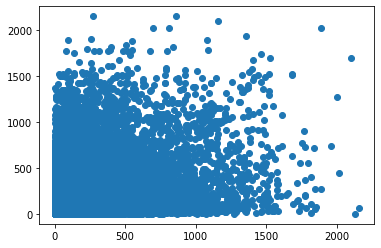

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(reduced_dataframe['player1_rank'], reduced_dataframe['player2_rank'])

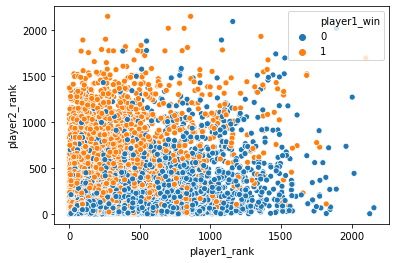

In [10]:
import seaborn as sns

sns.scatterplot(x = 'player1_rank', y = 'player2_rank',hue = 'player1_win',data = reduced_dataframe)


In [6]:
#Now use rank points instead of rankings and see if separation is stronger

points_dataframe = tennis_dataframe.loc[tennis_dataframe['winner_rank_points'].notnull() & tennis_dataframe['loser_rank_points'].notnull(), :]
points_dataframe.reset_index(inplace = True)
points_dataframe["player1_points"], points_dataframe["player2_points"], points_dataframe["player1_win"] = zip(*[(points_dataframe["winner_rank_points"][x], points_dataframe["loser_rank_points"][x], 1) if(np.random.binomial(1,.5) == 1) else (points_dataframe["loser_rank_points"][x], points_dataframe["winner_rank_points"][x], 0) for x in range(points_dataframe.shape[0])])
points_dataframe.shape


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(92553, 53)

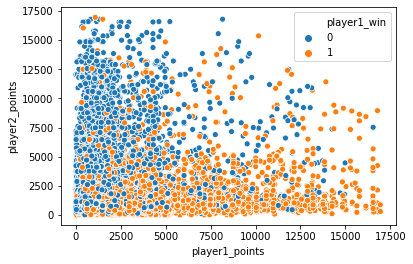

In [13]:
sns.scatterplot(x = 'player1_points', y = 'player2_points',hue = 'player1_win',data = points_dataframe)

# Fit a logistic regression model to both datasets

In [19]:
from sklearn import linear_model
logit_ranking = linear_model.LogisticRegression()
logit_ranking.set_params(C=1e4)

x_training_rank = reduced_dataframe[["player1_rank","player2_rank"]]
y_training_rank = reduced_dataframe["player1_win"]

logit_ranking.fit(x_training_rank, y_training_rank)

logit_ranking.score(x_training_rank, y_training_rank)

print(logit_ranking.intercept_)
print(logit_ranking.coef_)



[1.37652259e-06]
[[-0.00537959  0.00542961]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
logit_points = linear_model.LogisticRegression()
logit_points.set_params(C=1e4)

x_training_points = points_dataframe[["player1_points","player2_points"]]
y_training_points = points_dataframe["player1_win"]

logit_points.fit(x_training_points, y_training_points)

logit_points.score(x_training_points, y_training_points)

print(logit_points.intercept_)
print(logit_points.coef_)



[1.00589254e-08]
[[ 0.00057661 -0.00057498]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


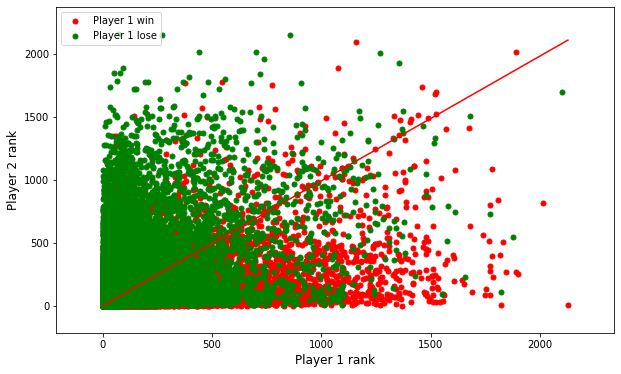

In [14]:
from PlottingFunction import data_2Dplot, logistic_model_2Dplot, plotModel
import matplotlib.pyplot as plt
# Plot data points
plt.figure(figsize=(10, 6))
data_2Dplot(x_training, y_training, \
            legends=["Player 1 win", "Player 1 lose"], \
            xlabel="Player 1 rank", ylabel="Player 2 rank")

# Plot decision boundary
#logistic_model_2Dplot(scores, decision_logit)
logistic_model_2Dplot(x_training, logit_ranking)
plt.show()

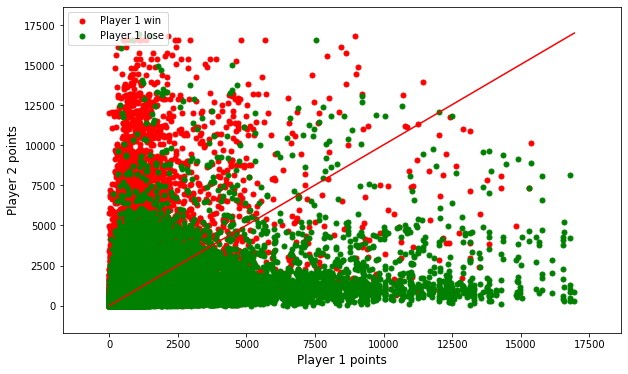

In [16]:
plt.figure(figsize=(10, 6))
data_2Dplot(x_training, y_training, \
            legends=["Player 1 win", "Player 1 lose"], \
            xlabel="Player 1 points", ylabel="Player 2 points")

# Plot decision boundary
#logistic_model_2Dplot(scores, decision_logit)
logistic_model_2Dplot(x_training, logit_ranking)
plt.show()

# Fit a linear discriminant analysis model to both datasets

In [22]:
from sklearn import discriminant_analysis

LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(x_training_rank, y_training_rank)

LDA.score(x_training_rank, y_training_rank)

0.662676935886761

In [25]:
LDA_points = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_points.fit(x_training_points, y_training_points)

LDA_points.score(x_training_points, y_training_points)

0.6541116981621341

# compute individual player statistics from past match data

In [81]:

def get_player_stats(dataframe, player_name, date):    
    
    winner_dataframe = dataframe.loc[(dataframe['winner_name'] == player_name) & (dataframe['tourney_date'] < date),:]
    loser_dataframe = dataframe.loc[(dataframe['loser_name'] == player_name) & (dataframe['tourney_date'] < date),:]
    
    num_aces = 0
    num_df = 0
    num_svpt = 0
    num_firstserves = 0
    num_firstserveswon = 0
    num_secondserveswon = 0
    num_servicegames = 0
    num_bpfaced = 0
    num_bpsaved = 0

    winner_sum = winner_dataframe.sum(axis = 0, skipna = True) 
    num_aces += winner_sum['w_ace']
    num_df += winner_sum['w_df']
    num_svpt += winner_sum['w_svpt']
    num_firstserves += winner_sum['w_1stIn']
    num_firstserveswon += winner_sum['w_1stWon']
    num_secondserveswon += winner_sum['w_2ndWon']
    num_servicegames += winner_sum['w_SvGms']
    num_bpfaced += winner_sum['w_bpFaced']
    num_bpsaved += winner_sum['w_bpSaved']
    
    loser_sum = loser_dataframe.sum(axis = 0, skipna = True) 
    num_aces += loser_sum['l_ace']
    num_df += loser_sum['l_df']
    num_svpt += loser_sum['l_svpt']
    num_firstserves += loser_sum['l_1stIn']
    num_firstserveswon += loser_sum['l_1stWon']
    num_secondserveswon += loser_sum['l_2ndWon']
    num_servicegames += loser_sum['l_SvGms']
    num_bpfaced += loser_sum['l_bpFaced']
    num_bpsaved += loser_sum['l_bpSaved']
    
    if(num_svpt != 0):     
        firstservepercentage = num_firstserves/num_svpt
        secondservepercentage = (num_svpt - num_firstserves - num_df)/(num_svpt - num_firstserves)
        acepercent = num_aces/num_svpt
        dbfaultpercent = num_df/num_svpt
    else:
        firstservepercentage = 0
        secondservepercentage = 0
        acepercent = 0
        dbfaultpercent = 0
    
    return((firstservepercentage, secondservepercentage, acepercent, dbfaultpercent))
    
    
    
        


In [65]:
import pandas as pd
tennisdataframe = pd.read_csv("./tennisdatafinal.csv")
tennisdataframe_post1990 = tennisdataframe.loc[tennisdataframe['tourney_date'] > 19901231,:]
tennisdataframe_post1990.reset_index(inplace = True)

tennisdataframe_post1999 = tennisdataframe.loc[tennisdataframe['tourney_date'] > 19991231,:]
tennisdataframe_post1999.reset_index(inplace = True)

tennisdataframe_post1999["player1_1stserveper"], tennisdataframe_post1999["player1_2ndserveper"],\
tennisdataframe_post1999["player1_acepercent"], tennisdataframe_post1999["player1_dbfaultper"],\
tennisdataframe_post1999["player1_bpsavedper"]=\
zip(*[get_player_stats(tennisdataframe_post1990, tennisdataframe_post1999["player1_name"][x],\
tennisdataframe_post1999["tourney_date"][x]) for x in range(tennisdataframe_post1999.shape[0])])








C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [82]:
tennisdataframe_post1999["player2_1stserveper"], tennisdataframe_post1999["player2_2ndserveper"],\
tennisdataframe_post1999["player2_acepercent"], tennisdataframe_post1999["player2_dbfaultper"],=\
zip(*[get_player_stats(tennisdataframe_post1990, tennisdataframe_post1999["player2_name"][x],\
tennisdataframe_post1999["tourney_date"][x]) for x in range(tennisdataframe_post1999.shape[0])])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [84]:
tennisdataframe_post1999.to_csv ('./tennisdatafinalpost1999.csv', index = None, header=True)

In [48]:
loser_dataframe = tennisdataframe.loc[(tennisdataframe['loser_name'] == "Roger Federer") & (tennisdataframe['tourney_date'] < 20010101),:]
loser_dataframe[['loser_name', "l_ace"]].sum()

loser_name    Roger FedererRoger FedererRoger FedererRoger F...
l_ace                                                       233
dtype: object

In [29]:
import numpy as np

testdf = pd.DataFrame({'a': [10, 11, np.nan]})

testsum = testdf.sum(axis = 0, skipna = True)

x = 0
x += testsum['a']
x

21.0